# Survival analysis

In [1]:
# libraries

import pandas as pd
import numpy as np
import bz2
pd.set_option('display.max_columns', None)
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pingouin as pg
import statsmodels.api as sm
import matplotlib as mpl
from scipy import stats
from distfit import distfit
import scikit_posthocs as sp
import datetime as dt

pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["image.cmap"] = "Pastel2"

import plotly.graph_objects as go
from random import sample
from numpy.random import uniform
from math import isnan

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

from scipy.spatial.distance import euclidean


/home/evida-monika/anaconda3/envs/mhunters/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# planting seed

import random

random.seed(10)

In [4]:
# importing data

df = pd.read_csv("/home/evida-monika/mhunters/final_data_5.csv.bz2", compression="bz2", sep=",")

#df = pd.read_csv("C:/Users/admin/Desktop/mhunters/final_data_5.csv.bz2", compression="bz2", sep=",")

# this is cleaned dataset
# we need to delete another user - ID = 235, because it has 274 sessions in 4 weeks - impossible.

df = df[df['id_users'] != 235]

In [5]:
# changing types of data

cols = ['name_en_exercises','discarded_session_execution', 'code_name_sessions', 
        'name_en_sessions', 'active_user_programs', 'completed_user_programs',
        'pro_programs', 'available_programs', 'name_en_programs', 
        'gender', 'cluster',
        'activity_level', 'goal', 'body_type', 'newsletter_subscription', 'notifications_setting',
        'language', 'scientific_data_usage', 'BMI_category', 'name_en_implements']

for col in cols:
    df[col] = df[col].astype('category')
    
col_date = ['updated_at_ex_ex', 'created_at_exercises', 'updated_at_exercises',
            'updated_at_session_execution', 'created_at_user_programs', 'updated_at_user_programs',
            'created_at_programs', 'updated_at_programs', 'created_at_users', 'updated_at_users',
            'date_of_birth']

for col in col_date:
    df[col] = pd.to_datetime(df[col])#.dt.strftime("%Y-%m-%d %H:%M:%S")

cat_names = {
    'gender': {1: 'male', 0: 'female'},
    'activity_level': {0: 'very active', 1: 'active', 2: 'sedentary'},
    'goal': {0: 'lose', 1: 'gain', 2: 'antiaging'},
    'body_type': {0: 'thin', 1: 'mid', 2: 'strong'}
}

df = df.replace(cat_names)


In [7]:
# dataset only for users

df_users_only_once = df.drop_duplicates(subset=['id_users'], keep='first')

In [8]:
# here dropping all of the columns that are not relevant for users

df_users_only = df_users_only_once.loc[:, ['id_users', 'created_at_users', 'updated_at_users', 'gender',
       'date_of_birth', 'height', 'weight', 'activity_level', 'goal',
       'body_type', 'body_fat', 'newsletter_subscription',
       'notifications_setting', 'training_days_setting', 'language', 'points',
       'scientific_data_usage', 'best_weekly_streak_users', 'BMI', 'BMI_category', 'total_sessions_users2',
                                          'total_time_users2', 'total_reps_users2', 'reps_per_session_users2',
                                           'cluster',
                                          'total_calories_users2', 'kcal_per_session_users2', 'age_in_years']]

In [9]:
# dataset for only one of id_session_execution

df_session_exe_only_once = df.drop_duplicates(subset=['id_session_execution'], keep='first')

In [10]:
# here dropping all of the columns that are not relevant for session_execution

df_session_exe = df_session_exe_only_once.loc[:, ['id_session_execution', 
                                                  'difficulty_feedback_session_execution',
       'enjoyment_feedback_session_execution',
       'reps_executed_session_execution', 'updated_at_session_execution',
       'discarded_session_execution', 'id_sessions', 'order_sessions',
       'time_duration_sessions', 'code_name_sessions', 'name_en_sessions',
       'id_user_programs', 'created_at_user_programs',
       'updated_at_user_programs', 'active_user_programs',
       'current_session_id_user_programs', 'completed_user_programs',
       'id_programs', 'created_at_programs', 'updated_at_programs',
       'pro_programs', 'available_programs', 'strength_programs',
       'endurance_programs', 'technique_programs', 'flexibility_programs',
       'intensity_programs', 'name_en_programs', 'description_en_programs',
       'id_users', 'created_at_users', 'updated_at_users', 'gender',
       'date_of_birth', 'height', 'weight', 'activity_level', 'goal',
       'body_type', 'body_fat', 'newsletter_subscription', 'cluster',
       'notifications_setting', 'training_days_setting', 'language', 'points',
       'scientific_data_usage', 'best_weekly_streak_users', 'BMI', 'BMI_category', 'total_sessions_users2',
       'total_time_session_execution', 'total_reps_session_execution',
       'total_time_users2', 'total_reps_users2', 'reps_per_session_users2',
       'total_time_session_execution_min', 'reps_per_min_session_execution',
       'exercise_execution_time_min', 'calories_session_execution',
       'total_calories_users2', 'kcal_per_session_users2',
                                          'YYYY/WW', 'age_in_years']]

In [12]:
# here dropping all of the columns that are not relevant for users

df_users_only = df_users_only_once.loc[:, ['id_users', 'created_at_users', 'updated_at_users', 'gender',
       'date_of_birth', 'height', 'weight', 'activity_level', 'goal',
       'body_type', 'body_fat', 'newsletter_subscription',
       'notifications_setting', 'training_days_setting', 'language', 'points', 'cluster',
       'scientific_data_usage', 'best_weekly_streak_users', 'BMI', 'BMI_category', 'total_sessions_users2',
                                          'total_time_users2', 'total_reps_users2', 'reps_per_session_users2',
                                          'total_calories_users2', 'kcal_per_session_users2',
                                           'exercises_per_user', 'exercises_without_rest_per_user',
                                          'age_in_years']]


# dataset for only one of id_session_execution

df_session_exe_only_once = df.drop_duplicates(subset=['id_session_execution'], keep='first')

# here dropping all of the columns that are not relevant for session_execution

df_session_exe = df_session_exe_only_once.loc[:, ['id_session_execution', 
                                                  'difficulty_feedback_session_execution',
       'enjoyment_feedback_session_execution',
       'reps_executed_session_execution', 'updated_at_session_execution',
       'discarded_session_execution', 'id_sessions', 'order_sessions',
       'time_duration_sessions', 'code_name_sessions', 'name_en_sessions',
       'id_user_programs', 'created_at_user_programs',
       'updated_at_user_programs', 'active_user_programs',
       'current_session_id_user_programs', 'completed_user_programs',
       'id_programs', 'created_at_programs', 'updated_at_programs',
       'pro_programs', 'available_programs', 'strength_programs',
       'endurance_programs', 'technique_programs', 'flexibility_programs',
       'intensity_programs', 'name_en_programs', 'description_en_programs',
       'id_users', 'created_at_users', 'updated_at_users', 'gender',
       'date_of_birth', 'height', 'weight', 'activity_level', 'goal',
       'body_type', 'body_fat', 'newsletter_subscription',
       'notifications_setting', 'training_days_setting', 'language', 'points', 'cluster',
       'scientific_data_usage', 'best_weekly_streak_users', 'BMI', 'BMI_category', 'total_sessions_users2',
       'total_time_session_execution', 'total_reps_session_execution',
       'total_time_users2', 'total_reps_users2', 'reps_per_session_users2',
       'total_time_session_execution_min', 'reps_per_min_session_execution',
       'exercise_execution_time_min', 'calories_session_execution',
       'total_calories_users2', 'kcal_per_session_users2',
                                          'YYYY/WW', 'number_exercises_in_session',
                                                 'number_exercises_without_rest_in_session',
                                                 'age_in_years']]

In [13]:
# Creating a variable where there are 1 when it is the first time that user did a session in a day and 0 if the user already did a session that day

df_session_exe_copy = df_session_exe.copy()

df_session_exe_copy = df_session_exe_copy.sort_values(['id_users', 'updated_at_session_execution'])

df_session_exe_copy['days_a_week_session_exe'] = np.where((df_session_exe_copy['YYYY/WW'] == df_session_exe_copy['YYYY/WW'].shift()) &
                                                (df_session_exe_copy['updated_at_session_execution'].dt.year == df_session_exe_copy['updated_at_session_execution'].dt.year.shift()) &
                                                (df_session_exe_copy['updated_at_session_execution'].dt.month == df_session_exe_copy['updated_at_session_execution'].dt.month.shift()) &
                                                (df_session_exe_copy['updated_at_session_execution'].dt.day == df_session_exe_copy['updated_at_session_execution'].dt.day.shift()) & 
                                                (df_session_exe_copy['id_users'] == df_session_exe_copy['id_users'].shift()),
                                                0,1)


In [14]:
# grouped table with calculation of days trained a week for every user and training days setting by the user

df_session_exe_copy2 = df_session_exe_copy.loc[:, ['id_users', 'YYYY/WW', 'days_a_week_session_exe']]

df_session_exe_days_setting = df_session_exe_copy2.groupby(['id_users', 'YYYY/WW'])['days_a_week_session_exe'].sum().reset_index()


df_users_training_days_setting = df_users_only.loc[:, ['id_users', 'training_days_setting']]

df_session_exe_days_setting = df_session_exe_days_setting.merge(df_users_training_days_setting, how = 'left', 
                                                                left_on = 'id_users', right_on = 'id_users')


In [15]:
# new column that says if user achieved weekly training goal (1) or not (0)

df_session_exe_days_setting['training_days_setting'] = df_session_exe_days_setting['training_days_setting'].astype('int64')

df_session_exe_days_setting['training_days_goal_achieved'] = np.where(df_session_exe_days_setting['days_a_week_session_exe'] >= df_session_exe_days_setting['training_days_setting'], 1, 0)


## Introduction

We take all of the observations of users and their session executions in weeks. 

As beginning of "treatment" is downloading the app and doing the first session. Follow up will be first 4/8/12 weeks after the first session execution. We do right censoring.

We need to define the "failure". The "failure" event occurs when the user stopped working out (the number of weeks for user is less than 4/8/12) or when their number of days with workouts in a week is equal to 0 - so the label is 1, otherwise we censor the data and the label is 0 (because the event didn't occur).

What is actually survival analysis?

(https://www.getcensus.com/blog/primer-on-survival-analysis-in-python-for-businesses, https://www.kdnuggets.com/2020/07/complete-guide-survival-analysis-python-part1.html)

Survival analysis is a set of statistical approaches used to find out the time it takes for an event of interest to occur. Survival analysis is used to study the time until some event of interest (often referred to as death) occurs. Time could be measured in years, months, weeks, days, etc. The event of interest could be anything of interest. It could be an actual death, a birth, a retirement, etc.

It is used in variety of fields. 

There are relevant concepts like:
* Survival time (*T*) - time until an event occurs,
* Survival function (*S(t)*) - the probability that the event of interest has not occurred by some time *t*,
* Hazard function (*h(t)*) - the conditional probability that the event will occur given that it has not occurred before,
* Kaplan-Meier method - a type of survival function that is most commonly used in applications, assumptions:
    1. Participants who dropped out may have the same survival prospects,
    2. The survival probabilities will remain the same for the participants who joined late or early,
    3. The event will occur at the specified time
* Cox proportional hazards regression - for investigating the association between the survival time and one or more predictor variables.




In Kaplan-Meier Estimator, the differences between survival curves will be checked by logrank test, where hypothesis are:
* $H_0$: survival curves are identical,
* $H_1$: survival curves are not identical.

If p-value is less than 0.05 (the confidence level), then we can reject null hypothesis, and the survival curves are not identical.

In [16]:
# other libraries

from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test, pairwise_logrank_test

from sklearn.model_selection import train_test_split
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index, median_survival_times, find_best_parametric_model, k_fold_cross_validation

from lifelines.calibration import survival_probability_calibration

from sklearn.metrics import mean_absolute_error as mae

from sklearn.metrics import mean_squared_error
from math import log

from lifelines import WeibullAFTFitter, LogLogisticAFTFitter, LogNormalAFTFitter, PiecewiseExponentialRegressionFitter
from lifelines.utils import find_best_parametric_model
from lifelines import WeibullFitter, PiecewiseExponentialFitter, LogNormalFitter, LogLogisticFitter

from lifelines.statistics import proportional_hazard_test



In [17]:
# functions definitions 

def km_simple(df):
    kmf = KaplanMeierFitter()
    
    kmf.fit(df['surv_time'], df['cens'],label='Kaplan Meier Estimate')
    kmf.plot(ci_show=True)
    # add_at_risk_counts(kmf_4_demo)
    
    print("Median survival time is {}".format(kmf.median_survival_time_), "\n",
          "Survival function takes estimates for each time point \n {}".format(kmf.survival_function_)) 
    
    return kmf

def kaplan_meier_by_cat(df, var):

    ax = plt.subplot(111)
    
    kmf = KaplanMeierFitter()
    
    for cat in df[var].unique():
        flag = df[var] == cat
        
        kmf.fit(df['surv_time'][flag], event_observed = df['cens'][flag], label = cat)
        
        print("Median survival time for {} is {}".format(cat, kmf.median_survival_time_))
        
        kmf.plot(ax=ax)
        
        # add_at_risk_counts(kmf, labels = cat)
        
        print("Survival function for {} estimates: \n {}".format(cat, kmf.survival_function_))
        
    plt.title("Survival curves by {}".format(var))
    
    return kmf, plt.show()

    
def km_logrank_test(df, var):
    
    if df[var].nunique() == 2:
        
        flag = df[var] == df[var].unique()[0]
        flag2 = df[var] == df[var].unique()[1]
        
        results = logrank_test(df['surv_time'][flag], df['surv_time'][flag2], df['cens'][flag], df['cens'][flag2])
    
    elif df[var].nunique() > 2:
        
        results = pairwise_logrank_test(df['surv_time'], df[var], df['cens'])
        
    else: 
        print("Oops, some wrong data")
    
    return results.print_summary()
        
    
def parametric_surv(X):
    
    models = {
        "Weibull": WeibullFitter(),
        # "Piecewise Exponential": PiecewiseExponentialFitter(),
        "Lognormal": LogNormalFitter(),
        "LogLog": LogLogisticFitter()
    }
    
    results = pd.DataFrame(columns = ['AIC'], index = models.keys())
    
    for model_name in models:
        mod = models[model_name]
        mod.fit(X['surv_time'], X['cens'])
        AIC_val = mod.AIC_
        
        results.loc[model_name, :] = AIC_val
    
    return results

def cox_model(X_train, summary = True, strata_val= None):
    
    cph = CoxPHFitter()
    cph.fit(X_train, duration_col='surv_time', event_col='cens', strata = strata_val)
    
    if summary == True:
        summary = cph.print_summary(columns=["coef","exp(coef)","exp(coef) lower 95%","exp(coef) upper 95%", "z", "p"], decimals=3)
    
    return cph


# definition of concordance index compraision for train and test set

def c_i_comp_cox(X_train, X_test):
    
    X_train2 = X_train.drop(['cens', 'surv_time'], axis = 1)

    results = pd.DataFrame(columns = ['training set', 'test set'], index = X_train2.columns)
    for col in X_train2.columns:
        X_df = X_train[['cens', 'surv_time', col]]
        X_df_test = X_test[['cens', 'surv_time', col]]
        # mod = CoxPHFitter()
        # mod.fit(X_df, duration_col='surv_time', event_col='cens')
        mod = cox_model(X_df, summary = False)
        con_index_train = mod.score(X_df, scoring_method="concordance_index")

        con_index_test = mod.score(X_df_test, scoring_method="concordance_index")

        results.loc[col, :] = con_index_train, con_index_test
    
    return results


def c_i_aic_comp_param(X_train, X_test, model = ['Weibull', 'lognormal', 'loglog']):
    
    X_train2 = X_train.drop(['cens', 'surv_time'], axis = 1)

    results = pd.DataFrame(columns = ['CI training set', 'CI test set', 'AIC'], 
                           index = X_train2.columns)
    
    for col in X_train2.columns:
        X_df = X_train[['cens', 'surv_time', col]]
        X_df_test = X_test[['cens', 'surv_time', col]]
        X_df_test_col = X_df_test.drop(['cens', 'surv_time'], axis = 1)
        
        if model == 'Weibull':
            mod = WeibullAFTFitter()
        elif model == 'lognormal':
            mod = LogNormalAFTFitter()
        elif model == 'loglog':
            mod = LogLogisticAFTFitter()
        
        mod.fit(X_df, duration_col='surv_time', event_col='cens')
        
        con_index_train = mod.score(X_df, scoring_method="concordance_index")
        con_index_test = mod.score(X_df_test, scoring_method="concordance_index")

        aic_train = mod.AIC_
        
        results.loc[col, :] = con_index_train, con_index_test, aic_train
    
    return results



## Data preparation

First, we need to prepare the data. 

In [18]:
# Preparation

df_session_exe_days_setting['YYYY/WW'].min() # min week and year is 2021/44

df_session_exe_days_setting['YYYY/WW'].max() # maximum week and year is 2022/21

# here we create new df with dates (for whole year, week by week)

week_year_table = pd.DataFrame({'Date': pd.date_range('24-05-2021', '28-05-2022')})
week_year_table = week_year_table.assign(weeknum1= week_year_table['Date'].dt.strftime('%Y/%V'))


week_year_table.rename(columns={'weeknum1': 'YYYY/WW'},
           inplace = True)

week_year_table = week_year_table.assign(weeknum2= week_year_table['Date'].dt.strftime('%V'))
week_year_table.rename(columns={'weeknum2': 'WW'},
           inplace = True)

week_year_table = week_year_table.assign(weeknum3= week_year_table['Date'].dt.strftime('%Y'))
week_year_table.rename(columns={'weeknum3': 'YYYY'},
           inplace = True)


week_year_table['YYYY/WW'] = np.where((week_year_table['YYYY/WW'] == '2022/52') & 
                           (week_year_table['Date'].dt.year == 2022) & 
                           (week_year_table['Date'].dt.month == 1) &
                           (week_year_table['Date'].dt.strftime("%V") == '52'),
                          '2021/52', week_year_table['YYYY/WW'] )

week_year_table = week_year_table.drop_duplicates(subset=['YYYY/WW'], keep = 'first').reset_index()

week_year_table.drop(['index'], axis = 1, inplace = True)

# we are copying the old dataframe

df_session_exe_days_setting_all_weeks = df_session_exe_days_setting.copy()

# here we are mergining new dataframe with the dataframe will only dates

df_session_exe_days_setting_all_weeks = df_session_exe_days_setting_all_weeks.merge(week_year_table, how = 'left', left_on = 'YYYY/WW', right_on = 'YYYY/WW')

# this is the funtion for giving dates weekly - from the start date till the end date (it will be used for each user - from first training to the last one)

def expand_dates(ser):
    return pd.DataFrame({'Date': pd.date_range(ser['Date'].min(), ser['Date'].max(), freq='W')})


newdf = df_session_exe_days_setting_all_weeks.groupby(['id_users']) # we are grouping the users and creating new df

newdf = newdf.apply(expand_dates).reset_index() # now we are using the functions

# below we merge new df with previous one, to get all of the weeks
newdf2 = newdf.merge(df_session_exe_days_setting_all_weeks, how = 'outer', left_on = ['Date', 'id_users'], right_on = ['Date', 'id_users'])

newdf2.drop(['level_1'], axis = 1, inplace = True)

newdf3 = newdf2.copy()

# we are dropping old week and year values to create new ones (for nan sake)
newdf3.drop(['YYYY/WW', 'WW', 'YYYY'], axis = 1, inplace = True)

# creation of new time variables
newdf3 = newdf3.assign(weeknum1= newdf3['Date'].dt.strftime('%Y/%V'))

newdf3.rename(columns={'weeknum1': 'YYYY/WW'},
           inplace = True)

newdf3 = newdf3.assign(weeknum2= newdf3['Date'].dt.strftime('%V'))
newdf3.rename(columns={'weeknum2': 'WW'},
           inplace = True)

newdf3 = newdf3.assign(weeknum3= newdf3['Date'].dt.strftime('%Y'))
newdf3.rename(columns={'weeknum3': 'YYYY'},
           inplace = True)


newdf3['YYYY/WW'] = np.where((newdf3['YYYY/WW'] == '2022/52') & 
                           (newdf3['Date'].dt.year == 2022) & 
                           (newdf3['Date'].dt.month == 1) &
                           (newdf3['Date'].dt.strftime("%V") == '52'),
                          '2021/52', newdf3['YYYY/WW'] )

# sorting values by id user and date, to get non-null values before the null one
newdf3.sort_values(['id_users','YYYY/WW', 'Date'], inplace = True, na_position='last')

newdf3 = newdf3.reset_index()

newdf3.drop(['index'], axis = 1, inplace = True)

newdf4 = newdf3.copy()

newdf4 = newdf4.drop_duplicates(subset = ['id_users', 'YYYY/WW'], keep = 'first')

newdf5 = newdf4.copy()

newdf5.columns

newdf5[['days_a_week_session_exe', 'training_days_goal_achieved']] = newdf5[['days_a_week_session_exe','training_days_goal_achieved']].fillna(value=0)

newdf5[['training_days_setting']] = newdf5[['training_days_setting']].fillna(method='ffill')

In [19]:
df_session_exe_days_all_weeks = newdf5.copy() 

df_session_exe_days_all_weeks['week_with_training'] = np.where(df_session_exe_days_all_weeks['days_a_week_session_exe'] != 0,
                                                               1, 
                                                               0)


In [20]:
newdf5.head(20)

id_users       Date  days_a_week_session_exe  training_days_setting  \
0     108.00 2021-12-06                     2.00                   2.00   
2     108.00 2021-12-19                     0.00                   2.00   
3     108.00 2021-12-26                     0.00                   2.00   
4     108.00 2022-01-02                     0.00                   2.00   
5     108.00 2022-01-09                     0.00                   2.00   
6     108.00 2022-01-16                     0.00                   2.00   
7     108.00 2022-01-23                     0.00                   2.00   
8     108.00 2022-01-24                     3.00                   2.00   
10    108.00 2022-02-06                     0.00                   2.00   
11    108.00 2022-02-13                     0.00                   2.00   
12    108.00 2022-02-20                     0.00                   2.00   
13    108.00 2022-02-27                     0.00                   2.00   
14    108.00 2022-03-06                     0.00                   2.00   
15    108.00 2022-03-13                     0.00                   2.00   
16    108.00 2022-03-20                     0.00                   2.00   
17    108.00 2022-03-27                     0.00                   2.00   
18    108.00 2022-04-03                     0.00                   2.00   
19    108.00 2022-04-04                     1.00                   2.00   
20    112.00 2022-01-03                     1.00                   4.00   
21    172.00 2021-11-08                     2.00                   5.00   

    training_days_goal_achieved  YYYY/WW  WW  YYYY  
0                          1.00  2021/49  49  2021  
2                          0.00  2021/50  50  2021  
3                          0.00  2021/51  51  2021  
4                          0.00  2021/52  52  2022  
5                          0.00  2022/01  01  2022  
6                          0.00  2022/02  02  2022  
7                          0.00  2022/03  03  2022  
8                          1.00  2022/04  04  2022  
10                         0.00  2022/05  05  2022  
11                         0.00  2022/06  06  2022  
12                         0.00  2022/07  07  2022  
13                         0.00  2022/08  08  2022  
14                         0.00  2022/09  09  2022  
15                         0.00  2022/10  10  2022  
16                         0.00  2022/11  11  2022  
17                         0.00  2022/12  12  2022  
18                         0.00  2022/13  13  2022  
19                         0.00  2022/14  14  2022  
20                         0.00  2022/01  01  2022  
21                         0.00  2021/45  45  2021

### 4 weeks

Now. let's get to the data at the first 4 weeks of usage of the app. The first approach on censoring is if the user didn't stop working out for even a week, then the event didn't happen (so theydidn't  drop out). 

The second approach is that the users are censored if:
* they had the app for at least 4 weeks,
* they worked out for at least half of the time (two weeks),
* the training was done in the 4th week.

So the user was considered as the one that dropped out if he/she didn't meet at least one of the conditions.

In [326]:
# frequency table definition

def my_freq_table(data, var, sort = True, cumul_percent = False):
    myFreqTable = data[var].value_counts()
    myFreqTable = pd.DataFrame({var: myFreqTable.keys(), 'Frequency': myFreqTable.values})
    myFreqTable = myFreqTable.astype({'Frequency': 'int32'})
    
    if sort == True:
        myFreqTable = myFreqTable.sort_values(by=[var])
        myFreqTable = myFreqTable.reset_index(drop=True)
    
    myFreqTable['Percent'] = myFreqTable['Frequency']/myFreqTable['Frequency'].sum()*100
    
    sum_row1 = myFreqTable['Frequency'].sum()
    sum_row2 = myFreqTable['Percent'].sum()
    sum_row2 = sum_row2.round(2).astype('str') + '%'
    
    myFreqTable['Percent'] = myFreqTable['Percent'].round(2).astype('str') + '%'
    
    if cumul_percent == True:
        myFreqTable['Cumulative Percent'] = myFreqTable['Frequency'].cumsum() / myFreqTable['Frequency'].sum() * 100
        myFreqTable['Cumulative Percent'] = myFreqTable['Cumulative Percent'].round(2).astype('str') + '%'
        sum_row_c = '-'
    
    if cumul_percent == True:
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    myFreqTable = myFreqTable.append(new_rows, ignore_index=True)
    cats = data[var].cat.add_categories(['Total'])
    myFreqTable.set_index(cats.cat.categories, inplace = True)
    
    cols = myFreqTable.columns
    
    for col in cols:
        if col == var:
            myFreqTable = myFreqTable.drop(var, axis = 1)
    #myFreqTable.rename(index = {'NaN': 'Total'}, inplace = True)
    
    return(myFreqTable)
    

In [192]:
# first 4 weeks

df_first_4_weeks = df_session_exe_days_all_weeks.groupby('id_users').head(4).reset_index(drop=True)

In [193]:
number_of_worked_out_weeks_4 = df_first_4_weeks.groupby(['id_users'])['id_users'].size().reset_index(name = 'counts')

df_first_4_weeks = df_first_4_weeks.merge(number_of_worked_out_weeks_4, how = 'left', left_on = 'id_users', right_on = 'id_users')

number_of_weeks_4 = df_first_4_weeks.groupby(['id_users'])['week_with_training'].sum().reset_index(name = 'sum_of_weeks')

df_first_4_weeks = df_first_4_weeks.merge(number_of_weeks_4, how = 'left', left_on = 'id_users', right_on = 'id_users')

df_first_4_weeks_last_week = df_first_4_weeks.drop_duplicates(['id_users'], keep = 'last').loc[:, ['id_users','week_with_training']]

df_first_4_weeks_last_week.rename(columns = {'week_with_training': 'last_week_training'}, inplace = True)

df_first_4_weeks = df_first_4_weeks.merge(df_first_4_weeks_last_week, how = 'left', left_on = 'id_users', right_on = 'id_users')


df_first_4_weeks_users = df_first_4_weeks.drop_duplicates(['id_users'], keep = 'first')

df_first_4_weeks_users2 = df_first_4_weeks_users.copy()

df_first_4_weeks_users2['cens'] = np.where((df_first_4_weeks_users2['counts'] == 4) & (df_first_4_weeks_users2['sum_of_weeks'] >= 2) & (df_first_4_weeks_users2['last_week_training'] == 1),
                                         0,1)

df_first_4_weeks_users['cens'] = np.where((df_first_4_weeks_users['counts'] == 4) & (df_first_4_weeks_users['sum_of_weeks'] == 4),
                                         0,1)

df_first_4_weeks_users.rename(columns={'sum_of_weeks': 'surv_time'}, inplace = True)
df_first_4_weeks_users2.rename(columns={'sum_of_weeks': 'surv_time'}, inplace = True)

df_first_4_weeks_users_subset = df_first_4_weeks_users.loc[:, ['id_users', 'cens', 'surv_time']]
df_first_4_weeks_users2_subset = df_first_4_weeks_users2.loc[:, ['id_users', 'cens', 'surv_time']]

df_users_4_weeks = df_users_only.merge(df_first_4_weeks_users_subset, how = 'left', left_on = 'id_users', right_on = 'id_users')
df_users_4_weeks2 = df_users_only.merge(df_first_4_weeks_users2_subset, how = 'left', left_on = 'id_users', right_on = 'id_users')

df_users_4_weeks['cens'] = df_users_4_weeks['cens'].astype('category')
df_users_4_weeks2['cens'] = df_users_4_weeks2['cens'].astype('category')
df_users_4_weeks['training_days_setting'] = df_users_4_weeks['training_days_setting'].astype('category')
df_users_4_weeks2['training_days_setting'] = df_users_4_weeks2['training_days_setting'].astype('category')

In [194]:
df_users_4_weeks_demo = df_users_4_weeks.loc[:, ['gender', 'height', 'weight', 'activity_level', 'goal', 
                                                 'body_type', 'body_fat', 'newsletter_subscription',
                                                 'notifications_setting', 'training_days_setting', 'BMI',
                                                 'cluster',
                                                 'cens', 'surv_time', 'age_in_years']]




In [384]:
my_freq_table(df_users_8_weeks_demo2[df_users_8_weeks_demo2['cens'] == 1], 'training_days_setting')


Frequency Percent
1.0          172   6.82%
2.0          177   7.02%
3.0         1040  41.22%
4.0          510  20.21%
5.0          464  18.39%
6.0           83   3.29%
7.0           77   3.05%
Total       2523  100.0%

In [385]:
my_freq_table(df_users_8_weeks_demo2[df_users_8_weeks_demo2['cens'] == 0], 'training_days_setting')


Frequency Percent
1.0           13   2.54%
2.0           36   7.05%
3.0          221  43.25%
4.0          130  25.44%
5.0           87  17.03%
6.0           15   2.94%
7.0            9   1.76%
Total        511  100.0%

In [195]:
df_users_4_weeks_demo2 = df_users_4_weeks2.loc[:, ['gender', 'height', 'weight', 'activity_level', 'goal', 
                                                 'body_type', 'body_fat', 'newsletter_subscription',
                                                 'notifications_setting', 'training_days_setting', 'BMI',
                                                 'cluster',
                                                 'cens', 'surv_time', 'age_in_years']]




In the table above, surv_time is number of weeks until the event occurs.

And below there are given number of users not censored and censored.

In [25]:
print('Number of non censored useres: {} (the event happened)'.format(df_first_4_weeks_users['cens'].sum()), '\n',
      'Number of censored users: {} (the event did not happened)'.format(len(df_first_4_weeks_users) - df_first_4_weeks_users['cens'].sum()))

Number of non censored useres: 2314 (the event happened) 
 Number of censored users: 720 (the event did not happened)


In [26]:
print('Number of non censored useres: {} (the event happened)'.format(df_first_4_weeks_users2['cens'].sum()), '\n',
      'Number of censored users: {} (the event did not happened)'.format(len(df_first_4_weeks_users2) - df_first_4_weeks_users2['cens'].sum()))

Number of non censored useres: 2013 (the event happened) 
 Number of censored users: 1021 (the event did not happened)


In [27]:
df_users_4_weeks_all = df_users_4_weeks.loc[:, ['gender', 'height', 'weight', 'activity_level', 'goal', 
                                                 'body_type', 'body_fat', 'newsletter_subscription',
                                                 'notifications_setting', 'training_days_setting', 'BMI', 
                                                 'total_sessions_users2', 'total_time_users2', 'total_reps_users2',
                                                 'total_calories_users2', 'exercises_per_user',
                                                 'exercises_without_rest_per_user', 'cluster', 
                                                'age_in_years',
                                                 'cens', 'surv_time']]

In [28]:
df_users_4_weeks_all2 = df_users_4_weeks2.loc[:, ['gender', 'height', 'weight', 'activity_level', 'goal', 
                                                 'body_type', 'body_fat', 'newsletter_subscription',
                                                 'notifications_setting', 'training_days_setting', 'BMI', 
                                                 'total_sessions_users2', 'total_time_users2', 'total_reps_users2',
                                                 'total_calories_users2', 'exercises_per_user',
                                                 'exercises_without_rest_per_user', 'cluster',
                                                  'age_in_years',
                                                 'cens', 'surv_time']]

### 8 weeks

Here, we will take the data for 8 first weeks and censor it in two approaches as before (but for the second approach - the user had to workout at least 6 out of 8 weeks.

In [29]:
# first 8 weeks

df_first_8_weeks = df_session_exe_days_all_weeks.groupby('id_users').head(8).reset_index(drop=True)

number_of_worked_out_weeks_8 = df_first_8_weeks.groupby(['id_users'])['id_users'].size().reset_index(name = 'counts')

df_first_8_weeks = df_first_8_weeks.merge(number_of_worked_out_weeks_8, how = 'left', left_on = 'id_users', right_on = 'id_users')

number_of_weeks_8 = df_first_8_weeks.groupby(['id_users'])['week_with_training'].sum().reset_index(name = 'sum_of_weeks')

df_first_8_weeks = df_first_8_weeks.merge(number_of_weeks_8, how = 'left', left_on = 'id_users', right_on = 'id_users')

df_first_8_weeks_last_week = df_first_8_weeks.drop_duplicates(['id_users'], keep = 'last').loc[:, ['id_users','week_with_training']]

df_first_8_weeks_last_week.rename(columns = {'week_with_training': 'last_week_training'}, inplace = True)

df_first_8_weeks = df_first_8_weeks.merge(df_first_8_weeks_last_week, how = 'left', left_on = 'id_users', right_on = 'id_users')

df_first_8_weeks_users = df_first_8_weeks.drop_duplicates(['id_users'], keep = 'first')
df_first_8_weeks_users2 = df_first_8_weeks_users.copy()

df_first_8_weeks_users['cens'] = np.where((df_first_8_weeks_users['counts'] == 4) & (df_first_8_weeks_users['sum_of_weeks'] == 4),
                                         0,1)

df_first_8_weeks_users2['cens'] = np.where((df_first_8_weeks_users2['counts'] == 8) & (df_first_8_weeks_users2['sum_of_weeks'] >= 6) & (df_first_8_weeks_users2['last_week_training'] == 1),
                                         0,1)

df_first_8_weeks_users.rename(columns={'sum_of_weeks': 'surv_time'}, inplace = True)
df_first_8_weeks_users2.rename(columns={'sum_of_weeks': 'surv_time'}, inplace = True)

df_first_8_weeks_users_subset = df_first_8_weeks_users.loc[:, ['id_users', 'cens', 'surv_time']]
df_first_8_weeks_users2_subset = df_first_8_weeks_users2.loc[:, ['id_users', 'cens', 'surv_time']]

df_users_8_weeks = df_users_only.merge(df_first_8_weeks_users_subset, how = 'left', left_on = 'id_users', right_on = 'id_users')
df_users_8_weeks2 = df_users_only.merge(df_first_8_weeks_users2_subset, how = 'left', left_on = 'id_users', right_on = 'id_users')

df_users_8_weeks['cens'] = df_users_8_weeks['cens'].astype('category')
df_users_8_weeks['training_days_setting'] = df_users_8_weeks['training_days_setting'].astype('category')

df_users_8_weeks2['cens'] = df_users_8_weeks2['cens'].astype('category')
df_users_8_weeks2['training_days_setting'] = df_users_8_weeks2['training_days_setting'].astype('category')


In [30]:
df_users_8_weeks_demo = df_users_8_weeks.loc[:, ['gender', 'height', 'weight', 'activity_level', 'goal', 
                                                 'body_type', 'body_fat', 'newsletter_subscription',
                                                 'notifications_setting', 'training_days_setting', 'BMI',
                                                 'cluster', 'age_in_years',
                                                 'cens', 'surv_time']]


In [31]:
df_users_8_weeks_demo2 = df_users_8_weeks2.loc[:, ['gender', 'height', 'weight', 'activity_level', 'goal', 
                                                 'body_type', 'body_fat', 'newsletter_subscription',
                                                 'notifications_setting', 'training_days_setting', 'BMI',
                                                 'cluster','age_in_years',
                                                 'cens', 'surv_time']]


In [32]:
df_users_8_weeks_demo2.head()

gender  height  weight activity_level  goal body_type  body_fat  \
0    male  180.00   70.00         active  gain      thin     15.00   
1    male  186.00   79.00         active  gain       mid     10.00   
2    male  186.00   86.00         active  gain       mid     30.00   
3    male  178.00   70.00         active  lose       mid     30.00   
4  female  164.00   62.00         active  lose      thin     30.00   

  newsletter_subscription notifications_setting training_days_setting   BMI  \
0                    True                  True                  4.00 21.60   
1                    True                  True                  5.00 22.84   
2                   False                 False                  3.00 24.86   
3                   False                  True                  5.00 22.09   
4                    True                  True                  3.00 23.05   

  cluster  age_in_years cens  surv_time  
0       2         32.00    0          7  
1       8         48.00    0          8  
2       4         37.00    1          7  
3       4         29.00    1          6  
4       3         43.00    0          8

In the table above, surv_time is number of weeks until the event occurs.

And below there are given number of users not censored and censored.

In [33]:
print('Number of non censored useres: {} (the event happened)'.format(df_first_8_weeks_users['cens'].sum()), '\n',
      'Number of censored users: {} (the event did not happened)'.format(len(df_first_8_weeks_users) - df_first_8_weeks_users['cens'].sum()))

Number of non censored useres: 2974 (the event happened) 
 Number of censored users: 60 (the event did not happened)


In [34]:
print('Number of non censored useres: {} (the event happened)'.format(df_first_8_weeks_users2['cens'].sum()), '\n',
      'Number of censored users: {} (the event did not happened)'.format(len(df_first_8_weeks_users2) - df_first_8_weeks_users2['cens'].sum()))

Number of non censored useres: 2523 (the event happened) 
 Number of censored users: 511 (the event did not happened)


In [35]:
df_users_8_weeks_all = df_users_8_weeks.loc[:, ['gender', 'height', 'weight', 'activity_level', 'goal', 
                                                 'body_type', 'body_fat', 'newsletter_subscription',
                                                 'notifications_setting', 'training_days_setting', 'BMI', 
                                                 'total_sessions_users2', 'total_time_users2', 'total_reps_users2',
                                                 'total_calories_users2', 'exercises_per_user',
                                                 'exercises_without_rest_per_user', 'cluster',
                                                'age_in_years',
                                                 'cens', 'surv_time']]

In [36]:
df_users_8_weeks_all2 = df_users_8_weeks2.loc[:, ['gender', 'height', 'weight', 'activity_level', 'goal', 
                                                 'body_type', 'body_fat', 'newsletter_subscription',
                                                 'notifications_setting', 'training_days_setting', 'BMI', 
                                                 'total_sessions_users2', 'total_time_users2', 'total_reps_users2',
                                                 'total_calories_users2', 'exercises_per_user',
                                                 'exercises_without_rest_per_user', 'cluster',
                                                  'age_in_years',
                                                 'cens', 'surv_time']]

## Follow-up: 4 weeks

### Users demographics

First, we will see how does it look with users demographics.

#### Kaplan-Meier Estimates

Now, the Kaplan-Meier estimators will be shown for different combinations.

##### All

First, for all of the data, without separating into groups.

Median survival time is 2.0 
 Survival function takes estimates for each time point 
           Kaplan Meier Estimate
timeline                       
0.00                       1.00
1.00                       0.61
2.00                       0.40
3.00                       0.24
4.00                       0.24


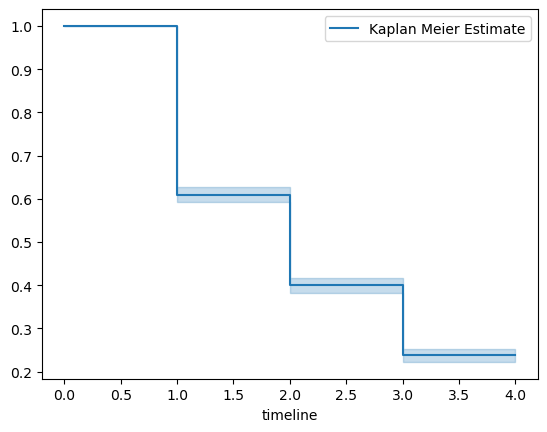

In [34]:
kmf_4_all = km_simple(df_users_4_weeks_demo)

The y-axis represents the probability the subject still hasn't experienced the event of interest (so didn't stop working out) after time t where time t is on the x-axis. In order to see how uncertain we are about the point estimates, we use the confidence intervals. The median time is the time where on average, half of the population has experienced the event of interest.

So here, the probability that the user didn't stop working out in a first week is 0.62, in the second week it's 0.41 and in third - 0.24.

##### By gender groups

Here, we will compare estimators of gender groups.

Median survival time for female is 2.0
Survival function for female estimates: 
           female
timeline        
0.00        1.00
1.00        0.57
2.00        0.34
3.00        0.19
4.00        0.19
Median survival time for male is 2.0
Survival function for male estimates: 
           male
timeline      
0.00      1.00
1.00      0.64
2.00      0.44
3.00      0.27
4.00      0.27


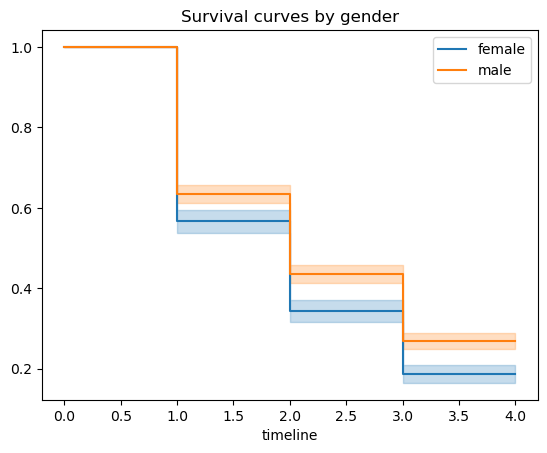

(<lifelines.KaplanMeierFitter:"male", fitted with 1866 total observations, 502 right-censored observations>,
 None)

In [35]:
kaplan_meier_by_cat(df_users_4_weeks_demo, 'gender')

In [36]:
km_logrank_test(df_users_4_weeks_demo, 'gender')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          31.90 <0.005     25.87

By logrank test, it is seen that there are differences between groups in survival curves in gender. For both categories, median survival times is 2 weeks. Probability of not dropping working in the first week is 0.57 and 0.64, for women and men respectively. In the second week - 0.34 and 0.44, third week - 0.19 and 0.27.

##### By activity level groups

Here, we will compare estimators of activity level groups (active, very active, sedentary).

Median survival time for active is 2.0
Survival function for active estimates: 
           active
timeline        
0.00        1.00
1.00        0.64
2.00        0.44
3.00        0.26
4.00        0.26
Median survival time for sedentary is 2.0
Survival function for sedentary estimates: 
           sedentary
timeline           
0.00           1.00
1.00           0.53
2.00           0.31
3.00           0.16
4.00           0.16
Median survival time for very active is 2.0
Survival function for very active estimates: 
           very active
timeline             
0.00             1.00
1.00             0.70
2.00             0.46
3.00             0.35
4.00             0.35


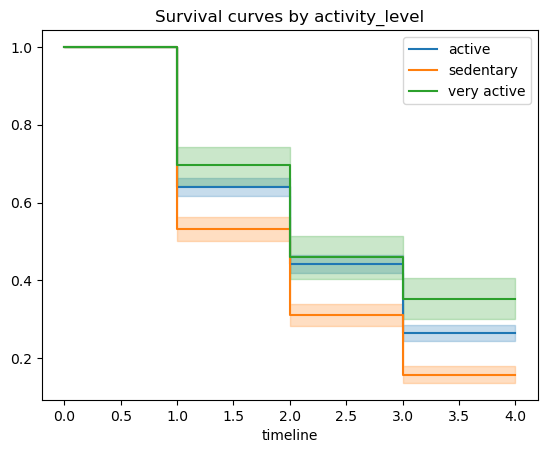

(<lifelines.KaplanMeierFitter:"very active", fitted with 309 total observations, 109 right-censored observations>,
 None)

In [37]:
kaplan_meier_by_cat(df_users_4_weeks_demo, 'activity_level')

In [38]:
km_logrank_test(df_users_4_weeks_demo, 'activity_level')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                       test_statistic      p  -log2(p)
active    sedentary             56.27 <0.005     43.85
          very active            6.85   0.01      6.82
sedentary very active           48.75 <0.005     38.32

There are significant differences between survival curves of activity level groups. In all of the cases p-value is less than 0.05. 

For sedentary group, probability of not dropping working out in the first week is 0.53, second week is 0.31 and in the third week is 0.16. For active group, probability of not dropping working out in the first week is 0.64, second week is 0.44 and in the third week is 0.26. For very active group, probability of not dropping working out in the first week is 0.7, second week is 0.46 and in the third week is 0.35.  

##### By goal groups

Here, we will compare estimators of goal groups (gain, lose, antiaging).

Median survival time for lose is 2.0
Survival function for lose estimates: 
           lose
timeline      
0.00      1.00
1.00      0.55
2.00      0.33
3.00      0.17
4.00      0.17
Median survival time for gain is 2.0
Survival function for gain estimates: 
           gain
timeline      
0.00      1.00
1.00      0.64
2.00      0.44
3.00      0.29
4.00      0.29
Median survival time for antiaging is 2.0
Survival function for antiaging estimates: 
           antiaging
timeline           
0.00           1.00
1.00           0.65
2.00           0.45
3.00           0.26
4.00           0.26


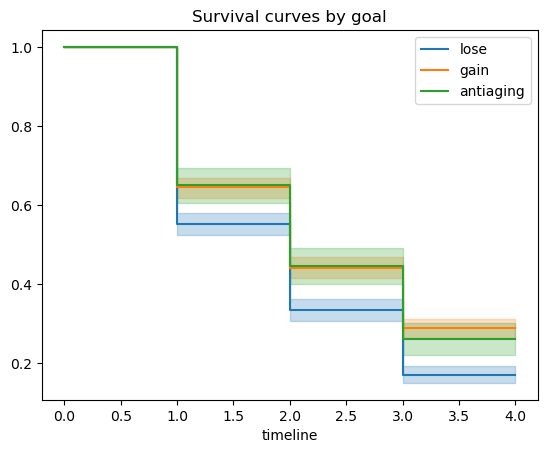

(<lifelines.KaplanMeierFitter:"antiaging", fitted with 456 total observations, 119 right-censored observations>,
 None)

In [39]:
kaplan_meier_by_cat(df_users_4_weeks_demo, 'goal')

In [40]:
km_logrank_test(df_users_4_weeks_demo, 'goal')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                test_statistic      p  -log2(p)
antiaging gain            0.40   0.53      0.92
          lose           21.53 <0.005     18.13
gain      lose           51.35 <0.005     40.24

There are differences between survival curves of antiaging and lose groups and gain and lose groups. Groups antiaging and gain have not difference of survival curves (p = 0.68).

For gain group, probability of not dropping working out in the first week is 0.64, second week is 0.44 and in the third week is 0.29. For lose group, probability of not dropping working out in the first week is 0.55, second week is 0.33 and in the third week is 0.17. For antiaging group, probability of not dropping working out in the first week is 0.65, second week is 0.45 and in the third week is 0.26.  

##### By body type group

Here, we will compare estimators of body type groups (thin, mid, strong).

Median survival time for mid is 2.0
Survival function for mid estimates: 
           mid
timeline     
0.00     1.00
1.00     0.62
2.00     0.41
3.00     0.24
4.00     0.24
Median survival time for thin is 2.0
Survival function for thin estimates: 
           thin
timeline      
0.00      1.00
1.00      0.61
2.00      0.40
3.00      0.24
4.00      0.24
Median survival time for strong is 2.0
Survival function for strong estimates: 
           strong
timeline        
0.00        1.00
1.00        0.54
2.00        0.32
3.00        0.21
4.00        0.21


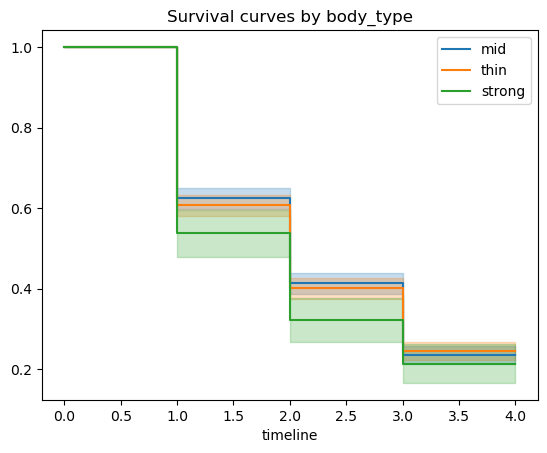

(<lifelines.KaplanMeierFitter:"strong", fitted with 273 total observations, 58 right-censored observations>,
 None)

In [41]:
kaplan_meier_by_cat(df_users_4_weeks_demo, 'body_type')

In [42]:
km_logrank_test(df_users_4_weeks_demo, 'body_type')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
               test_statistic    p  -log2(p)
mid    strong            4.23 0.04      4.66
       thin              0.00 0.96      0.05
strong thin              3.78 0.05      4.27

There are differences between survival curves of mid and strong groups and strong and thin groups (p = 0.04). Groups mid and thin have not difference of survival curves (p = 0.68).

For thin group, probability of not dropping working out in the first week is 0.61, second week is 0.40 and in the third week is 0.24. For mid group, probability of not dropping working out in the first week is 0.62, second week is 0.41 and in the third week is 0.24. For strong group, probability of not dropping working out in the first week is 0.54, second week is 0.32 and in the third week is 0.21.  

##### By newsletter subscription group

Here, we will compare estimators of newsletter subscription (True, False).

Median survival time for False is 2.0
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.59
2.00       0.39
3.00       0.23
4.00       0.23
Median survival time for True is 2.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.62
2.00      0.40
3.00      0.24
4.00      0.24


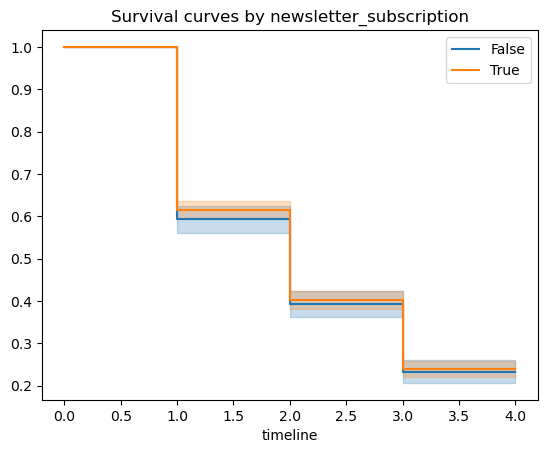

(<lifelines.KaplanMeierFitter:"True", fitted with 2120 total observations, 507 right-censored observations>,
 None)

In [43]:
kaplan_meier_by_cat(df_users_4_weeks_demo, 'newsletter_subscription')

In [44]:
km_logrank_test(df_users_4_weeks_demo, 'newsletter_subscription')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.41 0.52      0.94

There are no differences between survival curves in newsletter subscription (p = 0.48).

For true group, probability of not dropping working out in the first week is 0.62, second week is 0.40 and in the third week is 0.24. For false group, probability of not dropping working out in the first week is 0.59, second week is 0.39 and in the third week is 0.23. 

##### By notification settings group

Here, we will compare estimators of notification setting (True, False).

Median survival time for True is 2.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.61
2.00      0.40
3.00      0.24
4.00      0.24
Median survival time for False is 3.0
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.75
2.00       0.58
3.00       0.33
4.00       0.33


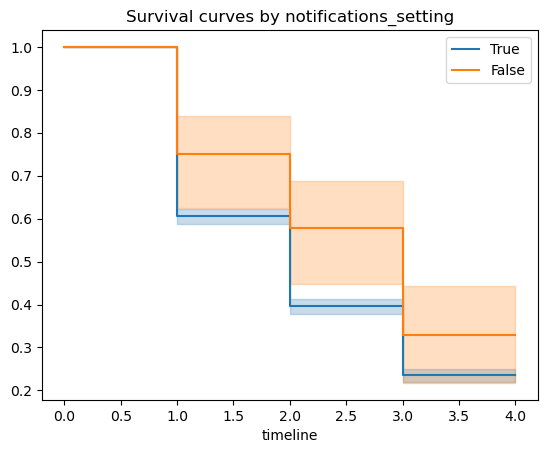

(<lifelines.KaplanMeierFitter: fitted with 64 total observations, 21 right-censored observations>,
 None)

In [45]:
kaplan_meier_by_cat(df_users_4_weeks_demo, 'notifications_setting')

In [46]:
km_logrank_test(df_users_4_weeks_demo, 'notifications_setting')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.38 0.02      5.62

There are differences between survival curves in newsletter subscription (p = 0.02).

For true group, probability of not dropping working out in the first week is 0.61, second week is 0.40 and in the third week is 0.24. For false group, probability of not dropping working out in the first week is 0.75, second week is 0.58 and in the third week is 0.33. 

##### By training days setting groups

Here, we will compare estimators of training days setting.

Median survival time for 3.0 is 2.0
Survival function for 3.0 estimates: 
           3.00
timeline      
0.00      1.00
1.00      0.62
2.00      0.41
3.00      0.24
4.00      0.24
Median survival time for 4.0 is 2.0
Survival function for 4.0 estimates: 
           4.00
timeline      
0.00      1.00
1.00      0.66
2.00      0.45
3.00      0.27
4.00      0.27
Median survival time for 5.0 is 2.0
Survival function for 5.0 estimates: 
           5.00
timeline      
0.00      1.00
1.00      0.58
2.00      0.36
3.00      0.23
4.00      0.23
Median survival time for 6.0 is 2.0
Survival function for 6.0 estimates: 
           6.00
timeline      
0.00      1.00
1.00      0.57
2.00      0.38
3.00      0.21
4.00      0.21
Median survival time for 2.0 is 2.0
Survival function for 2.0 estimates: 
           2.00
timeline      
0.00      1.00
1.00      0.64
2.00      0.42
3.00      0.24
4.00      0.24
Median survival time for 1.0 is 2.0
Survival function for 1.0 estimates: 
           1.00
timeline  

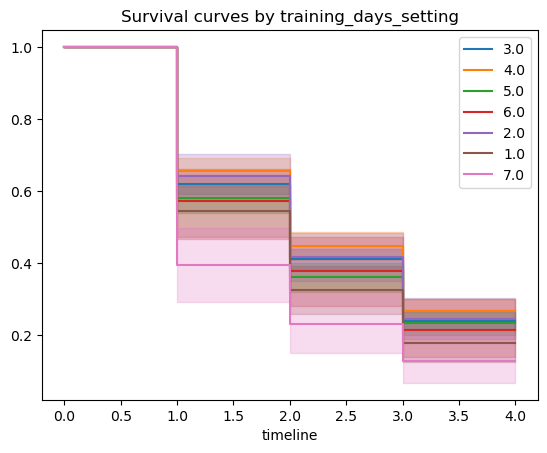

(<lifelines.KaplanMeierFitter:"7.0", fitted with 86 total observations, 11 right-censored observations>,
 None)

In [47]:
kaplan_meier_by_cat(df_users_4_weeks_demo, 'training_days_setting')

In [48]:
km_logrank_test(df_users_4_weeks_demo, 'training_days_setting')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
           test_statistic      p  -log2(p)
1.00 2.00            4.28   0.04      4.70
     3.00            5.56   0.02      5.77
     4.00           10.12 <0.005      9.41
     5.00            2.09   0.15      2.76
     6.00            0.65   0.42      1.25
     7.00            3.27   0.07      3.83
2.00 3.00            0.08   0.78      0.36
     4.00            0.54   0.46      1.11
     5.00            0.94   0.33      1.59
     6.00            0.74   0.39      1.36
     7.00           11.94 <0.005     10.83
3.00 4.00            2.59   0.11      3.22
     5.00            1.31   0.25      1.98
     6.00            0.63   0.43      1.23
     7.00           14.32 <0.005     12.67
4.00 5.00            5.40   0.02      5.63
     6.00            2.24   0.13      2.90
     7.00           19.11 <0.005     16.30
5.00 6.00            0.05   0.82      0.29
     7.00            9.24 <0.005      8.72
6.00 7.00            4.89   0.03      5.21

The are differences between survival curves for days 1 and 2, 1 and 3, 1 and 4, 2 and 7, 3 and 7, 4 and 5, 4 and 7, 5 and 7 and 6 and 7.

##### By clusters for gender, body_type, newsletter_subscription and BMI

Here, the best clustering method was hierarchical cluseting with average linkage and 2 clusters.

Median survival time for 9 is 2.0
Survival function for 9 estimates: 
             9
timeline     
0.00     1.00
1.00     0.57
2.00     0.35
3.00     0.13
4.00     0.13
Median survival time for 5 is 2.0
Survival function for 5 estimates: 
             5
timeline     
0.00     1.00
1.00     0.63
2.00     0.42
3.00     0.28
4.00     0.28
Median survival time for 4 is 2.0
Survival function for 4 estimates: 
             4
timeline     
0.00     1.00
1.00     0.59
2.00     0.38
3.00     0.20
4.00     0.20
Median survival time for 2 is 2.0
Survival function for 2 estimates: 
             2
timeline     
0.00     1.00
1.00     0.66
2.00     0.47
3.00     0.27
4.00     0.27
Median survival time for 1 is 2.0
Survival function for 1 estimates: 
             1
timeline     
0.00     1.00
1.00     0.56
2.00     0.32
3.00     0.20
4.00     0.20
Median survival time for 6 is 2.0
Survival function for 6 estimates: 
             6
timeline     
0.00     1.00
1.00     0.63
2.00     0.48
3.00     0.32


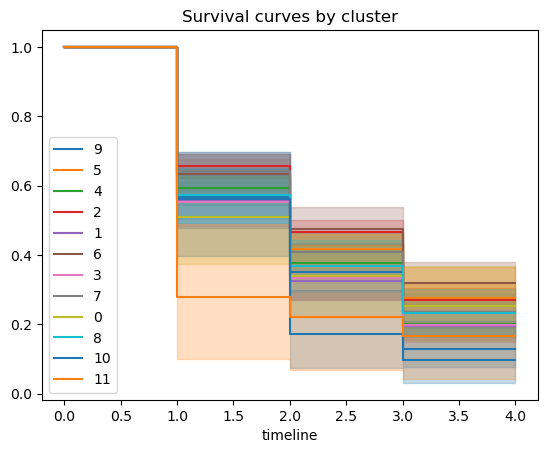

(<lifelines.KaplanMeierFitter:"11", fitted with 18 total observations, 3 right-censored observations>,
 None)

In [49]:
kaplan_meier_by_cat(df_users_4_weeks_demo, 'cluster')

In [50]:
km_logrank_test(df_users_4_weeks_demo, 'cluster')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
       test_statistic      p  -log2(p)
0  1             0.21   0.65      0.62
   2             1.64   0.20      2.31
   3             0.16   0.69      0.53
   4             0.01   0.93      0.10
   5             0.99   0.32      1.65
   6             2.17   0.14      2.83
   7             0.38   0.54      0.90
   8             0.01   0.91      0.13
   9             0.83   0.36      1.47
   10            1.82   0.18      2.49
   11            1.34   0.25      2.02
1  2            13.66 <0.005     12.16
   3             0.01   0.93      0.10
   4             0.64   0.42      1.24
   5             8.17 <0.005      7.88
   6            11.55 <0.005     10.53
   7             3.80   0.05      4.29
   8             0.79   0.37      1.42
   9             0.51   0.48      1.07
   10            2.13   0.14      2.79
   11            1.58   0.21      2.26
2  3             9.10 <0.005      8.61
   4            10.15 <0.005      9.44
   5             0.25   0.62      0.70
   6             0.70   0.40      1.31
   7             1.67   0.20      2.35
   8             3.09   0.08      3.67
   9            11.69 <0.005     10.63
   10           10.56 <0.005      9.75
   11            5.12   0.02      5.41
3  4             0.35   0.55      0.85
   5             5.67   0.02      5.85
   6             8.83 <0.005      8.40
   7             2.69   0.10      3.31
   8             0.55   0.46      1.13
   9             0.54   0.46      1.11
   10            2.15   0.14      2.81
   11            1.49   0.22      2.17
4  5             5.45   0.02      5.68
   6             9.26 <0.005      8.74
   7             1.80   0.18      2.48
   8             0.12   0.73      0.46
   9             1.81   0.18      2.49
   10            3.96   0.05      4.42
   11            2.25   0.13      2.90
5  6             1.17   0.28      1.84
   7             0.56   0.46      1.14
   8             1.68   0.19      2.36
   9             8.30 <0.005      7.98
   10            7.77   0.01      7.56
   11            4.32   0.04      4.73
6  7             2.79   0.09      3.40
   8             3.94   0.05      4.41
   9            11.95 <0.005     10.84
   10           10.28 <0.005      9.54
   11            5.00   0.03      5.30
7  8             0.46   0.50      1.01
   9             5.02   0.03      5.32
   10            6.42   0.01      6.47
   11            3.68   0.06      4.18
8  9             1.92   0.17      2.59
   10            3.45   0.06      3.98
   11            2.14   0.14      2.80
9  10            1.47   0.23      2.15
   11            0.90   0.34      1.54
10 11            0.23   0.63      0.66

There is no statistical difference between clusters survival curves (p = 0.21).

#### Cox proportional hazards regression

For proportional hazards, we need to create dummies variables and split the data into training and testing subsets.

In [37]:
df_users_4_weeks_demo3 = df_users_4_weeks_demo.copy()
df_users_4_weeks_demo3.drop(['cluster'], axis = 1, inplace = True)

df_users_4_weeks_demo3['cens'] = df_users_4_weeks_demo3['cens'].astype('int64')

df_users_4_weeks_demo_dummies = pd.get_dummies(df_users_4_weeks_demo3, drop_first = True)

df_users_4_weeks_demo3['cens'] = df_users_4_weeks_demo3['cens'].astype('category')

In [38]:
df_users_4_weeks_demo_dummies.head()

height  weight  body_fat   BMI  cens  surv_time  age_in_years  gender_male  \
0  180.00   70.00     15.00 21.60     1          3         32.00            1   
1  186.00   79.00     10.00 22.84     0          4         48.00            1   
2  186.00   86.00     30.00 24.86     0          4         37.00            1   
3  178.00   70.00     30.00 22.09     1          3         29.00            1   
4  164.00   62.00     30.00 23.05     0          4         43.00            0   

   activity_level_sedentary  activity_level_very active  goal_gain  goal_lose  \
0                         0                           0          1          0   
1                         0                           0          1          0   
2                         0                           0          1          0   
3                         0                           0          0          1   
4                         0                           0          0          1   

   body_type_strong  body_type_thin  newsletter_subscription_True  \
0                 0               1                             1   
1                 0               0                             1   
2                 0               0                             0   
3                 0               0                             0   
4                 0               1                             1   

   notifications_setting_True  training_days_setting_2.0  \
0                           1                          0   
1                           1                          0   
2                           0                          0   
3                           1                          0   
4                           1                          0   

   training_days_setting_3.0  training_days_setting_4.0  \
0                          0                          1   
1                          0                          0   
2                          1                          0   
3                          0                          0   
4                          1                          0   

   training_days_setting_5.0  training_days_setting_6.0  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          1                          0   
4                          0                          0   

   training_days_setting_7.0  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [39]:
cens = df_users_4_weeks_demo_dummies['cens']
surv_time = df_users_4_weeks_demo_dummies['surv_time']

In [40]:
cens = cens.replace(1, True)
cens = cens.replace(0, False)

In [41]:
y = pd.DataFrame({'cens': cens, 'surv_time': surv_time})

In [42]:
y_tr = y.to_records(index = False)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_users_4_weeks_demo_dummies, y_tr, test_size = 0.3, random_state = 42)

In [44]:
actual = X_test['surv_time'].astype('int64')

Here, we check how many users we have in both of the sets and censoring.

In [59]:
print('Number of non censored useres in train set: {} (the event happened)'.format(X_train['cens'].sum()), '\n',
      'Number of censored users in train set: {} (the event did not happened)'.format(len(X_train) - X_train['cens'].sum()))

Number of non censored useres in train set: 1629 (the event happened) 
 Number of censored users in train set: 494 (the event did not happened)


In [60]:
print('Number of non censored useres in test set: {} (the event happened)'.format(X_test['cens'].sum()), '\n',
      'Number of censored users in test set: {} (the event did not happened)'.format(len(X_test) - X_test['cens'].sum()))

Number of non censored useres in test set: 685 (the event happened) 
 Number of censored users in test set: 226 (the event did not happened)


Now we fit the data into the model and check if the assumptions for Cox proportional hazards model are met.

In [61]:
cph_demo = cox_model(X_train, summary = False)

In [62]:
x = cph_demo.check_assumptions(X_train, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 2123 total observations, 494 right-censored observations>
         test_name = proportional_hazard_test

---
                                   test_statistic    p  -log2(p)
BMI                          km              1.59 0.21      2.27
                             rank            1.47 0.23      2.15
activity_level_sedentary     km              0.02 0.89      0.17
                             rank            0.07 0.79      0.35
activity_level_very active   km              0.84 0.36      1.47
                             rank            0.23 0.63      0.66
body_fat                     km              0.00 1.00      0.00
                             rank            0.05 0.82      0.29
body_type_strong             km              4.92 0.03      5.24
                             rank            4.18 0.04      4.61
body_type_thin               km              1.34 0.25      2.01
                             rank            2.38 0.12      3.02
gender_male                  km              0.05 0.83      0.27
                             rank            0.07 0.79      0.35
goal_gain                    km              4.00 0.05      4.46
                             rank            1.69 0.19      2.37
goal_lose                    km              1.55 0.21      2.23
                             rank            0.26 0.61      0.71
height                       km              1.09 0.30      1.76
                             rank            1.19 0.27      1.86
newsletter_subscription_True km              0.06 0.80      0.31
                             rank            0.05 0.82      0.29
notifications_setting_True   km              0.58 0.45      1.16
                             rank            0.52 0.47      1.09
training_days_setting_2.0    km              1.26 0.26      1.93
                             rank            0.30 0.58      0.78
training_days_setting_3.0    km              0.32 0.57      0.81
                             rank            0.20 0.66      0.60
training_days_setting_4.0    km              0.48 0.49      1.04
                             rank            0.15 0.70      0.52
training_days_setting_5.0    km              0.32 0.57      0.81
                             rank            0.23 0.63      0.66
training_days_setting_6.0    km              0.08 0.78      0.36
                             rank            0.15 0.70      0.51
training_days_setting_7.0    km              1.14 0.29      1.81
                             rank            1.11 0.29      1.78
weight                       km              1.08 0.30      1.75
                             rank            1.12 0.29      1.79



1. Variable 'goal_gain' failed the non-proportional test: p-value is 0.0455.

   Advice: with so few unique values (only 2), you can include `strata=['goal_gain', ...]` in the
call in `.fit`. See documentation in link [E] below.

2. Variable 'body_type_strong' failed the non-proportional test: p-value is 0.0265.

   Advice: with so few unique values (only 2), you can include `strata=['body_type_strong', ...]` in
the call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]

It is seen that there are some violations of assumptions, so we stratify variable called *body_type_strong*.

In [63]:
cph_demo = cox_model(X_train, summary = True, strata_val = ['goal_gain','body_type_strong'])

<lifelines.CoxPHFitter: fitted with 2123 total observations, 494 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
                   strata = ['goal_gain', 'body_type_strong']
      baseline estimation = breslow
   number of observations = 2123
number of events observed = 1629
   partial log-likelihood = -9911.648
         time fit was run = 2023-05-11 07:55:50 UTC

---
                               coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      z       p
covariate                                                                                              
height                        0.010      1.010                0.973                1.047  0.513   0.608
weight                       -0.005      0.995                0.954                1.038 -0.231   0.818
body_fat                      0.006      1.006                0.998                1.015  1.432   0.152
BMI                           0.034      1.034                0.914                1.170  0.538   0.591
gender_male                  -0.315      0.729                0.629                0.846 -4.165 <0.0005
activity_level_sedentary      0.245      1.277                1.144                1.425  4.372 <0.0005
activity_level_very active   -0.173      0.841                0.697                1.014 -1.816   0.069
goal_lose                     0.122      1.130                0.966                1.323  1.523   0.128
body_type_thin                0.021      1.021                0.916                1.139  0.380   0.704
newsletter_subscription_True -0.024      0.976                0.875                1.088 -0.436   0.662
notifications_setting_True    0.270      1.311                0.924                1.860  1.515   0.130
training_days_setting_2.0    -0.121      0.886                0.680                1.155 -0.895   0.371
training_days_setting_3.0    -0.106      0.900                0.735                1.101 -1.027   0.304
training_days_setting_4.0    -0.175      0.839                0.677                1.041 -1.591   0.112
training_days_setting_5.0    -0.083      0.920                0.738                1.148 -0.736   0.462
training_days_setting_6.0    -0.053      0.948                0.691                1.301 -0.329   0.742
training_days_setting_7.0     0.225      1.252                0.901                1.740  1.339   0.181
---
Concordance = 0.591
Partial AIC = 19857.297
log-likelihood ratio test = 101.724 on 17 df
-log2(p) of ll-ratio test = 44.416

And again we check the assumptions, and everything is okay now.

In [64]:
cph_demo.check_assumptions(X_train)

Proportional hazard assumption looks okay.


[]

In [65]:
X_train2 = X_train.drop(['weight'], axis = 1)

X_train2.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

X_train2.drop(['body_type_thin'], axis = 1, inplace = True)

X_train2.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

X_train2.drop(['training_days_setting_5.0'], axis = 1, inplace = True)

X_train2.drop(['training_days_setting_2.0'], axis = 1, inplace = True)

X_train2.drop(['training_days_setting_3.0'], axis = 1, inplace = True)

X_train2.drop(['height'], axis = 1, inplace = True)

X_train2.drop(['training_days_setting_4.0'], axis = 1, inplace = True)

X_train2.drop(['notifications_setting_True'], axis = 1, inplace = True)

X_train2.drop(['body_fat'], axis = 1, inplace = True)

X_train2.drop(['goal_lose'], axis = 1, inplace = True)

In [66]:
cox_model(X_train2, summary = True, strata_val = ['goal_gain','body_type_strong'])

<lifelines.CoxPHFitter: fitted with 2123 total observations, 494 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
                   strata = ['goal_gain', 'body_type_strong']
      baseline estimation = breslow
   number of observations = 2123
number of events observed = 1629
   partial log-likelihood = -9918.516
         time fit was run = 2023-05-11 07:55:51 UTC

---
                             coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      z       p
covariate                                                                                            
BMI                         0.031      1.031                1.016                1.047  4.015 <0.0005
gender_male                -0.273      0.761                0.683                0.847 -4.977 <0.0005
activity_level_sedentary    0.268      1.308                1.175                1.455  4.922 <0.0005
activity_level_very active -0.184      0.832                0.692                1.000 -1.959   0.050
training_days_setting_7.0   0.342      1.408                1.071                1.853  2.447   0.014
---
Concordance = 0.583
Partial AIC = 19847.033
log-likelihood ratio test = 87.988 on 5 df
-log2(p) of ll-ratio test = 55.643

<lifelines.CoxPHFitter: fitted with 2123 total observations, 494 right-censored observations>

After deleting all of the nonsignificant variables, the CI is lower than before (that is not good) and partial AIC is also lower (this means this model can be better). After consideration, the model with nonsignificant variables and higher concordance index will be used for further analysis.

P-value parameters are significant only for gender_male, activity_level_sedentary, goal_lose, training_days_setting at day 4 and 7, so we can say that we can group our data based on those demographic parameters.

As a Hazard Ratio (HR) we can take exponential value of coefficient (exp(coef)). 

The p-value for gender is les than 0.0005 and HR (Hazard Ratio) is 0.729 indicating a strong relationship between the user male gender and decreased risk of dropping out, so here, being male reduces the hazard by factor 0.73 (or 27%). That means, men have higher survival chances (that they won't drop out).

The p-value for activity level sedentary is less than 0.005 and HR is 1.27, indicating a strong relationship between sedentary activity level and increased risk of dropping out. Person with sedentary activity level has 27% higher risk of dropping out. 

When:

* HR = 1: No effect,
* HR < 1: Reduction in the hazard,
* HR > 1: Increase in the hazard.

Below there is a plot that shows that there are significant differences.

<AxesSubplot: xlabel='HR (95% CI)'>

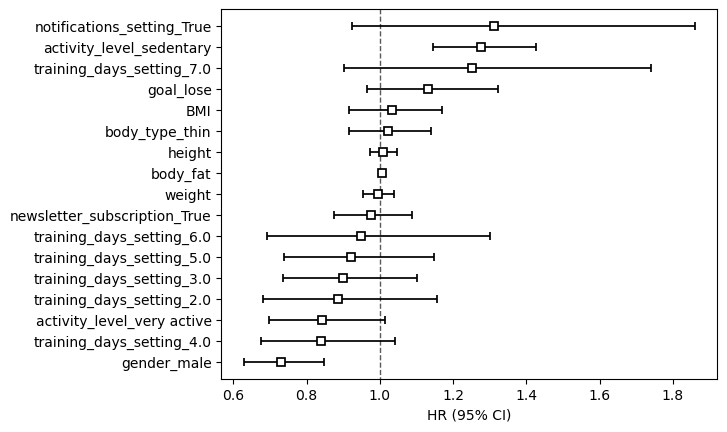

In [67]:
cph_demo.plot(hazard_ratios=True)

Concordance Index is not too big, but it is also acceptable, but it also shows that it is not so different from random model. (for a survival model C-index ≈ weighted average of the area under time-specific ROC. 
* 0.5 is the expected result from random predictions,
* 1.0 is perfect concordance and,
* 0.0 is perfect anti-concordance (multiply predictions with -1 to get 1.0)
)

Now, let's check the predictions but only for first 5 users in the set. 

In [68]:
cph_demo.predict_survival_function(X_test.iloc[0:5, :])

2880  2179  794   2370  432 
1.00  0.69  0.67  0.71  0.75  0.74
2.00  0.48  0.45  0.52  0.57  0.63
3.00  0.30  0.27  0.34  0.42  0.55
4.00  0.30  0.27  0.34  0.42  0.55

<AxesSubplot: >

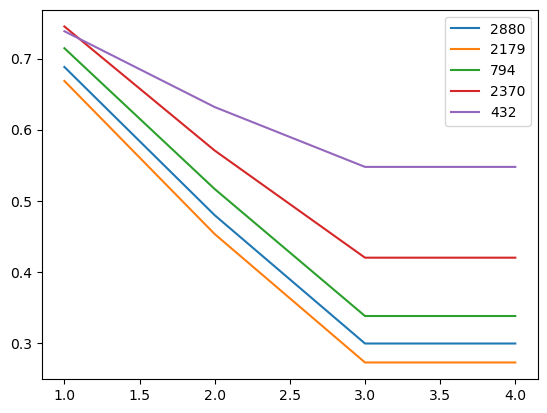

In [69]:
cph_demo.predict_survival_function(X_test.iloc[0:5, :]).plot()

We can see that user with row number 432 has biggest chances to not drop out and user 2179 has the biggest chances to drop out.

Below there are values of partial AIC and log-likelighood. The lower AIC is, the better the model is. Log-likelihood - we want to maximize it (the bigger the better). 

In [70]:
print("Partial AIC is: {} \n Log likelihood score is: {}".format(cph_demo.AIC_partial_, cph_demo.score(X_test))) # log likelihood score

Partial AIC is: 19857.29671294574 
 Log likelihood score is: -3.966027282916723


Survival_probability_calibration function is used to measure fitted survival model against observed frequencies of events. The ICI (integrated calibration index) is a weighted average of the absolute difference between the calibration curve and the diagonal line of perfect calibration, where the absolute differences are weighted by the density function of the weights. This is equivalent to integrating f(x) over the distribution of the predicted probabilities. E50 represent the median of the absolute difference between observed and predicted probabilities, we want the values to be close to 0.

(https://medium.com/nerd-for-tech/customer-churn-survival-analysis-2c73385bf648)

ICI =  0.11428909761504712
E50 =  0.12036199754990018


(<AxesSubplot: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 4 mortality'}, xlabel='Predicted probability of \nt ≤ 4 mortality', ylabel='Observed probability of \nt ≤ 4 mortality'>,
 0.11428909761504712,
 0.12036199754990018)

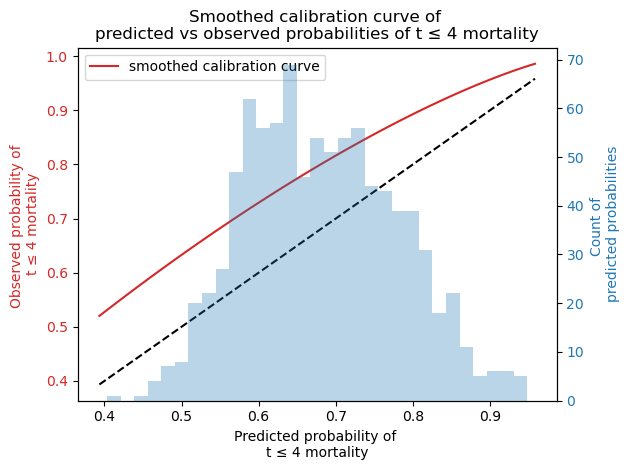

In [71]:
survival_probability_calibration(cph_demo, X_test, t0=4)

Below there is a predicted median time of dropping out the workouts.

In [72]:
cph_demo.predict_median(X_test).median()

2.0

Now, we'll check the MAE. When the survival curve of an individual does not cross 0.5, then the value of prediction is infinity, so when it happens, we will replace the infinity values with median. Then we calculate MAE.

In [73]:
pred_cph_demo = cph_demo.predict_median(X_test)

pred_cph_demo = pd.DataFrame(pred_cph_demo)

In [74]:
value = pred_cph_demo[0.5].quantile(0.5)
pred_cph_demo = pred_cph_demo.replace(np.inf, value)


In [75]:
mae(actual, pred_cph_demo)

1.057080131723381

This value is 1.06, so in general it's not so bad, but here it may not be so good, according to the fact that the data have only 4 timestamps, and the mean error is 1 week.

Now, we'll check which single variables are the best risk predictors. We will fit a Cox model to each variable individually and record the c-index on the training and test set and compare the results.

In [76]:
cox_demo_ci = c_i_comp_cox(X_train, X_test)

cox_demo_ci.sort_values(by = 'training set', ascending = False)

training set test set
activity_level_sedentary             0.56     0.54
body_fat                             0.55     0.55
goal_lose                            0.55     0.54
gender_male                          0.54     0.52
goal_gain                            0.54     0.53
BMI                                  0.53     0.55
height                               0.53     0.52
activity_level_very active           0.52     0.51
training_days_setting_4.0            0.51     0.53
body_type_strong                     0.51     0.51
weight                               0.51     0.53
training_days_setting_7.0            0.51     0.51
training_days_setting_3.0            0.51     0.51
notifications_setting_True           0.51     0.51
training_days_setting_5.0            0.51     0.52
training_days_setting_2.0            0.50     0.50
training_days_setting_6.0            0.50     0.50
newsletter_subscription_True         0.50     0.52
body_type_thin                       0.50     0.51

Most of the single variables predictors have improved values in test data. Probably, the best variables would be body fat, sedentary activity level, lose goal, BMI, male gender and gain goal. From the previous analysis with all variables, variables with gender, activity_level and goal had significant HR. 

#### Parametric models

Below AFT models will be checked (first Fitters, then models). Models taken into consideration are (their distributions are):
* Weibull,
* LogNormal,
* LogLogistic.

Below there is a table with AIC values for each fitter.

In [45]:
parametric_surv(X_train)

AIC
Weibull   6362.47
Lognormal 5921.92
LogLog    6027.95

What the table above, we can see that the best model from AFT models (Weibull, LogNormal and LogLgistic) is LogNoirmal. Now, we fit the model to the test set.

In [46]:
lognormAFT = LogNormalAFTFitter()
lognormAFT.fit(X_train, duration_col = 'surv_time', event_col = 'cens')
lognormAFT.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 501 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 1622
           log-likelihood = -2887.995
         time fit was run = 2023-05-18 07:27:37 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                            
mu_    BMI                          -0.009      0.991      0.038           -0.083            0.065                0.920                1.067
       activity_level_sedentary     -0.108      0.898      0.035           -0.177           -0.038                0.838                0.962
       activity_level_very active    0.058      1.059      0.054           -0.049            0.164                0.952                1.178
       age_in_years                  0.009      1.009      0.002            0.005            0.012                1.005                1.012
       body_fat                     -0.008      0.992      0.003           -0.013           -0.002                0.987                0.998
       body_type_strong             -0.058      0.944      0.057           -0.170            0.054                0.844                1.056
       body_type_thin               -0.049      0.952      0.035           -0.118            0.019                0.889                1.019
       gender_male                   0.131      1.140      0.047            0.038            0.223                1.039                1.250
       goal_gain                    -0.015      0.985      0.047           -0.108            0.077                0.898                1.080
       goal_lose                    -0.046      0.955      0.051           -0.145            0.053                0.865                1.055
       height                       -0.002      0.998      0.011           -0.024            0.019                0.976                1.020
       newsletter_subscription_True  0.046      1.048      0.035           -0.022            0.115                0.978                1.122
       notifications_setting_True   -0.282      0.754      0.113           -0.505           -0.060                0.604                0.941
       training_days_setting_2.0     0.158      1.171      0.086           -0.010            0.326                0.990                1.385
       training_days_setting_3.0     0.130      1.139      0.067           -0.001            0.262                0.999                1.299
       training_days_setting_4.0     0.211      1.235      0.071            0.071            0.351                1.074                1.421
       training_days_setting_5.0     0.129      1.138      0.072           -0.013            0.270                0.987                1.311
       training_days_setting_6.0     0.158      1.171      0.106           -0.051            0.366                0.950                1.442
       training_days_setting_7.0    -0.078      0.925      0.110           -0.293            0.136                0.746                1.146
       weight                        0.000      1.000      0.013           -0.025            0.026                0.975                1.026
       Intercept                     1.284      3.611      1.892           -2.425            4.993                0.088              147.315
sigma_ Intercept                    -0.361      0.697      0.019           -0.397           -0.324                0.672                0.723

                                      cmp to       z       p   -log2(p)
param  covariate                                                       
mu_    BMI                             0.000  -0.246   0.806      0.311
       activity_level_sedentary        0.000  -3.040   0.002  

In [49]:
# for the database with age

X_train3 = X_train.drop(['height'], axis = 1)

X_train3.drop(['BMI'], axis = 1, inplace = True)

X_train3.drop(['goal_gain'], axis = 1, inplace = True)

X_train3.drop(['training_days_setting_7.0'], axis = 1, inplace = True)

X_train3.drop(['goal_lose'], axis = 1, inplace = True)

X_train3.drop(['body_type_strong'], axis = 1, inplace = True)

X_train3.drop(['activity_level_very active'], axis = 1, inplace = True)

X_train3.drop(['body_type_thin'], axis = 1, inplace = True)

X_train3.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

X_train3.drop(['weight'], axis = 1, inplace = True)

X_train3.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

X_train3.drop(['training_days_setting_5.0'], axis = 1, inplace = True)

X_train3.drop(['training_days_setting_2.0'], axis = 1, inplace = True)

X_train3.drop(['training_days_setting_3.0'], axis = 1, inplace = True)

In [47]:
# for the database without the age variable

X_train3 = X_train.drop(['height'], axis = 1)

X_train3.drop(['BMI'], axis = 1, inplace = True)

X_train3.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

X_train3.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

X_train3.drop(['body_type_thin'], axis = 1, inplace = True)

X_train3.drop(['training_days_setting_5.0'], axis = 1, inplace = True)

X_train3.drop(['body_type_strong'], axis = 1, inplace = True)

X_train3.drop(['goal_gain'], axis = 1, inplace = True)

X_train3.drop(['training_days_setting_3.0'], axis = 1, inplace = True)

X_train3.drop(['training_days_setting_2.0'], axis = 1, inplace = True)

X_train3.drop(['weight'], axis = 1, inplace = True)

X_train3.drop(['training_days_setting_4.0'], axis = 1, inplace = True)

X_train3.drop(['activity_level_very active'], axis = 1, inplace = True)

X_train3.drop(['notifications_setting_True'], axis = 1, inplace = True)

In [76]:
lognormAFT.fit(X_train3, duration_col = 'surv_time', event_col = 'cens')
lognormAFT.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 501 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 1622
           log-likelihood = -2897.329
         time fit was run = 2023-05-18 07:32:57 UTC

---
                                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                          
mu_    activity_level_sedentary   -0.126      0.882      0.035           -0.194           -0.058                0.823                0.944
       age_in_years                0.009      1.009      0.002            0.006            0.012                1.006                1.013
       body_fat                   -0.011      0.989      0.002           -0.015           -0.008                0.985                0.992
       gender_male                 0.119      1.126      0.033            0.055            0.183                1.057                1.201
       notifications_setting_True -0.252      0.777      0.112           -0.472           -0.033                0.624                0.968
       training_days_setting_4.0   0.097      1.102      0.039            0.021            0.173                1.021                1.188
       Intercept                   0.837      2.310      0.137            0.568            1.107                1.764                3.024
sigma_ Intercept                  -0.356      0.701      0.019           -0.392           -0.319                0.675                0.727

                                    cmp to       z       p   -log2(p)
param  covariate                                                     
mu_    activity_level_sedentary      0.000  -3.617 <0.0005     11.711
       age_in_years                  0.000   5.230 <0.0005     22.495
       body_fat                      0.000  -5.816 <0.0005     27.308
       gender_male                   0.000   3.645 <0.0005     11.867
       notifications_setting_True    0.000  -2.252   0.024      5.361
       training_days_setting_4.0     0.000   2.498   0.012      6.324
       Intercept                     0.000   6.091 <0.0005     29.729
sigma_ Intercept                     0.000 -19.006 <0.0005    265.146
---
Concordance = 0.611
AIC = 5810.659
log-likelihood ratio test = 123.264 on 6 df
-log2(p) of ll-ratio test = 77.978

Here, the concordance index is the same as in the case, when there are nonsignificant variables, but AIC value is better without the nonsignificant variables. So from now on, we will check the model without the irrelevant variables.

Male gender has a positive coefficient, this means being a man changes mean/median survival time by exp(0.139) = 1.150, which is approximately 15% increase in mean/median survival time.

Activity level which contains sedentary level has negative coefficient. This means that by selecting sedentary activity level changes mean/median survival time by exp(-0.168) = 0.846 - 15% decrease in mean/median survival time.

Lose goal has negative coefficient. This means that by selecting goal of losing weight, mean/median survival time changes by exp(-0.086) = 0.918 -  8% decrease in mean/median survival time.

Variable body fat has negative coefficient. This means, that by one unit increase in body fat decreases mean/median survival time by exp(-0.007) = 0.993 - 1%.

Training days setting at 7 days a week has negative coefficient. This means that by selecting training days setting at 7 days a week, median/mean survival time decreases by almost 19%. 


Below we can plot the ranking of variables in terms of their log(accelerated failure rate).

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

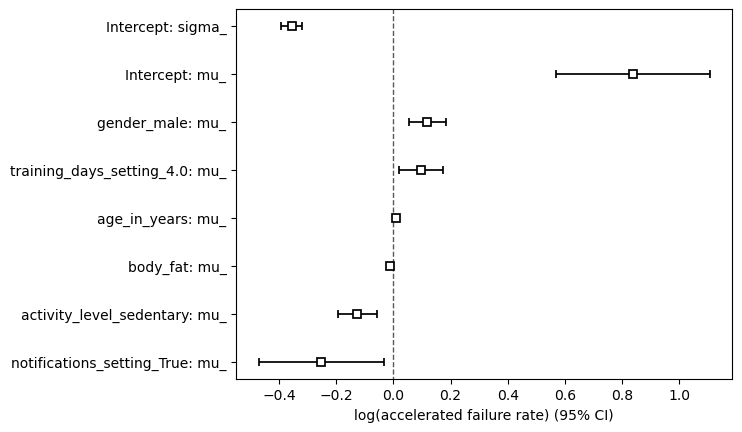

In [77]:
lognormAFT.plot()

Below there are predictions for the 5 users and their survival function prediction for all 4 weeks. 

In [84]:
# with age variable

X_test3 = X_test.loc[:, ['activity_level_sedentary', 'age_in_years', 'body_fat',
                      'gender_male', 'notifications_setting_True',
                      'training_days_setting_4.0', 'cens', 'surv_time']]

In [82]:
# without age variable
X_test3 = X_test.drop(['height', 'BMI', 'training_days_setting_6.0', 'newsletter_subscription_True', 
                       'body_type_thin', 'training_days_setting_5.0', 'body_type_strong',
                       'goal_gain', 'training_days_setting_3.0', 'training_days_setting_2.0',
                       'weight', 'training_days_setting_4.0', 'activity_level_very active', 
                       'notifications_setting_True'],
                     axis = 1)

In [85]:
lognormAFT.predict_survival_function(X_test3.iloc[0:5, :])

2880  2179  2370  432   794 
1.00  0.89  0.78  0.84  0.91  0.85
2.00  0.60  0.41  0.50  0.63  0.52
3.00  0.37  0.21  0.28  0.41  0.30
4.00  0.23  0.11  0.16  0.26  0.17

<Axes: >

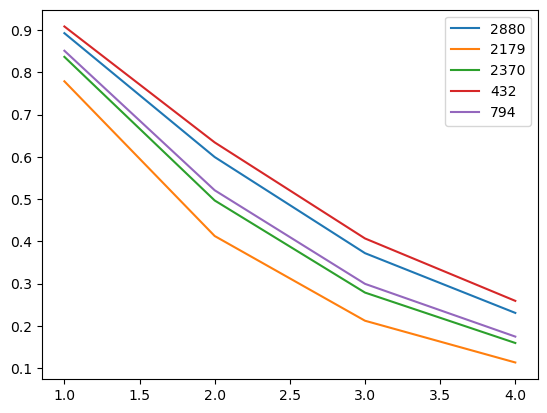

In [86]:
lognormAFT.predict_survival_function(X_test3.iloc[0:5, :]).plot()

In [87]:
print("AIC is: {} \n Log likelihood score is: {}".format(lognormAFT.AIC_, lognormAFT.score(X_test3)))


AIC is: 5810.658978462024 
 Log likelihood score is: -1.3941234411878298


The values of ICI and E50 are better than in Cox regression (the values are closer to 0).

ICI =  0.0729323693741053
E50 =  0.07034542292166357


(<Axes: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 4 mortality'}, xlabel='Predicted probability of \nt ≤ 4 mortality', ylabel='Observed probability of \nt ≤ 4 mortality'>,
 0.0729323693741053,
 0.07034542292166357)

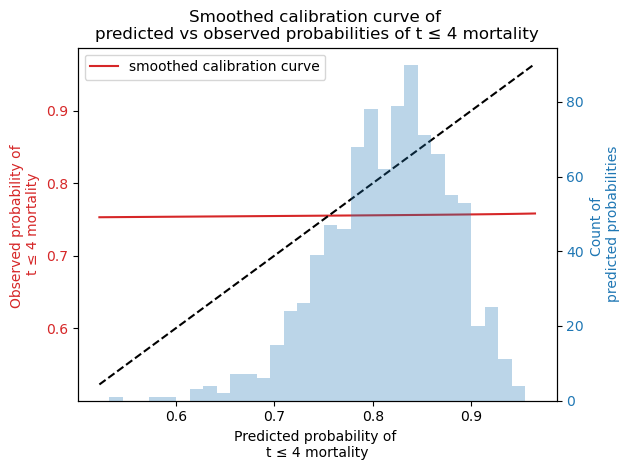

In [88]:
survival_probability_calibration(lognormAFT, X_test3, t0=4)

Median predicted survival time (time of not dropping out) is 2 weeks, which is much more than in Cox model.

In [89]:
lognormAFT.predict_median(X_test3).median()

2.0951875681825163

Below there is a mean absolute error of median prediction of survival time on test set.

In [90]:
pred = lognormAFT.predict_median(X_test3)
mae(actual, pred)

1.0211277726778052

The MAE is 1.04, so the value for this data is not so good, so the predictions are not really precise.

We can use our fitted model to see how the survival changes as we change the covariate values. Here, I have used the method to see how the survival varies among 0, 15, 30 and 45 percent of body fat for users compared to their baseline. It clearly highlights that users with lower body fat have higher survival probabilities at any given instance of time compared to users with high body fat.

<AxesSubplot: >

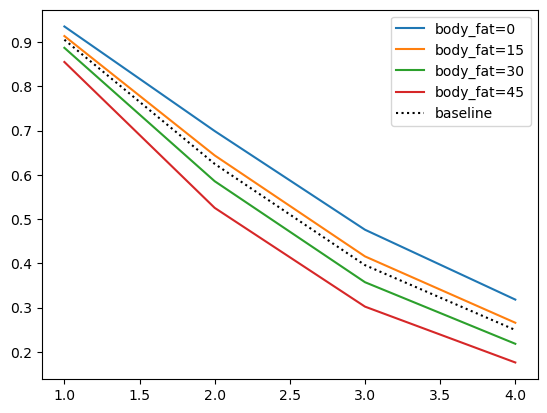

In [89]:
lognormAFT.plot_partial_effects_on_outcome('body_fat', range(0,60,15))

Below we can look which variables may have the biggest influence on model.

In [90]:
c_i_aic_comp_param(X_train3, X_test3, model = 'lognormal')

CI training set CI test set     AIC
body_fat                             0.55        0.55 5910.90
gender_male                          0.54        0.52 5920.27
activity_level_sedentary             0.56        0.54 5896.38
goal_lose                            0.55        0.54 5909.30
training_days_setting_7.0            0.51        0.51 5940.91

### For all variables of users

Here, we will include not only demographics, but also data about session executions.

The data for demographics is the same as before and for variables about sessions, they are not categorical, so Kaplan-Meier Estimates will not be done. We'll go straight to the Cox regression.

#### Cox proportional hazards regression

For proportional hazards, we need to create dummies variables and split the data into training and testing subsets.

In [91]:
df_users_4_weeks_all['cens'] = df_users_4_weeks_all['cens'].astype('int64')

df_users_4_weeks_all_dummies = pd.get_dummies(df_users_4_weeks_all, drop_first = True)

#df_users_4_weeks_all_dummies['cens'] = df_users_4_weeks_all_dummies['cens'].astype('category')

In [92]:
X_train_4, X_test_4 = train_test_split(df_users_4_weeks_all_dummies, test_size = 0.3, random_state = 42)


Again, here, the data split for trained and test set have the same number of censored and uncensored data as before. 

In [93]:
print('Number of non censored useres in train set: {} (the event happened)'.format(X_train_4['cens'].sum()), '\n',
      'Number of censored users in train set: {} (the event did not happened)'.format(len(X_train_4) - X_train_4['cens'].sum()))

Number of non censored useres in train set: 1629 (the event happened) 
 Number of censored users in train set: 494 (the event did not happened)


In [94]:
print('Number of non censored useres in test set: {} (the event happened)'.format(X_test_4['cens'].sum()), '\n',
      'Number of censored users in test set: {} (the event did not happened)'.format(len(X_test_4) - X_test_4['cens'].sum()))

Number of non censored useres in test set: 685 (the event happened) 
 Number of censored users in test set: 226 (the event did not happened)


Now we fit the cos PH model.

In [95]:
cph_all = cox_model(X_train_4, summary = True)

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

And now we'll check the assumptions of the model.

In [96]:
cph_all.check_assumptions(X_train_4, p_value_threshold=0.05)

NameError: name 'cph_all' is not defined

The assumptions tell us, that we should bin and stratify 4 variables. So below, it will be done.

In [97]:
df_users_4_weeks_all_dummies_strata = df_users_4_weeks_all_dummies.copy()
df_users_4_weeks_all_dummies_strata['total_sessions_strata'] = pd.cut(df_users_4_weeks_all_dummies_strata['total_sessions_users2'], 
                                                                      np.arange(0, 
                                                                                max(df_users_4_weeks_all_dummies_strata['total_sessions_users2']), 10))

df_users_4_weeks_all_dummies_strata['total_reps_strata'] = pd.cut(df_users_4_weeks_all_dummies_strata['total_reps_users2'], 
                                                                      np.arange(0, 
                                                                                max(df_users_4_weeks_all_dummies_strata['total_reps_users2']), 1000))

df_users_4_weeks_all_dummies_strata['total_exe_strata'] = pd.cut(df_users_4_weeks_all_dummies_strata['exercises_per_user'], 
                                                                      np.arange(0, 
                                                                                max(df_users_4_weeks_all_dummies_strata['exercises_per_user']), 6900))

df_users_4_weeks_all_dummies_strata['total_exe_without_rest_strata'] = pd.cut(df_users_4_weeks_all_dummies_strata['exercises_without_rest_per_user'], 
                                                                      np.arange(0, 
                                                                                max(df_users_4_weeks_all_dummies_strata['exercises_without_rest_per_user']), 4000))

df_users_4_weeks_all_dummies_strata['total_time_strata'] = pd.cut(df_users_4_weeks_all_dummies_strata['total_time_users2'], 
                                                                      np.arange(0, 
                                                                                max(df_users_4_weeks_all_dummies_strata['total_time_users2']), 5900))


df_users_4_weeks_all_dummies_strata['total_calories_strata'] = pd.cut(df_users_4_weeks_all_dummies_strata['total_calories_users2'], 
                                                                      np.arange(0, 
                                                                                max(df_users_4_weeks_all_dummies_strata['total_calories_users2']), 300))


In [98]:
df_users_4_weeks_all_dummies_strata = df_users_4_weeks_all_dummies_strata.drop(['total_sessions_users2', 'exercises_per_user','exercises_without_rest_per_user', 'total_reps_users2', 'total_time_users2', 'total_calories_users2'], axis = 1)


In [99]:
df_users_4_weeks_all_dummies_strata = df_users_4_weeks_all_dummies_strata.dropna()

Now, because we had to bin the data, we cannot split it into train and test set, because some bins may not show up in the test set (or it may be not consistent). Let's fit the data to the Cox PH model, again.

In [100]:
cph_all2 = CoxPHFitter()

In [101]:
cph_all2.fit(df_users_4_weeks_all_dummies_strata, duration_col = 'surv_time', event_col = 'cens', strata = ['total_sessions_strata', 'goal_gain',
                                                                 'total_exe_strata', 'total_exe_without_rest_strata', 'total_reps_strata',
                                                                                                          'total_time_strata', 'total_calories_strata'])


ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

In [ ]:
cph_all2.print_summary(decimals = 3)

P-value parameters are significant only for training_days_setting for days 5 and 7, activity_level_sedentary.

As a Hazard Ratio (HR) we can take exponential value of coefficient (exp(coef)). 

The p-value for activity level sedentary is less than 0.005 and HR is 0.828, indicating a strong relationship between sedentary activity level and decreased risk of dropping out. Person with sedentary activity level has 17% lower risk of dropping out. 

The p-value for training days setting at 5 days a week is 0.02 and HR is 1.279, indicating a strong relationship between setting training days at 5 days a week and increased risk of dropping out. Setting training days equal to 5 a week increases hazard by factor 1.279 (or 28%), so those users have higher chances of dropping out.

The p-value for training days setting at 7 days a week is 0.002 and HR is 1.64, indicating a strong relationship between setting training days at 7 days a week and increased risk of dropping out. Setting training days equal to 7 a week increases hazard by factor 1.64 (or 64%), so those users have higher chances of dropping out.

Below there is a plot that shows that there are significant differences.

In [ ]:
cph_all2.plot(hazard_ratios=True)

In [ ]:
df_users_4_weeks_all_dummies_strata2 = df_users_4_weeks_all_dummies_strata.drop(['body_type_thin'], axis = 1)

In [ ]:
df_users_4_weeks_all_dummies_strata2.drop(['body_type_strong'], axis = 1, inplace = True)

In [77]:
df_users_4_weeks_all_dummies_strata2.drop(['notifications_setting_True'], axis = 1, inplace = True)

In [78]:
df_users_4_weeks_all_dummies_strata2.drop(['height'], axis = 1, inplace = True)

In [79]:
df_users_4_weeks_all_dummies_strata2.drop(['gender_male'], axis = 1, inplace = True)

In [80]:
df_users_4_weeks_all_dummies_strata2.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [81]:
df_users_4_weeks_all_dummies_strata2.drop(['goal_lose'], axis = 1, inplace = True)

In [82]:
df_users_4_weeks_all_dummies_strata2.drop(['training_days_setting_3.0'], axis = 1, inplace = True)

In [83]:
df_users_4_weeks_all_dummies_strata2.drop(['training_days_setting_4.0'], axis = 1, inplace = True)

In [84]:
df_users_4_weeks_all_dummies_strata2.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

In [85]:
df_users_4_weeks_all_dummies_strata2.drop(['BMI'], axis = 1, inplace = True)

In [89]:
df_users_4_weeks_all_dummies_strata2.drop(['activity_level_very active'], axis = 1, inplace = True)

In [90]:
cph_all2.fit(df_users_4_weeks_all_dummies_strata2, duration_col = 'surv_time', event_col = 'cens', strata = ['total_sessions_strata', 'goal_gain',
                                                                 'total_exe_strata', 'total_exe_without_rest_strata', 'total_reps_strata',
                                                                                                          'total_time_strata', 'total_calories_strata'])
cph_all2.print_summary(decimals = 3)

<lifelines.CoxPHFitter: fitted with 3032 total observations, 718 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
                   strata = ['total_sessions_strata', 'goal_gain', 'total_exe_strata', 'total_exe_without_rest_strata', 'total_reps_strata', 'total_time_strata', 'total_calories_strata']
      baseline estimation = breslow
   number of observations = 3032
number of events observed = 2314
   partial log-likelihood = -8144.805
         time fit was run = 2023-04-25 09:26:53 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
weight                     0.006      1.006      0.002            0.002            0.010                1.002                1.010
body_fat                  -0.008      0.992      0.004           -0.016           -0.000                0.984                1.000
activity_level_sedentary  -0.203      0.816      0.051           -0.303           -0.102                0.738                0.903
training_days_setting_2.0 -0.221      0.802      0.094           -0.406           -0.037                0.666                0.964
training_days_setting_5.0  0.159      1.173      0.062            0.038            0.281                1.038                1.325
training_days_setting_7.0  0.399      1.491      0.131            0.142            0.657                1.152                1.928

                            cmp to      z       p   -log2(p)
covariate                                                   
weight                       0.000  2.799   0.005      7.608
body_fat                     0.000 -2.044   0.041      4.610
activity_level_sedentary     0.000 -3.952 <0.0005     13.654
training_days_setting_2.0    0.000 -2.349   0.019      5.730
training_days_setting_5.0    0.000  2.567   0.010      6.606
training_days_setting_7.0    0.000  3.040   0.002      8.725
---
Concordance = 0.588
Partial AIC = 16301.609
log-likelihood ratio test = 47.724 on 6 df
-log2(p) of ll-ratio test = 26.152

Even though all of the variables are significant, the CI is lower than in the case when there are insignificant variables included. Also, the PAIC is only a little bit lower than before, so it may be a little bit better based on PAIC value, but a little bit worse based on CI.

Now, looking at the model before checking the assumptions (where the CI is better), we will try to get rid of variables that are not significant.

In [113]:
cph_all = cox_model(X_train_4, summary = True)

<lifelines.CoxPHFitter: fitted with 2123 total observations, 494 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
      baseline estimation = breslow
   number of observations = 2123
number of events observed = 1629
   partial log-likelihood = -10971.416
         time fit was run = 2023-04-25 09:39:31 UTC

---
                                  coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%       z       p
covariate                                                                                                  
height                           0.015      1.015                0.979                1.053   0.825   0.409
weight                          -0.012      0.988                0.947                1.031  -0.557   0.578
body_fat                         0.004      1.004                0.995                1.013   0.850   0.395
BMI                              0.032      1.033                0.914                1.168   0.518   0.605
total_sessions_users2           -0.137      0.872                0.853                0.891 -12.260 <0.0005
total_time_users2                0.000      1.000                1.000                1.000   1.991   0.047
total_reps_users2                0.000      1.000                1.000                1.000   1.435   0.151
total_calories_users2            0.000      1.000                1.000                1.000   0.749   0.454
exercises_per_user               0.000      1.000                1.000                1.000   5.023 <0.0005
exercises_without_rest_per_user -0.000      1.000                1.000                1.000  -4.445 <0.0005
gender_male                     -0.136      0.873                0.753                1.012  -1.800   0.072
activity_level_sedentary         0.058      1.060                0.949                1.183   1.031   0.303
activity_level_very active      -0.104      0.901                0.743                1.093  -1.058   0.290
goal_gain                       -0.050      0.951                0.818                1.106  -0.647   0.518
goal_lose                        0.040      1.041                0.889                1.219   0.495   0.621
body_type_strong                 0.091      1.095                0.911                1.315   0.968   0.333
body_type_thin                  -0.019      0.981                0.879                1.094  -0.343   0.731
newsletter_subscription_True     0.048      1.049                0.941                1.171   0.863   0.388
notifications_setting_True      -0.162      0.850                0.598                1.209  -0.903   0.366
training_days_setting_2.0        0.035      1.036                0.795                1.351   0.262   0.793
training_days_setting_3.0        0.048      1.049                0.858                1.283   0.467   0.641
training_days_setting_4.0        0.122      1.129                0.911                1.400   1.108   0.268
training_days_setting_5.0        0.226      1.253                1.006                1.562   2.014   0.044
training_days_setting_6.0        0.300      1.349                0.984                1.851   1.857   0.063
training_days_setting_7.0        0.505      1.657                1.193                2.302   3.012   0.003
---
Concordance = 0.857
Partial AIC = 21992.831
log-likelihood ratio test = 1199.367 on 25 df
-log2(p) of ll-ratio test = 786.038

In [93]:
X_train_43 = X_train_4.drop(['training_days_setting_2.0'], axis = 1)

In [94]:
X_train_43.drop(['total_time_users2', 'exercises_per_user',
                 'exercises_without_rest_per_user'], axis = 1, inplace = True)

In [95]:
X_train_43.drop(['total_calories_users2'], axis = 1, inplace = True)

In [96]:
X_train_43.drop(['total_reps_users2'], axis = 1, inplace = True)

In [97]:
X_train_43.drop(['activity_level_very active'], axis = 1, inplace = True)

In [98]:
X_train_43.drop(['body_fat'], axis = 1, inplace = True)

In [99]:
X_train_43.drop(['goal_lose'], axis = 1, inplace = True)

In [100]:
X_train_43.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [101]:
X_train_43.drop(['notifications_setting_True'], axis = 1, inplace = True)

In [102]:
X_train_43.drop(['activity_level_sedentary'], axis = 1, inplace = True)

In [103]:
X_train_43.drop(['training_days_setting_3.0'], axis = 1, inplace = True)

In [104]:
X_train_43.drop(['body_type_strong'], axis = 1, inplace = True)

In [105]:
X_train_43.drop(['weight'], axis = 1, inplace = True)

In [106]:
X_train_43.drop(['BMI'], axis = 1, inplace = True)

In [107]:
X_train_43.drop(['body_type_thin'], axis = 1, inplace = True)

In [108]:
X_train_43.drop(['gender_male'], axis = 1, inplace = True)

In [109]:
X_train_43.drop(['height'], axis = 1, inplace = True)

In [110]:
X_train_43.drop(['training_days_setting_4.0'], axis = 1, inplace = True)

In [111]:
X_train_43.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

In [112]:
X_train_43.drop(['goal_gain'], axis = 1, inplace = True)

In [114]:
cph_all.fit(X_train_43, duration_col = 'surv_time', event_col = 'cens')
cph_all.print_summary(decimals = 3)

<lifelines.CoxPHFitter: fitted with 2123 total observations, 494 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
      baseline estimation = breslow
   number of observations = 2123
number of events observed = 1629
   partial log-likelihood = -11013.564
         time fit was run = 2023-04-25 09:39:34 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
total_sessions_users2     -0.072      0.931      0.003           -0.078           -0.065                0.925                0.937
training_days_setting_5.0  0.166      1.181      0.066            0.038            0.294                1.038                1.342
training_days_setting_7.0  0.443      1.558      0.139            0.170            0.716                1.186                2.046

                            cmp to       z       p   -log2(p)
covariate                                                    
total_sessions_users2        0.000 -22.426 <0.0005    367.585
training_days_setting_5.0    0.000   2.534   0.011      6.470
training_days_setting_7.0    0.000   3.185   0.001      9.433
---
Concordance = 0.868
Partial AIC = 22033.127
log-likelihood ratio test = 1115.071 on 3 df
-log2(p) of ll-ratio test = 799.617

Based on CI, this is the best model, but according to PAIC it is worse than in case where the assumptions are met.

Below there is a table with prediction values for survival function (in each week) for 5 users.

In [132]:
cph_all.predict_survival_function(df_users_4_weeks_all_dummies_strata.iloc[0:5, :])

1    2    0    4    3
1.00 0.53 1.00 1.00 1.00 1.00
2.00 0.26 1.00 1.00 1.00 1.00
3.00 0.11 1.00 1.00 0.37 1.00
4.00 0.11 1.00 1.00 0.37 1.00

<AxesSubplot: >

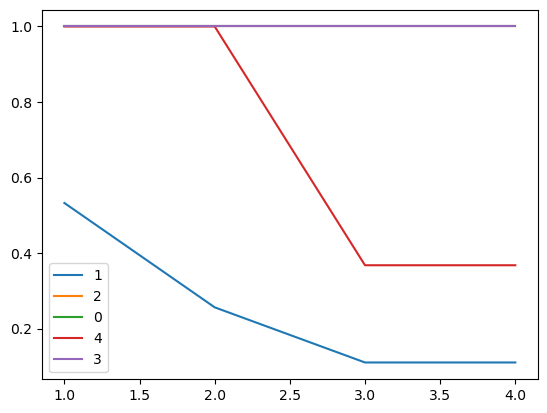

In [133]:
cph_all.predict_survival_function(df_users_4_weeks_all_dummies_strata.iloc[0:5, :]).plot()

We can see that user 0, 3, 2 has biggest chances to not drop out at 4 weeks and user 1 has the biggest chances to drop out at 4 weeks.

Below there are values of partial AIC and log-likelighood. The lower AIC is, the better the model is. Log-likelihood - we want to maximize it (the bigger the better). 

In [134]:
print("Partial AIC is: {} \n Log likelihood score is: {}".format(cph_all.AIC_partial_, cph_all.score(df_users_4_weeks_all_dummies_strata)))


Partial AIC is: 16320.088425596738 
 Log likelihood score is: -2.685370782585214


Below there is a calibration curve with ICI and E50.

ICI =  0.12044093694477885
E50 =  0.09448225475686506


(<AxesSubplot: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 4 mortality'}, xlabel='Predicted probability of \nt ≤ 4 mortality', ylabel='Observed probability of \nt ≤ 4 mortality'>,
 0.12044093694477885,
 0.09448225475686506)

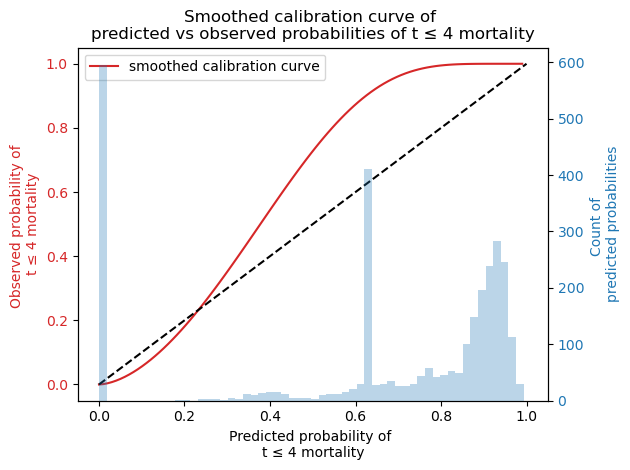

In [135]:
survival_probability_calibration(cph_all, df_users_4_weeks_all_dummies_strata, t0=4)

Below there is a prediction of median lifetime for all users.

In [136]:
cph_all.predict_median(df_users_4_weeks_all_dummies_strata).median()

2.0

Now, it's time to calculate MAE. 

In [137]:
pred_cph_all = cph_all.predict_median(df_users_4_weeks_all_dummies_strata)

pred_cph_all = pd.DataFrame(pred_cph_all)

In [138]:
value = pred_cph_all[0.5].quantile(0.5)
pred_cph_all = pred_cph_all.replace(np.inf, value)

In [139]:
mae(actual, pred_cph_demo)

1.057080131723381

The MAE is over 1, so the mean absolute error is over 1 week.

#### Parametric models

In [102]:
parametric_surv(X_train_4)

AIC
Weibull   6372.28
Lognormal 5947.69
LogLog    6055.21

In [103]:
lognormAFT_4 = LogNormalAFTFitter()
lognormAFT_4.fit(X_train_4, duration_col = 'surv_time', event_col = 'cens')
lognormAFT_4.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 494 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 1629
           log-likelihood = -2387.453
         time fit was run = 2023-05-11 07:59:06 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    BMI                             -0.000      1.000      0.032           -0.063            0.063                0.939                1.065
       activity_level_sedentary        -0.054      0.947      0.029           -0.110            0.002                0.895                1.002
       activity_level_very active      -0.010      0.990      0.046           -0.101            0.081                0.904                1.084
       body_fat                        -0.003      0.997      0.002           -0.007            0.002                0.993                1.002
       body_type_strong                 0.512      1.669        NaN              NaN              NaN                  NaN                  NaN
       body_type_thin                   0.326      1.386        NaN              NaN              NaN                  NaN                  NaN
       cluster_1                        0.599      1.819        NaN              NaN              NaN                  NaN                  NaN
       cluster_10                       0.009      1.009        NaN              NaN              NaN                  NaN                  NaN
       cluster_11                       0.126      1.134        NaN              NaN              NaN                  NaN                  NaN
       cluster_2                        0.151      1.163        NaN              NaN              NaN                  NaN                  NaN
       cluster_3                        0.682      1.977        NaN              NaN              NaN                  NaN                  NaN
       cluster_4                        0.253      1.288        NaN              NaN              NaN                  NaN                  NaN
       cluster_5                       -0.160      0.853        NaN              NaN              NaN                  NaN                  NaN
       cluster_6                        0.322      1.379        NaN              NaN              NaN                  NaN                  NaN
       cluster_7                        0.558      1.747        NaN              NaN              NaN                  NaN                  NaN
       cluster_8                       -0.312      0.732        NaN              NaN              NaN                  NaN                  NaN
       cluster_9                        0.970      2.639        NaN              NaN              NaN                  NaN                  NaN
       exercises_per_user              -0.000      1.000      0.000           -0.000           -0.000                1.000                1.000
       exercises_without_rest_per_user  0.000      1.000      0.000            0.000            0.000                1.000                1.000
       gender_male                      0.483      1.621        NaN              NaN              NaN                  NaN                  NaN
       goal_gain                        0.020      1.021      0.038           -0.055            0.095                0.947                1.100
       goal_lose                       -0.024      0.976      0.041           -0.104            0.056                0.901                1.058
       height                          -0.004      0.996      0.009           -0.022            0.015                0.978                1.015
       newsletter_subscription_True     0.399      1.491       

Now, we will try to select only the variables that are significant in the model.

In [104]:
X_train4 = X_train_4.drop(['training_days_setting_3.0'], axis = 1)

In [105]:
X_train4.drop(['activity_level_very active'], axis = 1, inplace = True)

In [106]:
X_train4.drop(['BMI'], axis = 1, inplace = True)

In [107]:
X_train4.drop(['weight'], axis = 1, inplace = True)

In [108]:
X_train4.drop(['body_type_strong'], axis = 1, inplace = True)

In [109]:
X_train4.drop(['goal_gain', 'total_calories_users2'], axis = 1, inplace = True)

In [110]:
X_train4.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [111]:
X_train4.drop(['notifications_setting_True'], axis = 1, inplace = True)

In [112]:
X_train4.drop(['training_days_setting_2.0'], axis = 1, inplace = True)

In [113]:
X_train4.drop(['body_type_thin'], axis = 1, inplace = True)

In [114]:
X_train4.drop(['goal_lose'], axis = 1, inplace = True)

In [115]:
X_train4.drop(['height'], axis = 1, inplace = True)

In [116]:
X_train4.drop(['gender_male'], axis = 1, inplace = True)

In [117]:
X_train4.drop(['total_reps_users2'], axis = 1, inplace = True)

In [118]:
X_train4.drop(['training_days_setting_4.0'], axis = 1, inplace = True)

In [119]:
lognormAFT_4.fit(X_train4, duration_col = 'surv_time', event_col = 'cens')
lognormAFT_4.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 494 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 1629
           log-likelihood = -2393.015
         time fit was run = 2023-05-11 07:59:11 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    activity_level_sedentary        -0.052      0.949      0.028           -0.107            0.003                0.898                1.003
       body_fat                        -0.003      0.997      0.002           -0.007            0.000                0.993                1.000
       cluster_1                        0.035      1.036      0.096           -0.153            0.224                0.858                1.251
       cluster_10                      -0.036      0.965      0.139           -0.309            0.237                0.734                1.268
       cluster_11                      -0.327      0.721      0.183           -0.687            0.032                0.503                1.033
       cluster_2                        0.040      1.041      0.093           -0.141            0.221                0.868                1.248
       cluster_3                        0.048      1.049      0.101           -0.150            0.245                0.861                1.278
       cluster_4                        0.020      1.020      0.094           -0.165            0.205                0.848                1.227
       cluster_5                        0.056      1.058      0.095           -0.130            0.242                0.878                1.274
       cluster_6                        0.135      1.144      0.100           -0.061            0.331                0.940                1.393
       cluster_7                        0.045      1.046      0.098           -0.148            0.238                0.863                1.269
       cluster_8                        0.089      1.093      0.105           -0.116            0.295                0.890                1.343
       cluster_9                        0.006      1.006      0.107           -0.204            0.216                0.816                1.241
       exercises_per_user              -0.000      1.000      0.000           -0.000           -0.000                1.000                1.000
       exercises_without_rest_per_user  0.000      1.000      0.000            0.000            0.000                1.000                1.000
       total_sessions_users2            0.051      1.052      0.003            0.044            0.057                1.045                1.059
       total_time_users2               -0.000      1.000      0.000           -0.000           -0.000                1.000                1.000
       training_days_setting_5.0       -0.105      0.900      0.033           -0.171           -0.040                0.843                0.961
       training_days_setting_6.0       -0.153      0.858      0.069           -0.288           -0.018                0.750                0.982
       training_days_setting_7.0       -0.286      0.751      0.073           -0.429           -0.143                0.651                0.867
       Intercept                        0.455      1.576      0.099            0.260            0.649                1.297                1.914
sigma_ Intercept                       -0.600      0.549      0.018           -0.636           -0.565                0.529                0.569

                                         cmp to       z       p   -log2(p)
param  covariate                                                          
mu_    activity_level_sedentary           0.000  -1.861 

Now, variables statistically significant are exercises_per_user, exercises_without_rest_per_user, gender_male,  total_time, total_sessions, training_days_setting 5 and 7.

Exercises_per_user, total_reps exercises_without_rest_per_user, total_time and total_sessions are significant, but they have no effect.

Gender male has positive coefficient. This means that by selecting goal of losing weight, mean/median survival time changes by exp(0.078) = 1.061 - 6% increase in mean/median survival time.

Training days set at 5 days a week has negative coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(-0.116) = 0.89 - 11% decrease in mean/median survival time.

Training days set at 7 days a week has negative coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(-0.291) = 0.747 - 25% decrease in mean/median survival time.

<AxesSubplot: xlabel='log(accelerated failure rate) (95% CI)'>

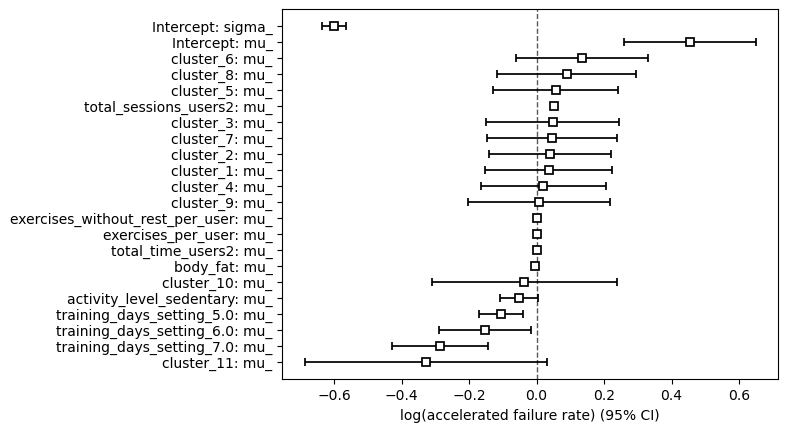

In [120]:
lognormAFT_4.plot()

Below there are predictions for the 5 users and their survival function prediction for all 4 weeks. 

In [121]:
lognormAFT_4.predict_survival_function(X_test_4.iloc[0:5, :])

2880  2179  2370  432   794 
1.00  0.78  0.84  0.95  1.00  0.80
2.00  0.31  0.39  0.65  1.00  0.33
3.00  0.11  0.16  0.36  1.00  0.12
4.00  0.04  0.06  0.19  0.99  0.04

<AxesSubplot: >

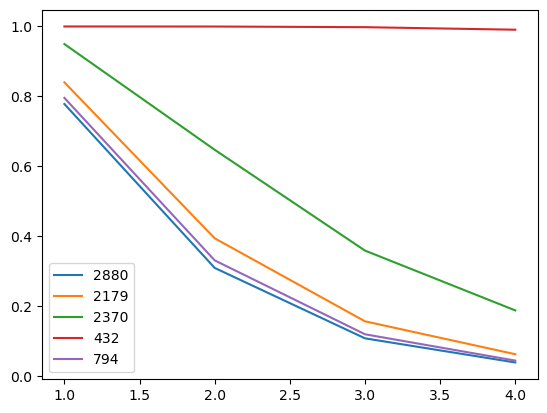

In [122]:
lognormAFT_4.predict_survival_function(X_test_4.iloc[0:5, :]).plot()

Looking at the prediction plots, user 432 has almost 100% chances of survival and users 2880 and 794 have the lowest chances of survival. 

In [123]:
print("AIC is: {} \n Log likelihood score is: {}".format(lognormAFT_4.AIC_, lognormAFT_4.score(X_test_4)))


AIC is: 4830.029686415492 
 Log likelihood score is: -1.1885303837772998


The values of ICI and E50 are better than in Cox regression (the values are closer to 0).

ICI =  0.022824991441887973
E50 =  0.014892896344256501


(<AxesSubplot: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 4 mortality'}, xlabel='Predicted probability of \nt ≤ 4 mortality', ylabel='Observed probability of \nt ≤ 4 mortality'>,
 0.022824991441887973,
 0.014892896344256501)

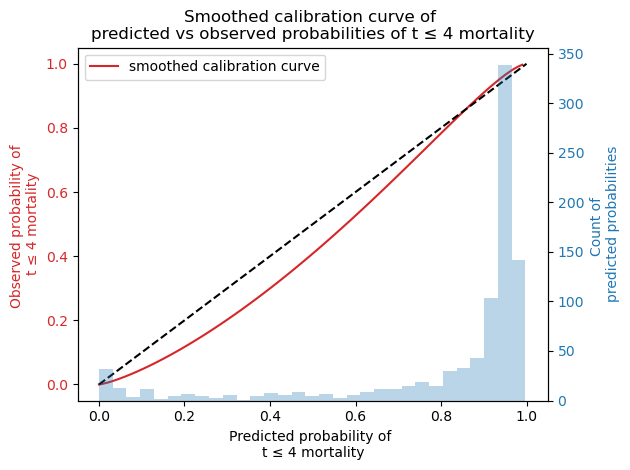

In [124]:
survival_probability_calibration(lognormAFT_4, X_test_4, t0=4)

Median predicted survival time (time of not dropping out) is 1.75 weeks.

In [125]:
lognormAFT_4.predict_median(X_test_4).median()

1.7292600427092832

Below there is a mean absolute error of median prediction of survival time on test set.

In [126]:
pred_4 = lognormAFT_4.predict_median(X_test_4)
mae(actual, pred_4)

3.859655675877882

MAE value is big according to the fact, that we only have 4 weeks, and we are have mistake rate of survival at almost 2 weeks.

We can use our fitted model to see how the survival changes as we change the covariate values. Here, I have used the method to see how the survival varies among 0, 15, 30 and 45 percent of body fat for users compared to their baseline. It clearly highlights that users with lower body fat have higher survival probabilities at any given instance of time compared to users with high body fat. But we can see that model is much different than when we only took the demographic data. 

<AxesSubplot: >

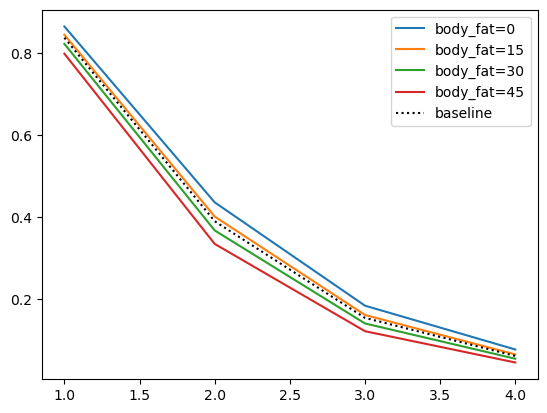

In [127]:
lognormAFT_4.plot_partial_effects_on_outcome('body_fat', range(0,60,15))

Below we can look which variables may have the biggest influence on model (according to concordance index and AIC value).

In [128]:
c_i_aic_comp_param(X_train_4, X_test_4, model = 'lognormal')

CI training set CI test set     AIC
height                                     0.53        0.52 5940.07
weight                                     0.51        0.53 5945.72
body_fat                                   0.55        0.55 5910.90
BMI                                        0.53        0.55 5928.98
total_sessions_users2                      0.88        0.88 4916.05
total_time_users2                          0.87        0.87 5079.28
total_reps_users2                          0.87        0.87 5067.72
total_calories_users2                      0.86        0.87 5125.45
exercises_per_user                         0.86        0.86 5309.92
exercises_without_rest_per_user            0.86        0.86 5309.92
gender_male                                0.54        0.52 5920.27
activity_level_sedentary                   0.56        0.54 5896.38
activity_level_very active                 0.52        0.51 5932.35
goal_gain                                  0.54        0.53 5926.78
goal_lose                                  0.55        0.54 5909.30
body_type_strong                           0.51        0.51 5944.53
body_type_thin                             0.50        0.49 5949.69
newsletter_subscription_True               0.50        0.52 5949.67
notifications_setting_True                 0.51        0.51 5945.06
training_days_setting_2.0                  0.50        0.50 5949.28
training_days_setting_3.0                  0.51        0.51 5949.04
training_days_setting_4.0                  0.51        0.53 5946.36
training_days_setting_5.0                  0.51        0.52 5949.32
training_days_setting_6.0                  0.50        0.50 5949.48
training_days_setting_7.0                  0.51        0.51 5940.91
cluster_1                                  0.51        0.50 5942.67
cluster_2                                  0.52        0.52 5938.65
cluster_3                                  0.51        0.51 5946.79
cluster_4                                  0.51        0.49 5945.34
cluster_5                                  0.51        0.50 5945.83
cluster_6                                  0.51        0.51 5946.21
cluster_7                                  0.51        0.50 5948.29
cluster_8                                  0.50        0.50 5949.01
cluster_9                                  0.50        0.51 5948.46
cluster_10                                 0.50        0.50 5945.43
cluster_11                                 0.50        0.50 5945.01

#### Data standardization and models

We'll standardize the data and do the predictions.

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
df_users_4_weeks_all_dummies_numeric = df_users_4_weeks_all_dummies.loc[:, ['height', 'weight', 'body_fat', 
                                                                             'BMI', 'total_sessions_users2',
                                                                             'total_time_users2', 
                                                                             'total_reps_users2', 
                                                                             'total_calories_users2',
                                                                             'exercises_per_user', 
                                                                             'exercises_without_rest_per_user']]

df_users_4_weeks_all_dummies_cat = df_users_4_weeks_all_dummies.loc[:, ['cens','surv_time', 'gender_male', 
                                                                        'activity_level_sedentary',
                                                                        'activity_level_very active', 
                                                                        'goal_gain', 'goal_lose',
                                                                        'body_type_strong', 'body_type_thin', 
                                                                        'newsletter_subscription_True',
                                                                        'notifications_setting_True', 
                                                                        'training_days_setting_2.0',
                                                                        'training_days_setting_3.0', 
                                                                        'training_days_setting_4.0',
                                                                        'training_days_setting_5.0', 
                                                                        'training_days_setting_6.0',
                                                                        'training_days_setting_7.0']]

In [131]:
scaler = StandardScaler()
scaled_data_all = scaler.fit_transform(df_users_4_weeks_all_dummies_numeric)

In [132]:
df_scaled_data_all = pd.DataFrame(scaled_data_all, columns = df_users_4_weeks_all_dummies_numeric.columns)

In [133]:
scaled_num_data = df_scaled_data_all.merge(df_users_4_weeks_all_dummies_cat, left_index = True, right_index = True)

In [134]:
X_train_4_scaled, X_test_4_scaled = train_test_split(scaled_num_data, test_size = 0.3, random_state = 42)


In [135]:
scaled_num_data_strata = scaled_num_data.copy()
scaled_num_data_strata['total_sessions_strata'] = pd.cut(scaled_num_data_strata['total_sessions_users2'], 
                                                                      np.arange(min(scaled_num_data['total_sessions_users2']) - 0.01, 
                                                                                max(scaled_num_data['total_sessions_users2']), 0.5))
'''
scaled_num_data_strata['total_reps_strata'] = pd.cut(scaled_num_data_strata['total_reps_users2'], 
                                                                      np.arange(min(scaled_num_data['total_reps_users2']) - 0.01, 
                                                                                max(scaled_num_data['total_reps_users2']), 0.5))
'''
scaled_num_data_strata['total_exe_strata'] = pd.cut(scaled_num_data_strata['exercises_per_user'], 
                                                                      np.arange(min(scaled_num_data['exercises_per_user']) - 0.01, 
                                                                                max(scaled_num_data['exercises_per_user']), 0.5))

scaled_num_data_strata['total_exe_without_rest_strata'] = pd.cut(scaled_num_data_strata['exercises_without_rest_per_user'], 
                                                                      np.arange(min(scaled_num_data['exercises_without_rest_per_user']) - 0.01, 
                                                                                max(scaled_num_data['exercises_without_rest_per_user']), 0.5))

scaled_num_data_strata['total_time_strata'] = pd.cut(scaled_num_data_strata['total_time_users2'], 
                                                                      np.arange(min(scaled_num_data['total_time_users2']) - 0.01, 
                                                                                max(scaled_num_data['total_time_users2']), 0.5))

scaled_num_data_strata = scaled_num_data_strata.drop(['total_sessions_users2', 
                                                      'exercises_per_user', 'exercises_without_rest_per_user',
                                                      'total_time_users2'], axis = 1)


scaled_num_data_strata = scaled_num_data_strata.dropna()

##### Cox PH regression

Now, let's fit the data to the model.

In [136]:
cph_scaled_all = cox_model(scaled_num_data, summary = True)

<lifelines.CoxPHFitter: fitted with 3034 total observations, 720 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
      baseline estimation = breslow
   number of observations = 3034
number of events observed = 2314
   partial log-likelihood = -16422.318
         time fit was run = 2023-05-11 07:59:28 UTC

---
                                  coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%       z       p
covariate                                                                                                  
height                           0.103      1.109                0.850                1.447   0.760   0.447
weight                          -0.078      0.925                0.576                1.486  -0.322   0.748
body_fat                         0.024      1.024                0.964                1.088   0.783   0.434
BMI                              0.073      1.076                0.745                1.555   0.390   0.697
total_sessions_users2           -3.334      0.036                0.023                0.054 -15.557 <0.0005
total_time_users2                0.903      2.468                1.181                5.155   2.404   0.016
total_reps_users2                1.011      2.749                1.434                5.268   3.046   0.002
total_calories_users2           -0.167      0.846                0.468                1.527  -0.556   0.578
exercises_per_user               3.630     37.711               12.592              112.938   6.486 <0.0005
exercises_without_rest_per_user -3.740      0.024                0.007                0.085  -5.774 <0.0005
gender_male                     -0.131      0.877                0.774                0.995  -2.040   0.041
activity_level_sedentary         0.048      1.050                0.957                1.151   1.024   0.306
activity_level_very active      -0.105      0.900                0.770                1.052  -1.320   0.187
goal_gain                       -0.036      0.964                0.850                1.094  -0.564   0.573
goal_lose                        0.046      1.047                0.917                1.195   0.682   0.495
body_type_strong                 0.057      1.059                0.907                1.235   0.724   0.469
body_type_thin                  -0.020      0.980                0.894                1.075  -0.428   0.669
newsletter_subscription_True    -0.003      0.997                0.910                1.092  -0.075   0.940
notifications_setting_True      -0.064      0.938                0.690                1.276  -0.405   0.685
training_days_setting_2.0       -0.020      0.980                0.784                1.226  -0.174   0.862
training_days_setting_3.0        0.073      1.076                0.904                1.280   0.825   0.409
training_days_setting_4.0        0.122      1.130                0.939                1.360   1.295   0.195
training_days_setting_5.0        0.261      1.298                1.076                1.567   2.724   0.006
training_days_setting_6.0        0.240      1.271                0.965                1.674   1.705   0.088
training_days_setting_7.0        0.536      1.709                1.291                2.262   3.744 <0.0005
---
Concordance = 0.858
Partial AIC = 32894.635
log-likelihood ratio test = 1705.703 on 25 df
-log2(p) of ll-ratio test = inf

In [137]:
cph_scaled_all.check_assumptions(scaled_num_data, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 3034 total observations, 720 right-censored observations>
         test_name = proportional_hazard_test

---
                                      test_statistic      p  -log2(p)
BMI                             km              0.50   0.48      1.06
                                rank            0.16   0.69      0.53
activity_level_sedentary        km              0.01   0.93      0.10
                                rank            0.27   0.61      0.72
activity_level_very active      km              1.13   0.29      1.79
                                rank            0.87   0.35      1.51
body_fat                        km              0.11   0.74      0.44
                                rank            0.00   0.98      0.03
body_type_strong                km              2.22   0.14      2.87
                                rank            0.00   0.96      0.06
body_type_thin                  km              1.41   0.23      2.09
                                rank            0.48   0.49      1.04
exercises_per_user              km              9.96 <0.005      9.29
                                rank            2.45   0.12      3.09
exercises_without_rest_per_user km              8.91 <0.005      8.47
                                rank            2.21   0.14      2.86
gender_male                     km              0.74   0.39      1.36
                                rank            1.74   0.19      2.42
goal_gain                       km              2.30   0.13      2.95
                                rank            1.07   0.30      1.73
goal_lose                       km              0.73   0.39      1.35
                                rank            0.10   0.75      0.41
height                          km              0.23   0.63      0.66
                                rank            0.04   0.84      0.25
newsletter_subscription_True    km              0.53   0.47      1.10
                                rank            0.01   0.92      0.11
notifications_setting_True      km              0.60   0.44      1.19
                                rank            0.18   0.67      0.58
total_calories_users2           km              0.00   0.97      0.05
                                rank            0.02   0.90      0.15
total_reps_users2               km              3.23   0.07      3.79
                                rank            1.61   0.20      2.29
total_sessions_users2           km             96.34 <0.005     73.13
                                rank           23.10 <0.005     19.31
total_time_users2               km              3.77   0.05      4.26
                                rank            1.16   0.28      1.83
training_days_setting_2.0       km              0.29   0.59      0.76
                                rank            0.24   0.62      0.69
training_days_setting_3.0       km              0.37   0.54      0.88
                                rank            0.40   0.53      0.92
training_days_setting_4.0       km              1.21   0.27      1.88
                                rank            0.00   0.99      0.02
training_days_setting_5.0       km              0.55   0.46      1.12
                                rank            0.01   0.91      0.14
training_days_setting_6.0       km              0.25   0.62      0.69
                                rank            0.23   0.63      0.67
training_days_setting_7.0       km              0.02   0.90      0.15
                                rank            0.30   0.58      0.78
weight                          km              0.20   0.65      0.61
                                rank            0.03   0.86      0.21



1. Variable 'total_sessions_users2' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'total_sessions_users2' might be incorrect. That
is, there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'total_sessions_users2' using pd.cut, and then specify it in
`strata=['total_sessions_users2', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'total_time_users2' failed the non-proportional test: p-value is 0.0522.

   Advice 1: the functional form of the variable 'total_time_users2' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional for

[]

Again, the scaled data need stratifying again. We will do it, but we won't split the data into training and test set.

In [138]:
cph_scaled_all.fit(scaled_num_data_strata, duration_col = 'surv_time', event_col = 'cens', strata = ['total_sessions_strata',
                                                                                                     'total_time_strata',
                                                                 'total_exe_strata', 'total_exe_without_rest_strata'])

<lifelines.CoxPHFitter: fitted with 3032 total observations, 718 right-censored observations>

In [139]:
cph_scaled_all.print_summary(decimals = 3)

<lifelines.CoxPHFitter: fitted with 3032 total observations, 718 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
                   strata = ['total_sessions_strata', 'total_time_strata', 'total_exe_strata', 'total_exe_without_rest_strata']
      baseline estimation = breslow
   number of observations = 3032
number of events observed = 2314
   partial log-likelihood = -13697.563
         time fit was run = 2023-05-11 07:59:33 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
height                        0.199      1.220      0.137           -0.070            0.468                0.933                1.597
weight                       -0.189      0.827      0.245           -0.669            0.290                0.512                1.336
body_fat                     -0.037      0.964      0.031           -0.098            0.024                0.907                1.024
BMI                           0.185      1.204      0.191           -0.189            0.559                0.828                1.750
total_reps_users2            -4.446      0.012      0.322           -5.077           -3.815                0.006                0.022
total_calories_users2        -1.850      0.157      0.276           -2.391           -1.309                0.092                0.270
gender_male                  -0.019      0.982      0.065           -0.145            0.108                0.865                1.114
activity_level_sedentary     -0.094      0.910      0.047           -0.187           -0.001                0.829                0.999
activity_level_very active    0.158      1.171      0.082           -0.003            0.319                0.997                1.375
goal_gain                     0.014      1.014      0.066           -0.115            0.143                0.891                1.153
goal_lose                     0.078      1.081      0.069           -0.056            0.212                0.945                1.237
body_type_strong              0.007      1.007      0.080           -0.149            0.164                0.862                1.178
body_type_thin               -0.043      0.958      0.048           -0.138            0.051                0.872                1.053
newsletter_subscription_True -0.009      0.991      0.047           -0.102            0.084                0.903                1.087
notifications_setting_True   -0.105      0.901      0.161           -0.419            0.210                0.658                1.234
training_days_setting_2.0    -0.045      0.956      0.115           -0.271            0.181                0.763                1.199
training_days_setting_3.0     0.092      1.096      0.090           -0.084            0.268                0.919                1.307
training_days_setting_4.0     0.108      1.114      0.096           -0.080            0.296                0.923                1.345
training_days_setting_5.0     0.241      1.272      0.098            0.049            0.432                1.050                1.540
training_days_setting_6.0     0.195      1.215      0.144           -0.088            0.478                0.916                1.613
training_days_setting_7.0     0.504      1.655      0.145            0.219            0.789                1.245                2.200

                               cmp to       z       p   -log2(p)
covariate                                                       
height                          0.000   1.452   0.146      2.772
weight                          0.000  -0.775   0.438      1.190
body_fat                        0.000  -1.190   0.234      2.095
BMI                             0.000   0.971   0.331      1.594
total_reps_users2               

The CI is better after standardization of the data. 

P-value parameters are significant for training_days_setting for days 5 and 7, total calories, total reps and activity level sedentary.

As a Hazard Ratio (HR) we can take exponential value of coefficient (exp(coef)). 

The p-value for training days setting at 5 days a week is 0.014 and HR is 1.272, indicating a strong relationship between setting training days at 5 days a week and increased risk of dropping out. Setting training days equal to 5 a week increases hazard by factor 1.272 (or 27%), so those users have higher chances of dropping out.

The p-value for training days setting at 7 days a week is 0.001 and HR is 1.655, indicating a strong relationship between setting training days at 7 days a week and increased risk of dropping out. Setting training days equal to 7 a week increases hazard by factor 1.655 (or 66%), so those users have higher chances of dropping out.

The p-value for total calories is less than 0.0005 and HR is 0.157, indicating a strong relationship between total calories and decreased risk of dropping out. The more calories the user burned, the chances of dropping out are lower (HR 0.157 - over 84%).

The p-value for total reps is less than 0.0005 and HR is 0.012, indicating a strong relationship between total calories and decreased risk of dropping out. The more calories the user burned, the chances of dropping out are lower (HR 0.012 - over 99%).

The p-value for activity level sedentary is 0.047 and HR is 0.91, indicating a strong relationship between selecting sedentary activity level and decreased risk of dropping out. Selecting activity level at sedentary decreases hazard by factor 0.91 (or 9%), so those users have lower chances of dropping out.

Below there is a plot that shows that there are significant differences.

<AxesSubplot: xlabel='HR (95% CI)'>

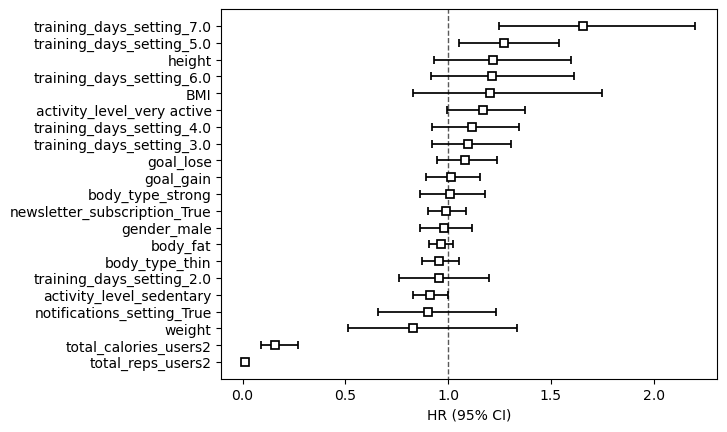

In [140]:
cph_scaled_all.plot(hazard_ratios=True)

Below there are predictions for the 5 users and their survival function prediction for all 4 weeks. 

In [141]:
cph_scaled_all.predict_survival_function(scaled_num_data_strata.iloc[0:5, :])

1    2    0    4    3
1.00 0.64 1.00 1.00 1.00 1.00
2.00 0.32 1.00 1.00 1.00 1.00
3.00 0.10 1.00 1.00 0.37 1.00
4.00 0.10 1.00 1.00 0.37 1.00

<AxesSubplot: >

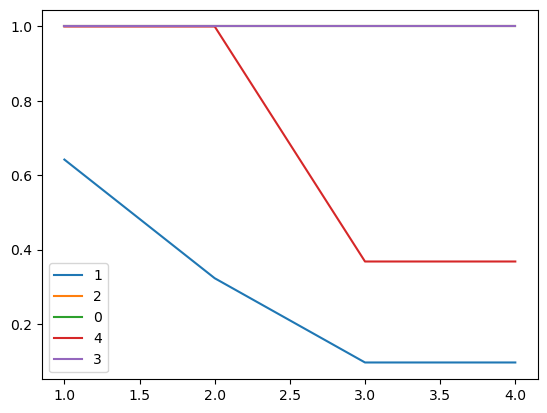

In [142]:
cph_scaled_all.predict_survival_function(scaled_num_data_strata.iloc[0:5, :]).plot()

We can see that user 3, 0 and 2 has biggest chances to not drop out at 4 weeks and user 1 has the biggest chances to drop out at 4 weeks, so comparing to the last (non standardized model) - the biggest chances of dropping out are for the same users.

Below there are values of partial AIC and log-likelighood. The lower AIC is, the better the model is. Log-likelihood - we want to maximize it (the bigger the better). 

In [143]:
print("Partial AIC is: {} \n Log likelihood score is: {}".format(cph_scaled_all.AIC_partial_, cph_scaled_all.score(scaled_num_data_strata)))


Partial AIC is: 27437.126039534847 
 Log likelihood score is: -4.5176659036172255


Below there is a calibration curve with ICI and E50.

ICI =  0.08204099877847933
E50 =  0.05365744812113932


(<AxesSubplot: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 4 mortality'}, xlabel='Predicted probability of \nt ≤ 4 mortality', ylabel='Observed probability of \nt ≤ 4 mortality'>,
 0.08204099877847933,
 0.05365744812113932)

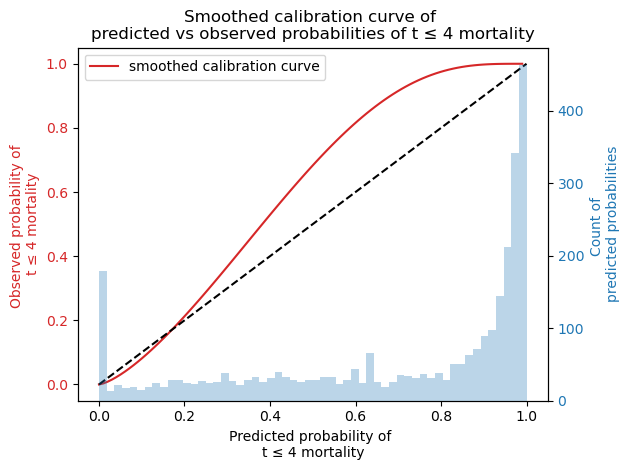

In [144]:
survival_probability_calibration(cph_scaled_all, scaled_num_data_strata, t0=4)

In [145]:
cph_scaled_all.predict_median(scaled_num_data_strata).median()

2.0

In [146]:
pred_cph_scaled_all = cph_scaled_all.predict_median(scaled_num_data_strata)

pred_cph_scaled_all = pd.DataFrame(pred_cph_scaled_all)

In [147]:
value = pred_cph_scaled_all[0.5].quantile(0.5)
pred_cph_scaled_all = pred_cph_scaled_all.replace(np.inf, value)

In [148]:
mae(scaled_num_data_strata['surv_time'], pred_cph_scaled_all)

0.7948548812664907

MAE is less than 1, so the error has good (positive) value.

##### Parametric models

We check AIC to see which model to take - here, again, lognormal model.

In [149]:
parametric_surv(X_train_4_scaled)

AIC
Weibull   6372.28
Lognormal 5947.69
LogLog    6055.21

In [150]:
lognormAFT_4_sc = LogNormalAFTFitter()
lognormAFT_4_sc.fit(X_train_4_scaled, duration_col = 'surv_time', event_col = 'cens')
lognormAFT_4_sc.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 494 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 1629
           log-likelihood = -2391.411
         time fit was run = 2023-05-11 08:00:33 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    BMI                             -0.029      0.972      0.116           -0.256            0.198                0.774                1.219
       activity_level_sedentary        -0.055      0.947      0.028           -0.111            0.001                0.895                1.001
       activity_level_very active      -0.009      0.991      0.046           -0.100            0.082                0.905                1.086
       body_fat                        -0.020      0.981      0.018           -0.055            0.016                0.947                1.016
       body_type_strong                -0.021      0.979      0.047           -0.114            0.072                0.892                1.075
       body_type_thin                   0.024      1.025      0.028           -0.030            0.079                0.970                1.082
       exercises_per_user              -0.786      0.456      0.253           -1.282           -0.290                0.278                0.748
       exercises_without_rest_per_user  0.781      2.183      0.281            0.229            1.332                1.257                3.789
       gender_male                      0.078      1.081      0.038            0.004            0.152                1.004                1.164
       goal_gain                        0.018      1.018      0.038           -0.057            0.093                0.944                1.098
       goal_lose                       -0.022      0.978      0.041           -0.103            0.058                0.903                1.060
       height                          -0.048      0.953      0.083           -0.210            0.114                0.811                1.120
       newsletter_subscription_True    -0.012      0.988      0.028           -0.067            0.043                0.935                1.044
       notifications_setting_True       0.058      1.060      0.089           -0.116            0.233                0.891                1.262
       total_calories_users2           -0.044      0.957      0.096           -0.232            0.143                0.793                1.154
       total_reps_users2               -0.193      0.825      0.134           -0.456            0.071                0.634                1.073
       total_sessions_users2            1.307      3.696      0.092            1.127            1.487                3.087                4.424
       total_time_users2               -0.494      0.610      0.131           -0.750           -0.237                0.472                0.789
       training_days_setting_2.0        0.050      1.051      0.068           -0.084            0.184                0.920                1.201
       training_days_setting_3.0       -0.003      0.997      0.052           -0.105            0.099                0.900                1.104
       training_days_setting_4.0       -0.049      0.952      0.056           -0.159            0.060                0.853                1.061
       training_days_setting_5.0       -0.116      0.890      0.057           -0.228           -0.005                0.796                0.995
       training_days_setting_6.0       -0.156      0.856      0.083           -0.318            0.007                0.727                1.007
       training_days_setting_7.0       -0.291      0.747      0

Variables statistically significant are exercises_per_user, exercises_without_rest_per_user, gender_male,  total_time, total_sessions, training_days_setting 5 and 7.

Exercises_per_user has negative coefficient. A unit increase indicates that the mean/median survival time will change by a factor of exp(-0.786) = 0.456 - 54% decrease in median/mean survival time.

Exercises_without_rest_per_user has positive coefficient. A unit increase indicates that the mean/median survival time will change by a factor of exp(0.781) = 2.183 - 118% increase in median/mean survival time.

Total time has negative coefficient. A unit increase indicate that the mean/median survival time will change by a factor exp(-0.494) = 0.61 - 39% decrease in mean/median survival time.

Total sessions has positive coefficient. A unit increase indicate that the mean/median survival time will change by a factor exp(1.307) = 3.396 - 240% increase in mean/median survival time.

Gender male has positive coefficient. This means that by selecting goal of losing weight, mean/median survival time changes by exp(0.078) = 1.081 - 8% increase in mean/median survival time.

Training days set at 5 days a week has negative coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(-0.116) = 0.89 - 11% decrease in mean/median survival time.

Training days set at 7 days a week has negative coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(-0.291) = 0.747 - 25% decrease in mean/median survival time.

Now, we will try to get rid of the variables that are not significant (based on p-value, the highest p-value - then we delete the variable and check again).

In [151]:
X_train_4_scaled2 = X_train_4_scaled.drop(['training_days_setting_3.0'], axis = 1)

In [152]:
X_train_4_scaled2.drop(['activity_level_very active'], axis = 1, inplace = True)

In [153]:
X_train_4_scaled2.drop(['BMI'], axis = 1, inplace = True)

In [154]:
X_train_4_scaled2.drop(['body_type_strong'], axis = 1, inplace = True)

In [155]:
X_train_4_scaled2.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [156]:
X_train_4_scaled2.drop(['weight'], axis = 1, inplace = True)

In [157]:
X_train_4_scaled2.drop(['total_calories_users2'], axis = 1, inplace = True)

In [158]:
X_train_4_scaled2.drop(['goal_gain'], axis = 1, inplace = True)

In [159]:
X_train_4_scaled2.drop(['notifications_setting_True'], axis = 1, inplace = True)

In [160]:
X_train_4_scaled2.drop(['training_days_setting_2.0'], axis = 1, inplace = True)

In [161]:
X_train_4_scaled2.drop(['body_type_thin'], axis = 1, inplace = True)

In [162]:
X_train_4_scaled2.drop(['goal_lose'], axis = 1, inplace = True)

In [163]:
X_train_4_scaled2.drop(['height'], axis = 1, inplace = True)

In [164]:
X_train_4_scaled2.drop(['gender_male'], axis = 1, inplace = True)

In [165]:
X_train_4_scaled2.drop(['total_reps_users2'], axis = 1, inplace = True)

In [166]:
X_train_4_scaled2.drop(['training_days_setting_4.0'], axis = 1, inplace = True)

In [167]:
X_test_4_scaled2 = X_test_4_scaled.loc[:, ['activity_level_sedentary',
                                            'body_fat', 'exercises_per_user',
                                            'exercises_without_rest_per_user',
                                            'total_sessions_users2',
                                            'total_time_users2',
                                            'training_days_setting_5.0',
                                            'training_days_setting_6.0',
                                            'training_days_setting_7.0',
                                           'surv_time',
                                           'cens']]

In [168]:
lognormAFT_4_sc.fit(X_train_4_scaled2, duration_col = 'surv_time', event_col = 'cens')
lognormAFT_4_sc.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 494 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 1629
           log-likelihood = -2398.906
         time fit was run = 2023-05-11 08:00:36 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    activity_level_sedentary        -0.056      0.945      0.028           -0.111           -0.002                0.895                0.998
       body_fat                        -0.027      0.973      0.013           -0.053           -0.001                0.948                0.999
       exercises_per_user              -0.489      0.613      0.186           -0.855           -0.124                0.425                0.883
       exercises_without_rest_per_user  0.430      1.537      0.187            0.063            0.797                1.065                2.218
       total_sessions_users2            1.236      3.442      0.081            1.078            1.394                2.939                4.032
       total_time_users2               -0.597      0.550      0.090           -0.773           -0.421                0.462                0.656
       training_days_setting_5.0       -0.105      0.900      0.033           -0.170           -0.039                0.843                0.961
       training_days_setting_6.0       -0.149      0.862      0.069           -0.284           -0.014                0.753                0.987
       training_days_setting_7.0       -0.287      0.750      0.073           -0.430           -0.145                0.650                0.865
       Intercept                        0.837      2.311      0.018            0.803            0.872                2.232                2.392
sigma_ Intercept                       -0.598      0.550      0.018           -0.634           -0.562                0.531                0.570

                                         cmp to       z       p   -log2(p)
param  covariate                                                          
mu_    activity_level_sedentary           0.000  -2.031   0.042      4.566
       body_fat                           0.000  -2.052   0.040      4.636
       exercises_per_user                 0.000  -2.626   0.009      6.854
       exercises_without_rest_per_user    0.000   2.299   0.022      5.537
       total_sessions_users2              0.000  15.328 <0.0005    173.752
       total_time_users2                  0.000  -6.644 <0.0005     34.936
       training_days_setting_5.0          0.000  -3.138   0.002      9.199
       training_days_setting_6.0          0.000  -2.156   0.031      5.008
       training_days_setting_7.0          0.000  -3.946 <0.0005     13.617
       Intercept                          0.000  47.422 <0.0005        inf
sigma_ Intercept                          0.000 -32.735 <0.0005    778.325
---
Concordance = 0.837
AIC = 4819.812
log-likelihood ratio test = 1145.879 on 9 df
-log2(p) of ll-ratio test = 798.040

The AIC value is better than in the model with not significant variables. So the model is better. 

Variables statistically significant are activity_level_sedentary, body_fat, exercises_per_user, exercises_per_user_without_rest, total_sessions_users, total_time_users, training_days_setting_5, 6 and 7.

Activity_level_sedentary has negative coefficient. So if the user was sedentary, then mean/median survival time changes by exp(-0.056) = 0.945 - 5.5% decrease in mean/median survival time.

Body_fat has negative coefficient. A unit increase indicates that the mean/median survival time will change by a factor of exp(-0.027) = 0.973 - 2.7% decrease in median/mean survival time.

Exercises_per_user has negative coefficient. A unit increase indicates that the mean/median survival time will change by a factor of exp(-0.489) = 0.613 - 39% decrease in median/mean survival time.

Exercises_without_rest_per_user has positive coefficient. A unit increase indicates that the mean/median survival time will change by a factor of exp(0.430) = 1.537 - 54% increase in median/mean survival time.

Total sessions has positive coefficient. A unit increase indicate that the mean/median survival time will change by a factor exp(1.236) = 3.442 - 244% increase in mean/median survival time.

Total time has negative coefficient. A unit increase indicate that the mean/median survival time will change by a factor exp(-0.597) = 0.55 - 45% decrease in mean/median survival time.

Training days set at 5 days a week has negative coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(-0.105) = 0.9 - 10% decrease in mean/median survival time.

Training days set at 6 days a week has negative coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(-0.149) = 0.862 - 14% decrease in mean/median survival time.

Training days set at 7 days a week has negative coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(-0.287) = 0.750 - 25% decrease in mean/median survival time.

<AxesSubplot: xlabel='log(accelerated failure rate) (95% CI)'>

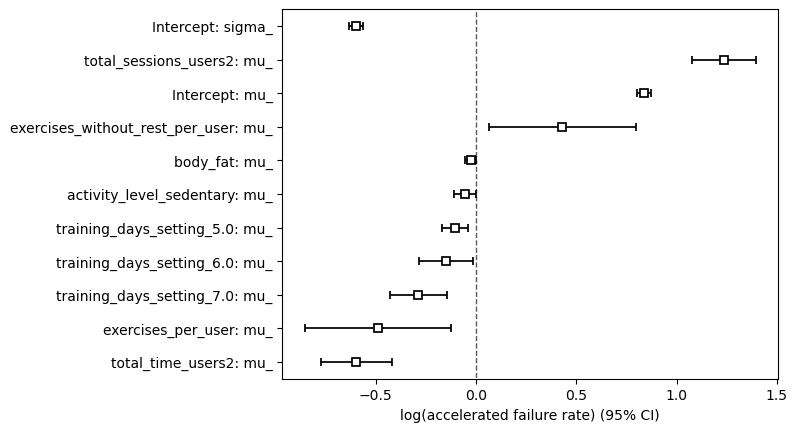

In [169]:
lognormAFT_4_sc.plot()

Below there are predictions for the 5 users and their survival function prediction for all 4 weeks. 

In [170]:
lognormAFT_4_sc.predict_survival_function(X_test_4_scaled2.iloc[0:5, :])

2880  2179  2370  432   794 
1.00  0.78  0.84  0.95  1.00  0.80
2.00  0.31  0.40  0.65  1.00  0.33
3.00  0.11  0.16  0.36  1.00  0.12
4.00  0.04  0.06  0.19  0.99  0.04

<AxesSubplot: >

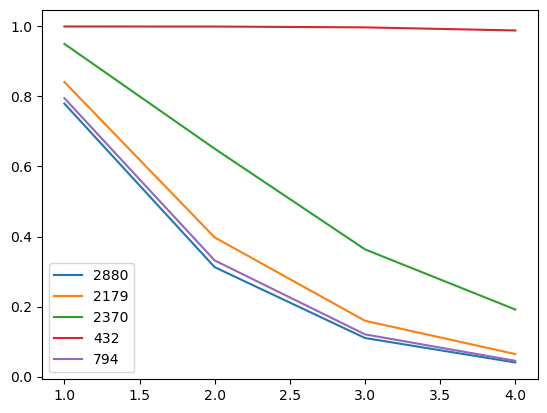

In [171]:
lognormAFT_4_sc.predict_survival_function(X_test_4_scaled2.iloc[0:5, :]).plot()

Looking at the prediction plots, user 432 has 100% chances of survival and user 2179 has the lowest chances of survival. 

In [172]:
print("AIC is: {} \n Log likelihood score is: {}".format(lognormAFT_4_sc.AIC_, lognormAFT_4_sc.score(X_test_4_scaled2)))


AIC is: 4819.812219616572 
 Log likelihood score is: -1.1846969853065383


The values of ICI and E50 are the same as in non-scaled version.

ICI =  0.025155231506175876
E50 =  0.016602923107539413


(<AxesSubplot: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 4 mortality'}, xlabel='Predicted probability of \nt ≤ 4 mortality', ylabel='Observed probability of \nt ≤ 4 mortality'>,
 0.025155231506175876,
 0.016602923107539413)

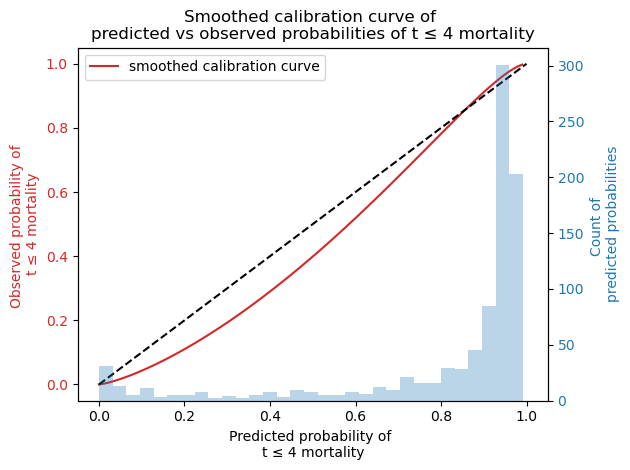

In [173]:
survival_probability_calibration(lognormAFT_4_sc, X_test_4_scaled2, t0=4)

Median predicted survival time (time of not dropping out) is 1.75 weeks (again, the same as in non-scaled).

In [174]:
lognormAFT_4_sc.predict_median(X_test_4_scaled2).median()

1.7181186066118097

Below there is a mean absolute error of median prediction of survival time on test set.

In [175]:
pred_4_sc = lognormAFT_4_sc.predict_median(X_test_4_scaled2)
mae(actual, pred_4_sc)

3.741099839016279

MAE value is big according to the fact, that we only have 4 weeks, and we are have mistake rate of survival at almost 3 weeks, again, the same value as in non-standardized model.

<AxesSubplot: >

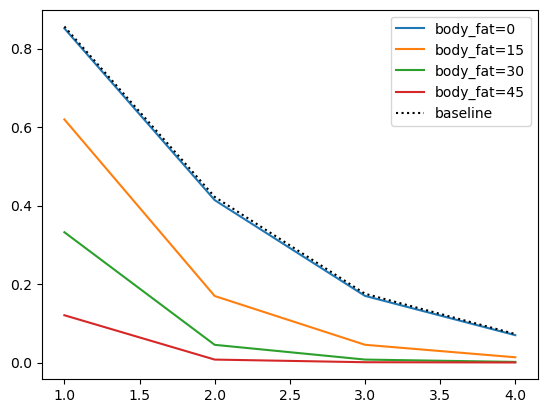

In [176]:
lognormAFT_4_sc.plot_partial_effects_on_outcome('body_fat', range(0,60,15))

We can use our fitted model to see how the survival changes as we change the covariate values. Here, I have used the method to see how the survival varies among 0, 15, 30 and 45 percent of body fat for users compared to their baseline. It clearly highlights that users with lower body fat have higher survival probabilities at any given instance of time compared to users with high body fat. But we can see that model is much different than when we only took the demographic data and non standardized data, the difference between groups are big and the baseline is is on body fat equal to 0.

Below we can look which variables may have the biggest influence on model (according to concordance index and AIC value).

In [177]:
c_i_aic_comp_param(X_train_4_scaled2, X_test_4_scaled2, model = 'lognormal').sort_values(by = 'CI test set', ascending = False)

CI training set CI test set     AIC
total_sessions_users2                      0.88        0.88 4916.05
total_time_users2                          0.87        0.87 5079.28
exercises_per_user                         0.86        0.86 5309.92
exercises_without_rest_per_user            0.86        0.86 5309.92
body_fat                                   0.55        0.55 5910.90
activity_level_sedentary                   0.56        0.54 5896.38
training_days_setting_5.0                  0.51        0.52 5949.32
training_days_setting_7.0                  0.51        0.51 5940.91
training_days_setting_6.0                  0.50        0.50 5949.48

## Follow-up 4 weeks - second approach on censoring

### Users demographics

First, we will see how does it look with users demographics.

#### Kaplan-Meier Estimates

Now, the Kaplan-Meier estimators will be shown for different combinations.

##### All

First, for all of the data, without separating into groups.

Median survival time is 2.0 
 Survival function takes estimates for each time point 
           Kaplan Meier Estimate
timeline                       
0.00                       1.00
1.00                       0.61
2.00                       0.43
3.00                       0.33
4.00                       0.33


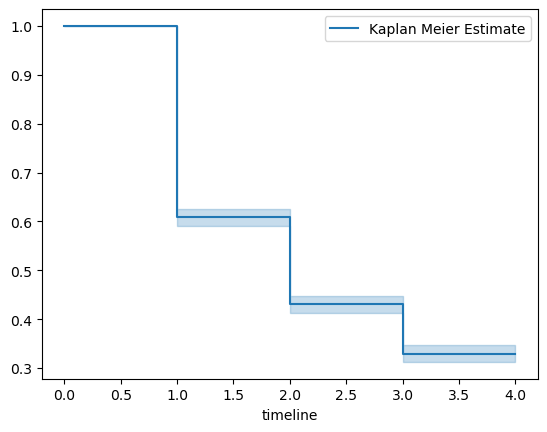

In [178]:
kmf_4_all2 = km_simple(df_users_4_weeks_demo2)

The y-axis represents the probability the subject still hasn't experienced the event of interest (so didn't stop working out) after time t where time t is on the x-axis. In order to see how uncertain we are about the point estimates, we use the confidence intervals. The median time is the time where on average, half of the population has experienced the event of interest.

So here, the probability that the user didn't stop working out in a first week is 0.61, in the second week it's 0.40 and in third - 0.24.

##### By gender groups

Here, we will compare estimators of gender groups.

Median survival time for female is 2.0
Survival function for female estimates: 
           female
timeline        
0.00        1.00
1.00        0.57
2.00        0.37
3.00        0.27
4.00        0.27
Median survival time for male is 2.0
Survival function for male estimates: 
           male
timeline      
0.00      1.00
1.00      0.64
2.00      0.47
3.00      0.37
4.00      0.37


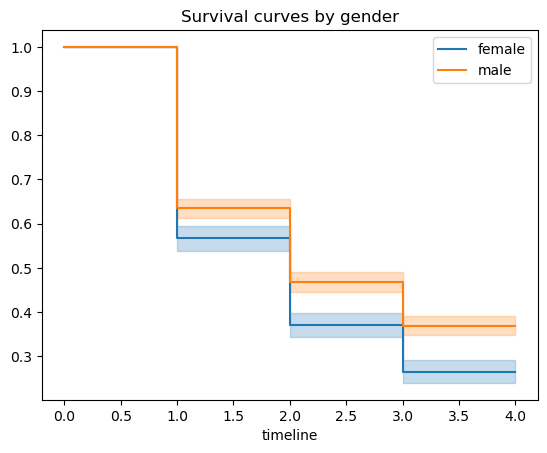

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          35.10 <0.005     28.25

In [179]:
kaplan_meier_by_cat(df_users_4_weeks_demo2, 'gender')

km_logrank_test(df_users_4_weeks_demo2, 'gender')

By logrank test, it is seen that there are differences between groups in survival curves in gender. For both categories, median survival times is 2 weeks. Probability of not dropping working in the first week is 0.57 and 0.64, for women and men respectively. In the second week - 0.37 and 0.47, third week - 0.27 and 0.37.

##### By activity level groups

Here, we will compare estimators of activity level groups (active, very active, sedentary).

Median survival time for active is 2.0
Survival function for active estimates: 
           active
timeline        
0.00        1.00
1.00        0.64
2.00        0.47
3.00        0.37
4.00        0.37
Median survival time for sedentary is 2.0
Survival function for sedentary estimates: 
           sedentary
timeline           
0.00           1.00
1.00           0.53
2.00           0.34
3.00           0.24
4.00           0.24
Median survival time for very active is 2.0
Survival function for very active estimates: 
           very active
timeline             
0.00             1.00
1.00             0.70
2.00             0.49
3.00             0.41
4.00             0.41


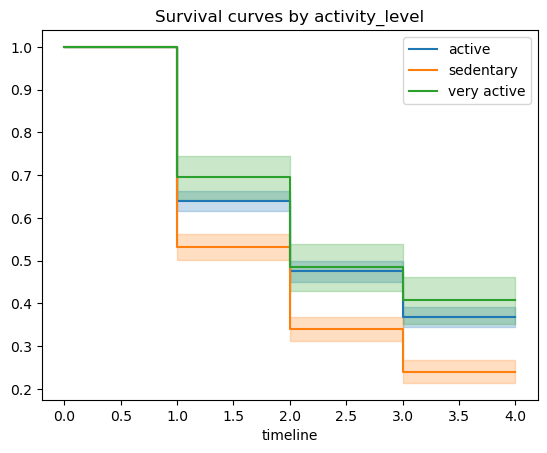

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                       test_statistic      p  -log2(p)
active    sedentary             55.55 <0.005     43.32
          very active            1.69   0.19      2.37
sedentary very active           33.26 <0.005     26.88

In [180]:
kaplan_meier_by_cat(df_users_4_weeks_demo2, 'activity_level')

km_logrank_test(df_users_4_weeks_demo2, 'activity_level')

There are significant differences between survival curves of active and sedentary, sedentary and very active groups. In all of the cases p-value is less than 0.05. Between active and very active, the p-value is 0.19, so the differences are not significant.

For sedentary group, probability of not dropping working out in the first week is 0.53, second week is 0.34 and in the third week is 0.24. For active group, probability of not dropping working out in the first week is 0.64, second week is 0.47 and in the third week is 0.37. For very active group, probability of not dropping working out in the first week is 0.7, second week is 0.49 and in the third week is 0.41.  

##### By goal groups

Here, we will compare estimators of goal groups (gain, lose, antiaging).

Median survival time for lose is 2.0
Survival function for lose estimates: 
           lose
timeline      
0.00      1.00
1.00      0.55
2.00      0.37
3.00      0.26
4.00      0.26
Median survival time for gain is 2.0
Survival function for gain estimates: 
           gain
timeline      
0.00      1.00
1.00      0.64
2.00      0.47
3.00      0.38
4.00      0.38
Median survival time for antiaging is 2.0
Survival function for antiaging estimates: 
           antiaging
timeline           
0.00           1.00
1.00           0.65
2.00           0.47
3.00           0.36
4.00           0.36


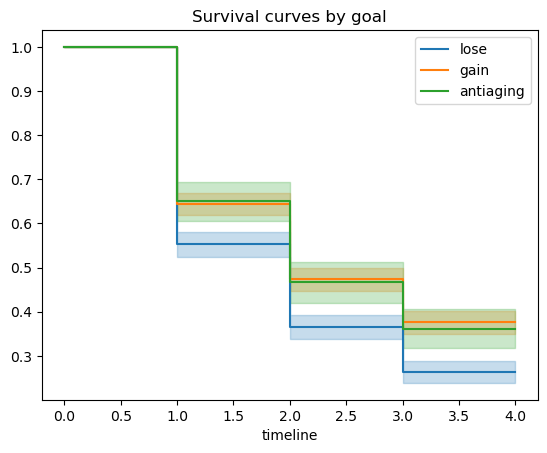

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                test_statistic      p  -log2(p)
antiaging gain            0.15   0.70      0.51
          lose           17.17 <0.005     14.83
gain      lose           39.20 <0.005     31.28

In [181]:
kaplan_meier_by_cat(df_users_4_weeks_demo2, 'goal')

km_logrank_test(df_users_4_weeks_demo2, 'goal')

There are differences between survival curves of antiaging and lose groups and gain and lose groups. Groups antiaging and gain have not difference of survival curves (p = 0.7).

For gain group, probability of not dropping working out in the first week is 0.64, second week is 0.47 and in the third week is 0.38. For lose group, probability of not dropping working out in the first week is 0.55, second week is 0.37 and in the third week is 0.26. For antiaging group, probability of not dropping working out in the first week is 0.65, second week is 0.47 and in the third week is 0.36.  

##### By body type group

Here, we will compare estimators of body type groups (thin, mid, strong).

Median survival time for mid is 2.0
Survival function for mid estimates: 
           mid
timeline     
0.00     1.00
1.00     0.62
2.00     0.44
3.00     0.34
4.00     0.34
Median survival time for thin is 2.0
Survival function for thin estimates: 
           thin
timeline      
0.00      1.00
1.00      0.61
2.00      0.43
3.00      0.33
4.00      0.33
Median survival time for strong is 2.0
Survival function for strong estimates: 
           strong
timeline        
0.00        1.00
1.00        0.54
2.00        0.37
3.00        0.30
4.00        0.30


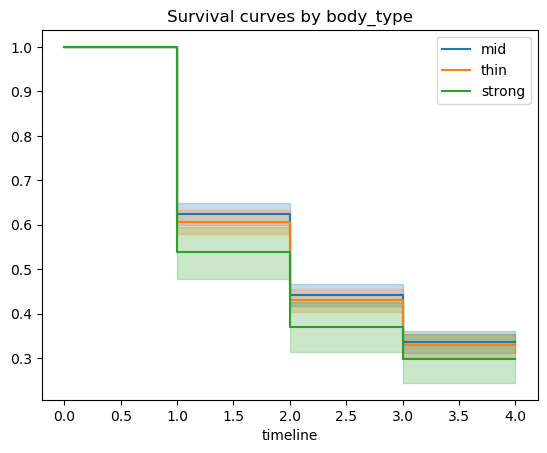

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
               test_statistic    p  -log2(p)
mid    strong            3.73 0.05      4.23
       thin              0.39 0.53      0.91
strong thin              2.36 0.12      3.01

In [182]:
kaplan_meier_by_cat(df_users_4_weeks_demo2, 'body_type')

km_logrank_test(df_users_4_weeks_demo2, 'body_type')

There are no statistically significant differences between survival curves.

##### By newsletter subscription group

Here, we will compare estimators of newsletter subscription (True, False).

Median survival time for False is 2.0
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.59
2.00       0.41
3.00       0.32
4.00       0.32
Median survival time for True is 2.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.62
2.00      0.44
3.00      0.34
4.00      0.34


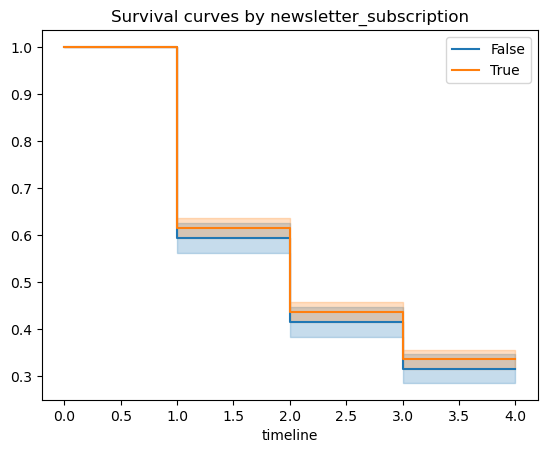

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.45 0.23      2.13

In [183]:
kaplan_meier_by_cat(df_users_4_weeks_demo2, 'newsletter_subscription')

km_logrank_test(df_users_4_weeks_demo2, 'newsletter_subscription')

There are no statistically significant differences between survival curves in newsletter subscription (p = 0.23).

##### By notification settings group

Here, we will compare estimators of notification setting (True, False).

Median survival time for True is 2.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.61
2.00      0.43
3.00      0.33
4.00      0.33
Median survival time for False is inf
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.75
2.00       0.63
3.00       0.52
4.00       0.52


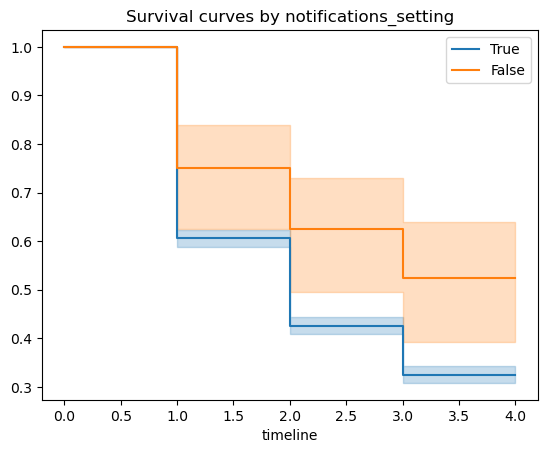

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.19 <0.005      9.47

In [184]:
kaplan_meier_by_cat(df_users_4_weeks_demo2, 'notifications_setting')

km_logrank_test(df_users_4_weeks_demo2, 'notifications_setting')

There are differences between survival curves in newsletter subscription (p z 0.05).

For true group, probability of not dropping working out in the first week is 0.61, second week is 0.43 and in the third week is 0.33. For false group, probability of not dropping working out in the first week is 0.75, second week is 0.63 and in the third week is 0.52. 

##### By training days setting groups

Here, we will compare estimators of training days setting.

Median survival time for 3.0 is 2.0
Survival function for 3.0 estimates: 
           3.00
timeline      
0.00      1.00
1.00      0.62
2.00      0.45
3.00      0.34
4.00      0.34
Median survival time for 4.0 is 2.0
Survival function for 4.0 estimates: 
           4.00
timeline      
0.00      1.00
1.00      0.66
2.00      0.48
3.00      0.37
4.00      0.37
Median survival time for 5.0 is 2.0
Survival function for 5.0 estimates: 
           5.00
timeline      
0.00      1.00
1.00      0.58
2.00      0.39
3.00      0.30
4.00      0.30
Median survival time for 6.0 is 2.0
Survival function for 6.0 estimates: 
           6.00
timeline      
0.00      1.00
1.00      0.57
2.00      0.42
3.00      0.27
4.00      0.27
Median survival time for 2.0 is 2.0
Survival function for 2.0 estimates: 
           2.00
timeline      
0.00      1.00
1.00      0.64
2.00      0.45
3.00      0.36
4.00      0.36
Median survival time for 1.0 is 2.0
Survival function for 1.0 estimates: 
           1.00
timeline  

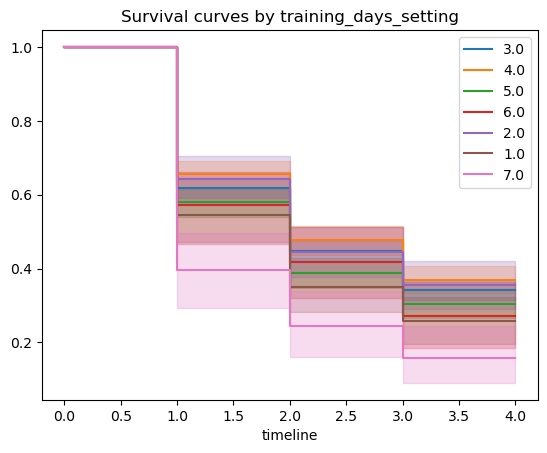

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
           test_statistic      p  -log2(p)
1.00 2.00            5.11   0.02      5.39
     3.00            6.28   0.01      6.36
     4.00           10.35 <0.005      9.59
     5.00            1.39   0.24      2.07
     6.00            0.29   0.59      0.76
     7.00            4.86   0.03      5.19
2.00 3.00            0.17   0.68      0.55
     4.00            0.24   0.62      0.68
     5.00            2.40   0.12      3.04
     6.00            1.77   0.18      2.45
     7.00           16.15 <0.005     14.06
3.00 4.00            2.01   0.16      2.68
     5.00            3.47   0.06      4.00
     6.00            1.58   0.21      2.26
     7.00           18.94 <0.005     16.18
4.00 5.00            7.98 <0.005      7.73
     6.00            3.51   0.06      4.03
     7.00           23.77 <0.005     19.81
5.00 6.00            0.11   0.74      0.43
     7.00           11.12 <0.005     10.19
6.00 7.00            5.74   0.02      5.91

In [185]:
kaplan_meier_by_cat(df_users_4_weeks_demo2, 'training_days_setting')

km_logrank_test(df_users_4_weeks_demo2, 'training_days_setting')

The are differences between survival curves for days 1 and 2, 1 and 3, 1 and 4, 1 and 7, 2 and 7, 3 and 7, 4 and 5, 4 and 7, 5 and 7 and 6 and 7.

##### By clusters for gender, body_type, newsletter_subscription and BMI


Median survival time for 9 is 2.0
Survival function for 9 estimates: 
             9
timeline     
0.00     1.00
1.00     0.57
2.00     0.37
3.00     0.20
4.00     0.20
Median survival time for 5 is 2.0
Survival function for 5 estimates: 
             5
timeline     
0.00     1.00
1.00     0.63
2.00     0.46
3.00     0.38
4.00     0.38
Median survival time for 4 is 2.0
Survival function for 4 estimates: 
             4
timeline     
0.00     1.00
1.00     0.59
2.00     0.41
3.00     0.28
4.00     0.28
Median survival time for 2 is 2.0
Survival function for 2 estimates: 
             2
timeline     
0.00     1.00
1.00     0.66
2.00     0.49
3.00     0.37
4.00     0.37
Median survival time for 1 is 2.0
Survival function for 1 estimates: 
             1
timeline     
0.00     1.00
1.00     0.56
2.00     0.35
3.00     0.28
4.00     0.28
Median survival time for 6 is 2.0
Survival function for 6 estimates: 
             6
timeline     
0.00     1.00
1.00     0.63
2.00     0.49
3.00     0.39


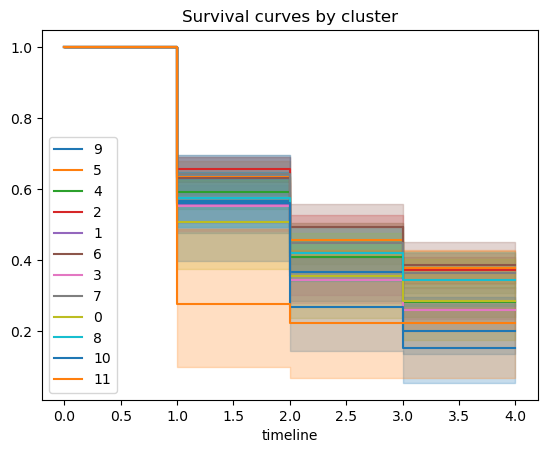

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
       test_statistic      p  -log2(p)
0  1             0.04   0.85      0.24
   2             3.55   0.06      4.07
   3             0.01   0.91      0.13
   4             0.21   0.65      0.63
   5             2.88   0.09      3.47
   6             3.02   0.08      3.60
   7             2.28   0.13      2.93
   8             0.85   0.36      1.49
   9             0.27   0.60      0.73
   10            0.76   0.38      1.39
   11            0.90   0.34      1.54
1  2            11.98 <0.005     10.86
   3             0.23   0.63      0.67
   4             0.32   0.57      0.80
   5             8.24 <0.005      7.93
   6             7.12   0.01      7.04
   7             5.49   0.02      5.70
   8             1.47   0.22      2.15
   9             1.05   0.31      1.71
   10            1.44   0.23      2.12
   11            1.75   0.19      2.43
2  3            12.22 <0.005     11.05
   4            10.44 <0.005      9.66
   5             0.06   0.81      0.30
   6             0.02   0.89      0.16
   7             0.30   0.59      0.77
   8             1.46   0.23      2.14
   9            13.05 <0.005     11.69
   10            8.34 <0.005      8.01
   11            5.24   0.02      5.50
3  4             0.99   0.32      1.64
   5             9.11 <0.005      8.62
   6             8.29 <0.005      7.97
   7             6.60   0.01      6.61
   8             2.32   0.13      2.97
   9             0.32   0.57      0.80
   10            0.94   0.33      1.58
   11            1.30   0.25      1.98
4  5             6.80   0.01      6.78
   6             6.09   0.01      6.20
   7             4.09   0.04      4.54
   8             0.78   0.38      1.40
   9             2.22   0.14      2.88
   10            2.77   0.10      3.38
   11            2.24   0.13      2.89
5  6             0.07   0.79      0.33
   7             0.08   0.77      0.37
   8             0.90   0.34      1.54
   9            10.43 <0.005      9.66
   10            6.55   0.01      6.57
   11            4.65   0.03      5.01
6  7             0.25   0.61      0.70
   8             1.11   0.29      1.78
   9            10.15 <0.005      9.44
   10            7.32   0.01      7.19
   11            4.52   0.03      4.90
7  8             0.47   0.50      1.01
   9             8.12 <0.005      7.83
   10            5.81   0.02      5.97
   11            4.37   0.04      4.78
8  9             3.67   0.06      4.18
   10            3.36   0.07      3.90
   11            2.63   0.10      3.25
9  10            0.68   0.41      1.28
   11            0.81   0.37      1.44
10 11            0.27   0.61      0.72

In [186]:
kaplan_meier_by_cat(df_users_4_weeks_demo2, 'cluster')

km_logrank_test(df_users_4_weeks_demo2, 'cluster')

There are statistical differences between clusters 1 and 2, 1 and 5, 1 and 6, 1 and 6, 2 and 3, 2 and 4, 2 and 9, 2 and 10, 2 and 11, 3 and 5, 3 and 6, 3 and 7, 4 and 5, 4 and 6, 4 and 7, 5 and 9, 5 and 10, 5 and 11, 6 and 9, 6 and 10, 6 and 11, 7 and 9, 7 and 10, 7 and 11.

#### Cox proportional hazards regression

For proportional hazards, we need to create dummies variables and split the data into training and testing subsets.

In [196]:
df_users_4_weeks_demo4 = df_users_4_weeks_demo2.copy()
df_users_4_weeks_demo4.drop(['cluster'], axis = 1, inplace = True)

df_users_4_weeks_demo4['cens'] = df_users_4_weeks_demo4['cens'].astype('int64')

df_users_4_weeks_demo_dummies2 = pd.get_dummies(df_users_4_weeks_demo4, drop_first = True)

df_users_4_weeks_demo4['cens'] = df_users_4_weeks_demo4['cens'].astype('category')

df_users_4_weeks_demo_dummies2.head()

cens2 = df_users_4_weeks_demo_dummies2['cens']
surv_time2 = df_users_4_weeks_demo_dummies2['surv_time']

cens2 = cens2.replace(1, True)
cens2 = cens2.replace(0, False)

y2 = pd.DataFrame({'cens': cens2, 'surv_time': surv_time2})

y_tr2 = y2.to_records(index = False)

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_users_4_weeks_demo_dummies2, y_tr2, test_size = 0.3, random_state = 42)

actual2 = X_test2['surv_time'].astype('int64')

Here, we check how many users we have in both of the sets and censoring.

In [191]:
print('Number of non censored useres in train set: {} (the event happened)'.format(X_train2['cens'].sum()), '\n',
      'Number of censored users in train set: {} (the event did not happened)'.format(len(X_train2) - X_train2['cens'].sum()))

print('Number of non censored useres in test set: {} (the event happened)'.format(X_test2['cens'].sum()), '\n',
      'Number of censored users in test set: {} (the event did not happened)'.format(len(X_test2) - X_test2['cens'].sum()))

Number of non censored useres in train set: 1418 (the event happened) 
 Number of censored users in train set: 705 (the event did not happened)
Number of non censored useres in test set: 595 (the event happened) 
 Number of censored users in test set: 316 (the event did not happened)


Now we fit the data into the model and check if the assumptions for Cox proportional hazards model are met.

In [189]:
cph_demo_4_2 = cox_model(X_train2, summary = False)

x_4_2 = cph_demo_4_2.check_assumptions(X_train2, p_value_threshold=0.05)

Proportional hazard assumption looks okay.


In [190]:
cph_demo_4_2 = cox_model(X_train2, summary = True)

<lifelines.CoxPHFitter: fitted with 2123 total observations, 704 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
      baseline estimation = breslow
   number of observations = 2123
number of events observed = 1419
   partial log-likelihood = -10152.175
         time fit was run = 2023-05-11 08:03:20 UTC

---
                               coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      z       p
covariate                                                                                              
height                        0.014      1.014                0.975                1.054  0.692   0.489
weight                       -0.008      0.992                0.948                1.039 -0.326   0.745
body_fat                      0.007      1.007                0.998                1.016  1.435   0.151
BMI                           0.034      1.034                0.907                1.179  0.500   0.617
gender_male                  -0.359      0.698                0.596                0.818 -4.450 <0.0005
activity_level_sedentary      0.245      1.278                1.137                1.437  4.102 <0.0005
activity_level_very active   -0.104      0.901                0.739                1.098 -1.036   0.300
goal_gain                     0.026      1.026                0.873                1.206  0.315   0.753
goal_lose                     0.122      1.130                0.954                1.339  1.414   0.157
body_type_strong              0.079      1.082                0.890                1.317  0.791   0.429
body_type_thin                0.011      1.011                0.900                1.136  0.189   0.850
newsletter_subscription_True -0.051      0.950                0.846                1.067 -0.862   0.389
notifications_setting_True    0.484      1.622                1.069                2.460  2.275   0.023
training_days_setting_2.0    -0.185      0.831                0.627                1.101 -1.291   0.197
training_days_setting_3.0    -0.169      0.845                0.684                1.043 -1.565   0.118
training_days_setting_4.0    -0.231      0.794                0.633                0.996 -1.996   0.046
training_days_setting_5.0    -0.084      0.920                0.730                1.159 -0.709   0.478
training_days_setting_6.0    -0.055      0.947                0.680                1.318 -0.324   0.746
training_days_setting_7.0     0.252      1.286                0.916                1.807  1.452   0.147
---
Concordance = 0.600
Partial AIC = 20342.349
log-likelihood ratio test = 117.507 on 19 df
-log2(p) of ll-ratio test = 51.455

In [191]:
X_train2_1 = X_train2.copy()

X_train2_1.drop(['body_type_thin'], axis = 1, inplace = True)

X_train2_1.drop(['goal_gain'], axis = 1, inplace = True)

X_train2_1.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

X_train2_1.drop(['weight'], axis = 1, inplace = True)

X_train2_1.drop(['training_days_setting_5.0'], axis = 1, inplace = True)

X_train2_1.drop(['body_type_strong'], axis = 1, inplace = True)

X_train2_1.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

X_train2_1.drop(['activity_level_very active'], axis = 1, inplace = True)

X_train2_1.drop(['training_days_setting_2.0'], axis = 1, inplace = True)

X_train2_1.drop(['BMI'], axis = 1, inplace = True)

X_train2_1.drop(['training_days_setting_3.0'], axis = 1, inplace = True)

X_train2_1.drop(['training_days_setting_4.0'], axis = 1, inplace = True)

X_train2_1.drop(['height'], axis = 1, inplace = True)

In [192]:
cox_model(X_train2_1, summary = True)

<lifelines.CoxPHFitter: fitted with 2123 total observations, 704 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
      baseline estimation = breslow
   number of observations = 2123
number of events observed = 1419
   partial log-likelihood = -10158.801
         time fit was run = 2023-05-11 08:03:21 UTC

---
                             coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      z       p
covariate                                                                                            
body_fat                    0.011      1.011                1.003                1.018  2.776   0.006
gender_male                -0.247      0.781                0.700                0.872 -4.394 <0.0005
activity_level_sedentary    0.267      1.306                1.165                1.463  4.581 <0.0005
goal_lose                   0.129      1.137                1.008                1.283  2.097   0.036
notifications_setting_True  0.470      1.600                1.059                2.417  2.230   0.026
training_days_setting_7.0   0.378      1.460                1.102                1.933  2.640   0.008
---
Concordance = 0.595
Partial AIC = 20329.602
log-likelihood ratio test = 104.254 on 6 df
-log2(p) of ll-ratio test = 64.740

<lifelines.CoxPHFitter: fitted with 2123 total observations, 704 right-censored observations>

The CI for the model without nonsignificant varibales is lower than in the model with insignificant variables, so we will go through the model with insignificant variables. 

P-value parameters are significant only for gender_male, activity_level_sedentary, goal_lose, training_days_setting at day 4 and 7, so we can say that we can group our data based on those demographic parameters.

As a Hazard Ratio (HR) we can take exponential value of coefficient (exp(coef)). 

The p-value for gender is les than 0.0005 and HR (Hazard Ratio) is 0.729 indicating a strong relationship between the user male gender and decreased risk of dropping out, so here, being male reduces the hazard by factor 0.73 (or 27%). That means, men have higher survival chances (that they won't drop out).

The p-value for activity level sedentary is less than 0.005 and HR is 1.27, indicating a strong relationship between sedentary activity level and increased risk of dropping out. Person with sedentary activity level has 27% higher risk of dropping out. 

When:

* HR = 1: No effect,
* HR < 1: Reduction in the hazard,
* HR > 1: Increase in the hazard.

Below there is a plot that shows that there are significant differences.

<AxesSubplot: xlabel='HR (95% CI)'>

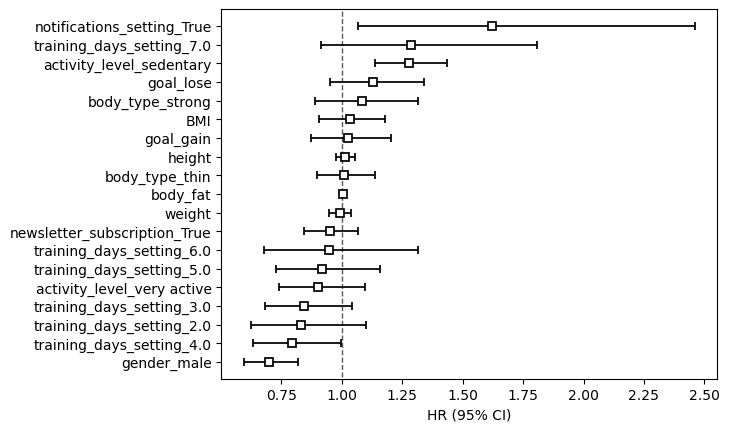

In [193]:
cph_demo_4_2.plot(hazard_ratios=True)

Now, let's check the predictions but only for first 5 users in the set. 

In [194]:
cph_demo_4_2.predict_survival_function(X_test2.iloc[0:5, :])

2880  2179  2370  432   794 
1.00  0.68  0.66  0.77  0.76  0.70
2.00  0.51  0.47  0.63  0.61  0.53
3.00  0.39  0.35  0.52  0.51  0.42
4.00  0.39  0.35  0.52  0.51  0.42

<AxesSubplot: >

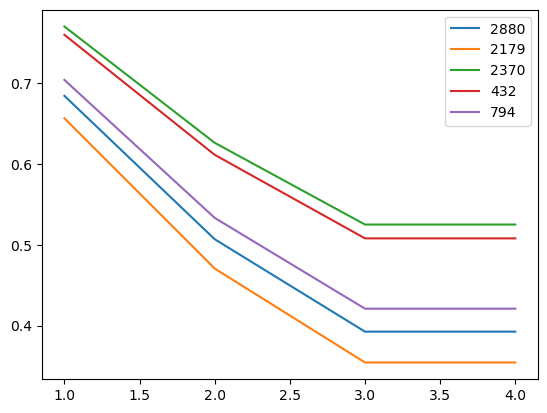

In [195]:
cph_demo_4_2.predict_survival_function(X_test2.iloc[0:5, :]).plot()

We can see that user with row number 432 has biggest chances to not drop out and user 2179 has the biggest chances to drop out.

Below there are values of partial AIC and log-likelighood. The lower AIC is, the better the model is. Log-likelihood - we want to maximize it (the bigger the better). 

In [196]:
print("Partial AIC is: {} \n Log likelihood score is: {}".format(cph_demo_4_2.AIC_partial_, cph_demo_4_2.score(X_test2))) # log likelihood score

Partial AIC is: 20342.349331430647 
 Log likelihood score is: -4.131751608196545


Survival_probability_calibration function is used to measure fitted survival model against observed frequencies of events. The ICI (integrated calibration index) is a weighted average of the absolute difference between the calibration curve and the diagonal line of perfect calibration, where the absolute differences are weighted by the density function of the weights. This is equivalent to integrating f(x) over the distribution of the predicted probabilities. E50 represent the median of the absolute difference between observed and predicted probabilities, we want the values to be close to 0.


ICI =  0.13135010391215
E50 =  0.13503597847067716


(<AxesSubplot: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 4 mortality'}, xlabel='Predicted probability of \nt ≤ 4 mortality', ylabel='Observed probability of \nt ≤ 4 mortality'>,
 0.13135010391215,
 0.13503597847067716)

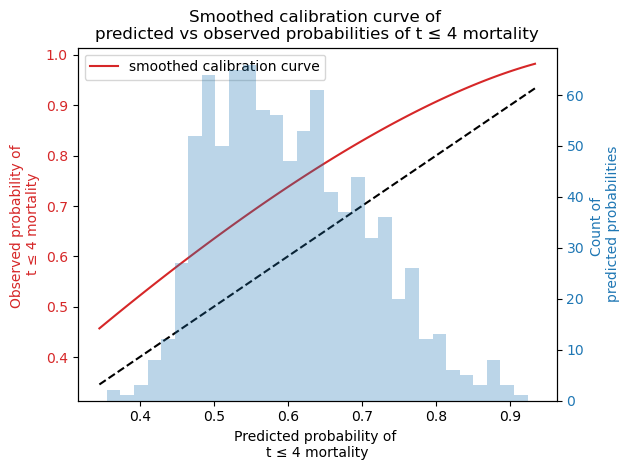

In [197]:
survival_probability_calibration(cph_demo_4_2, X_test2, t0=4)

Below there is a predicted median time of dropping out the workouts.

In [198]:
cph_demo_4_2.predict_median(X_test2).median()

3.0

Now, we'll check the MAE. When the survival curve of an individual does not cross 0.5, then the value of prediction is infinity, so when it happens, we will replace the infinity values with median. Then we calculate MAE.

In [199]:
pred_cph_demo_4_2 = cph_demo_4_2.predict_median(X_test2)

pred_cph_demo_4_2 = pd.DataFrame(pred_cph_demo_4_2)

value_4_2 = pred_cph_demo_4_2[0.5].quantile(0.5)
pred_cph_demo_4_2 = pred_cph_demo_4_2.replace(np.inf, value_4_2)

In [200]:
mae(actual, pred_cph_demo_4_2)

1.0801317233809

This value is 1.08, so in general it's not so bad, but here it may not be so good, according to the fact that the data have only 4 timestamps, and the mean error is 1 week.

Now, we'll check which single variables are the best risk predictors. We will fit a Cox model to each variable individually and record the c-index on the training and test set and compare the results.

In [201]:
cox_demo_ci_4_2 = c_i_comp_cox(X_train2, X_test2)

cox_demo_ci_4_2.sort_values(by = 'training set', ascending = False)

training set test set
activity_level_sedentary             0.55     0.55
body_fat                             0.55     0.55
goal_lose                            0.55     0.54
gender_male                          0.54     0.52
goal_gain                            0.54     0.53
height                               0.53     0.52
BMI                                  0.53     0.54
activity_level_very active           0.52     0.51
training_days_setting_4.0            0.51     0.53
body_type_strong                     0.51     0.51
training_days_setting_3.0            0.51     0.51
training_days_setting_7.0            0.51     0.51
weight                               0.51     0.52
training_days_setting_5.0            0.51     0.52
notifications_setting_True           0.51     0.51
newsletter_subscription_True         0.50     0.52
training_days_setting_2.0            0.50     0.50
training_days_setting_6.0            0.50     0.50
body_type_thin                       0.50     0.50

The CI for every variable has value close to the random one, so, probably, this is not the best model for this data.

#### Parametric models

Below AFT models will be checked (first Fitters, then models). Models taken into consideration are (their distributions are):
* Weibull,
* LogNormal,
* LogLogistic.

Below there is a table with AIC values for each fitter.

In [197]:
parametric_surv(X_train2)

AIC
Weibull   6048.46
Lognormal 5624.68
LogLog    5740.89

What the table above, we can see that the best model from AFT models (Weibull, LogNormal and LogLgistic) is LogNoirmal. Now, we fit the model to the test set.

In [198]:
lognormAFT_4_2 = LogNormalAFTFitter()
lognormAFT_4_2.fit(X_train2, duration_col = 'surv_time', event_col = 'cens')
lognormAFT_4_2.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 705 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 1418
           log-likelihood = -2740.305
         time fit was run = 2023-05-18 09:13:05 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                            
mu_    BMI                          -0.014      0.986      0.043           -0.098            0.069                0.907                1.072
       activity_level_sedentary     -0.127      0.881      0.040           -0.205           -0.048                0.814                0.953
       activity_level_very active    0.026      1.027      0.061           -0.094            0.146                0.911                1.158
       age_in_years                  0.009      1.009      0.002            0.005            0.013                1.005                1.013
       body_fat                     -0.009      0.991      0.003           -0.015           -0.003                0.985                0.997
       body_type_strong             -0.070      0.933      0.065           -0.196            0.057                0.822                1.059
       body_type_thin               -0.060      0.942      0.039           -0.137            0.018                0.872                1.018
       gender_male                   0.164      1.178      0.054            0.059            0.269                1.061                1.308
       goal_gain                    -0.028      0.972      0.054           -0.133            0.077                0.876                1.080
       goal_lose                    -0.065      0.937      0.057           -0.177            0.048                0.838                1.049
       height                       -0.005      0.995      0.013           -0.030            0.019                0.970                1.019
       newsletter_subscription_True  0.066      1.069      0.039           -0.011            0.144                0.989                1.155
       notifications_setting_True   -0.382      0.683      0.133           -0.642           -0.122                0.526                0.885
       training_days_setting_2.0     0.171      1.186      0.096           -0.018            0.360                0.982                1.433
       training_days_setting_3.0     0.151      1.163      0.075            0.004            0.299                1.004                1.348
       training_days_setting_4.0     0.242      1.274      0.080            0.085            0.400                1.088                1.491
       training_days_setting_5.0     0.132      1.141      0.081           -0.028            0.291                0.973                1.338
       training_days_setting_6.0     0.169      1.184      0.120           -0.067            0.404                0.936                1.497
       training_days_setting_7.0    -0.098      0.907      0.123           -0.338            0.143                0.713                1.153
       weight                        0.003      1.003      0.015           -0.026            0.032                0.974                1.032
       Intercept                     1.928      6.875      2.133           -2.253            6.109                0.105              449.740
sigma_ Intercept                    -0.258      0.773      0.020           -0.298           -0.218                0.742                0.804

                                      cmp to       z       p   -log2(p)
param  covariate                                                       
mu_    BMI                             0.000  -0.334   0.738      0.437
       activity_level_sedentary        0.000  -3.167   0.002  

In [199]:
X_train_4_2 = X_train2.copy()

In [200]:
X_train_4_2.drop(['weight'], axis = 1, inplace = True)

In [202]:
X_train_4_2.drop(['activity_level_very active'], axis = 1, inplace = True)

In [204]:
X_train_4_2.drop(['goal_gain'], axis = 1, inplace = True)

In [206]:
X_train_4_2.drop(['training_days_setting_7.0'], axis = 1, inplace = True)

In [208]:
X_train_4_2.drop(['BMI'], axis = 1, inplace = True)

In [210]:
X_train_4_2.drop(['height'], axis = 1, inplace = True)

In [212]:
X_train_4_2.drop(['body_type_strong'], axis = 1, inplace = True)

In [214]:
X_train_4_2.drop(['body_type_thin'], axis = 1, inplace = True)

In [216]:
X_train_4_2.drop(['goal_lose'], axis = 1, inplace = True)

In [218]:
X_train_4_2.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [220]:
X_train_4_2.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

In [222]:
X_train_4_2.drop(['training_days_setting_5.0'], axis = 1, inplace = True)

In [224]:
X_train_4_2.drop(['training_days_setting_2.0'], axis = 1, inplace = True)

In [226]:
X_train_4_2.drop(['training_days_setting_3.0'], axis = 1, inplace = True)

In [228]:
lognormAFT_4_2.fit(X_train_4_2, duration_col = 'surv_time', event_col = 'cens')
lognormAFT_4_2.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 705 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 1418
           log-likelihood = -2750.202
         time fit was run = 2023-05-18 09:18:33 UTC

---
                                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                          
mu_    activity_level_sedentary   -0.144      0.866      0.039           -0.221           -0.067                0.802                0.935
       age_in_years                0.010      1.010      0.002            0.006            0.014                1.006                1.014
       body_fat                   -0.012      0.988      0.002           -0.016           -0.008                0.984                0.992
       gender_male                 0.140      1.150      0.037            0.068            0.213                1.070                1.237
       notifications_setting_True -0.343      0.710      0.131           -0.600           -0.086                0.549                0.918
       training_days_setting_4.0   0.116      1.123      0.044            0.029            0.202                1.030                1.224
       Intercept                   0.977      2.657      0.159            0.665            1.290                1.944                3.632
sigma_ Intercept                  -0.253      0.777      0.020           -0.293           -0.213                0.746                0.808

                                    cmp to       z       p   -log2(p)
param  covariate                                                     
mu_    activity_level_sedentary      0.000  -3.654 <0.0005     11.917
       age_in_years                  0.000   4.978 <0.0005     20.570
       body_fat                      0.000  -5.427 <0.0005     24.057
       gender_male                   0.000   3.799 <0.0005     12.747
       notifications_setting_True    0.000  -2.614   0.009      6.806
       training_days_setting_4.0     0.000   2.629   0.009      6.869
       Intercept                     0.000   6.130 <0.0005     30.087
sigma_ Intercept                     0.000 -12.365 <0.0005    114.255
---
Concordance = 0.611
AIC = 5516.404
log-likelihood ratio test = 120.277 on 6 df
-log2(p) of ll-ratio test = 75.893

Here, the concordance index is the same as in the case, when there are nonsignificant variables, but AIC value is better without the nonsignificant variables. So from now on, we will check the model without the irrelevant variables.

Male gender has a positive coefficient, this means being a man changes mean/median survival time by exp(0.16) = 1.174, which is approximately 17% increase in mean/median survival time.

Activity level which contains sedentary level has negative coefficient. This means that by selecting sedentary activity level changes mean/median survival time by exp(-0.184) = 0.832 - 17% decrease in mean/median survival time.

Lose goal has negative coefficient. This means that by selecting goal of losing weight, mean/median survival time changes by exp(-0.089) = 0.915 -  8% decrease in mean/median survival time.

Variable body fat has negative coefficient. This means, that by one unit increase in body fat decreases mean/median survival time by exp(-0.007) = 0.993 - 1%.

Training days setting at 7 days a week has negative coefficient. This means that by selecting training days setting at 7 days a week, median/mean survival time decreases by almost 22%. 

Notifications setting true has negative coefficient. This means that by enabling notifications setting, median/mean survival time decreases by almost 26%.

Below we can plot the ranking of variables in terms of their log(accelerated failure rate).

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

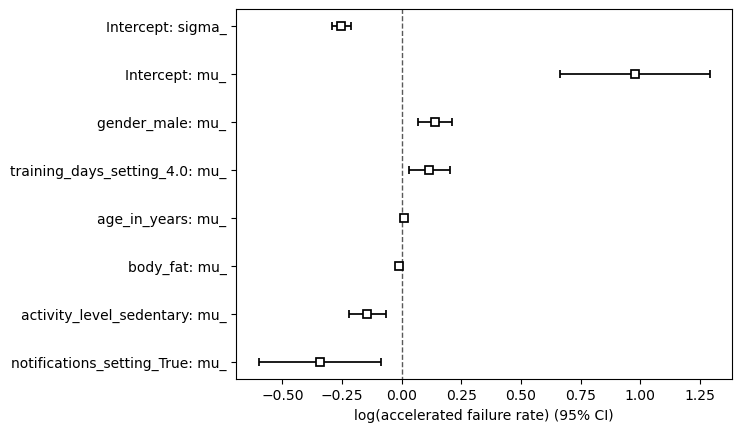

In [229]:
lognormAFT_4_2.plot()

Below there are predictions for the 5 users and their survival function prediction for all 4 weeks. 

In [230]:
X_test_4_2 = X_test2.loc[:,X_train_4_2.columns]

<Axes: >

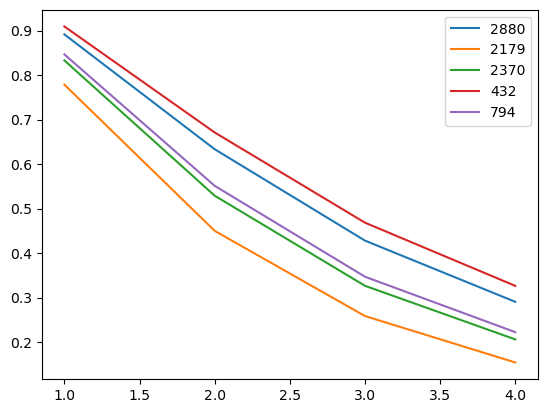

In [231]:
lognormAFT_4_2.predict_survival_function(X_test_4_2.iloc[0:5, :])

lognormAFT_4_2.predict_survival_function(X_test_4_2.iloc[0:5, :]).plot()

In [232]:
print("AIC is: {} \n Log likelihood score is: {}".format(lognormAFT_4_2.AIC_, lognormAFT_4_2.score(X_test_4_2)))

AIC is: 5516.4041191297965 
 Log likelihood score is: -1.3113948006592888


The values of ICI and E50 are better than in Cox regression (the values are closer to 0).

ICI =  0.035092084401937965
E50 =  0.02759484048855032


(<Axes: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 4 mortality'}, xlabel='Predicted probability of \nt ≤ 4 mortality', ylabel='Observed probability of \nt ≤ 4 mortality'>,
 0.035092084401937965,
 0.02759484048855032)

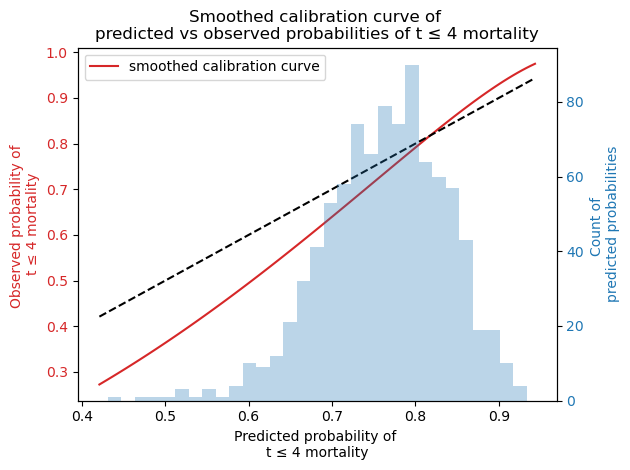

In [233]:
survival_probability_calibration(lognormAFT_4_2, X_test_4_2, t0=4)

Median predicted survival time (time of not dropping out) is over 2 weeks, which is much lower than in Cox model.

In [234]:
lognormAFT_4_2.predict_median(X_test_4_2).median()

2.2573520623770844

Below there is a mean absolute error of median prediction of survival time on test set. 

In [235]:
pred_4_2 = lognormAFT_4_2.predict_median(X_test_4_2)
actual_4_2 =  X_test2['surv_time'].astype('int64')
mae(actual, pred_4_2)

1.0247991746442193

It is a little bit lower than in Cox model, but according to the 4 weeks data - one week is a lot. So the model is not really precise.

We can use our fitted model to see how the survival changes as we change the covariate values. Here, I have used the method to see how the survival varies among 0, 15, 30 and 45 percent of body fat for users compared to their baseline. It clearly highlights that users with lower body fat have higher survival probabilities at any given instance of time compared to users with high body fat.

<Axes: >

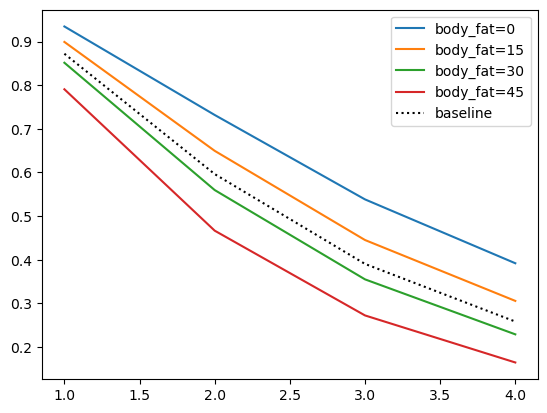

In [236]:
lognormAFT_4_2.plot_partial_effects_on_outcome('body_fat', range(0,60,15))

Below we can look which variables may have the biggest influence on model.

In [237]:
c_i_aic_comp_param(X_train_4_2, X_test_4_2, model = 'lognormal')

CI training set CI test set     AIC
body_fat                              0.56        0.53 5584.57
age_in_years                          0.54        0.57 5600.77
gender_male                           0.54        0.54 5606.38
activity_level_sedentary              0.55        0.56 5584.95
notifications_setting_True            0.51        0.51 5618.48
training_days_setting_4.0             0.52        0.51 5618.17

The CI for every variable are close to the random values.

## Follow-up: 8 weeks

At 8 weeks after beginning of the usage of the app only 61 users were censored. We will conduct the analysis but it may not be very precise.

### Users demographics

#### Kaplan-Meier Estimates

##### All

Median survival time is 2.0 
 Survival function takes estimates for each time point 
           Kaplan Meier Estimate
timeline                       
0.00                       1.00
1.00                       0.66
2.00                       0.48
3.00                       0.37
4.00                       0.31
5.00                       0.24
6.00                       0.18
7.00                       0.11
8.00                       0.00


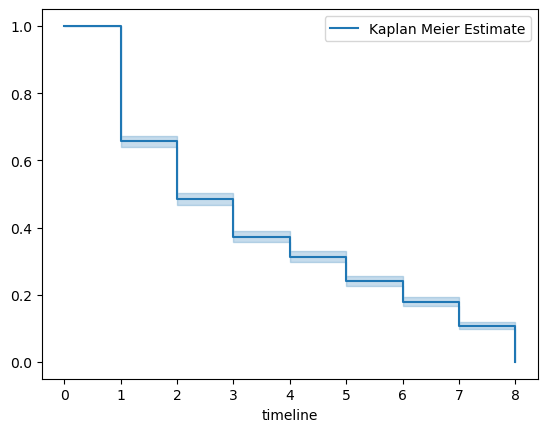

In [227]:
kmf_8_all = km_simple(df_users_8_weeks_demo)

The probability that the user didn't stop working out in a first week is 0.66, in the second week it's 0.48, third - 0.37, fourth - 0.31, fifth - 0.24, sixth - 0.18, seventh - 0.11 and eighth - 0, so, by this estimator, there is no chance that someone didn't drop out until 8th week.

##### By gender

Here, we will compare estimators of gender groups.

Median survival time for female is 2.0
Survival function for female estimates: 
           female
timeline        
0.00        1.00
1.00        0.61
2.00        0.43
3.00        0.31
4.00        0.25
5.00        0.18
6.00        0.12
7.00        0.07
8.00        0.00
Median survival time for male is 3.0
Survival function for male estimates: 
           male
timeline      
0.00      1.00
1.00      0.68
2.00      0.52
3.00      0.41
4.00      0.35
5.00      0.28
6.00      0.21
7.00      0.13
8.00      0.00


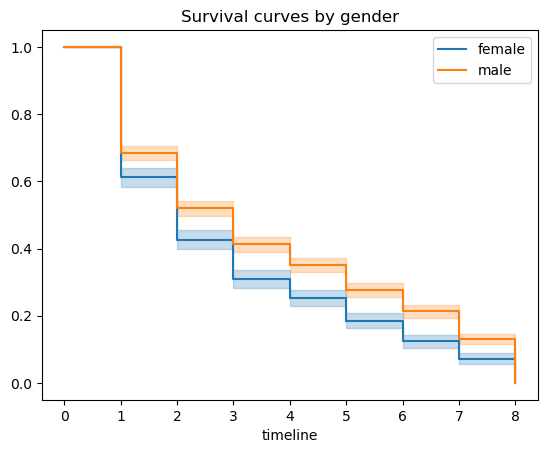

(<lifelines.KaplanMeierFitter:"male", fitted with 1866 total observations, 35 right-censored observations>,
 None)

In [228]:
kaplan_meier_by_cat(df_users_8_weeks_demo, 'gender')

In [229]:
km_logrank_test(df_users_8_weeks_demo, 'gender')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          45.78 <0.005     36.14

By logrank test, it is seen that there are differences between groups in survival curves in gender. For female median survival times is 2 weeks, and for male it is 3 weeks.

##### By activity level

Here, we will compare estimators of activity level groups (active, very active, sedentary).

Median survival time for active is 3.0
Survival function for active estimates: 
           active
timeline        
0.00        1.00
1.00        0.69
2.00        0.53
3.00        0.42
4.00        0.36
5.00        0.28
6.00        0.21
7.00        0.13
8.00        0.00
Median survival time for sedentary is 2.0
Survival function for sedentary estimates: 
           sedentary
timeline           
0.00           1.00
1.00           0.57
2.00           0.37
3.00           0.26
4.00           0.21
5.00           0.15
6.00           0.10
7.00           0.06
8.00           0.00
Median survival time for very active is 3.0
Survival function for very active estimates: 
           very active
timeline             
0.00             1.00
1.00             0.75
2.00             0.59
3.00             0.48
4.00             0.42
5.00             0.35
6.00             0.27
7.00             0.18
8.00             0.00


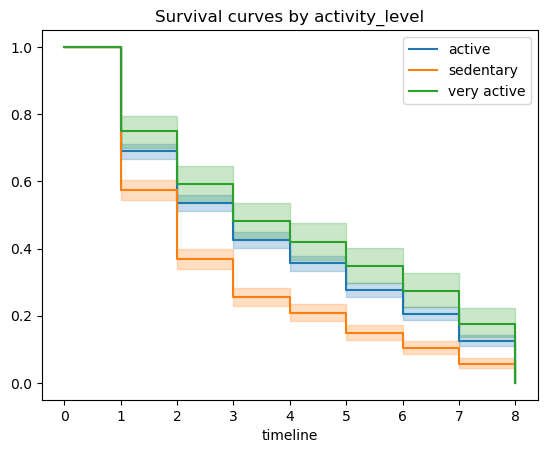

(<lifelines.KaplanMeierFitter:"very active", fitted with 309 total observations, 6 right-censored observations>,
 None)

In [230]:
kaplan_meier_by_cat(df_users_8_weeks_demo, 'activity_level')

In [231]:
km_logrank_test(df_users_8_weeks_demo, 'activity_level')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                       test_statistic      p  -log2(p)
active    sedentary             84.25 <0.005     64.31
          very active            7.66   0.01      7.47
sedentary very active           65.69 <0.005     50.75

There are significant differences between survival curves of activity level groups. In all of the cases p-value is less than 0.05. 

For sedentary group, median survival time is 2 weeks, for active and very active group the median of survival time is 3 weeks.

##### By goal groups

Here, we will compare estimators of goal groups (gain, lose, antiaging).

Median survival time for lose is 2.0
Survival function for lose estimates: 
           lose
timeline      
0.00      1.00
1.00      0.60
2.00      0.41
3.00      0.30
4.00      0.24
5.00      0.18
6.00      0.12
7.00      0.07
8.00      0.00
Median survival time for gain is 3.0
Survival function for gain estimates: 
           gain
timeline      
0.00      1.00
1.00      0.69
2.00      0.53
3.00      0.42
4.00      0.37
5.00      0.29
6.00      0.22
7.00      0.14
8.00      0.00
Median survival time for antiaging is 3.0
Survival function for antiaging estimates: 
           antiaging
timeline           
0.00           1.00
1.00           0.70
2.00           0.54
3.00           0.42
4.00           0.35
5.00           0.26
6.00           0.20
7.00           0.13
8.00           0.00


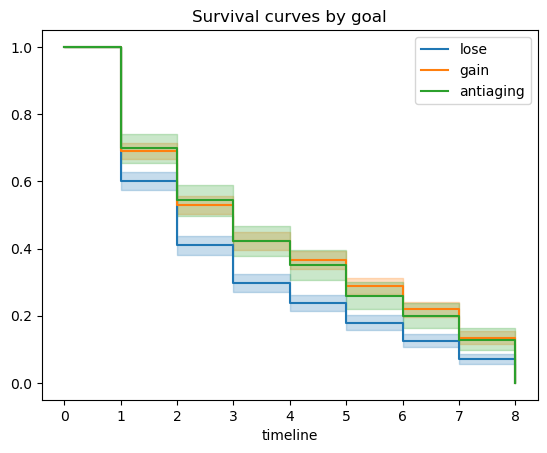

(<lifelines.KaplanMeierFitter:"antiaging", fitted with 456 total observations, 10 right-censored observations>,
 None)

In [232]:
kaplan_meier_by_cat(df_users_8_weeks_demo, 'goal')

In [233]:
km_logrank_test(df_users_8_weeks_demo, 'goal')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                test_statistic      p  -log2(p)
antiaging gain            0.19   0.66      0.60
          lose           25.22 <0.005     20.90
gain      lose           56.46 <0.005     43.99

There are differences between survival curves of antiaging and lose groups and gain and lose groups. Groups antiaging and gain have not difference of survival curves (p = 0.5).

For gain and antiaging group, survival time median is 3 weeks. For lose group, survival time median is 2 weeks.

##### By body type group

Here, we will compare estimators of body type groups (thin, mid, strong).

Median survival time for mid is 3.0
Survival function for mid estimates: 
           mid
timeline     
0.00     1.00
1.00     0.67
2.00     0.50
3.00     0.39
4.00     0.32
5.00     0.25
6.00     0.18
7.00     0.10
8.00     0.00
Median survival time for thin is 2.0
Survival function for thin estimates: 
           thin
timeline      
0.00      1.00
1.00      0.65
2.00      0.48
3.00      0.37
4.00      0.32
5.00      0.24
6.00      0.18
7.00      0.12
8.00      0.00
Median survival time for strong is 2.0
Survival function for strong estimates: 
           strong
timeline        
0.00        1.00
1.00        0.58
2.00        0.41
3.00        0.30
4.00        0.27
5.00        0.19
6.00        0.14
7.00        0.10
8.00        0.00


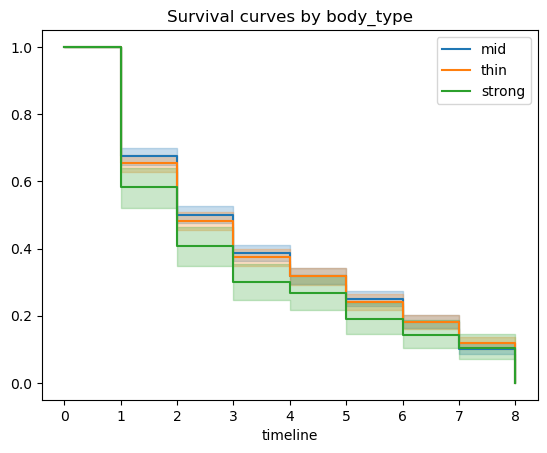

(<lifelines.KaplanMeierFitter:"strong", fitted with 273 total observations, 4 right-censored observations>,
 None)

In [234]:
kaplan_meier_by_cat(df_users_8_weeks_demo, 'body_type')

In [235]:
km_logrank_test(df_users_8_weeks_demo, 'body_type')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
               test_statistic    p  -log2(p)
mid    strong            4.14 0.04      4.58
       thin              0.00 0.99      0.01
strong thin              3.73 0.05      4.23

There is statistically significant difference between groups mid and strong (p = 0.04). 

Median time for mid group is 3 weeks and for strong and thin is 2 weeks.

##### By newsletter subscription group

Here, we will compare estimators of newsletter subscription (True, False).

Median survival time for False is 2.0
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.64
2.00       0.47
3.00       0.36
4.00       0.31
5.00       0.24
6.00       0.19
7.00       0.12
8.00       0.00
Median survival time for True is 2.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.66
2.00      0.49
3.00      0.38
4.00      0.31
5.00      0.24
6.00      0.18
7.00      0.10
8.00      0.00


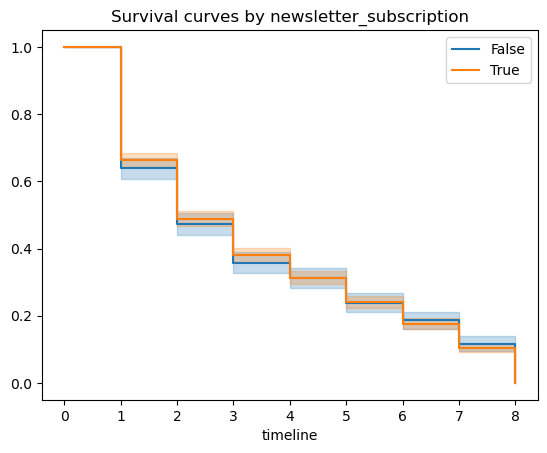

(<lifelines.KaplanMeierFitter:"True", fitted with 2120 total observations, 40 right-censored observations>,
 None)

In [236]:
kaplan_meier_by_cat(df_users_8_weeks_demo, 'newsletter_subscription')

In [237]:
km_logrank_test(df_users_8_weeks_demo, 'newsletter_subscription')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 0.99      0.01

There is no statistical difference between groups.

##### By notification settings group

Here, we will compare estimators of notification setting (True, False).

Median survival time for True is 2.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.65
2.00      0.48
3.00      0.37
4.00      0.31
5.00      0.24
6.00      0.18
7.00      0.11
8.00      0.00
Median survival time for False is 5.0
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.80
2.00       0.73
3.00       0.64
4.00       0.56
5.00       0.39
6.00       0.30
7.00       0.22
8.00       0.00


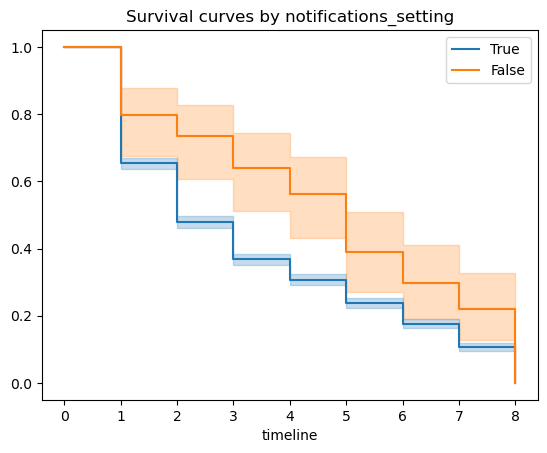

(<lifelines.KaplanMeierFitter: fitted with 64 total observations, 0 right-censored observations>,
 None)

In [238]:
kaplan_meier_by_cat(df_users_8_weeks_demo, 'notifications_setting')

In [239]:
km_logrank_test(df_users_8_weeks_demo, 'notifications_setting')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          11.94 <0.005     10.83

There are differences between survival curves in newsletter subscription (p < 0.005).

For true group, median survival time is 2 weeks, for false group median survival time is 5 weeks.

##### By training days setting group

Here, we will compare estimators of training days setting.

Median survival time for 3.0 is 3.0
Survival function for 3.0 estimates: 
           3.00
timeline      
0.00      1.00
1.00      0.68
2.00      0.50
3.00      0.39
4.00      0.32
5.00      0.24
6.00      0.18
7.00      0.11
8.00      0.00
Median survival time for 4.0 is 3.0
Survival function for 4.0 estimates: 
           4.00
timeline      
0.00      1.00
1.00      0.70
2.00      0.53
3.00      0.43
4.00      0.37
5.00      0.28
6.00      0.20
7.00      0.12
8.00      0.00
Median survival time for 5.0 is 2.0
Survival function for 5.0 estimates: 
           5.00
timeline      
0.00      1.00
1.00      0.61
2.00      0.43
3.00      0.33
4.00      0.28
5.00      0.24
6.00      0.18
7.00      0.12
8.00      0.00
Median survival time for 6.0 is 2.0
Survival function for 6.0 estimates: 
           6.00
timeline      
0.00      1.00
1.00      0.58
2.00      0.45
3.00      0.29
4.00      0.27
5.00      0.22
6.00      0.18
7.00      0.09
8.00      0.00
Median survival time for 2.0 is 3.0
Surv

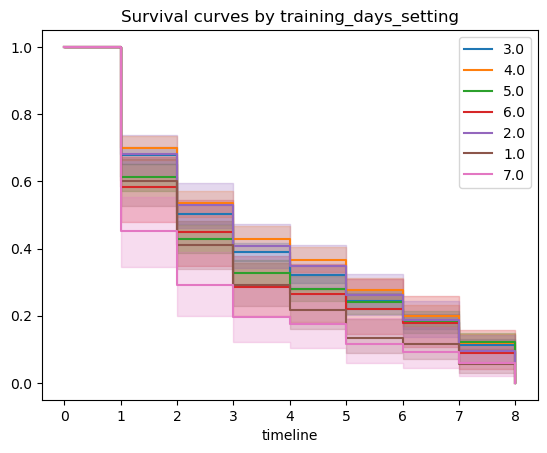

(<lifelines.KaplanMeierFitter:"7.0", fitted with 86 total observations, 0 right-censored observations>,
 None)

In [240]:
kaplan_meier_by_cat(df_users_8_weeks_demo, 'training_days_setting')

In [241]:
km_logrank_test(df_users_8_weeks_demo, 'training_days_setting')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
           test_statistic      p  -log2(p)
1.00 2.00            7.74   0.01      7.53
     3.00           10.73 <0.005      9.89
     4.00           15.97 <0.005     13.92
     5.00            4.18   0.04      4.61
     6.00            0.91   0.34      1.56
     7.00            1.89   0.17      2.57
2.00 3.00            0.04   0.85      0.24
     4.00            0.49   0.48      1.05
     5.00            0.81   0.37      1.44
     6.00            1.26   0.26      1.93
     7.00           11.63 <0.005     10.59
3.00 4.00            1.92   0.17      2.59
     5.00            1.47   0.23      2.15
     6.00            1.56   0.21      2.24
     7.00           14.91 <0.005     13.12
4.00 5.00            4.45   0.03      4.84
     6.00            3.26   0.07      3.81
     7.00           18.70 <0.005     16.00
5.00 6.00            0.32   0.57      0.81
     7.00            8.67 <0.005      8.27
6.00 7.00            3.67   0.06      4.17

The are differences between survival curves for days 1 and 2, 1 and 3, 1 and 4, 1 and 5, 2 and 7, 3 and 7, 4 and 5, 4 and 7 and 5 and 7.

Median survival time for each training days setting is:
* 3 weeks for training days setting 2,3,4,
* 2 weeks for training days setting 1,5,6,
* 1 week for training days setting 7.

##### By clusters for gender, body_type, newsletter_subscription and BMI

Here, the best clustering method was hierarchical cluseting with average linkage and 2 clusters.

Median survival time for 9 is 2.0
Survival function for 9 estimates: 
             9
timeline     
0.00     1.00
1.00     0.60
2.00     0.43
3.00     0.29
4.00     0.24
5.00     0.17
6.00     0.10
7.00     0.08
8.00     0.00
Median survival time for 5 is 3.0
Survival function for 5 estimates: 
             5
timeline     
0.00     1.00
1.00     0.69
2.00     0.51
3.00     0.43
4.00     0.35
5.00     0.27
6.00     0.21
7.00     0.14
8.00     0.00
Median survival time for 4 is 2.0
Survival function for 4 estimates: 
             4
timeline     
0.00     1.00
1.00     0.62
2.00     0.45
3.00     0.33
4.00     0.27
5.00     0.20
6.00     0.13
7.00     0.08
8.00     0.00
Median survival time for 2 is 3.0
Survival function for 2 estimates: 
             2
timeline     
0.00     1.00
1.00     0.71
2.00     0.55
3.00     0.43
4.00     0.36
5.00     0.30
6.00     0.22
7.00     0.12
8.00     0.00
Median survival time for 1 is 2.0
Survival function for 1 estimates: 
             1
timeline     
0

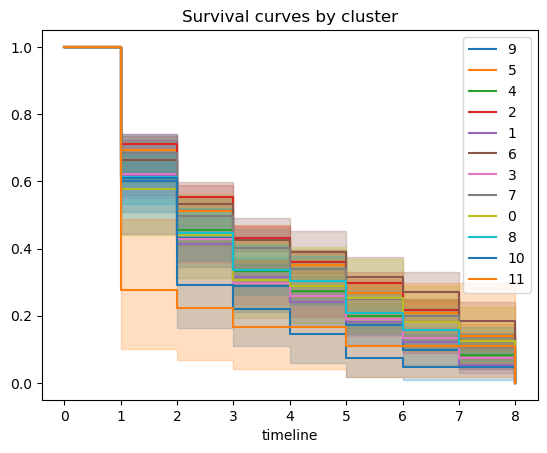

(<lifelines.KaplanMeierFitter:"11", fitted with 18 total observations, 0 right-censored observations>,
 None)

In [242]:
kaplan_meier_by_cat(df_users_8_weeks_demo, 'cluster')

In [243]:
km_logrank_test(df_users_8_weeks_demo, 'cluster')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
       test_statistic      p  -log2(p)
0  1             1.18   0.28      1.85
   2             1.28   0.26      1.96
   3             0.53   0.47      1.09
   4             0.27   0.60      0.73
   5             0.99   0.32      1.65
   6             2.29   0.13      2.94
   7             0.28   0.59      0.75
   8             0.01   0.91      0.14
   9             0.62   0.43      1.22
   10            2.44   0.12      3.08
   11            1.59   0.21      2.27
1  2            22.57 <0.005     18.91
   3             0.22   0.64      0.65
   4             1.30   0.25      1.97
   5            16.02 <0.005     13.96
   6            19.84 <0.005     16.86
   7             8.63 <0.005      8.24
   8             1.92   0.17      2.59
   9             0.01   0.91      0.14
   10            1.70   0.19      2.38
   11            1.17   0.28      1.84
2  3            11.88 <0.005     10.79
   4            14.81 <0.005     13.04
   5             0.05   0.82      0.29
   6             1.49   0.22      2.17
   7             1.28   0.26      1.96
   8             3.91   0.05      4.38
   9             9.73 <0.005      9.10
   10           11.28 <0.005     10.32
   11            5.53   0.02      5.74
3  4             0.23   0.63      0.66
   5             8.53 <0.005      8.16
   6            12.00 <0.005     10.88
   7             4.34   0.04      4.75
   8             0.71   0.40      1.32
   9             0.05   0.83      0.27
   10            2.13   0.14      2.80
   11            1.48   0.22      2.16
4  5             9.68 <0.005      9.07
   6            13.86 <0.005     12.31
   7             3.93   0.05      4.40
   8             0.32   0.57      0.80
   9             0.42   0.52      0.95
   10            3.25   0.07      3.81
   11            1.89   0.17      2.57
5  6             1.46   0.23      2.14
   7             0.68   0.41      1.29
   8             2.66   0.10      3.28
   9             7.22   0.01      7.11
   10            8.88 <0.005      8.44
   11            4.93   0.03      5.24
6  7             3.42   0.06      3.95
   8             5.33   0.02      5.58
   9            10.03 <0.005      9.34
   10           10.53 <0.005      9.74
   11            5.29   0.02      5.55
7  8             0.86   0.35      1.50
   9             4.12   0.04      4.56
   10            6.98   0.01      6.92
   11            3.81   0.05      4.29
8  9             0.83   0.36      1.47
   10            3.31   0.07      3.86
   11            2.05   0.15      2.72
9  10            1.56   0.21      2.24
   11            1.24   0.27      1.91
10 11            0.29   0.59      0.76

There are no differences between survival curves for clusters.

#### Cox PH regression

For proportional hazards, we need to create dummies variables and split the data into training and testing subsets.

In [238]:
df_users_8_weeks_demo_cph = df_users_8_weeks_demo.copy()
df_users_8_weeks_demo_cph.drop(['cluster'], axis = 1, inplace = True)

df_users_8_weeks_demo_cph['cens'] = df_users_8_weeks_demo_cph['cens'].astype('int64')

df_users_8_weeks_demo_dummies = pd.get_dummies(df_users_8_weeks_demo_cph, drop_first = True)

df_users_8_weeks_demo_cph['cens'] = df_users_8_weeks_demo_cph['cens'].astype('category')

In [239]:
df_users_8_weeks_demo_dummies.head()

height  weight  body_fat   BMI  age_in_years  cens  surv_time  gender_male  \
0  180.00   70.00     15.00 21.60         32.00     1          7            1   
1  186.00   79.00     10.00 22.84         48.00     1          8            1   
2  186.00   86.00     30.00 24.86         37.00     1          7            1   
3  178.00   70.00     30.00 22.09         29.00     1          6            1   
4  164.00   62.00     30.00 23.05         43.00     1          8            0   

   activity_level_sedentary  activity_level_very active  goal_gain  goal_lose  \
0                         0                           0          1          0   
1                         0                           0          1          0   
2                         0                           0          1          0   
3                         0                           0          0          1   
4                         0                           0          0          1   

   body_type_strong  body_type_thin  newsletter_subscription_True  \
0                 0               1                             1   
1                 0               0                             1   
2                 0               0                             0   
3                 0               0                             0   
4                 0               1                             1   

   notifications_setting_True  training_days_setting_2.0  \
0                           1                          0   
1                           1                          0   
2                           0                          0   
3                           1                          0   
4                           1                          0   

   training_days_setting_3.0  training_days_setting_4.0  \
0                          0                          1   
1                          0                          0   
2                          1                          0   
3                          0                          0   
4                          1                          0   

   training_days_setting_5.0  training_days_setting_6.0  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          1                          0   
4                          0                          0   

   training_days_setting_7.0  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [240]:
X_train_8, X_test_8 = train_test_split(df_users_8_weeks_demo_dummies, test_size = 0.3, random_state = 42)

In [241]:
actual_8 = X_test_8['surv_time'].astype('int64')

Here, we check how many users we have in both of the sets and censoring.

In [248]:
print('Number of non censored useres in train set: {} (the event happened)'.format(X_train_8['cens'].sum()), '\n',
      'Number of censored users in train set: {} (the event did not happened)'.format(len(X_train_8) - X_train_8['cens'].sum()))

Number of non censored useres in train set: 2081 (the event happened) 
 Number of censored users in train set: 42 (the event did not happened)


In [249]:
print('Number of non censored useres in test set: {} (the event happened)'.format(X_test_8['cens'].sum()), '\n',
      'Number of censored users in test set: {} (the event did not happened)'.format(len(X_test_8) - X_test_8['cens'].sum()))

Number of non censored useres in test set: 893 (the event happened) 
 Number of censored users in test set: 18 (the event did not happened)


In [250]:
cph_8_demo = cox_model(X_train_8, summary = False)

In [251]:
cph_8_demo.check_assumptions(X_train_8, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 2123 total observations, 42 right-censored observations>
         test_name = proportional_hazard_test

---
                                   test_statistic    p  -log2(p)
BMI                          km              0.05 0.83      0.27
                             rank            0.05 0.81      0.30
activity_level_sedentary     km              2.37 0.12      3.02
                             rank            1.53 0.22      2.21
activity_level_very active   km              1.45 0.23      2.13
                             rank            1.39 0.24      2.06
body_fat                     km              0.13 0.72      0.48
                             rank            0.12 0.73      0.45
body_type_strong             km              3.32 0.07      3.87
                             rank            4.01 0.05      4.46
body_type_thin               km              1.73 0.19      2.41
                             rank            2.80 0.09      3.41
gender_male                  km              0.05 0.83      0.28
                             rank            0.12 0.73      0.45
goal_gain                    km              0.09 0.77      0.38
                             rank            0.06 0.81      0.30
goal_lose                    km              0.72 0.40      1.33
                             rank            0.57 0.45      1.15
height                       km              0.00 0.99      0.02
                             rank            0.00 0.96      0.06
newsletter_subscription_True km              1.89 0.17      2.56
                             rank            1.86 0.17      2.53
notifications_setting_True   km              3.15 0.08      3.72
                             rank            2.44 0.12      3.08
training_days_setting_2.0    km              0.22 0.64      0.64
                             rank            0.00 0.94      0.08
training_days_setting_3.0    km              0.25 0.62      0.69
                             rank            0.29 0.59      0.76
training_days_setting_4.0    km              0.02 0.89      0.17
                             rank            0.13 0.72      0.48
training_days_setting_5.0    km              3.75 0.05      4.25
                             rank            3.86 0.05      4.34
training_days_setting_6.0    km              1.05 0.31      1.71
                             rank            1.04 0.31      1.70
training_days_setting_7.0    km              2.91 0.09      3.50
                             rank            2.97 0.08      3.56
weight                       km              0.00 0.96      0.06
                             rank            0.01 0.94      0.09



1. Variable 'body_type_strong' failed the non-proportional test: p-value is 0.0453.

   Advice: with so few unique values (only 2), you can include `strata=['body_type_strong', ...]` in
the call in `.fit`. See documentation in link [E] below.

2. Variable 'training_days_setting_5.0' failed the non-proportional test: p-value is 0.0494.

   Advice: with so few unique values (only 2), you can include `strata=['training_days_setting_5.0',
...]` in the call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.htm

[]

We need to stratify some variables.

In [252]:
cph_8_demo.fit(X_train_8, duration_col = 'surv_time', event_col = 'cens', strata = ['training_days_setting_5.0',
                                                                                    'body_type_strong'])


<lifelines.CoxPHFitter: fitted with 2123 total observations, 42 right-censored observations>

In [253]:
cph_8_demo.check_assumptions(X_train_8)

Proportional hazard assumption looks okay.


[]

In [254]:
cph_8_demo.print_summary(decimals = 3)

<lifelines.CoxPHFitter: fitted with 2123 total observations, 42 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
                   strata = ['training_days_setting_5.0', 'body_type_strong']
      baseline estimation = breslow
   number of observations = 2123
number of events observed = 2081
   partial log-likelihood = -12203.162
         time fit was run = 2023-05-11 08:03:54 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
height                       -0.006      0.994      0.017           -0.040            0.027                0.961                1.028
weight                        0.010      1.010      0.020           -0.030            0.050                0.971                1.051
body_fat                      0.005      1.005      0.004           -0.003            0.012                0.997                1.012
BMI                          -0.001      0.999      0.059           -0.117            0.115                0.890                1.122
gender_male                  -0.292      0.747      0.067           -0.424           -0.160                0.655                0.853
activity_level_sedentary      0.279      1.322      0.051            0.180            0.379                1.197                1.461
activity_level_very active   -0.126      0.882      0.078           -0.279            0.028                0.757                1.028
goal_gain                     0.067      1.070      0.066           -0.063            0.198                0.939                1.219
goal_lose                     0.128      1.136      0.071           -0.011            0.267                0.989                1.306
body_type_thin                0.023      1.023      0.049           -0.074            0.120                0.929                1.127
newsletter_subscription_True -0.010      0.990      0.049           -0.106            0.087                0.899                1.091
notifications_setting_True    0.356      1.427      0.147            0.067            0.644                1.069                1.905
training_days_setting_2.0    -0.172      0.842      0.122           -0.411            0.068                0.663                1.071
training_days_setting_3.0    -0.164      0.849      0.094           -0.349            0.020                0.706                1.020
training_days_setting_4.0    -0.223      0.800      0.100           -0.419           -0.027                0.658                0.973
training_days_setting_6.0    -0.111      0.895      0.146           -0.397            0.175                0.672                1.192
training_days_setting_7.0     0.109      1.116      0.155           -0.194            0.413                0.823                1.512

                               cmp to      z       p   -log2(p)
covariate                                                      
height                          0.000 -0.366   0.715      0.485
weight                          0.000  0.491   0.623      0.682
body_fat                        0.000  1.234   0.217      2.203
BMI                             0.000 -0.014   0.989      0.016
gender_male                     0.000 -4.326 <0.0005     16.007
activity_level_sedentary        0.000  5.489 <0.0005     24.562
activity_level_very active      0.000 -1.607   0.108      3.209
goal_gain                       0.000  1.016   0.310      1.691
goal_lose                       0.000  1.799   0.072      3.795
body_type_thin                  0.000  0.466   0.641      0.641
newsletter_subscription_True    0.000 -0.200   0.841      0.250
notifications_setting_True      0.000  2.413   0.016      5.983
training_days_setting_2.0       0.000 -1.401   0.161      2.633
training_days_setting_3.0       0.000 -1.747   0.

P-value parameters are significant only for gender_male, activity_level_sedentary, notifications_setting_True, training_days_setting at day 4.

As a Hazard Ratio (HR) we can take exponential value of coefficient (exp(coef)). 

The p-value for gender is less than 0.0005 and HR (Hazard Ratio) is 0.75 indicating a strong relationship between the user male gender and decreased risk of dropping out, so here, being male reduces the hazard by factor 0.75 (or 25%). That means, men have higher survival chances (that they won't drop out).

The p-value for activity level sedentary is less than 0.0005 and HR is 1.322, indicating a strong relationship between sedentary activity level and increased risk of dropping out. Person with sedentary activity level has 32% higher risk of dropping out. 

The p-value for notifications_setting_True is 0.016 and HR is 1.427, indicating a strong relationship between true notifications setting and increased risk of dropping out. Person with very active activity level has 43% lower risk of dropping out. 

The p-value for training days setting at 4 days a week is 0.025 and HR is 0.8, indicating a strong relationship between setting training days at 4 days a week and decreased risk of dropping out. Setting training days equal to 4 a week reduces hazard by factor 0.8 (or 20%), so those users have higher chances of not dropping out.

Below there is a plot that shows that there are significant differences.

<AxesSubplot: xlabel='HR (95% CI)'>

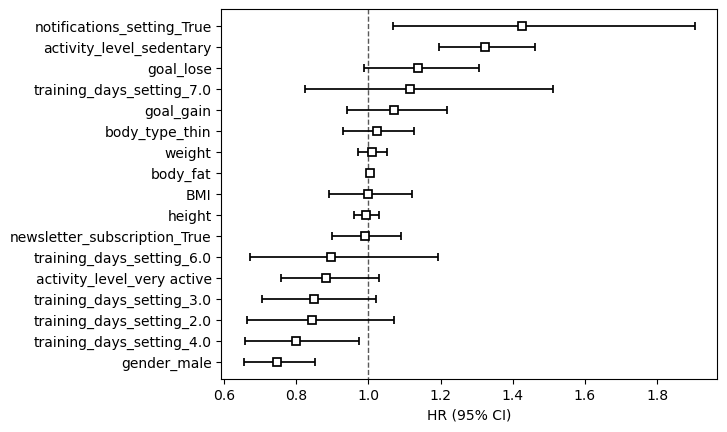

In [255]:
cph_8_demo.plot(hazard_ratios=True)

Now, let's check the predictions but only for first 5 users in the set. 

In [256]:
cph_8_demo.predict_survival_function(X_test_8.iloc[0:5, :])

2880  2179  2370  794   432 
1.00  0.73  0.69  0.78  0.75  0.78
2.00  0.56  0.50  0.64  0.60  0.66
3.00  0.45  0.38  0.53  0.48  0.56
4.00  0.37  0.31  0.46  0.41  0.53
5.00  0.28  0.22  0.37  0.32  0.41
6.00  0.21  0.15  0.30  0.25  0.32
7.00  0.13  0.08  0.20  0.16  0.26
8.00  0.04  0.02  0.08  0.05  0.14

<AxesSubplot: >

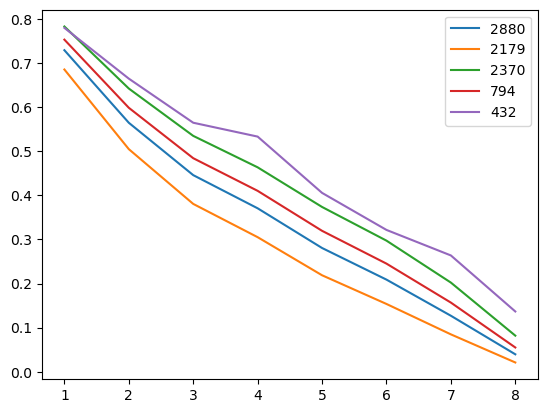

In [257]:
cph_8_demo.predict_survival_function(X_test_8.iloc[0:5, :]).plot()

We can see that user with id 432 has biggest chances to not drop out at 8 weeks and user 2179 has the biggest chances to drop out.

Below there are values of partial AIC and log-likelighood. The lower AIC is, the better the model is. Log-likelihood - we want to maximize it (the bigger the better). 

In [258]:
print("Partial AIC is: {} \n Log likelihood score is: {}".format(cph_8_demo.AIC_partial_, cph_8_demo.score(X_test_8)))


Partial AIC is: 24440.324643237665 
 Log likelihood score is: -4.91346322143867


ICI =  0.005112664722534765
E50 =  0.005577873365113173


(<AxesSubplot: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 8 mortality'}, xlabel='Predicted probability of \nt ≤ 8 mortality', ylabel='Observed probability of \nt ≤ 8 mortality'>,
 0.005112664722534765,
 0.005577873365113173)

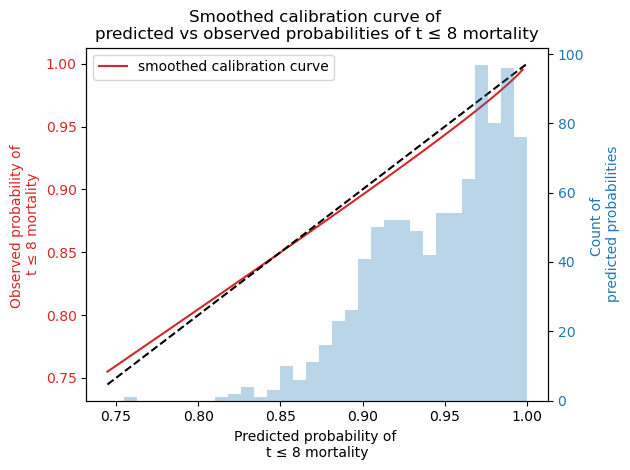

In [259]:
survival_probability_calibration(cph_8_demo, X_test_8, t0=8)

The ICI and E50 values are very good, because they are really close to 0.

Below there is a predicted median time of dropping out the workouts.

In [260]:
cph_8_demo.predict_median(X_test_8).median()

3.0

In [261]:
pred_cph_8_demo = cph_8_demo.predict_median(X_test_8)

pred_cph_8_demo = pd.DataFrame(pred_cph_8_demo)

value_8 = pred_cph_8_demo[0.5].quantile(0.5)
pred_cph_8_demo = pred_cph_8_demo.replace(np.inf, value_8)


Now time for the MAE. The error is about 2 weeks, so quite a lot for a short 8 weeks timeline.

In [262]:
mae(actual_8, pred_cph_8_demo)

1.986827661909989

Now, we'll check which single variables are the best risk predictors. We will fit a Cox model to each variable individually and record the c-index on the training and test set and compare the results.

In [263]:
cox_demo_ci_8 = c_i_comp_cox(X_train_8, X_test_8)

cox_demo_ci_8.sort_values(by = 'training set', ascending = False)

training set test set
activity_level_sedentary             0.56     0.55
body_fat                             0.56     0.55
goal_lose                            0.55     0.54
gender_male                          0.54     0.52
BMI                                  0.54     0.55
goal_gain                            0.54     0.53
height                               0.54     0.53
activity_level_very active           0.52     0.51
training_days_setting_4.0            0.51     0.52
body_type_strong                     0.51     0.51
weight                               0.51     0.52
training_days_setting_3.0            0.51     0.52
notifications_setting_True           0.51     0.51
training_days_setting_7.0            0.51     0.51
training_days_setting_2.0            0.50     0.50
training_days_setting_6.0            0.50     0.50
newsletter_subscription_True         0.50     0.49
body_type_thin                       0.50     0.51
training_days_setting_5.0            0.49     0.48

Most of the single variables predictors have improved values in test data. Probably, the best variables would be sedentary activity level, body_fat, goal_lose, male gender, height, gain_goal and BMI. 

#### Parametric models

Below there is a table with AIC values for each fitter.

In [242]:
parametric_surv(X_train_8)

AIC
Weibull   8817.91
Lognormal 8618.27
LogLog    8847.00

Here, the best Fitter is LogNormal.

In [243]:
WeibullAFT = LogNormalAFTFitter()
WeibullAFT.fit(X_train_8, duration_col = 'surv_time', event_col = 'cens')
WeibullAFT.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 46 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 2077
           log-likelihood = -4208.243
         time fit was run = 2023-05-18 09:22:58 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                            
mu_    BMI                          -0.014      0.987      0.040           -0.092            0.065                0.912                1.067
       activity_level_sedentary     -0.161      0.851      0.037           -0.234           -0.088                0.791                0.916
       activity_level_very active    0.078      1.081      0.056           -0.032            0.188                0.968                1.207
       age_in_years                  0.011      1.011      0.002            0.007            0.015                1.008                1.015
       body_fat                     -0.008      0.992      0.003           -0.013           -0.002                0.987                0.998
       body_type_strong             -0.086      0.918      0.060           -0.204            0.032                0.815                1.033
       body_type_thin               -0.072      0.931      0.037           -0.144           -0.000                0.866                1.000
       gender_male                   0.129      1.138      0.050            0.032            0.227                1.032                1.255
       goal_gain                    -0.022      0.978      0.049           -0.118            0.075                0.888                1.077
       goal_lose                    -0.048      0.953      0.053           -0.152            0.056                0.859                1.058
       height                       -0.000      1.000      0.012           -0.024            0.023                0.977                1.023
       newsletter_subscription_True  0.057      1.059      0.037           -0.015            0.129                0.985                1.138
       notifications_setting_True   -0.402      0.669      0.116           -0.630           -0.175                0.533                0.840
       training_days_setting_2.0     0.182      1.199      0.091            0.004            0.359                1.004                1.433
       training_days_setting_3.0     0.153      1.165      0.071            0.013            0.292                1.013                1.340
       training_days_setting_4.0     0.232      1.261      0.076            0.083            0.380                1.087                1.462
       training_days_setting_5.0     0.119      1.126      0.077           -0.031            0.269                0.969                1.309
       training_days_setting_6.0     0.101      1.107      0.112           -0.119            0.322                0.888                1.379
       training_days_setting_7.0    -0.090      0.914      0.117           -0.319            0.139                0.727                1.149
       weight                        0.001      1.001      0.014           -0.027            0.028                0.974                1.028
       Intercept                     1.227      3.411      2.005           -2.702            5.156                0.067              173.500
sigma_ Intercept                    -0.287      0.750      0.016           -0.318           -0.257                0.728                0.774

                                      cmp to       z       p   -log2(p)
param  covariate                                                       
mu_    BMI                             0.000  -0.337   0.736      0.442
       activity_level_sedentary        0.000  -4.303 <0.0005   

In [244]:
X_train_8_2 = X_train_8.copy()

In [245]:
X_train_8_2.drop(['height'], axis = 1, inplace = True)

In [248]:
X_train_8_2.drop(['weight'], axis = 1, inplace = True)

In [250]:
X_train_8_2.drop(['goal_gain'], axis = 1, inplace = True)

In [252]:
X_train_8_2.drop(['training_days_setting_7.0'], axis = 1, inplace = True)

In [254]:
X_train_8_2.drop(['goal_lose'], axis = 1, inplace = True)

In [256]:
X_train_8_2.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

In [259]:
X_train_8_2.drop(['body_type_strong'], axis = 1, inplace = True)

In [261]:
X_train_8_2.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [263]:
X_train_8_2.drop(['activity_level_very active'], axis = 1, inplace = True)

In [265]:
X_train_8_2.drop(['body_type_thin'], axis = 1, inplace = True)

In [267]:
X_train_8_2.drop(['training_days_setting_5.0'], axis = 1, inplace = True)

In [269]:
X_train_8_2.drop(['training_days_setting_2.0'], axis = 1, inplace = True)

In [271]:
X_train_8_2.drop(['training_days_setting_3.0'], axis = 1, inplace = True)

In [268]:
X_train_8_2.drop(['BMI'], axis = 1, inplace = True)

In [246]:
LogNormAFT2 = LogNormalAFTFitter()

In [272]:
LogNormAFT2.fit(X_train_8_2, duration_col = 'surv_time', event_col = 'cens')
LogNormAFT2.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 46 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 2077
           log-likelihood = -4218.846
         time fit was run = 2023-05-18 09:27:39 UTC

---
                                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                          
mu_    BMI                        -0.012      0.988      0.006           -0.024           -0.000                0.976                1.000
       activity_level_sedentary   -0.184      0.832      0.037           -0.256           -0.112                0.774                0.894
       age_in_years                0.012      1.012      0.002            0.009            0.016                1.009                1.016
       body_fat                   -0.009      0.991      0.003           -0.014           -0.003                0.986                0.997
       gender_male                 0.158      1.171      0.035            0.089            0.227                1.093                1.255
       notifications_setting_True -0.365      0.694      0.115           -0.590           -0.139                0.554                0.870
       training_days_setting_4.0   0.107      1.113      0.041            0.028            0.187                1.028                1.205
       Intercept                   1.217      3.376      0.172            0.879            1.554                2.410                4.729
sigma_ Intercept                  -0.282      0.754      0.016           -0.313           -0.252                0.731                0.777

                                    cmp to       z       p   -log2(p)
param  covariate                                                     
mu_    BMI                           0.000  -1.997   0.046      4.447
       activity_level_sedentary      0.000  -4.991 <0.0005     20.666
       age_in_years                  0.000   6.635 <0.0005     34.847
       body_fat                      0.000  -3.213   0.001      9.571
       gender_male                   0.000   4.481 <0.0005     17.042
       notifications_setting_True    0.000  -3.171   0.002      9.362
       training_days_setting_4.0     0.000   2.649   0.008      6.953
       Intercept                     0.000   7.073 <0.0005     39.259
sigma_ Intercept                     0.000 -18.139 <0.0005    241.839
---
Concordance = 0.620
AIC = 8455.692
log-likelihood ratio test = 176.575 on 7 df
-log2(p) of ll-ratio test = 112.903

The concordance index is acceptable, but not great. For the model without non significant variables - the AIC is better and the CI is the same as in the model with irrelevant variables.

Activity level sedentary has negative coefficient. This means by selecting sedentary activity level, when compared to other levels, changes mean/median survival time by exp(-0.228) = 0.796, approximately a 20% decrease in mean/median survival time.

Gender male has a positive coefficient. This means being a male user compared to female changes mean/median survival time by exp(0.238) = 1.269, approximately a 27% increase in mean/median survival time.

Body fat has negative coefficient. This means, if body fat increase by one unit, then the mean/median survival time decreases by 1%.

True on notifications setting has a negative coefficient. This means by enabling notifications, compared to not enabling them changes mean/median survival time by exp(-0.356) = 0.701, approximately a 30% decrease in mean/median survival time.

Setting training days at 2 days a week has a positive coefficient. This means by setting a 2 days a week goal for exercises, compared to the other selections, changes mean/median survival time by exp(0.149) = 1.160, approximately 16% increase in mean/median survival time.

Setting training days at 3 days a week has a positive coefficient. This means by setting a 3 days a week goal for exercises, compared to the other selections, changes mean/median survival time by exp(0.090) = 1.094, approximately 9% increase in mean/median survival time.

Setting training days at 4 days a week has a positive coefficient. This means by setting a 4 days a week goal for exercises, compared to the other selections, changes mean/median survival time by exp(0.139) = 1.150, approximately 15% increase in mean/median survival time.

Weight has negative coefficient. This means, if weight increases by one unit, then the mean/median survival time decreases by 0.4%.

Below we can plot the ranking of variables in terms of their log(accelerated failure rate).


<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

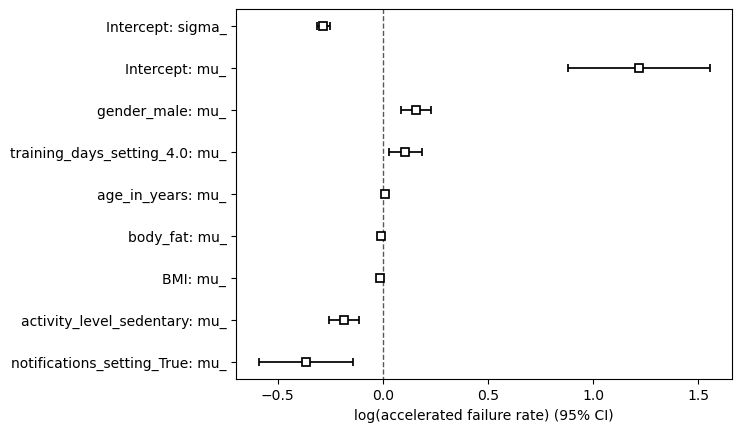

In [273]:
LogNormAFT2.plot()

In [274]:
X_test_8_2 = X_test_8.loc[:, X_train_8_2.columns]

Below there are predictions for the 5 users and their survival function prediction for all 8 weeks. 

In [275]:
LogNormAFT2.predict_survival_function(X_test_8_2.iloc[0:5, :])

2880  2179  2370  432   794 
1.00  0.93  0.80  0.86  0.93  0.88
2.00  0.70  0.47  0.57  0.72  0.60
3.00  0.49  0.27  0.36  0.51  0.39
4.00  0.35  0.16  0.23  0.36  0.26
5.00  0.24  0.10  0.15  0.26  0.17
6.00  0.18  0.06  0.10  0.19  0.12
7.00  0.13  0.04  0.07  0.14  0.08
8.00  0.09  0.03  0.05  0.10  0.06

<Axes: >

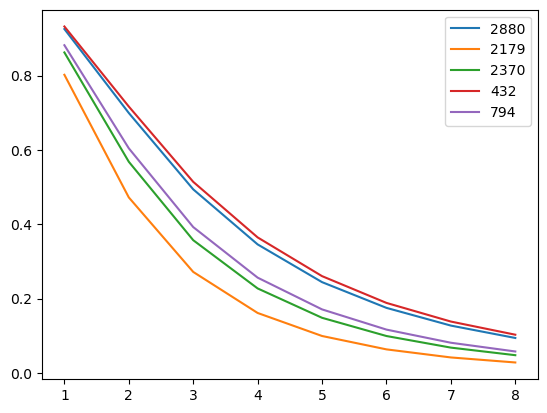

In [276]:
LogNormAFT2.predict_survival_function(X_test_8_2.iloc[0:5, :]).plot()

In [277]:
print("AIC is: {} \n Log likelihood score is: {}".format(LogNormAFT2.AIC_, LogNormAFT2.score(X_test_8_2)))


AIC is: 8455.691654218372 
 Log likelihood score is: -2.064654087019098


The values of ICI and E50 of calibration are close to  0, so they're good.

ICI =  0.01257148661659641
E50 =  0.013174002980649968


(<Axes: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 8 mortality'}, xlabel='Predicted probability of \nt ≤ 8 mortality', ylabel='Observed probability of \nt ≤ 8 mortality'>,
 0.01257148661659641,
 0.013174002980649968)

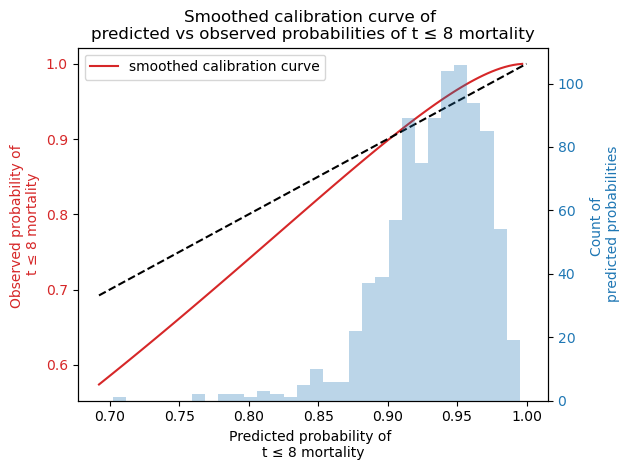

In [278]:
survival_probability_calibration(LogNormAFT2, X_test_8_2, t0=8)

Median predicted survival time (time of not dropping out) is almost 3 weeks. 

In [279]:
LogNormAFT2.predict_median(X_test_8_2).median()

2.4961944643142737

In [280]:
pred_8_w_2 = LogNormAFT2.predict_median(X_test_8_2)
mae(actual_8, pred_8_w_2)

1.9528368994676817

The MAE is a little bit smaller than in a Cox regression, so by this criterion LogNormal AFT model is a little bit better.

We can use our fitted model to see how the survival changes as we change the covariate values. Here, I have used the method to see how the survival varies among 0, 15, 30 and 45 percent of body fat for users compared to their baseline. The plots doesn't show high difference between groups and survival probability. But the lowest survival probability have the users with body fat about 45% and the highest survival probability have the users that have lower body fat.

<Axes: >

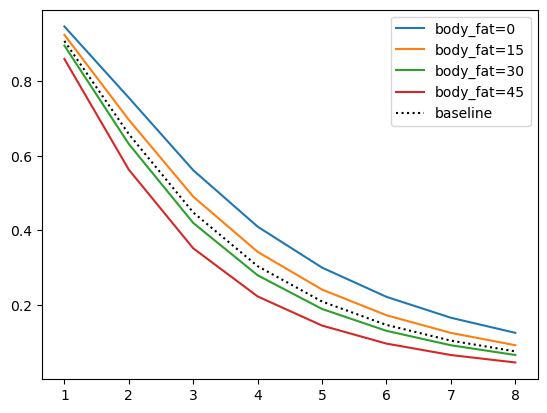

In [281]:
LogNormAFT2.plot_partial_effects_on_outcome('body_fat', range(0,60,15))

Below we can look which variables may have the biggest influence on model.

In [282]:
w8_2 = c_i_aic_comp_param(X_train_8_2, X_test_8_2, model = 'lognormal')

In [283]:
w8_2.sort_values(by='CI training set', ascending=False)

CI training set CI test set     AIC
body_fat                              0.56        0.54 8565.00
activity_level_sedentary              0.56        0.56 8555.64
age_in_years                          0.55        0.56 8577.45
BMI                                   0.54        0.54 8591.75
gender_male                           0.54        0.54 8594.35
training_days_setting_4.0             0.52        0.51 8611.27
notifications_setting_True            0.51        0.51 8609.12

### All users variables

Performing Kaplan-Meier estimates would give the same results as only with demographic data, so it will be omitted. 

#### Cox PH regression

Now, we'll be splitting data into train and test set and fitting the model to the training set.

In [284]:
df_users_8_weeks_all['cens'] = df_users_8_weeks_all['cens'].astype('int64')

df_users_8_weeks_all_dummies = pd.get_dummies(df_users_8_weeks_all, drop_first = True)


In [285]:
X_train_8_a, X_test_8_a = train_test_split(df_users_8_weeks_all_dummies, test_size = 0.3, random_state = 42)


In [293]:
print('Number of non censored useres in train set: {} (the event happened)'.format(X_train_8_a['cens'].sum()), '\n',
      'Number of censored users in train set: {} (the event did not happened)'.format(len(X_train_8_a) - X_train_8_a['cens'].sum()))

Number of non censored useres in train set: 2081 (the event happened) 
 Number of censored users in train set: 42 (the event did not happened)


In [294]:
print('Number of non censored useres in test set: {} (the event happened)'.format(X_test_8_a['cens'].sum()), '\n',
      'Number of censored users in test set: {} (the event did not happened)'.format(len(X_test_8_a) - X_test_8_a['cens'].sum()))

Number of non censored useres in test set: 893 (the event happened) 
 Number of censored users in test set: 18 (the event did not happened)


In [295]:
# cph_all_8 = cox_model(X_train_8_a, summary = True)

Let's check the assumptions.

In [296]:
# cph_all_8.check_assumptions(X_train_8_a, p_value_threshold=0.05)

The output (hidden) of the checked assumptions for the training set Cox model tells us that 7 variables should be stratified, and 4 of them should also be binned before stratifying. 
There was also another approach tested - when all of the data was fitted to the model, almost all of the added columns should be binned and stratified, so everything will be done on full dataset from now on. 

In [297]:
df_users_8_weeks_all_dummies_strata = df_users_8_weeks_all_dummies.copy()
df_users_8_weeks_all_dummies_strata['total_sessions_strata'] = pd.cut(df_users_8_weeks_all_dummies_strata['total_sessions_users2'], 
                                                                      np.arange(0, 
                                                                                max(df_users_8_weeks_all_dummies_strata['total_sessions_users2']), 10))

df_users_8_weeks_all_dummies_strata['total_reps_strata'] = pd.cut(df_users_8_weeks_all_dummies_strata['total_reps_users2'], 
                                                                      np.arange(0, 
                                                                                max(df_users_8_weeks_all_dummies_strata['total_reps_users2']), 1000))

df_users_8_weeks_all_dummies_strata['total_exe_strata'] = pd.cut(df_users_8_weeks_all_dummies_strata['exercises_per_user'], 
                                                                      np.arange(0, 
                                                                                max(df_users_8_weeks_all_dummies_strata['exercises_per_user']), 6900))

df_users_8_weeks_all_dummies_strata['total_exe_without_rest_strata'] = pd.cut(df_users_8_weeks_all_dummies_strata['exercises_without_rest_per_user'], 
                                                                      np.arange(0, 
                                                                                max(df_users_8_weeks_all_dummies_strata['exercises_without_rest_per_user']), 4000))

df_users_8_weeks_all_dummies_strata['total_time_strata'] = pd.cut(df_users_8_weeks_all_dummies_strata['total_time_users2'], 
                                                                      np.arange(0, 
                                                                                max(df_users_8_weeks_all_dummies_strata['total_time_users2']), 4000))


In [298]:
df_users_8_weeks_all_dummies_strata = df_users_8_weeks_all_dummies_strata.drop(['total_sessions_users2', 'total_reps_users2', 'exercises_per_user','exercises_without_rest_per_user', 'total_time_users2'], axis = 1)

In [299]:
df_users_8_weeks_all_dummies_strata = df_users_8_weeks_all_dummies_strata.dropna()

In [300]:
cph_all_8 = cox_model(df_users_8_weeks_all_dummies, summary = True)

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

In [301]:
cph_all_8.fit(df_users_8_weeks_all_dummies_strata, duration_col = 'surv_time', 
              event_col = 'cens', strata = ['total_reps_strata', 'total_sessions_strata',
                                            'total_exe_strata', 'total_exe_without_rest_strata',
                                            'goal_gain', 'body_type_strong',
                                            'total_time_strata', 'training_days_setting_5.0'])

NameError: name 'cph_all_8' is not defined

In [302]:
# cph_all_8.check_assumptions(df_users_8_weeks_all_dummies, p_value_threshold=0.05)

In [303]:
cph_all_8.print_summary(decimals = 3)

NameError: name 'cph_all_8' is not defined

P-value parameters are significant only for training_days_setting for days  6 and 7, body_fat,  activity_level_sedentary, total calories burned in all sessions.

As a Hazard Ratio (HR) we can take exponential value of coefficient (exp(coef)). 

The p-value for total calories is <0.0005 and HR (Hazard Ratio) is 0.997, so there is almost no effect.

The p-value for activity level sedentary is 0.034 and HR is 0.894, indicating a strong relationship between sedentary activity level and decreased risk of dropping out. Person with sedentary activity level has 11% lower risk of dropping out. 

The p-value for body fat is 0.022 and HR is 0.990, indicating a strong relationship between body fat and decreased risk of dropping out. By one unit more, the user has 1% lower risk of dropping out. 

The p-value for training days setting at 6 days a week is 0.005 and HR is 1.545, indicating a strong relationship between setting training days at 5 days a week and increased risk of dropping out. Setting training days equal to 5 a week increases hazard by factor 1.545 (or 55%), so those users have higher chances of dropping out.

The p-value for training days setting at 7 days a week is 0.001 and HR is 1.666, indicating a strong relationship between setting training days at 7 days a week and increased risk of dropping out. Setting training days equal to 7 a week increases hazard by factor 1.666 (or 67%), so those users have higher chances of dropping out.

Below there is a plot that shows that there are significant differences.

In [304]:
cph_all_8.plot(hazard_ratios=True)

NameError: name 'cph_all_8' is not defined

Below there is a table with prediction values for survival function (in each week) for 5 users.

In [305]:
cph_all_8.predict_survival_function(df_users_8_weeks_all_dummies_strata.iloc[0:5, :])

NameError: name 'cph_all_8' is not defined

In [306]:
cph_all_8.predict_survival_function(df_users_8_weeks_all_dummies_strata.iloc[0:5, :]).plot()

NameError: name 'cph_all_8' is not defined

We can see that user 3, 4, 0 and 2 has biggest chances to not drop out at 8 weeks and user 1 has the biggest chances to drop out at 8 weeks.

Below there are values of partial AIC and log-likelighood. The lower AIC is, the better the model is. Log-likelihood - we want to maximize it (the bigger the better). 

In [307]:
print("Partial AIC is: {} \n Log likelihood score is: {}".format(cph_all_8.AIC_partial_, cph_all_8.score(df_users_8_weeks_all_dummies_strata)))


NameError: name 'cph_all_8' is not defined

Below there is a calibration curve with ICI and E50.

In [308]:
survival_probability_calibration(cph_all_8, df_users_8_weeks_all_dummies_strata, t0=8)

NameError: name 'cph_all_8' is not defined

Below there is a prediction of median lifetime for all users.

In [309]:
cph_all_8.predict_median(df_users_8_weeks_all_dummies_strata).median()

NameError: name 'cph_all_8' is not defined

Now, it's time to calculate MAE. 

In [310]:
pred_cph_all_8 = cph_all_8.predict_median(df_users_8_weeks_all_dummies_strata)

pred_cph_all_8 = pd.DataFrame(pred_cph_all_8)

NameError: name 'cph_all_8' is not defined

In [311]:
value_8_a = pred_cph_all_8[0.5].quantile(0.5)
pred_cph_all_8 = pred_cph_all_8.replace(np.inf, value_8_a)

NameError: name 'pred_cph_all_8' is not defined

In [312]:
mae(df_users_8_weeks_all_dummies_strata['cens'], pred_cph_all_8)

NameError: name 'pred_cph_all_8' is not defined

The MAE value is almost 2.5, so the error is pretty big for the number of weeks taken into consideration.

#### Parametric models

Now, let's go to the parametric models.

In [313]:
parametric_surv(X_train_8_a)

AIC
Weibull   8844.46
Lognormal 8670.93
LogLog    8901.28

Again, the best value for this data is for LogNormal Fitter.

In [314]:
WeibullAFT_8 = LogNormalAFTFitter()
WeibullAFT_8.fit(X_train_8_a, duration_col = 'surv_time', event_col = 'cens')
WeibullAFT_8.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 42 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 2081
           log-likelihood = -3714.187
         time fit was run = 2023-05-11 08:04:20 UTC

---
                                         coef  exp(coef)    se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                                
mu_    BMI                              0.008      1.008       0.033           -0.057            0.073                0.944                1.076
       activity_level_sedentary        -0.106      0.899       0.029           -0.164           -0.048                0.849                0.953
       activity_level_very active       0.036      1.037       0.045           -0.053            0.125                0.948                1.133
       body_fat                        -0.001      0.999       0.002           -0.006            0.003                0.994                1.003
       body_type_strong                 0.235      1.266         NaN              NaN              NaN                  NaN                  NaN
       body_type_thin                   0.147      1.159  962489.143     -1886443.908      1886444.203                0.000                  inf
       cluster_1                        0.273      1.313 1130880.532     -2216484.841      2216485.386                0.000                  inf
       cluster_10                       0.013      1.013         NaN              NaN              NaN                  NaN                  NaN
       cluster_11                      -0.219      0.803  139852.086      -274105.270       274104.832                0.000                  inf
       cluster_2                        0.093      1.097 1195250.416     -2342647.675      2342647.860                0.000                  inf
       cluster_3                        0.328      1.389  915088.930     -1793541.017      1793541.674                0.000                  inf
       cluster_4                        0.111      1.117 1118985.677     -2193171.516      2193171.738                0.000                  inf
       cluster_5                       -0.085      0.918 1425378.172     -2793689.966      2793689.796                0.000                  inf
       cluster_6                        0.156      1.168  969280.301     -1899754.325      1899754.636                0.000                  inf
       cluster_7                        0.269      1.308         NaN              NaN              NaN                  NaN                  NaN
       cluster_8                       -0.119      0.888  610655.306     -1196862.525      1196862.288                0.000                  inf
       cluster_9                        0.404      1.498  502028.452      -983957.281       983958.090                0.000                  inf
       exercises_per_user              -0.000      1.000       0.000           -0.000           -0.000                1.000                1.000
       exercises_without_rest_per_user  0.000      1.000       0.000            0.000            0.000                1.000                1.000
       gender_male                      0.246      1.279  139852.086      -274104.805       274105.297                0.000                  inf
       goal_gain                        0.004      1.004       0.038           -0.072            0.079                0.931                1.082
       goal_lose                       -0.018      0.982       0.041           -0.099            0.063                0.905                1.065
       height                           0.003      1.003       0.010           -0.016            0.022                0.984                1.022
       newsletter_subscription_True    

Now, variables statistically significant are activity level sedentary, gender_male, exercises_per_user, exercises_without_rest_per_user, total_reps, total_sessions, training_days_setting 5, 6 and 7.

Exercises_per_user, total_reps exercises_without_rest_per_user, total_reps and total_sessions are significant, but they have no effect.

Activity level sedentary has negative coefficient. This means that by selecting sedentary activity level, mean/median survival time changes by exp(-0.104) = 0.901 - 10% decrease in mean/median survival time.

Gender male has positive coefficient. This means that by selecting male gender, mean/median survival time changes by exp(0.079) = 1.062 - 6% increase in mean/median survival time.

Training days set at 5 days a week has negative coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(-0.152) = 0.859 - 14% decrease in mean/median survival time.

Training days set at 6 days a week has negative coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(-0.255) = 0.775 - 22% decrease in mean/median survival time.

Training days set at 7 days a week has negative coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(-0.307) = 0.736 - 26% decrease in mean/median survival time.

<AxesSubplot: xlabel='log(accelerated failure rate) (95% CI)'>

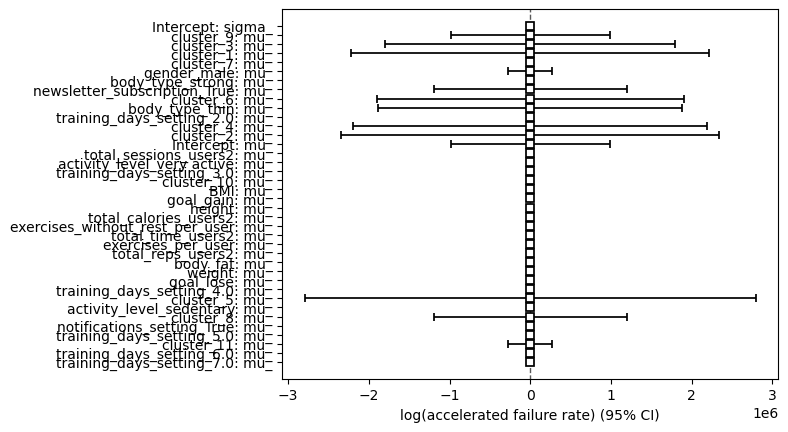

In [315]:
WeibullAFT_8.plot()

Below there are predictions for the 5 users and their survival function prediction for all 8 weeks. 

In [316]:
WeibullAFT_8.predict_survival_function(X_test_8_a.iloc[0:5, :])

2880  2179  2370  432   794 
1.00  0.88  0.90  0.96  1.00  0.87
2.00  0.49  0.54  0.73  1.00  0.47
3.00  0.23  0.27  0.46  1.00  0.22
4.00  0.11  0.14  0.28  0.99  0.10
5.00  0.05  0.07  0.16  0.97  0.05
6.00  0.03  0.04  0.10  0.95  0.02
7.00  0.01  0.02  0.06  0.91  0.01
8.00  0.01  0.01  0.04  0.87  0.01

<AxesSubplot: >

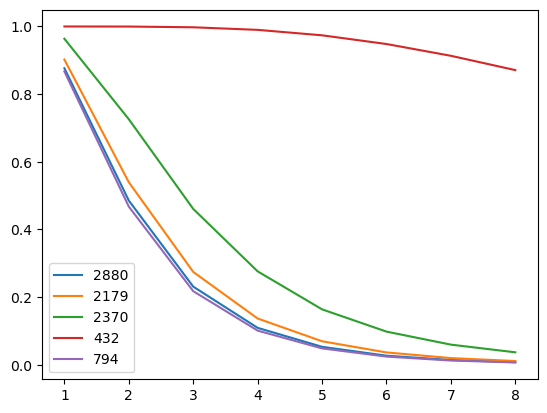

In [317]:
WeibullAFT_8.predict_survival_function(X_test_8_a.iloc[0:5, :]).plot()

In [318]:
print("AIC is: {} \n Log likelihood score is: {}".format(WeibullAFT_8.AIC_, WeibullAFT_8.score(X_test_8_a)))


AIC is: 7504.374004312037 
 Log likelihood score is: -1.817033517127976


The values of ICI and E50 of calibration are close to  0, so they're good.

ICI =  0.09398386094944147
E50 =  0.04698123956934308


(<AxesSubplot: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 8 mortality'}, xlabel='Predicted probability of \nt ≤ 8 mortality', ylabel='Observed probability of \nt ≤ 8 mortality'>,
 0.09398386094944147,
 0.04698123956934308)

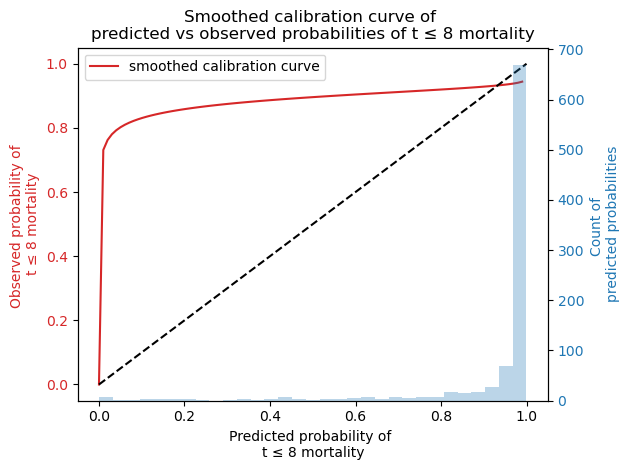

In [319]:
survival_probability_calibration(WeibullAFT_8, X_test_8_a, t0=8)

Median predicted survival time (time of not dropping out) is a little bit over 2 weeks. 

In [320]:
WeibullAFT_8.predict_median(X_test_8_a).median()

2.1254436293083483

In [321]:
pred_8_w_a = WeibullAFT_8.predict_median(X_test_8_a)
mae(actual_8, pred_8_w_a)

1.981261474413361

The MAE is smaller than in a Cox regression, so by this criterion LogNormal AFT model is a little bit better.

We can use our fitted model to see how the survival changes as we change the covariate values. Here, I have used the method to see how the survival varies among 0, 15, 30 and 45 percent of body fat for users compared to their baseline. The plots doesn't show almost difference between groups and survival probability.

<AxesSubplot: >

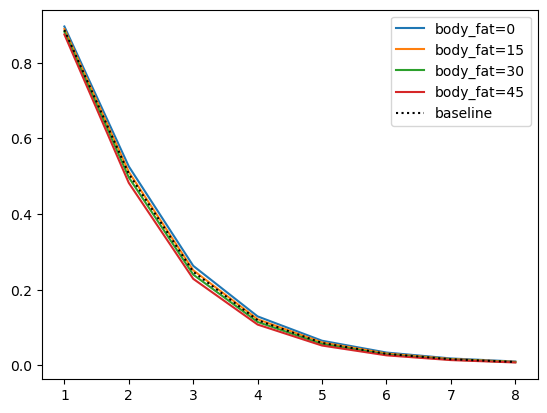

In [322]:
WeibullAFT_8.plot_partial_effects_on_outcome('body_fat', range(0,60,15))

Below we can look which variables may have the biggest influence on model.

In [323]:
w8_a = c_i_aic_comp_param(X_train_8_a, X_test_8_a, model = 'Weibull')

In [324]:
w8_a.sort_values(by='CI training set', ascending=False)

CI training set CI test set     AIC
total_sessions_users2                      0.90        0.90 7731.86
total_reps_users2                          0.89        0.89 7929.76
total_time_users2                          0.89        0.90 7871.14
total_calories_users2                      0.88        0.89 7949.78
exercises_per_user                         0.88        0.88 8121.81
exercises_without_rest_per_user            0.88        0.88 8140.75
activity_level_sedentary                   0.56        0.55 8762.91
body_fat                                   0.56        0.55 8788.20
goal_lose                                  0.55        0.54 8798.67
gender_male                                0.54        0.52 8804.58
BMI                                        0.54        0.55 8803.49
goal_gain                                  0.54        0.53 8820.83
height                                     0.54        0.53 8828.29
cluster_2                                  0.53        0.51 8831.66
activity_level_very active                 0.52        0.51 8828.63
cluster_1                                  0.51        0.50 8833.91
training_days_setting_4.0                  0.51        0.52 8842.45
cluster_4                                  0.51        0.50 8840.35
body_type_strong                           0.51        0.51 8842.07
weight                                     0.51        0.52 8840.09
cluster_5                                  0.51        0.51 8843.27
training_days_setting_3.0                  0.51        0.52 8846.15
notifications_setting_True                 0.51        0.51 8835.09
training_days_setting_7.0                  0.51        0.51 8839.95
training_days_setting_5.0                  0.51        0.52 8846.26
cluster_3                                  0.51        0.50 8842.18
cluster_7                                  0.51        0.50 8845.29
cluster_6                                  0.51        0.51 8841.04
body_type_thin                             0.50        0.49 8846.44
cluster_8                                  0.50        0.50 8845.37
training_days_setting_2.0                  0.50        0.50 8845.91
cluster_9                                  0.50        0.51 8843.71
cluster_10                                 0.50        0.50 8841.18
cluster_11                                 0.50        0.50 8841.02
training_days_setting_6.0                  0.50        0.50 8845.94
newsletter_subscription_True               0.50        0.49 8846.46

## Follow-up: 8 weeks - second approach on censoring

At 8 weeks after beginning of the usage of the app only 511 users were censored.

### Users demographics

#### Kaplan-Meier Estimates

##### All

Median survival time is 2.0 
 Survival function takes estimates for each time point 
           Kaplan Meier Estimate
timeline                       
0.00                       1.00
1.00                       0.66
2.00                       0.48
3.00                       0.37
4.00                       0.29
5.00                       0.23
6.00                       0.19
7.00                       0.17
8.00                       0.17


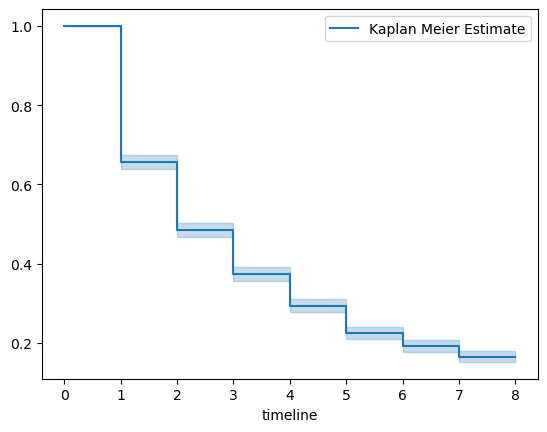

In [325]:
kmf_8_all2 = km_simple(df_users_8_weeks_demo2)

The probability that the user didn't stop working out in a first week is 0.66, in the second week it's 0.48, third - 0.37, fourth - 0.29, fifth - 0.23, sixth - 0.19, seventh - 0.17 and eighth - 0.17.

##### By gender

Here, we will compare estimators of gender groups.

Median survival time for female is 2.0
Survival function for female estimates: 
           female
timeline        
0.00        1.00
1.00        0.61
2.00        0.43
3.00        0.31
4.00        0.23
5.00        0.17
6.00        0.14
7.00        0.12
8.00        0.12
Median survival time for male is 3.0
Survival function for male estimates: 
           male
timeline      
0.00      1.00
1.00      0.68
2.00      0.52
3.00      0.41
4.00      0.33
5.00      0.26
6.00      0.22
7.00      0.19
8.00      0.19


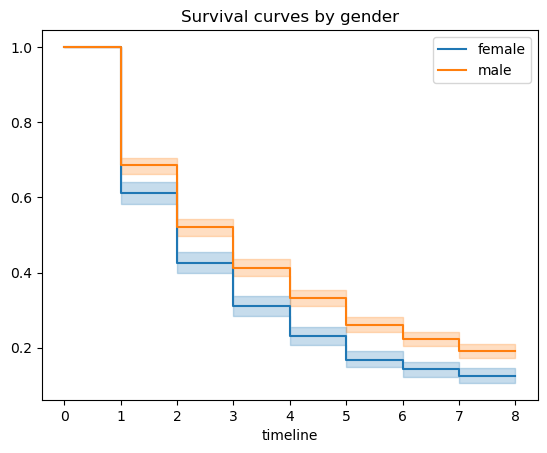

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          39.18 <0.005     31.27

In [326]:
kaplan_meier_by_cat(df_users_8_weeks_demo2, 'gender')

km_logrank_test(df_users_8_weeks_demo2, 'gender')

By logrank test, it is seen that there are differences between groups in survival curves in gender. For female median survival times is 2 weeks, and for male it is 3 weeks.

##### By activity level

Here, we will compare estimators of activity level groups (active, very active, sedentary).

Median survival time for active is 3.0
Survival function for active estimates: 
           active
timeline        
0.00        1.00
1.00        0.69
2.00        0.53
3.00        0.42
4.00        0.34
5.00        0.26
6.00        0.23
7.00        0.19
8.00        0.19
Median survival time for sedentary is 2.0
Survival function for sedentary estimates: 
           sedentary
timeline           
0.00           1.00
1.00           0.57
2.00           0.37
3.00           0.26
4.00           0.19
5.00           0.13
6.00           0.11
7.00           0.09
8.00           0.09
Median survival time for very active is 3.0
Survival function for very active estimates: 
           very active
timeline             
0.00             1.00
1.00             0.75
2.00             0.59
3.00             0.48
4.00             0.40
5.00             0.33
6.00             0.29
7.00             0.25
8.00             0.25


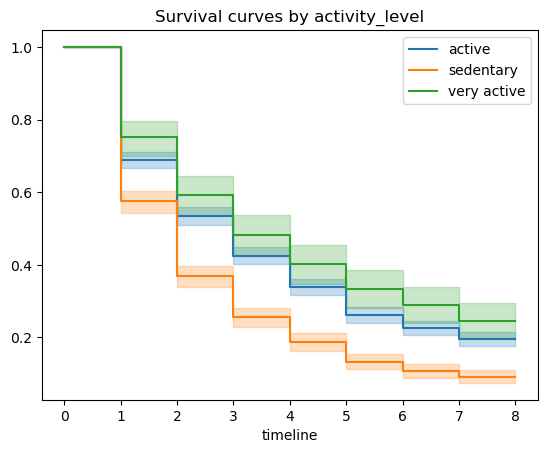

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                       test_statistic      p  -log2(p)
active    sedentary             92.91 <0.005     70.63
          very active            5.83   0.02      5.99
sedentary very active           66.10 <0.005     51.05

In [327]:
kaplan_meier_by_cat(df_users_8_weeks_demo2, 'activity_level')

km_logrank_test(df_users_8_weeks_demo2, 'activity_level')

There are significant differences between survival curves of activity level groups. In all of the cases p-value is less than 0.05. 

For sedentary group, median survival time is 2 weeks, for active and very active group the median of survival time is 3 weeks.

##### By goal groups

Here, we will compare estimators of goal groups (gain, lose, antiaging).

Median survival time for lose is 2.0
Survival function for lose estimates: 
           lose
timeline      
0.00      1.00
1.00      0.60
2.00      0.41
3.00      0.30
4.00      0.22
5.00      0.17
6.00      0.14
7.00      0.12
8.00      0.12
Median survival time for gain is 3.0
Survival function for gain estimates: 
           gain
timeline      
0.00      1.00
1.00      0.69
2.00      0.53
3.00      0.42
4.00      0.34
5.00      0.27
6.00      0.23
7.00      0.20
8.00      0.20
Median survival time for antiaging is 3.0
Survival function for antiaging estimates: 
           antiaging
timeline           
0.00           1.00
1.00           0.70
2.00           0.54
3.00           0.42
4.00           0.33
5.00           0.24
6.00           0.21
7.00           0.18
8.00           0.18


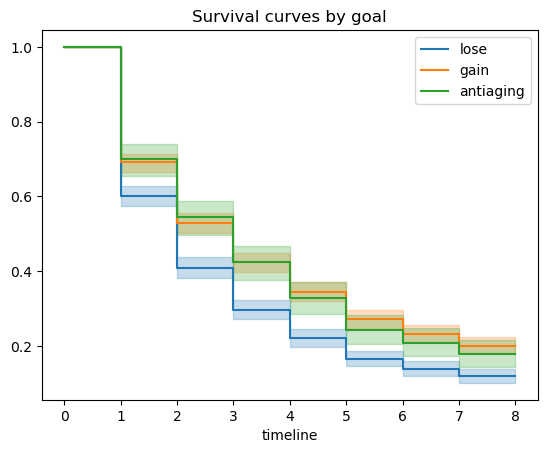

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                test_statistic      p  -log2(p)
antiaging gain            0.44   0.51      0.98
          lose           21.32 <0.005     17.97
gain      lose           51.95 <0.005     40.68

In [328]:
kaplan_meier_by_cat(df_users_8_weeks_demo2, 'goal')

km_logrank_test(df_users_8_weeks_demo2, 'goal')

There are differences between survival curves of antiaging and lose groups and gain and lose groups. Groups antiaging and gain have not difference of survival curves (p = 0.51).

For gain and antiaging group, survival time median is 3 weeks. For lose group, survival time median is 2 weeks.

##### By body type group

Here, we will compare estimators of body type groups (thin, mid, strong).

Median survival time for mid is 3.0
Survival function for mid estimates: 
           mid
timeline     
0.00     1.00
1.00     0.67
2.00     0.50
3.00     0.39
4.00     0.30
5.00     0.24
6.00     0.20
7.00     0.17
8.00     0.17
Median survival time for thin is 2.0
Survival function for thin estimates: 
           thin
timeline      
0.00      1.00
1.00      0.65
2.00      0.48
3.00      0.37
4.00      0.30
5.00      0.22
6.00      0.19
7.00      0.17
8.00      0.17
Median survival time for strong is 2.0
Survival function for strong estimates: 
           strong
timeline        
0.00        1.00
1.00        0.58
2.00        0.41
3.00        0.30
4.00        0.25
5.00        0.18
6.00        0.15
7.00        0.13
8.00        0.13


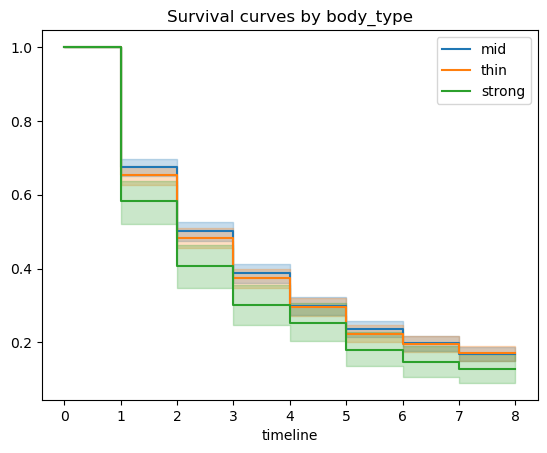

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
               test_statistic    p  -log2(p)
mid    strong            7.30 0.01      7.18
       thin              0.21 0.65      0.62
strong thin              5.59 0.02      5.79

In [329]:
kaplan_meier_by_cat(df_users_8_weeks_demo2, 'body_type')

km_logrank_test(df_users_8_weeks_demo2, 'body_type')

There is statistically significant difference between groups mid and strong (p = 0.01) and strong and thin (p = 0.02). 

Median time for mid group is 3 weeks and for strong and thin is 2 weeks.

##### By newsletter subscription group

Here, we will compare estimators of newsletter subscription (True, False).

Median survival time for False is 2.0
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.64
2.00       0.47
3.00       0.36
4.00       0.29
5.00       0.22
6.00       0.19
7.00       0.17
8.00       0.17
Median survival time for True is 2.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.66
2.00      0.49
3.00      0.38
4.00      0.29
5.00      0.23
6.00      0.19
7.00      0.16
8.00      0.16


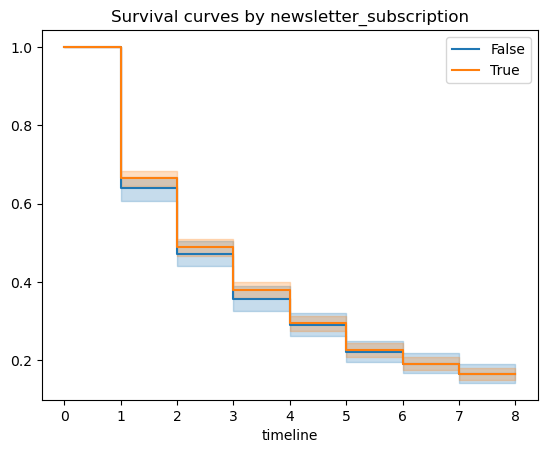

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.26 0.61      0.71

In [330]:
kaplan_meier_by_cat(df_users_8_weeks_demo2, 'newsletter_subscription')

km_logrank_test(df_users_8_weeks_demo2, 'newsletter_subscription')

There is no statistical difference between groups (p = 0.61).

##### By notification settings group

Here, we will compare estimators of notification setting (True, False).

Median survival time for True is 2.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.65
2.00      0.48
3.00      0.37
4.00      0.29
5.00      0.22
6.00      0.19
7.00      0.16
8.00      0.16
Median survival time for False is 5.0
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.80
2.00       0.73
3.00       0.64
4.00       0.56
5.00       0.39
6.00       0.33
7.00       0.28
8.00       0.28


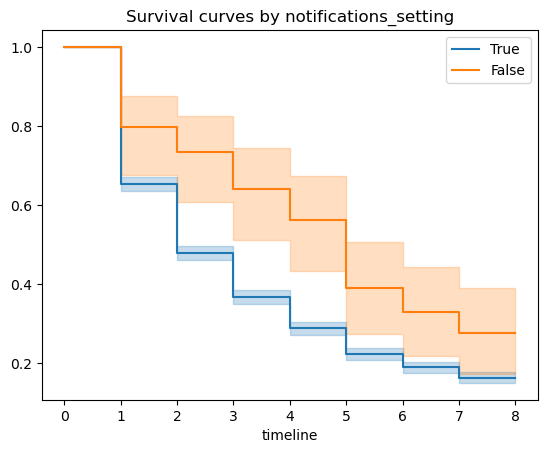

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          11.20 <0.005     10.25

In [331]:
kaplan_meier_by_cat(df_users_8_weeks_demo2, 'notifications_setting')

km_logrank_test(df_users_8_weeks_demo2, 'notifications_setting')

There are differences between survival curves in newsletter subscription (p < 0.005).

For true group, median survival time is 2 weeks, for false group median survival time is 5 weeks.

##### By training days setting group

Here, we will compare estimators of training days setting.

Median survival time for 3.0 is 3.0
Survival function for 3.0 estimates: 
           3.00
timeline      
0.00      1.00
1.00      0.68
2.00      0.50
3.00      0.39
4.00      0.30
5.00      0.23
6.00      0.20
7.00      0.17
8.00      0.17
Median survival time for 4.0 is 3.0
Survival function for 4.0 estimates: 
           4.00
timeline      
0.00      1.00
1.00      0.70
2.00      0.53
3.00      0.43
4.00      0.35
5.00      0.27
6.00      0.22
7.00      0.20
8.00      0.20
Median survival time for 5.0 is 2.0
Survival function for 5.0 estimates: 
           5.00
timeline      
0.00      1.00
1.00      0.61
2.00      0.43
3.00      0.33
4.00      0.26
5.00      0.23
6.00      0.19
7.00      0.15
8.00      0.15
Median survival time for 6.0 is 2.0
Survival function for 6.0 estimates: 
           6.00
timeline      
0.00      1.00
1.00      0.58
2.00      0.45
3.00      0.29
4.00      0.24
5.00      0.20
6.00      0.18
7.00      0.15
8.00      0.15
Median survival time for 2.0 is 3.0
Surv

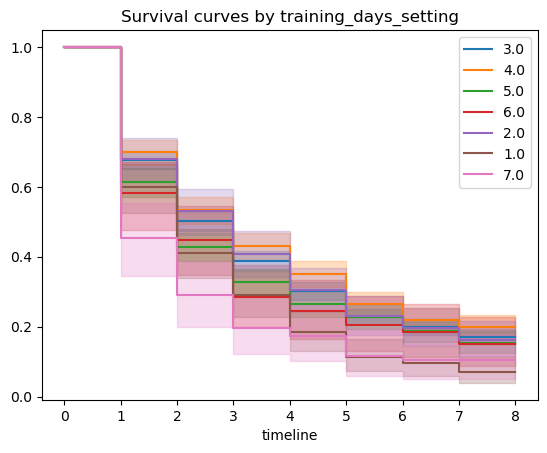

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
           test_statistic      p  -log2(p)
1.00 2.00           10.45 <0.005      9.67
     3.00           15.45 <0.005     13.53
     4.00           23.35 <0.005     19.50
     5.00            5.75   0.02      5.92
     6.00            1.85   0.17      2.52
     7.00            0.73   0.39      1.35
2.00 3.00            0.01   0.93      0.11
     4.00            1.09   0.30      1.75
     5.00            1.47   0.22      2.15
     6.00            1.27   0.26      1.95
     7.00           10.12 <0.005      9.41
3.00 4.00            3.25   0.07      3.81
     5.00            3.51   0.06      4.03
     6.00            1.65   0.20      2.33
     7.00           13.42 <0.005     11.97
4.00 5.00            9.31 <0.005      8.78
     6.00            4.06   0.04      4.51
     7.00           18.08 <0.005     15.53
5.00 6.00            0.09   0.77      0.38
     7.00            6.48   0.01      6.52
6.00 7.00            2.99   0.08      3.58

In [332]:
kaplan_meier_by_cat(df_users_8_weeks_demo2, 'training_days_setting')

km_logrank_test(df_users_8_weeks_demo2, 'training_days_setting')

The are differences between survival curves for days 1 and 2, 1 and 3, 1 and 4, 1 and 5, 2 and 7, 3 and 7, 4 and 5, 4 and 6, 4 and 7, 5 and 7.

Median survival time for each training days setting is:
* 3 weeks for training days setting 2,3,4,
* 2 weeks for training days setting 1,5,6,
* 1 week for training days setting 7.

##### By clusters for gender, body_type, newsletter_subscription and BMI

Here, the best clustering method was hierarchical cluseting with average linkage and 2 clusters.

Median survival time for 9 is 2.0
Survival function for 9 estimates: 
             9
timeline     
0.00     1.00
1.00     0.60
2.00     0.43
3.00     0.29
4.00     0.23
5.00     0.17
6.00     0.14
7.00     0.12
8.00     0.12
Median survival time for 5 is 3.0
Survival function for 5 estimates: 
             5
timeline     
0.00     1.00
1.00     0.69
2.00     0.51
3.00     0.43
4.00     0.33
5.00     0.25
6.00     0.22
7.00     0.19
8.00     0.19
Median survival time for 4 is 2.0
Survival function for 4 estimates: 
             4
timeline     
0.00     1.00
1.00     0.62
2.00     0.45
3.00     0.33
4.00     0.26
5.00     0.19
6.00     0.16
7.00     0.15
8.00     0.15
Median survival time for 2 is 3.0
Survival function for 2 estimates: 
             2
timeline     
0.00     1.00
1.00     0.71
2.00     0.55
3.00     0.43
4.00     0.34
5.00     0.28
6.00     0.24
7.00     0.20
8.00     0.20
Median survival time for 1 is 2.0
Survival function for 1 estimates: 
             1
timeline     
0

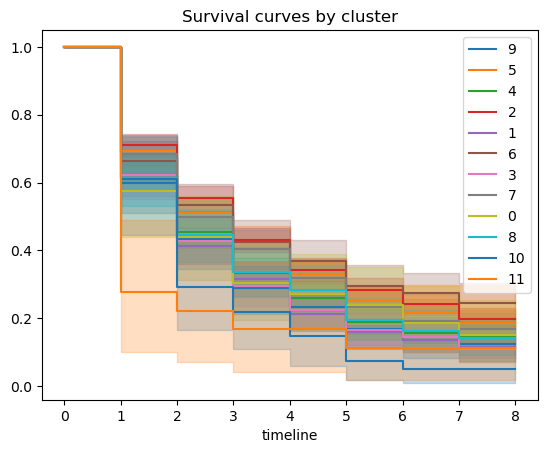

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
       test_statistic      p  -log2(p)
0  1             0.31   0.58      0.79
   2             2.54   0.11      3.17
   3             0.29   0.59      0.77
   4             0.00   0.98      0.03
   5             1.46   0.23      2.14
   6             2.93   0.09      3.53
   7             0.70   0.40      1.31
   8             0.00   0.98      0.03
   9             0.22   0.64      0.64
   10            2.45   0.12      3.09
   11            1.76   0.18      2.44
1  2            21.05 <0.005     17.77
   3             0.00   0.96      0.06
   4             1.43   0.23      2.10
   5            12.16 <0.005     11.00
   6            15.08 <0.005     13.25
   7             6.71   0.01      6.71
   8             0.77   0.38      1.39
   9             0.01   0.93      0.10
   10            2.02   0.16      2.69
   11            2.00   0.16      2.67
2  3            14.73 <0.005     12.97
   4            12.83 <0.005     11.52
   5             0.67   0.41      1.27
   6             0.47   0.49      1.02
   7             1.87   0.17      2.54
   8             6.11   0.01      6.21
   9             9.45 <0.005      8.89
   10           12.29 <0.005     11.10
   11            6.97   0.01      6.92
3  4             0.96   0.33      1.61
   5             8.86 <0.005      8.42
   6            12.04 <0.005     10.90
   7             5.09   0.02      5.38
   8             0.59   0.44      1.18
   9             0.00   0.97      0.05
   10            2.11   0.15      2.77
   11            1.88   0.17      2.55
4  5             5.95   0.01      6.09
   6             9.42 <0.005      8.86
   7             2.44   0.12      3.08
   8             0.00   0.98      0.02
   9             0.53   0.47      1.10
   10            3.91   0.05      4.38
   11            2.92   0.09      3.51
5  6             1.42   0.23      2.10
   7             0.35   0.55      0.85
   8             3.16   0.08      3.72
   9             5.81   0.02      5.97
   10            9.21 <0.005      8.70
   11            5.77   0.02      5.94
6  7             2.52   0.11      3.15
   8             5.91   0.02      6.05
   9             8.31 <0.005      7.99
   10           10.82 <0.005      9.96
   11            6.18   0.01      6.27
7  8             1.46   0.23      2.14
   9             3.37   0.07      3.92
   10            7.39   0.01      7.25
   11            4.83   0.03      5.16
8  9             0.36   0.55      0.87
   10            3.36   0.07      3.91
   11            2.41   0.12      3.05
9  10            1.95   0.16      2.62
   11            1.74   0.19      2.42
10 11            0.29   0.59      0.76

In [333]:
kaplan_meier_by_cat(df_users_8_weeks_demo2, 'cluster')

km_logrank_test(df_users_8_weeks_demo2, 'cluster')

There are differences between survival curves for clusters 1 and 2, 1 and 5, 1 and 6, 1 and 7, 2 and 3, 2 and 4, 2 and 8, 2 and 9, 2 and 10, 2 and 11, 3 and 5, 3 and 6, 3 and 7, 4 and 5, 4 and 6, 4 and 10, 5 and 9, 5 and 10, 5 and 11, 6 and 8, 6 and 9, 6 and 10, 6 and 11, 7 and 10, 7 and 11.

Median survival times are:
* 1 week for cluster 11,
* 2 weeks for cluster 9, 4, 1, 3, 7, 0, 8, 10,
* 3 weeks for cluster 5, 2, 6.

#### Cox PH regression

For proportional hazards, we need to create dummies variables and split the data into training and testing subsets.

In [286]:
df_users_8_weeks_demo2_cph = df_users_8_weeks_demo2.copy()
df_users_8_weeks_demo2_cph.drop(['cluster'], axis = 1, inplace = True)

df_users_8_weeks_demo2_cph['cens'] = df_users_8_weeks_demo2_cph['cens'].astype('int64')

df_users_8_weeks_demo_dummies2 = pd.get_dummies(df_users_8_weeks_demo2_cph, drop_first = True)

df_users_8_weeks_demo2_cph['cens'] = df_users_8_weeks_demo2_cph['cens'].astype('category')

df_users_8_weeks_demo_dummies2.head()

X_train_8_2, X_test_8_2 = train_test_split(df_users_8_weeks_demo_dummies2, test_size = 0.3, random_state = 42)

actual_8_2 = X_test_8_2['surv_time'].astype('int64')

Here, we check how many users we have in both of the sets and censoring.

In [287]:
print('Number of non censored useres in train set: {} (the event happened)'.format(X_train_8_2['cens'].sum()), '\n',
      'Number of censored users in train set: {} (the event did not happened)'.format(len(X_train_8_2) - X_train_8_2['cens'].sum()))

Number of non censored useres in train set: 1781 (the event happened) 
 Number of censored users in train set: 342 (the event did not happened)


In [288]:
print('Number of non censored useres in test set: {} (the event happened)'.format(X_test_8_2['cens'].sum()), '\n',
      'Number of censored users in test set: {} (the event did not happened)'.format(len(X_test_8_2) - X_test_8_2['cens'].sum()))

Number of non censored useres in test set: 742 (the event happened) 
 Number of censored users in test set: 169 (the event did not happened)


In [337]:
cph_8_demo2 = cox_model(X_train_8_2, summary = False)

cph_8_demo2.check_assumptions(X_train_8_2, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 2123 total observations, 346 right-censored observations>
         test_name = proportional_hazard_test

---
                                   test_statistic    p  -log2(p)
BMI                          km              0.05 0.82      0.28
                             rank            0.04 0.85      0.24
activity_level_sedentary     km              0.81 0.37      1.44
                             rank            0.25 0.62      0.69
activity_level_very active   km              2.94 0.09      3.53
                             rank            2.88 0.09      3.48
body_fat                     km              0.40 0.53      0.93
                             rank            0.23 0.63      0.66
body_type_strong             km              3.82 0.05      4.31
                             rank            4.07 0.04      4.52
body_type_thin               km              1.72 0.19      2.40
                             rank            2.88 0.09      3.48
gender_male                  km              0.11 0.74      0.44
                             rank            0.00 0.97      0.04
goal_gain                    km              1.58 0.21      2.26
                             rank            0.94 0.33      1.59
goal_lose                    km              3.98 0.05      4.44
                             rank            2.45 0.12      3.09
height                       km              0.02 0.90      0.15
                             rank            0.01 0.92      0.12
newsletter_subscription_True km              1.16 0.28      1.83
                             rank            1.17 0.28      1.84
notifications_setting_True   km              2.15 0.14      2.81
                             rank            1.60 0.21      2.28
training_days_setting_2.0    km              0.23 0.63      0.67
                             rank            0.79 0.37      1.42
training_days_setting_3.0    km              1.40 0.24      2.08
                             rank            1.21 0.27      1.88
training_days_setting_4.0    km              1.68 0.20      2.36
                             rank            1.89 0.17      2.56
training_days_setting_5.0    km              3.93 0.05      4.39
                             rank            3.35 0.07      3.90
training_days_setting_6.0    km              3.58 0.06      4.09
                             rank            2.69 0.10      3.30
training_days_setting_7.0    km              6.49 0.01      6.52
                             rank            5.58 0.02      5.78
weight                       km              0.00 0.98      0.03
                             rank            0.00 0.98      0.02



1. Variable 'goal_lose' failed the non-proportional test: p-value is 0.0462.

   Advice: with so few unique values (only 2), you can include `strata=['goal_lose', ...]` in the
call in `.fit`. See documentation in link [E] below.

2. Variable 'body_type_strong' failed the non-proportional test: p-value is 0.0436.

   Advice: with so few unique values (only 2), you can include `strata=['body_type_strong', ...]` in
the call in `.fit`. See documentation in link [E] below.

3. Variable 'training_days_setting_5.0' failed the non-proportional test: p-value is 0.0475.

   Advice: with so few unique values (only 2), you can include `strata=['training_days_setting_5.0',
...]` in the call in `.fit`. See documentation in link [E] below.

4. Variable 'training_days_setting_7.0' failed the non-proportional test: p-value is 0.0109.

   Advice: with so few unique values (only 2), you can include `strata=['training_days_setting_7.0',
...]` in the call in `.fit`. See documentation in link [E] below.



[]

We need to stratify some variables.

In [338]:
cph_8_demo2.fit(X_train_8_2, duration_col = 'surv_time', event_col = 'cens', strata = ['goal_lose',
                                                                                       'training_days_setting_5.0',
                                                                                    'body_type_strong',
                                                                                      'training_days_setting_7.0'])

<lifelines.CoxPHFitter: fitted with 2123 total observations, 346 right-censored observations>

In [339]:
cph_8_demo2.check_assumptions(X_train_8_2)

Proportional hazard assumption looks okay.


[]

In [340]:
cph_8_demo2.print_summary(decimals = 3)

<lifelines.CoxPHFitter: fitted with 2123 total observations, 346 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
                   strata = ['goal_lose', 'training_days_setting_5.0', 'body_type_strong', 'training_days_setting_7.0']
      baseline estimation = breslow
   number of observations = 2123
number of events observed = 1777
   partial log-likelihood = -9578.357
         time fit was run = 2023-05-11 08:04:36 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
height                       -0.009      0.991      0.018           -0.044            0.026                0.956                1.026
weight                        0.012      1.012      0.021           -0.029            0.053                0.971                1.055
body_fat                      0.007      1.007      0.004           -0.001            0.015                0.999                1.015
BMI                          -0.007      0.993      0.061           -0.127            0.113                0.881                1.119
gender_male                  -0.293      0.746      0.072           -0.435           -0.151                0.647                0.860
activity_level_sedentary      0.301      1.351      0.054            0.195            0.407                1.215                1.502
activity_level_very active   -0.099      0.906      0.088           -0.271            0.073                0.763                1.076
goal_gain                     0.043      1.044      0.073           -0.100            0.186                0.905                1.204
body_type_thin                0.037      1.038      0.054           -0.068            0.142                0.934                1.153
newsletter_subscription_True -0.033      0.968      0.053           -0.138            0.072                0.872                1.074
notifications_setting_True    0.455      1.576      0.176            0.110            0.799                1.117                2.224
training_days_setting_2.0    -0.222      0.801      0.129           -0.475            0.030                0.622                1.031
training_days_setting_3.0    -0.182      0.833      0.097           -0.373            0.008                0.689                1.008
training_days_setting_4.0    -0.277      0.758      0.104           -0.482           -0.073                0.618                0.930
training_days_setting_6.0    -0.156      0.855      0.156           -0.462            0.149                0.630                1.161

                               cmp to      z       p   -log2(p)
covariate                                                      
height                          0.000 -0.517   0.605      0.725
weight                          0.000  0.580   0.562      0.831
body_fat                        0.000  1.605   0.109      3.204
BMI                             0.000 -0.118   0.906      0.143
gender_male                     0.000 -4.040 <0.0005     14.192
activity_level_sedentary        0.000  5.547 <0.0005     25.033
activity_level_very active      0.000 -1.128   0.259      1.946
goal_gain                       0.000  0.586   0.558      0.843
body_type_thin                  0.000  0.690   0.490      1.028
newsletter_subscription_True    0.000 -0.616   0.538      0.895
notifications_setting_True      0.000  2.589   0.010      6.698
training_days_setting_2.0       0.000 -1.724   0.085      3.562
training_days_setting_3.0       0.000 -1.878   0.060      4.050
training_days_setting_4.0       0.000 -2.658   0.008      6.992
training_days_setting_6.0       0.000 -1.001   0.317      1.659
---
Concordance = 0.582
Partial AIC = 19186.713
log-likelihood ratio test = 122.173 on 15 df
-log2(p) of ll-ratio test = 60.277

In [341]:
X_train_8_2_2 = X_train_8_2.copy()

In [342]:
X_train_8_2_2.drop(['BMI'], axis = 1, inplace = True)

In [343]:
X_train_8_2_2.drop(['goal_gain'], axis = 1, inplace = True)

In [344]:
X_train_8_2_2.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [345]:
X_train_8_2_2.drop(['body_type_thin'], axis = 1, inplace = True)

In [346]:
X_train_8_2_2.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

In [347]:
X_train_8_2_2.drop(['activity_level_very active'], axis = 1, inplace = True)

In [348]:
X_train_8_2_2.drop(['height'], axis = 1, inplace = True)

In [349]:
X_train_8_2_2.drop(['training_days_setting_2.0'], axis = 1, inplace = True)

In [350]:
X_train_8_2_2.drop(['training_days_setting_3.0'], axis = 1, inplace = True)

In [351]:
X_train_8_2_2.drop(['training_days_setting_4.0'], axis = 1, inplace = True)

In [352]:
cph_8_demo2_2 = cox_model(X_train_8_2_2, summary = False)

In [353]:
cph_8_demo2_2.fit(X_train_8_2_2, duration_col = 'surv_time', event_col = 'cens', strata = ['goal_lose',
                                                                                       'training_days_setting_5.0',
                                                                                    'body_type_strong',
                                                                                      'training_days_setting_7.0'])
cph_8_demo2_2.print_summary(decimals = 3)

<lifelines.CoxPHFitter: fitted with 2123 total observations, 346 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
                   strata = ['goal_lose', 'training_days_setting_5.0', 'body_type_strong', 'training_days_setting_7.0']
      baseline estimation = breslow
   number of observations = 2123
number of events observed = 1777
   partial log-likelihood = -9584.877
         time fit was run = 2023-05-11 08:04:40 UTC

---
                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                          
weight                      0.006      1.006      0.003            0.001            0.011                1.001                1.011
body_fat                    0.009      1.009      0.004            0.002            0.017                1.002                1.017
gender_male                -0.349      0.705      0.065           -0.476           -0.222                0.621                0.801
activity_level_sedentary    0.322      1.380      0.053            0.219            0.426                1.245                1.531
notifications_setting_True  0.442      1.556      0.174            0.102            0.783                1.107                2.187

                             cmp to      z       p   -log2(p)
covariate                                                    
weight                        0.000  2.354   0.019      5.750
body_fat                      0.000  2.351   0.019      5.741
gender_male                   0.000 -5.390 <0.0005     23.755
activity_level_sedentary      0.000  6.101 <0.0005     29.820
notifications_setting_True    0.000  2.545   0.011      6.515
---
Concordance = 0.575
Partial AIC = 19179.753
log-likelihood ratio test = 109.133 on 5 df
-log2(p) of ll-ratio test = 70.439

The concordance index is lower than before, so we will use the model with irrelevant variables.

P-value parameters are significant only for gender_male, activity_level_sedentary, notifications_setting_True, training_days_setting at day 4.

As a Hazard Ratio (HR) we can take exponential value of coefficient (exp(coef)). 

The p-value for gender is less than 0.0005 and HR (Hazard Ratio) is 0.75 indicating a strong relationship between the user male gender and decreased risk of dropping out, so here, being male reduces the hazard by factor 0.75 (or 25%). That means, men have higher survival chances (that they won't drop out).

The p-value for activity level sedentary is less than 0.0005 and HR is 1.351, indicating a strong relationship between sedentary activity level and increased risk of dropping out. Person with sedentary activity level has 35% higher risk of dropping out. 

The p-value for notifications_setting_True is 0.01 and HR is 1.576, indicating a strong relationship between true notifications setting and increased risk of dropping out. Person with very active activity level has almost 58% lower risk of dropping out. 

The p-value for training days setting at 4 days a week is 0.008 and HR is 0.76, indicating a strong relationship between setting training days at 4 days a week and decreased risk of dropping out. Setting training days equal to 4 a week reduces hazard by factor 0.76 (or 24%), so those users have higher chances of not dropping out.

Below there is a plot that shows that there are significant differences.

<AxesSubplot: xlabel='HR (95% CI)'>

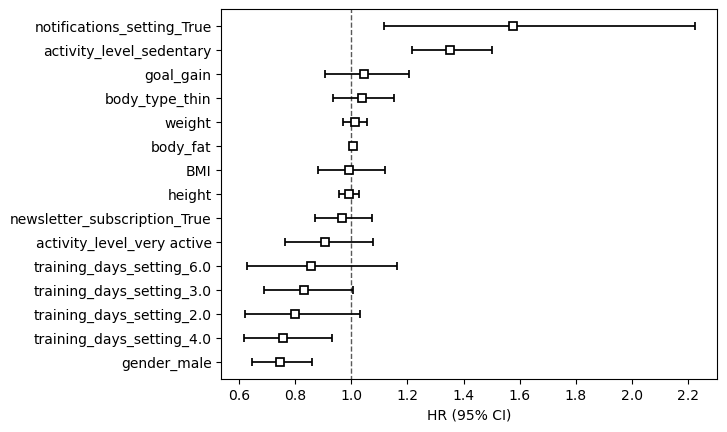

In [354]:
cph_8_demo2.plot(hazard_ratios=True)

Now, let's check the predictions but only for first 5 users in the set. 

<AxesSubplot: >

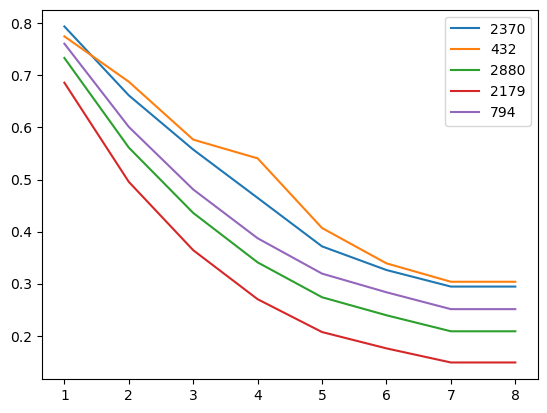

In [355]:
cph_8_demo2.predict_survival_function(X_test_8_2.iloc[0:5, :])

cph_8_demo2.predict_survival_function(X_test_8_2.iloc[0:5, :]).plot()

We can see that user with id 2370 has biggest chances to not drop out at 8 weeks and user 2880 has the biggest chances to drop out.

Below there are values of partial AIC and log-likelighood. The lower AIC is, the better the model is. Log-likelihood - we want to maximize it (the bigger the better). 

In [356]:
print("Partial AIC is: {} \n Log likelihood score is: {}".format(cph_8_demo2.AIC_partial_, cph_8_demo2.score(X_test_8_2)))

Partial AIC is: 19186.713115685016 
 Log likelihood score is: -3.747254460495748


ICI =  0.7968486764549888
E50 =  0.7948472027462709


(<AxesSubplot: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 8 mortality'}, xlabel='Predicted probability of \nt ≤ 8 mortality', ylabel='Observed probability of \nt ≤ 8 mortality'>,
 0.7968486764549888,
 0.7948472027462709)

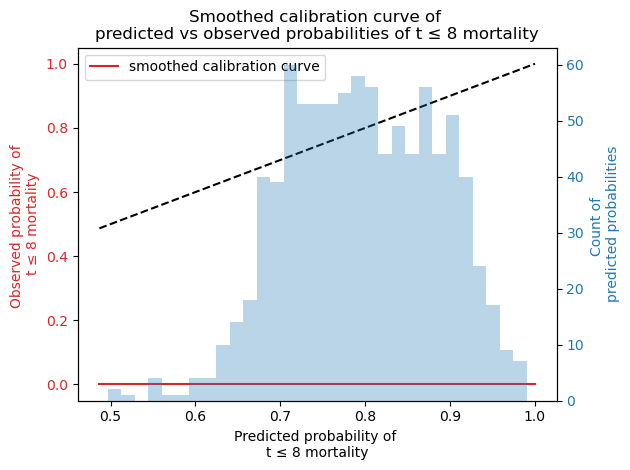

In [357]:
survival_probability_calibration(cph_8_demo2, X_test_8_2, t0=8)

The ICI and E50 values are very bad, because they are close to 1.

Below there is a predicted median time of dropping out the workouts.

In [358]:
cph_8_demo2.predict_median(X_test_8_2).median()

pred_cph_8_demo2 = cph_8_demo2.predict_median(X_test_8_2)

pred_cph_8_demo2 = pd.DataFrame(pred_cph_8_demo2)

value_8_2 = pred_cph_8_demo2[0.5].quantile(0.5)
pred_cph_8_demo2 = pred_cph_8_demo2.replace(np.inf, value_8_2)

Now time for the MAE. The error is almost 2 weeks, so quite a lot for a short 8 weeks timeline.

In [359]:
mae(actual_8_2, pred_cph_8_demo2)

1.9857299670691548

Now, we'll check which single variables are the best risk predictors. We will fit a Cox model to each variable individually and record the c-index on the training and test set and compare the results.

In [360]:
cox_demo_ci_8_2 = c_i_comp_cox(X_train_8_2, X_test_8_2)

cox_demo_ci_8_2.sort_values(by = 'training set', ascending = False)

training set test set
activity_level_sedentary             0.56     0.55
body_fat                             0.56     0.55
goal_lose                            0.55     0.54
gender_male                          0.54     0.52
BMI                                  0.54     0.55
height                               0.54     0.53
goal_gain                            0.54     0.53
activity_level_very active           0.52     0.52
training_days_setting_4.0            0.52     0.52
body_type_strong                     0.51     0.51
weight                               0.51     0.52
training_days_setting_5.0            0.51     0.52
training_days_setting_3.0            0.51     0.52
notifications_setting_True           0.51     0.51
training_days_setting_7.0            0.51     0.51
body_type_thin                       0.50     0.49
training_days_setting_2.0            0.50     0.50
newsletter_subscription_True         0.50     0.51
training_days_setting_6.0            0.50     0.50

Most of the single variables predictors have values close to random one's. Probably, the best variables would be sedentary activity level, body_fat, goal_lose, male gender, height, gain_goal and BMI. 

#### Parametric models

Below there is a table with AIC values for each fitter.

In [289]:
parametric_surv(X_train_8_2)

AIC
Weibull   8312.01
Lognormal 7849.28
LogLog    7947.80

Here, the best Fitter is LogNormal.

In [290]:
WeibullAFT2 = LogNormalAFTFitter()
WeibullAFT2.fit(X_train_8_2, duration_col = 'surv_time', event_col = 'cens')
WeibullAFT2.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 342 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 1781
           log-likelihood = -3817.747
         time fit was run = 2023-05-18 09:31:39 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                            
mu_    BMI                          -0.009      0.991      0.046           -0.099            0.081                0.905                1.085
       activity_level_sedentary     -0.196      0.822      0.043           -0.280           -0.111                0.755                0.895
       activity_level_very active    0.089      1.093      0.066           -0.039            0.218                0.961                1.243
       age_in_years                  0.014      1.014      0.002            0.009            0.018                1.009                1.018
       body_fat                     -0.010      0.990      0.003           -0.016           -0.003                0.984                0.997
       body_type_strong             -0.080      0.923      0.070           -0.217            0.056                0.805                1.058
       body_type_thin               -0.077      0.926      0.042           -0.159            0.006                0.853                1.006
       gender_male                   0.148      1.159      0.058            0.035            0.260                1.035                1.297
       goal_gain                    -0.013      0.987      0.057           -0.125            0.099                0.882                1.104
       goal_lose                    -0.040      0.961      0.061           -0.160            0.081                0.852                1.084
       height                        0.002      1.002      0.014           -0.025            0.028                0.976                1.029
       newsletter_subscription_True  0.060      1.062      0.043           -0.023            0.143                0.977                1.154
       notifications_setting_True   -0.486      0.615      0.137           -0.755           -0.217                0.470                0.805
       training_days_setting_2.0     0.230      1.259      0.104            0.026            0.434                1.026                1.544
       training_days_setting_3.0     0.210      1.234      0.081            0.051            0.370                1.052                1.448
       training_days_setting_4.0     0.308      1.361      0.087            0.138            0.478                1.148                1.613
       training_days_setting_5.0     0.177      1.194      0.088            0.005            0.349                1.005                1.418
       training_days_setting_6.0     0.151      1.163      0.129           -0.102            0.404                0.903                1.498
       training_days_setting_7.0    -0.029      0.971      0.134           -0.292            0.234                0.747                1.263
       weight                       -0.002      0.998      0.016           -0.033            0.030                0.968                1.030
       Intercept                     0.913      2.492      2.307           -3.609            5.435                0.027              229.281
sigma_ Intercept                    -0.155      0.857      0.017           -0.189           -0.120                0.828                0.887

                                      cmp to      z       p   -log2(p)
param  covariate                                                      
mu_    BMI                             0.000 -0.199   0.843      0.247
       activity_level_sedentary        0.000 -4.541 <0.0005     1

The concordance index is acceptable, but not great.

In [293]:
X_train_8_2_2 = X_train_8_2.copy()

In [294]:
X_train_8_2_2.drop(['weight'], axis = 1, inplace = True)

In [297]:
X_train_8_2_2.drop(['height'], axis = 1, inplace = True)

In [299]:
X_train_8_2_2.drop(['training_days_setting_7.0'], axis = 1, inplace = True)

In [301]:
X_train_8_2_2.drop(['goal_gain'], axis = 1, inplace = True)

In [303]:
X_train_8_2_2.drop(['goal_lose'], axis = 1, inplace = True)

In [305]:
X_train_8_2_2.drop(['body_type_strong'], axis = 1, inplace = True)

In [307]:
X_train_8_2_2.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

In [309]:
X_train_8_2_2.drop(['activity_level_very active'], axis = 1, inplace = True)

In [311]:
X_train_8_2_2.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [313]:
X_train_8_2_2.drop(['body_type_thin'], axis = 1, inplace = True)

In [315]:
X_train_8_2_2.drop(['BMI'], axis = 1, inplace = True)

In [295]:
WeibullAFT2_2 = LogNormalAFTFitter()

In [316]:
WeibullAFT2_2.fit(X_train_8_2_2, duration_col = 'surv_time', event_col = 'cens')
WeibullAFT2_2.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 2123 total observations, 342 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 2123
number of events observed = 1781
           log-likelihood = -3824.691
         time fit was run = 2023-05-18 09:35:35 UTC

---
                                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                          
mu_    activity_level_sedentary   -0.216      0.806      0.042           -0.299           -0.133                0.741                0.876
       age_in_years                0.014      1.014      0.002            0.010            0.018                1.010                1.018
       body_fat                   -0.015      0.985      0.002           -0.019           -0.010                0.981                0.990
       gender_male                 0.161      1.175      0.040            0.083            0.239                1.086                1.270
       notifications_setting_True -0.456      0.634      0.136           -0.722           -0.189                0.486                0.828
       training_days_setting_2.0   0.207      1.230      0.089            0.031            0.382                1.032                1.465
       training_days_setting_3.0   0.184      1.202      0.062            0.063            0.304                1.065                1.355
       training_days_setting_4.0   0.281      1.325      0.068            0.148            0.415                1.159                1.514
       training_days_setting_5.0   0.143      1.154      0.069            0.007            0.279                1.007                1.322
       Intercept                   0.997      2.710      0.172            0.660            1.334                1.934                3.795
sigma_ Intercept                  -0.151      0.860      0.017           -0.185           -0.117                0.831                0.890

                                    cmp to      z       p   -log2(p)
param  covariate                                                    
mu_    activity_level_sedentary      0.000 -5.094 <0.0005     21.448
       age_in_years                  0.000  6.510 <0.0005     33.627
       body_fat                      0.000 -6.115 <0.0005     29.948
       gender_male                   0.000  4.040 <0.0005     14.194
       notifications_setting_True    0.000 -3.352   0.001     10.283
       training_days_setting_2.0     0.000  2.310   0.021      5.581
       training_days_setting_3.0     0.000  2.984   0.003      8.457
       training_days_setting_4.0     0.000  4.123 <0.0005     14.707
       training_days_setting_5.0     0.000  2.062   0.039      4.674
       Intercept                     0.000  5.797 <0.0005     27.144
sigma_ Intercept                     0.000 -8.626 <0.0005     57.133
---
Concordance = 0.623
AIC = 7671.382
log-likelihood ratio test = 195.895 on 9 df
-log2(p) of ll-ratio test = 121.647

The model without irrelevant variables has the same CI as the one with irrelevant variables, but it has better AIC, so we will use the model without irrelevant variables.

Activity level sedentary has negative coefficient. This means by selecting sedentary activity level, when compared to other levels, changes mean/median survival time by exp(-0.264) = 0.768, approximately a 23% decrease in mean/median survival time.

Gender male has a positive coefficient. This means being a male user compared to female changes mean/median survival time by exp(0.282) = 1.325, approximately a 33% increase in mean/median survival time.

True on notifications setting has a negative coefficient. This means by enabling notifications, compared to not enabling them changes mean/median survival time by exp(-0.453) = 0.636, approximately a 36% decrease in mean/median survival time.

Setting training days at 2 days a week has a positive coefficient. This means by setting a 2 days a week goal for exercises, compared to the other selections, changes mean/median survival time by exp(0.161) = 1.174, approximately 17% increase in mean/median survival time.

Setting training days at 3 days a week has a positive coefficient. This means by setting a 3 days a week goal for exercises, compared to the other selections, changes mean/median survival time by exp(0.101) = 1.106, approximately 11% increase in mean/median survival time.

Setting training days at 4 days a week has a positive coefficient. This means by setting a 4 days a week goal for exercises, compared to the other selections, changes mean/median survival time by exp(0.165) = 1.180, approximately 18% increase in mean/median survival time.

Weight has negative coefficient. Increase of weight by one unit decreases mean/median survival time by 1%.

Body fat has negative coefficient. Increase of body fat by one unit decreases mean/median survival time by 1%.

Below we can plot the ranking of variables in terms of their log(accelerated failure rate).

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

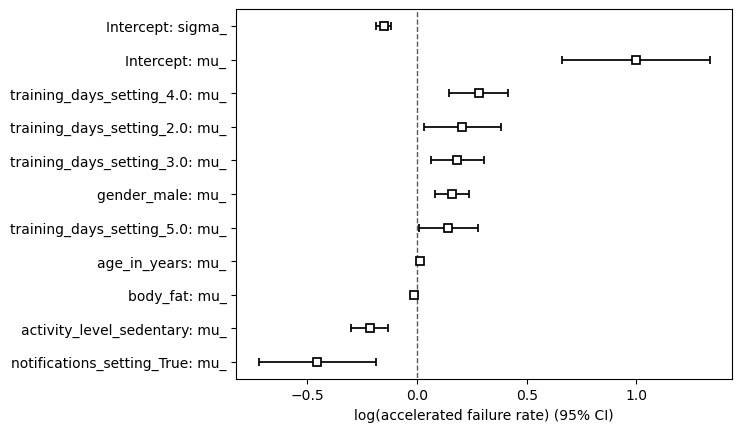

In [317]:
WeibullAFT2_2.plot()

Below there are predictions for the 5 users and their survival function prediction for all 8 weeks. 

In [318]:
X_test_8_2_2 = X_test_8_2.loc[:, X_train_8_2_2.columns]

<Axes: >

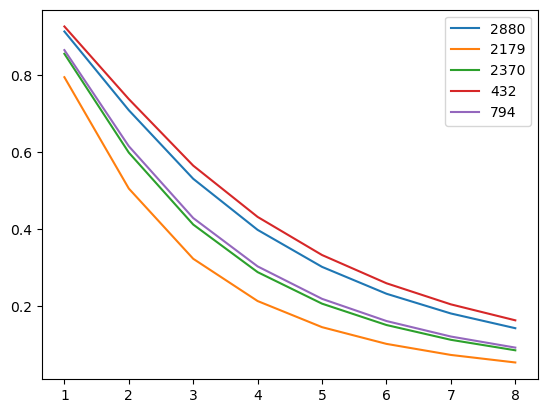

In [319]:
WeibullAFT2_2.predict_survival_function(X_test_8_2_2.iloc[0:5, :])

WeibullAFT2_2.predict_survival_function(X_test_8_2_2.iloc[0:5, :]).plot()

In [320]:
print("AIC is: {} \n Log likelihood score is: {}".format(WeibullAFT2_2.AIC_, WeibullAFT2_2.score(X_test_8_2_2)))

AIC is: 7671.381568136825 
 Log likelihood score is: -1.8404592459347555


The values of ICI and E50 of calibration are really big, so they're not good.

ICI =  0.06745082032108307
E50 =  0.06755933917453483


(<Axes: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 8 mortality'}, xlabel='Predicted probability of \nt ≤ 8 mortality', ylabel='Observed probability of \nt ≤ 8 mortality'>,
 0.06745082032108307,
 0.06755933917453483)

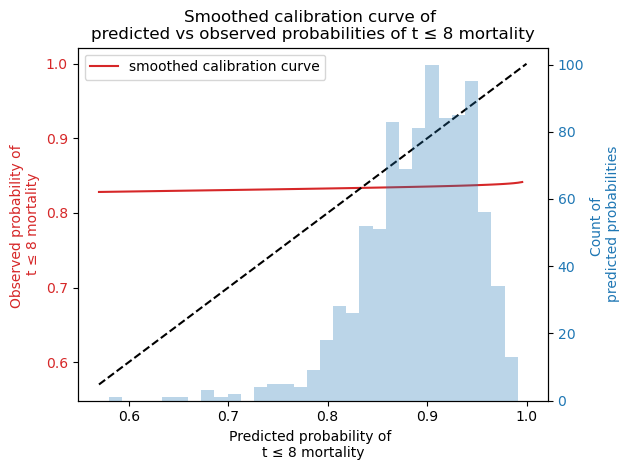

In [321]:
survival_probability_calibration(WeibullAFT2_2, X_test_8_2_2, t0=8)

Median predicted survival time (time of not dropping out) is almost 2 weeks. 

In [322]:
WeibullAFT2_2.predict_median(X_test_8_2_2).median()

pred_8_w_2_2 = WeibullAFT2_2.predict_median(X_test_8_2_2)
mae(actual_8_2, pred_8_w_2_2)

1.9366856202428289

The MAE is a little bit smaller than in a Cox regression, so by this criterion LogNormal AFT model is a little bit better.

We can use our fitted model to see how the survival changes as we change the covariate values. Here, I have used the method to see how the survival varies among 0, 15, 30 and 45 percent of body fat for users compared to their baseline. The plots doesn't show high difference between groups and survival probability. But the lowest survival probability have the users with body fat about 45% and the highest survival probability have the users that have lower body fat.

<Axes: >

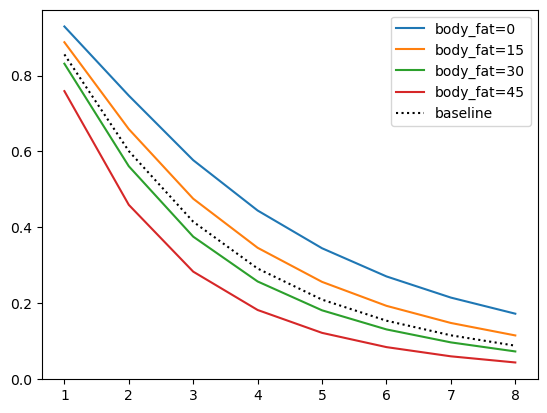

In [323]:
WeibullAFT2_2.plot_partial_effects_on_outcome('body_fat', range(0,60,15))

Below we can look which variables may have the biggest influence on model.

In [325]:
w8_2_2 = c_i_aic_comp_param(X_train_8_2_2, X_test_8_2_2, model = 'lognormal')

w8_2_2.sort_values(by='CI training set', ascending=False)

CI training set CI test set     AIC
body_fat                              0.56        0.54 7791.95
activity_level_sedentary              0.56        0.56 7780.57
age_in_years                          0.55        0.56 7805.02
gender_male                           0.54        0.54 7823.86
training_days_setting_4.0             0.52        0.51 7841.06
training_days_setting_3.0             0.51        0.51 7849.64
training_days_setting_5.0             0.51        0.52 7849.87
notifications_setting_True            0.51        0.51 7839.40
training_days_setting_2.0             0.50        0.50 7850.95

## Observation until 08/2022

### Data preparation

In [91]:
from lifelines.fitters.mixture_cure_fitter import MixtureCureFitter

In [92]:
def select_best_mixture(X):
    
    models = {
        "Weibull": WeibullFitter(),
        # "Piecewise Exponential": PiecewiseExponentialFitter(),
        "Lognormal": LogNormalFitter(),
        "LogLog": LogLogisticFitter()
    }
    
    results = pd.DataFrame(columns = ['AIC', 'BIC'], index = models.keys())
    
    for model_name in models:
        mod = models[model_name]
        
        mixture = MixtureCureFitter(base_fitter=mod)
        mixture.fit(X['surv_time'], X['cens'])
        AIC_val = mixture.AIC_
        BIC_val = mixture.BIC_
        
        results.loc[model_name, :] = AIC_val, BIC_val
    
    return results
    

Let's take the data only to the 2022/08. If the user worked out after that, then the users are censored, if their working out stopped after 8th week of 2022 or during the period they had the app, then the event happened (1). That was the first approach. The second approach is that the user is censored if:
* the user worked out after 8th week of 2022,
* the user worked out at least 80% of the time he/she had the app.

In [93]:
df_session_exe_days_all_weeks['WW'] = df_session_exe_days_all_weeks['WW'].astype('int64')
df_session_exe_days_all_weeks['YYYY'] = df_session_exe_days_all_weeks['YYYY'].astype('int64')

In [94]:
df_session_exe_days_all_weeks['cens_session'] = np.where((df_session_exe_days_all_weeks['WW'] > 8) &
                                (df_session_exe_days_all_weeks['YYYY'] == 2022) & 
                                (df_session_exe_days_all_weeks['YYYY/WW'] != '2021/52'),
                            0,
                            1)

In [95]:
df_session_exe_days_all_weeks_2 = df_session_exe_days_all_weeks[((df_session_exe_days_all_weeks['WW'] <= 8) & (df_session_exe_days_all_weeks['YYYY'] == 2022)) | (df_session_exe_days_all_weeks['YYYY/WW'] == '2021/52') | (df_session_exe_days_all_weeks['YYYY'] == 2021)]


In [96]:
num_trained_weeks = df_session_exe_days_all_weeks_2.groupby(['id_users'])['week_with_training'].sum().reset_index()

num_trained_weeks.rename(columns = {'week_with_training': 'no_trained_week'}, inplace = True)

In [97]:
df_session_exe_days_all_weeks_2 = df_session_exe_days_all_weeks_2.merge(num_trained_weeks, how = 'left', left_on = 'id_users', right_on = 'id_users')


In [98]:
row_count_per_user = df_session_exe_days_all_weeks_2.groupby(['id_users'])['week_with_training'].count().reset_index()
row_count_per_user.rename(columns = {'week_with_training': 'row_count'}, inplace = True)


In [99]:
df_session_exe_days_all_weeks_2 = df_session_exe_days_all_weeks_2.merge(row_count_per_user, how = 'left', left_on = 'id_users', right_on = 'id_users')


In [100]:
df_session_exe_days_all_weeks_2['div'] = df_session_exe_days_all_weeks_2['no_trained_week'] / df_session_exe_days_all_weeks_2['row_count']


In [101]:
df_session_exe_days_all_weeks_2['cens_4'] = np.where((df_session_exe_days_all_weeks_2['div'] == 1) & (df_session_exe_days_all_weeks_2['WW'] == 8),
                                                     0, 1)


In [102]:
df_users_08 = df_session_exe_days_all_weeks_2.drop_duplicates(['id_users'], keep = 'last')

In [103]:
df_users_08.drop(['row_count', 'div', 'cens_session'], axis = 1, inplace = True)

In [104]:
df_users_08.rename(columns= {'cens_4': 'cens',
                             'no_trained_week': 'surv_time'},
                   inplace = True)

In [105]:
df_users_08.head(10)

id_users       Date  days_a_week_session_exe  training_days_setting  \
11    108.00 2022-02-27                     0.00                   2.00   
12    112.00 2022-01-03                     1.00                   4.00   
15    172.00 2021-11-22                     2.00                   5.00   
20    219.00 2021-11-29                     1.00                   5.00   
36    514.00 2022-02-27                     0.00                   2.00   
37    549.00 2021-11-15                     1.00                   3.00   
40    590.00 2021-12-13                     1.00                   5.00   
42    597.00 2021-11-22                     2.00                   6.00   
59    601.00 2022-02-27                     0.00                   5.00   
76    603.00 2022-02-21                     3.00                   5.00   

    training_days_goal_achieved  YYYY/WW  WW  YYYY  week_with_training  \
11                         0.00  2022/08   8  2022                   0   
12                         0.00  2022/01   1  2022                   1   
15                         0.00  2021/47  47  2021                   1   
20                         0.00  2021/48  48  2021                   1   
36                         0.00  2022/08   8  2022                   0   
37                         0.00  2021/46  46  2021                   1   
40                         0.00  2021/50  50  2021                   1   
42                         0.00  2021/47  47  2021                   1   
59                         0.00  2022/08   8  2022                   0   
76                         0.00  2022/08   8  2022                   1   

    surv_time  cens  
11          2     1  
12          1     1  
15          3     1  
20          2     1  
36         10     1  
37          1     1  
40          2     1  
42          2     1  
59          4     1  
76         15     1

In [106]:
df_session_exe_days_all_weeks_2['cens_2'] = np.where((df_session_exe_days_all_weeks_2['div'] >= 0.75) & (df_session_exe_days_all_weeks_2['WW'] == 8),
                                                     0, 1)


In [107]:
df_users_08_2 = df_session_exe_days_all_weeks_2.drop_duplicates(['id_users'], keep = 'last')

In [108]:
df_users_08_2.drop(['row_count', 'div', 'cens_session', 'cens_4'], axis = 1, inplace = True)

In [109]:
df_users_08_2.rename(columns= {'cens_2': 'cens',
                             'no_trained_week': 'surv_time'},
                   inplace = True)

In [110]:
df_users_08_2.head(10)

id_users       Date  days_a_week_session_exe  training_days_setting  \
11    108.00 2022-02-27                     0.00                   2.00   
12    112.00 2022-01-03                     1.00                   4.00   
15    172.00 2021-11-22                     2.00                   5.00   
20    219.00 2021-11-29                     1.00                   5.00   
36    514.00 2022-02-27                     0.00                   2.00   
37    549.00 2021-11-15                     1.00                   3.00   
40    590.00 2021-12-13                     1.00                   5.00   
42    597.00 2021-11-22                     2.00                   6.00   
59    601.00 2022-02-27                     0.00                   5.00   
76    603.00 2022-02-21                     3.00                   5.00   

    training_days_goal_achieved  YYYY/WW  WW  YYYY  week_with_training  \
11                         0.00  2022/08   8  2022                   0   
12                         0.00  2022/01   1  2022                   1   
15                         0.00  2021/47  47  2021                   1   
20                         0.00  2021/48  48  2021                   1   
36                         0.00  2022/08   8  2022                   0   
37                         0.00  2021/46  46  2021                   1   
40                         0.00  2021/50  50  2021                   1   
42                         0.00  2021/47  47  2021                   1   
59                         0.00  2022/08   8  2022                   0   
76                         0.00  2022/08   8  2022                   1   

    surv_time  cens  
11          2     1  
12          1     1  
15          3     1  
20          2     1  
36         10     1  
37          1     1  
40          2     1  
42          2     1  
59          4     1  
76         15     0

In [111]:
print('Users censored: {} \n Users with event: {}'.format(len(df_users_08) - df_users_08['cens'].sum(), df_users_08['cens'].sum()))

Users censored: 276 
 Users with event: 2189


In [112]:
print("number of users: {}".format(df_users_08['id_users'].nunique()))

number of users: 2465


In [113]:
print('Users censored: {} \n Users with event: {}'.format(len(df_users_08_2) - df_users_08_2['cens'].sum(), 
                                                          df_users_08_2['cens'].sum()))


Users censored: 546 
 Users with event: 1919


In [114]:
df_users_08_subset = df_users_08.loc[:, ['id_users', 'cens', 'surv_time']]

df_till_08 = df_users_only.merge(df_users_08_subset, how = 'inner', left_on = 'id_users', right_on = 'id_users')


In [115]:
df_till_08.head()

id_users           created_at_users           updated_at_users  gender  \
0   6557.00 2021-10-28 06:17:47.108449 2022-07-20 06:23:42.531597    male   
1   7761.00 2021-10-28 06:35:56.542124 2022-09-07 18:28:49.283551    male   
2   6000.00 2021-10-28 06:15:19.208652 2022-05-08 20:29:51.356913    male   
3   6899.00 2021-10-28 06:19:14.747586 2022-06-12 02:04:34.935740    male   
4   1829.00 2021-10-25 11:02:42.268420 2022-05-25 10:35:23.257373  female   

  date_of_birth  height  weight activity_level  goal body_type  body_fat  \
0    1990-01-01  180.00   70.00         active  gain      thin     15.00   
1    1974-08-29  186.00   79.00         active  gain       mid     10.00   
2    1985-01-01  186.00   86.00         active  gain       mid     30.00   
3    1993-05-23  178.00   70.00         active  lose       mid     30.00   
4    1978-12-27  164.00   62.00         active  lose      thin     30.00   

  newsletter_subscription notifications_setting  training_days_setting  \
0                    True                  True                   4.00   
1                    True                  True                   5.00   
2                   False                 False                   3.00   
3                   False                  True                   5.00   
4                    True                  True                   3.00   

  language    points cluster scientific_data_usage  best_weekly_streak_users  \
0       es  26447.00       2                  True                      5.00   
1       es 212090.00       8                 False                     37.00   
2       es 100309.00       4                 False                      8.00   
3       es  71762.00       4                 False                      5.00   
4       en  65363.00       3                  True                     32.00   

    BMI BMI_category  total_sessions_users2  total_time_users2  \
0 21.60       Normal                  39.00           72469.00   
1 22.84       Normal                 133.00          241247.00   
2 24.86       Normal                  27.00           39455.00   
3 22.09       Normal                  25.00           44347.00   
4 23.05       Normal                  73.00          100432.00   

   total_reps_users2  reps_per_session_users2  total_calories_users2  \
0            7792.00                   199.79                3801.58   
1           36623.00                   275.36               16051.71   
2            6292.00                   233.04                2764.39   
3            4983.00                   199.32                2431.53   
4           15555.00                   213.08                5198.24   

   kcal_per_session_users2  exercises_per_user  \
0                    97.48                1416   
1                   120.69                7503   
2                   102.38                 941   
3                    97.26                 996   
4                    71.21                2334   

   exercises_without_rest_per_user  age_in_years  cens  surv_time  
0                              804         32.00     1         16  
1                             5013         48.00     0         17  
2                              584         37.00     1         12  
3                              555         29.00     1         12  
4                             1554         43.00     0         17

In [117]:
df_users_till_08_demo = df_till_08.loc[:, ['gender', 'height', 'weight', 'activity_level', 'goal', 
                                                 'body_type', 'body_fat', 'newsletter_subscription',
                                                 'notifications_setting', 'training_days_setting', 'BMI',
                                           'cluster', 'age_in_years',
                                                 'cens', 'surv_time']]

In [118]:
df_users_08_subset2 = df_users_08_2.loc[:, ['id_users', 'cens', 'surv_time']]

df_till_08_2 = df_users_only.merge(df_users_08_subset2, how = 'inner', left_on = 'id_users', right_on = 'id_users')


In [410]:
df_users_till_08_demo_2 = df_till_08_2.loc[:, ['gender', 'height', 'weight', 'activity_level', 'goal', 
                                                 'body_type', 'body_fat', 'newsletter_subscription',
                                                 'notifications_setting', 'training_days_setting', 'BMI',
                                           'cluster', 'age_in_years',
                                                 'cens', 'surv_time']]

In [414]:
df_users_till_08_demo_2['training_days_setting'] = df_users_till_08_demo_2['training_days_setting'].astype('category')
df_users_till_08_demo['training_days_setting'] = df_users_till_08_demo['training_days_setting'].astype('category')


In [419]:
my_freq_table(df_users_till_08_demo_2[df_users_till_08_demo_2['cens'] == 0], 'notifications_setting')


Frequency Percent
False         18    3.3%
True         528   96.7%
Total        546  100.0%

In [420]:
my_freq_table(df_users_till_08_demo_2[df_users_till_08_demo_2['cens'] == 1], 'notifications_setting')


Frequency Percent
False         37   1.93%
True        1882  98.07%
Total       1919  100.0%

### Kaplan-Meier Estimators

#### All

Median survival time is 3.0 
 Survival function takes estimates for each time point 
           Kaplan Meier Estimate
timeline                       
0.00                       1.00
1.00                       0.72
2.00                       0.56
3.00                       0.48
4.00                       0.41
5.00                       0.35
6.00                       0.30
7.00                       0.27
8.00                       0.24
9.00                       0.21
10.00                      0.18
11.00                      0.15
12.00                      0.13
13.00                      0.10
14.00                      0.08
15.00                      0.06
16.00                      0.04
17.00                      0.04


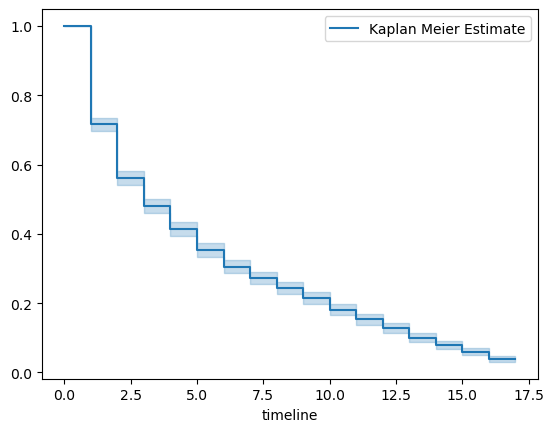

In [412]:
kmf_08_all = km_simple(df_users_till_08_demo)

The probability that the user didn't stop working out in a first week is 0.72, in the second week it's 0.56, third - 0.48, fourth - 0.41, fifth - 0.35, sixth - 0.30, seventh - 0.27, eighth - 24, ninth - 0.21, tenth - 0.18, eleventh - 0.15, twelfth - 0.13, thirteenth - 0.1, fourteenth - 0.08, fifteenth - 0.06 and sixteenth - 0.04. The median survival time is 3 weeks.

#### By gender

Median survival time for female is 2.0
Survival function for female estimates: 
           female
timeline        
0.00        1.00
1.00        0.66
2.00        0.49
3.00        0.41
4.00        0.33
5.00        0.26
6.00        0.22
7.00        0.19
8.00        0.16
9.00        0.14
10.00       0.11
11.00       0.09
12.00       0.08
13.00       0.06
14.00       0.05
15.00       0.03
16.00       0.02
17.00       0.02
Median survival time for male is 4.0
Survival function for male estimates: 
           male
timeline      
0.00      1.00
1.00      0.75
2.00      0.61
3.00      0.53
4.00      0.46
5.00      0.41
6.00      0.36
7.00      0.32
8.00      0.30
9.00      0.26
10.00     0.22
11.00     0.19
12.00     0.16
13.00     0.12
14.00     0.10
15.00     0.07
16.00     0.05
17.00     0.05


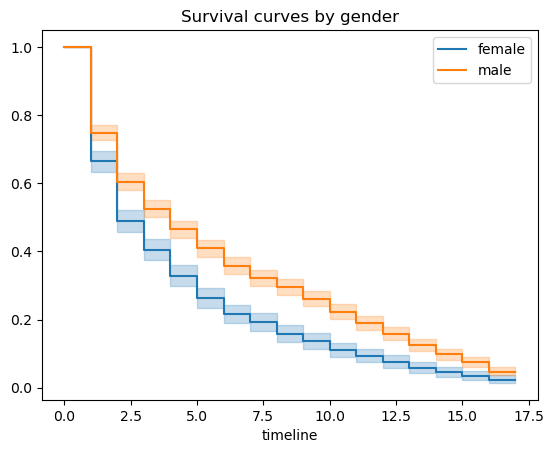

(<lifelines.KaplanMeierFitter:"male", fitted with 1515 total observations, 177 right-censored observations>,
 None)

In [413]:
kaplan_meier_by_cat(df_users_till_08_demo, 'gender')

In [414]:
km_logrank_test(df_users_till_08_demo, 'gender')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          59.72 <0.005     46.38

By logrank test, it is seen that there are differences between groups in survival curves in gender. For female median survival times is 2 weeks, and for male it is 4 weeks.

#### By activity level

Median survival time for active is 4.0
Survival function for active estimates: 
           active
timeline        
0.00        1.00
1.00        0.75
2.00        0.62
3.00        0.54
4.00        0.47
5.00        0.40
6.00        0.34
7.00        0.31
8.00        0.28
9.00        0.25
10.00       0.22
11.00       0.19
12.00       0.16
13.00       0.13
14.00       0.10
15.00       0.08
16.00       0.05
17.00       0.05
Median survival time for sedentary is 2.0
Survival function for sedentary estimates: 
           sedentary
timeline           
0.00           1.00
1.00           0.62
2.00           0.42
3.00           0.32
4.00           0.27
5.00           0.22
6.00           0.18
7.00           0.16
8.00           0.14
9.00           0.11
10.00          0.08
11.00          0.07
12.00          0.05
13.00          0.04
14.00          0.02
15.00          0.02
16.00          0.01
17.00          0.01
Median survival time for very active is 6.0
Survival function for very active estimates: 
  

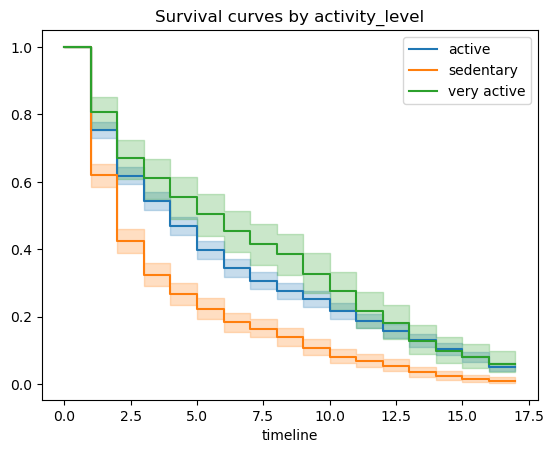

(<lifelines.KaplanMeierFitter:"very active", fitted with 255 total observations, 30 right-censored observations>,
 None)

In [415]:
kaplan_meier_by_cat(df_users_till_08_demo, 'activity_level')

In [416]:
km_logrank_test(df_users_till_08_demo, 'activity_level')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                       test_statistic      p  -log2(p)
active    sedentary            110.93 <0.005     83.76
          very active            3.98   0.05      4.44
sedentary very active           73.47 <0.005     56.44

There are significant differences between survival curves of activity level groups. In active vs sedentary and sedentary vs very active, p-value is less than 0.05. For pair active and very active the value is borderline.

For sedentary group, median survival time is 2 weeks, for active group - 4 weeks and very active group the median of survival time is 6 weeks.

#### By goal

Median survival time for lose is 2.0
Survival function for lose estimates: 
           lose
timeline      
0.00      1.00
1.00      0.67
2.00      0.49
3.00      0.40
4.00      0.33
5.00      0.26
6.00      0.23
7.00      0.21
8.00      0.18
9.00      0.16
10.00     0.13
11.00     0.11
12.00     0.09
13.00     0.07
14.00     0.05
15.00     0.03
16.00     0.02
17.00     0.02
Median survival time for gain is 4.0
Survival function for gain estimates: 
           gain
timeline      
0.00      1.00
1.00      0.74
2.00      0.60
3.00      0.53
4.00      0.47
5.00      0.42
6.00      0.36
7.00      0.32
8.00      0.29
9.00      0.26
10.00     0.22
11.00     0.18
12.00     0.15
13.00     0.12
14.00     0.09
15.00     0.07
16.00     0.04
17.00     0.04
Median survival time for antiaging is 4.0
Survival function for antiaging estimates: 
           antiaging
timeline           
0.00           1.00
1.00           0.77
2.00           0.62
3.00           0.54
4.00           0.44
5.00           0.38

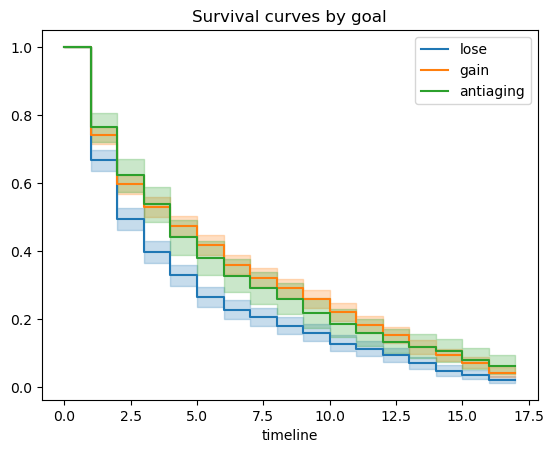

(<lifelines.KaplanMeierFitter:"antiaging", fitted with 380 total observations, 49 right-censored observations>,
 None)

In [417]:
kaplan_meier_by_cat(df_users_till_08_demo, 'goal')

In [418]:
km_logrank_test(df_users_till_08_demo, 'goal')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                test_statistic      p  -log2(p)
antiaging gain            0.02   0.89      0.17
          lose           20.18 <0.005     17.12
gain      lose           41.35 <0.005     32.87

There are differences between survival curves of antiaging and lose groups and gain and lose groups. Groups antiaging and gain have not difference of survival curves (p = 0.89).

For gain and antiaging group, survival time median is 4 weeks. For lose group, survival time median is 2 weeks.

#### By body type

Median survival time for mid is 3.0
Survival function for mid estimates: 
           mid
timeline     
0.00     1.00
1.00     0.75
2.00     0.59
3.00     0.49
4.00     0.43
5.00     0.37
6.00     0.31
7.00     0.28
8.00     0.25
9.00     0.23
10.00    0.19
11.00    0.16
12.00    0.13
13.00    0.10
14.00    0.08
15.00    0.06
16.00    0.04
17.00    0.04
Median survival time for thin is 3.0
Survival function for thin estimates: 
           thin
timeline      
0.00      1.00
1.00      0.69
2.00      0.54
3.00      0.48
4.00      0.40
5.00      0.35
6.00      0.30
7.00      0.27
8.00      0.24
9.00      0.20
10.00     0.17
11.00     0.14
12.00     0.12
13.00     0.09
14.00     0.07
15.00     0.06
16.00     0.04
17.00     0.04
Median survival time for strong is 2.0
Survival function for strong estimates: 
           strong
timeline        
0.00        1.00
1.00        0.67
2.00        0.50
3.00        0.42
4.00        0.38
5.00        0.31
6.00        0.27
7.00        0.24
8.00        0.22


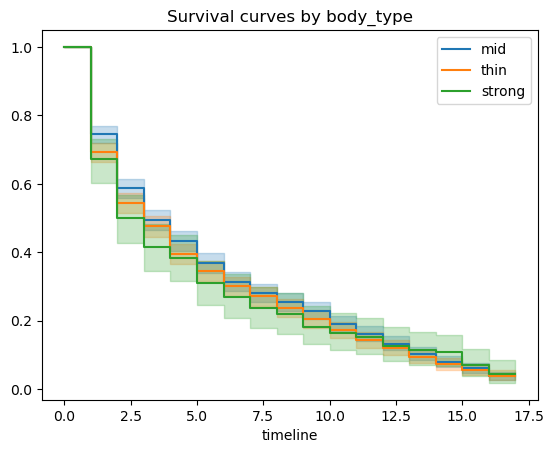

(<lifelines.KaplanMeierFitter:"strong", fitted with 198 total observations, 21 right-censored observations>,
 None)

In [419]:
kaplan_meier_by_cat(df_users_till_08_demo, 'body_type')

In [420]:
km_logrank_test(df_users_till_08_demo, 'body_type')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
               test_statistic    p  -log2(p)
mid    strong            1.24 0.27      1.91
       thin              1.94 0.16      2.61
strong thin              0.13 0.72      0.48

There is no statistically significant difference between groups.

Median time for mid and group is 3 weeks and for strong is 2 weeks.

#### By newsletter subscription

Median survival time for False is 3.0
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.70
2.00       0.54
3.00       0.46
4.00       0.40
5.00       0.34
6.00       0.29
7.00       0.26
8.00       0.23
9.00       0.21
10.00      0.18
11.00      0.15
12.00      0.13
13.00      0.10
14.00      0.07
15.00      0.05
16.00      0.03
17.00      0.03
Median survival time for True is 3.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.72
2.00      0.57
3.00      0.49
4.00      0.42
5.00      0.36
6.00      0.31
7.00      0.28
8.00      0.25
9.00      0.22
10.00     0.18
11.00     0.15
12.00     0.13
13.00     0.10
14.00     0.08
15.00     0.06
16.00     0.04
17.00     0.04


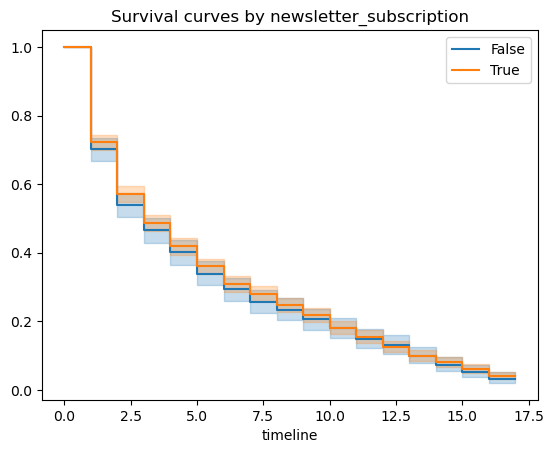

(<lifelines.KaplanMeierFitter:"True", fitted with 1723 total observations, 186 right-censored observations>,
 None)

In [421]:
kaplan_meier_by_cat(df_users_till_08_demo, 'newsletter_subscription')

In [422]:
km_logrank_test(df_users_till_08_demo, 'newsletter_subscription')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.95 0.33      1.60

There is no statistical difference between groups.

#### By notification settings

Median survival time for True is 3.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.71
2.00      0.56
3.00      0.47
4.00      0.41
5.00      0.35
6.00      0.30
7.00      0.27
8.00      0.24
9.00      0.21
10.00     0.18
11.00     0.15
12.00     0.13
13.00     0.10
14.00     0.08
15.00     0.06
16.00     0.04
17.00     0.04
Median survival time for False is 7.0
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.85
2.00       0.78
3.00       0.73
4.00       0.69
5.00       0.59
6.00       0.57
7.00       0.49
8.00       0.45
9.00       0.41
10.00      0.31
11.00      0.27
12.00      0.21
15.00      0.19
16.00      0.12
17.00      0.12


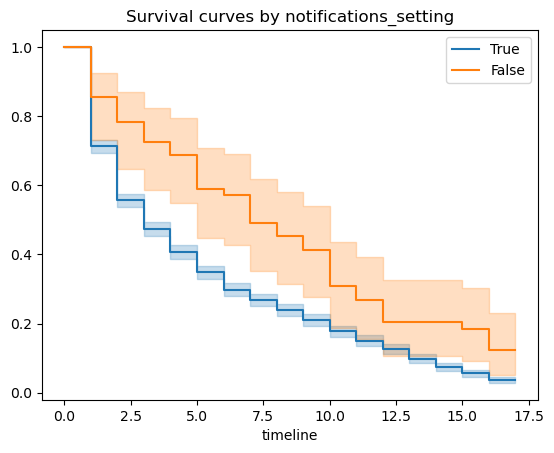

(<lifelines.KaplanMeierFitter: fitted with 55 total observations, 10 right-censored observations>,
 None)

In [423]:
kaplan_meier_by_cat(df_users_till_08_demo, 'notifications_setting')

In [424]:
km_logrank_test(df_users_till_08_demo, 'notifications_setting')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          13.37 <0.005     11.93

There are differences between survival curves in newsletter subscription (p < 0.005).

For true group, median survival time is 3 weeks, for false group median survival time is 7 weeks.

#### By training days setting 

Median survival time for 3.0 is 3.0
Survival function for 3.0 estimates: 
           3.00
timeline      
0.00      1.00
1.00      0.74
2.00      0.58
3.00      0.49
4.00      0.42
5.00      0.36
6.00      0.31
7.00      0.29
8.00      0.25
9.00      0.22
10.00     0.18
11.00     0.16
12.00     0.13
13.00     0.10
14.00     0.08
15.00     0.05
16.00     0.03
17.00     0.03
Median survival time for 4.0 is 4.0
Survival function for 4.0 estimates: 
           4.00
timeline      
0.00      1.00
1.00      0.76
2.00      0.63
3.00      0.55
4.00      0.48
5.00      0.41
6.00      0.35
7.00      0.30
8.00      0.28
9.00      0.26
10.00     0.22
11.00     0.17
12.00     0.13
13.00     0.10
14.00     0.07
15.00     0.06
16.00     0.03
17.00     0.03
Median survival time for 5.0 is 3.0
Survival function for 5.0 estimates: 
           5.00
timeline      
0.00      1.00
1.00      0.69
2.00      0.52
3.00      0.44
4.00      0.39
5.00      0.34
6.00      0.30
7.00      0.27
8.00      0.24
9.00      

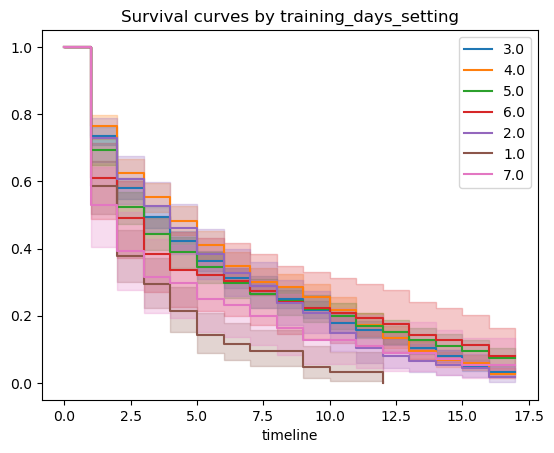

(<lifelines.KaplanMeierFitter:"7.0", fitted with 66 total observations, 6 right-censored observations>,
 None)

In [425]:
kaplan_meier_by_cat(df_users_till_08_demo, 'training_days_setting')

In [426]:
km_logrank_test(df_users_till_08_demo, 'training_days_setting')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
           test_statistic      p  -log2(p)
1.00 2.00           25.42 <0.005     21.05
     3.00           37.82 <0.005     30.26
     4.00           48.81 <0.005     38.37
     5.00           23.60 <0.005     19.68
     6.00            8.35 <0.005      8.01
     7.00            2.01   0.16      2.68
2.00 3.00            0.21   0.65      0.63
     4.00            1.63   0.20      2.31
     5.00            0.22   0.64      0.64
     6.00            0.12   0.73      0.46
     7.00            2.11   0.15      2.77
3.00 4.00            1.36   0.24      2.04
     5.00            0.18   0.67      0.58
     6.00            0.02   0.90      0.16
     7.00            3.89   0.05      4.37
4.00 5.00            0.29   0.59      0.75
     6.00            0.06   0.81      0.31
     7.00            5.68   0.02      5.86
5.00 6.00            0.05   0.82      0.29
     7.00            3.60   0.06      4.11
6.00 7.00            1.41   0.23      2.09

The are differences between survival curves for days 1 and 2, 1 and 3, 1 and 4, 1 and 5, 1 and 6, 3 and 7 (borderline) and 4 and 7.

Median survival time for each training days setting is:
* 3 weeks for training days setting 3, 5,
* 2 weeks for training days setting 1, 6, 7,
* 4 week for training days setting 2 and 4.

#### By clusters for gender, body_type, newsletter_subscription and BMI

Here, the best clustering method was PAM with 2 clusters.

Median survival time for 9 is 2.0
Survival function for 9 estimates: 
             9
timeline     
0.00     1.00
1.00     0.70
2.00     0.50
3.00     0.39
4.00     0.33
5.00     0.27
6.00     0.23
7.00     0.21
8.00     0.17
9.00     0.13
10.00    0.12
11.00    0.12
13.00    0.10
14.00    0.03
16.00    0.03
17.00    0.03
Median survival time for 5 is 4.0
Survival function for 5 estimates: 
             5
timeline     
0.00     1.00
1.00     0.72
2.00     0.58
3.00     0.52
4.00     0.44
5.00     0.40
6.00     0.36
7.00     0.34
8.00     0.29
9.00     0.25
10.00    0.20
11.00    0.17
12.00    0.14
13.00    0.11
14.00    0.08
15.00    0.07
16.00    0.05
17.00    0.05
Median survival time for 4 is 3.0
Survival function for 4 estimates: 
             4
timeline     
0.00     1.00
1.00     0.67
2.00     0.52
3.00     0.45
4.00     0.36
5.00     0.30
6.00     0.25
7.00     0.22
8.00     0.19
9.00     0.16
10.00    0.14
11.00    0.11
12.00    0.09
13.00    0.08
14.00    0.06
15.00    0.05
16.

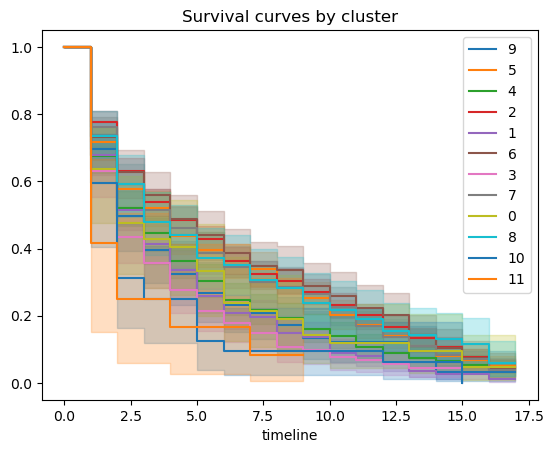

(<lifelines.KaplanMeierFitter:"11", fitted with 12 total observations, 1 right-censored observations>,
 None)

In [427]:
kaplan_meier_by_cat(df_users_till_08_demo, 'cluster')

In [428]:
km_logrank_test(df_users_till_08_demo, 'cluster')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
       test_statistic      p  -log2(p)
0  1             0.70   0.40      1.31
   2             2.48   0.12      3.11
   3             1.78   0.18      2.46
   4             0.00   0.96      0.06
   5             1.20   0.27      1.88
   6             2.19   0.14      2.84
   7             1.25   0.26      1.92
   8             1.36   0.24      2.04
   9             0.09   0.77      0.39
   10            2.14   0.14      2.80
   11            1.52   0.22      2.20
1  2            29.26 <0.005     23.92
   3             1.78   0.18      2.46
   4             1.99   0.16      2.66
   5            15.46 <0.005     13.54
   6            18.73 <0.005     16.02
   7            13.44 <0.005     11.98
   8             8.90 <0.005      8.46
   9             0.47   0.49      1.02
   10            1.75   0.19      2.43
   11            2.06   0.15      2.73
2  3            33.32 <0.005     26.93
   4            15.08 <0.005     13.24
   5             1.16   0.28      1.83
   6             0.06   0.81      0.30
   7             0.76   0.38      1.38
   8             0.09   0.76      0.39
   9             8.02 <0.005      7.75
   10           12.20 <0.005     11.03
   11            7.36   0.01      7.22
3  4             5.51   0.02      5.73
   5            19.79 <0.005     16.82
   6            22.57 <0.005     18.92
   7            18.74 <0.005     16.03
   8            12.73 <0.005     11.44
   9             1.76   0.18      2.44
   10            0.40   0.53      0.92
   11            0.79   0.37      1.42
4  5             6.15   0.01      6.25
   6             8.85 <0.005      8.41
   7             5.28   0.02      5.53
   8             3.64   0.06      4.15
   9             0.11   0.74      0.44
   10            3.57   0.06      4.08
   11            2.49   0.11      3.12
5  6             0.95   0.33      1.60
   7             0.00   0.95      0.08
   8             0.09   0.76      0.39
   9             3.71   0.05      4.21
   10            8.12 <0.005      7.84
   11            5.38   0.02      5.62
6  7             0.73   0.39      1.35
   8             0.14   0.71      0.50
   9             6.21   0.01      6.30
   10           10.36 <0.005      9.60
   11            6.42   0.01      6.47
7  8             0.07   0.79      0.35
   9             3.76   0.05      4.25
   10            8.48 <0.005      8.13
   11            5.95   0.01      6.09
8  9             3.22   0.07      3.78
   10            7.88   0.01      7.64
   11            4.80   0.03      5.13
9  10            1.96   0.16      2.63
   11            1.89   0.17      2.56
10 11            0.21   0.65      0.63

There are significant differences between survival curves for clusters. Median survival time for cluster 1 is 2 weeks and for 0 cluster is 4 weeks.

### Cox PH regression

First, we split the data into train and test sets.

In [120]:
df_users_till_08_demo2 = df_users_till_08_demo.copy()
df_users_till_08_demo2.drop(['cluster'], axis = 1, inplace = True)

df_users_till_08_demo2['cens'] = df_users_till_08_demo2['cens'].astype('int64')

df_users_till_08_demo2['training_days_setting'] = df_users_till_08_demo2['training_days_setting'].astype('category')

df_users_till_08_demo_dummies = pd.get_dummies(df_users_till_08_demo2, drop_first = True)

df_users_till_08_demo2['cens'] = df_users_till_08_demo2['cens'].astype('category')

In [121]:
X_train_08, X_test_08 = train_test_split(df_users_till_08_demo_dummies, test_size = 0.3, random_state = 42)

In [122]:
actual_08 = X_test_08['surv_time'].astype('int64')

In [432]:
print('Number of non censored useres in train set: {} (the event happened)'.format(X_train_08['cens'].sum()), '\n',
      'Number of censored users in train set: {} (the event did not happened)'.format(len(X_train_08) - X_train_08['cens'].sum()))

Number of non censored useres in train set: 1516 (the event happened) 
 Number of censored users in train set: 209 (the event did not happened)


In [433]:
print('Number of non censored useres in test set: {} (the event happened)'.format(X_test_08['cens'].sum()), '\n',
      'Number of censored users in test set: {} (the event did not happened)'.format(len(X_test_08) - X_test_08['cens'].sum()))

Number of non censored useres in test set: 673 (the event happened) 
 Number of censored users in test set: 67 (the event did not happened)


Now, we fit the model to the training data and check assumptions.

In [434]:
cph_08_demo = cox_model(X_train_08, summary = False)

In [435]:
cph_08_demo.check_assumptions(X_train_08, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1725 total observations, 209 right-censored observations>
         test_name = proportional_hazard_test

---
                                   test_statistic      p  -log2(p)
BMI                          km              0.00   0.96      0.06
                             rank            0.00   0.95      0.07
activity_level_sedentary     km              0.08   0.78      0.36
                             rank            0.03   0.87      0.21
activity_level_very active   km              6.35   0.01      6.41
                             rank            5.47   0.02      5.69
body_fat                     km              0.02   0.88      0.18
                             rank            0.01   0.94      0.09
body_type_strong             km              0.54   0.46      1.11
                             rank            0.62   0.43      1.21
body_type_thin               km              2.89   0.09      3.48
                             rank            2.77   0.10      3.38
gender_male                  km              0.00   0.96      0.05
                             rank            0.00   0.99      0.01
goal_gain                    km              0.02   0.90      0.16
                             rank            0.00   0.98      0.03
goal_lose                    km              0.55   0.46      1.12
                             rank            0.73   0.39      1.34
height                       km              0.00   0.99      0.02
                             rank            0.00   0.98      0.02
newsletter_subscription_True km              0.21   0.64      0.64
                             rank            0.06   0.81      0.30
notifications_setting_True   km              2.02   0.16      2.68
                             rank            1.75   0.19      2.43
training_days_setting_2.0    km              0.49   0.48      1.05
                             rank            0.20   0.66      0.61
training_days_setting_3.0    km              0.36   0.55      0.86
                             rank            0.25   0.62      0.69
training_days_setting_4.0    km              0.19   0.66      0.59
                             rank            0.30   0.59      0.77
training_days_setting_5.0    km              7.82   0.01      7.60
                             rank            7.31   0.01      7.19
training_days_setting_6.0    km             12.19 <0.005     11.02
                             rank            9.65 <0.005      9.04
training_days_setting_7.0    km              7.07   0.01      7.00
                             rank            7.43   0.01      7.28
weight                       km              0.00   0.97      0.04
                             rank            0.01   0.94      0.09



1. Variable 'activity_level_very active' failed the non-proportional test: p-value is 0.0117.

   Advice: with so few unique values (only 2), you can include `strata=['activity_level_very
active', ...]` in the call in `.fit`. See documentation in link [E] below.

2. Variable 'training_days_setting_5.0' failed the non-proportional test: p-value is 0.0052.

   Advice: with so few unique values (only 2), you can include `strata=['training_days_setting_5.0',
...]` in the call in `.fit`. See documentation in link [E] below.

3. Variable 'training_days_setting_6.0' failed the non-proportional test: p-value is 0.0005.

   Advice: with so few unique values (only 2), you can include `strata=['training_days_setting_6.0',
...]` in the call in `.fit`. See documentation in link [E] below.

4. Variable 'training_days_setting_7.0' failed the non-proportional test: p-value is 0.0064.

   Advice: with so few unique values (only 2), you can include `strata=['training_days_setting_7.0',
...]` in the ca

[]

Now we get the data from assumptions check to strata and again fit the data and check assumptions.

In [436]:
cph_08_demo.fit(X_train_08, duration_col = 'surv_time', event_col = 'cens', strata = ['training_days_setting_5.0',
                                                                                      'training_days_setting_6.0',
                                                                                      'training_days_setting_7.0',
                                                                                    'activity_level_very active'])


<lifelines.CoxPHFitter: fitted with 1725 total observations, 209 right-censored observations>

In [437]:
cph_08_demo.check_assumptions(X_train_08)

Proportional hazard assumption looks okay.


[]

Below there is summary of the fitted model.

In [438]:
cph_08_demo.print_summary()

<lifelines.CoxPHFitter: fitted with 1725 total observations, 209 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
                   strata = ['training_days_setting_5.0', 'training_days_setting_6.0', 'training_days_setting_7.0', 'activity_level_very active']
      baseline estimation = breslow
   number of observations = 1725
number of events observed = 1516
   partial log-likelihood = -8358.48
         time fit was run = 2023-05-11 08:05:15 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
height                        -0.01       0.99       0.02            -0.05             0.03                 0.95                 1.03
weight                         0.01       1.01       0.02            -0.04             0.06                 0.97                 1.06
body_fat                       0.01       1.01       0.00            -0.00             0.02                 1.00                 1.02
BMI                            0.00       1.00       0.07            -0.13             0.14                 0.88                 1.15
gender_male                   -0.34       0.71       0.08            -0.50            -0.18                 0.60                 0.83
activity_level_sedentary       0.35       1.42       0.06             0.23             0.47                 1.26                 1.60
goal_gain                      0.10       1.11       0.08            -0.05             0.25                 0.95                 1.29
goal_lose                      0.11       1.12       0.08            -0.05             0.28                 0.95                 1.32
body_type_strong              -0.01       0.99       0.11            -0.22             0.20                 0.80                 1.22
body_type_thin                 0.09       1.09       0.06            -0.03             0.20                 0.97                 1.23
newsletter_subscription_True  -0.02       0.98       0.06            -0.14             0.09                 0.87                 1.09
notifications_setting_True     0.55       1.73       0.18             0.19             0.91                 1.21                 2.47
training_days_setting_2.0     -0.53       0.59       0.14            -0.81            -0.25                 0.45                 0.78
training_days_setting_3.0     -0.57       0.57       0.11            -0.79            -0.34                 0.45                 0.71
training_days_setting_4.0     -0.61       0.55       0.12            -0.84            -0.37                 0.43                 0.69

                               cmp to     z      p   -log2(p)
covariate                                                    
height                           0.00 -0.42   0.68       0.56
weight                           0.00  0.45   0.65       0.62
body_fat                         0.00  1.45   0.15       2.77
BMI                              0.00  0.06   0.95       0.08
gender_male                      0.00 -4.16 <0.005      14.93
activity_level_sedentary         0.00  5.73 <0.005      26.55
goal_gain                        0.00  1.29   0.20       2.35
goal_lose                        0.00  1.34   0.18       2.47
body_type_strong                 0.00 -0.11   0.91       0.13
body_type_thin                   0.00  1.52   0.13       2.96
newsletter_subscription_True     0.00 -0.41   0.68       0.56
notifications_setting_True       0.00  3.03 <0.005       8.65
training_days_setting_2.0        0.00 -3.69 <0.005      12.13
training_days_setting_3.0        0.00 -4.96 <0.005      20.42
training_days_setting_4.0        0.00 -5.00 <0.005      20.73
---
Concordance = 0.62
Partial AIC = 16746.96
log-likelihood ratio test = 171.32 on 15 df
-log2(p) of ll-ratio test = 92.61

P-value parameters are significant only for gender_male, activity_level_sedentary, notifications_setting_True, training_days_setting at days 2, 3 and 4.

As a Hazard Ratio (HR) we can take exponential value of coefficient (exp(coef)). 

The p-value for gender is less than 0.005 and HR (Hazard Ratio) is 0.71 indicating a strong relationship between the user male gender and decreased risk of dropping out, so here, being male reduces the hazard by factor 0.71 (or 29%). That means, men have higher survival chances (that they won't drop out).

The p-value for activity level sedentary is less than 0.005 and HR is 1.42, indicating a strong relationship between sedentary activity level and increased risk of dropping out. Person with sedentary activity level has 42% higher risk of dropping out. 

The p-value for notifications_setting_True is less than 0.005 and HR is 1.73, indicating a strong relationship between true notifications setting and increased risk of dropping out. Person with very active activity level has 73% lower risk of dropping out. 

The p-value for training days setting at 2 days a week is less than 0.005 and HR is 0.59, indicating a strong relationship between setting training days at 2 days a week and decreased risk of dropping out. Setting training days equal to 2 a week reduces hazard by factor 0.59 (or 41%), so those users have higher chances of not dropping out.

The p-value for training days setting at 3 days a week is less than 0.005 and HR is 0.57, indicating a strong relationship between setting training days at 3 days a week and decreased risk of dropping out. Setting training days equal to 3 a week reduces hazard by factor 0.57 (or 43%), so those users have higher chances of not dropping out.

The p-value for training days setting at 4 days a week is less than 0.005 and HR is 0.55, indicating a strong relationship between setting training days at 4 days a week and decreased risk of dropping out. Setting training days equal to 4 a week reduces hazard by factor 0.55 (or 45%), so those users have higher chances of not dropping out.

Below there is a plot that shows that there are significant differences.

In [439]:
cph_08_demo_again = cox_model(X_train_08, summary = False)

In [440]:
X_train_08_red = X_train_08.copy()

In [441]:
X_train_08_red.drop(['body_type_strong'], axis = 1, inplace = True)

In [442]:
X_train_08_red.drop(['BMI'], axis = 1, inplace = True)

In [443]:
X_train_08_red.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [444]:
X_train_08_red.drop(['goal_gain'], axis = 1, inplace = True)

In [445]:
X_train_08_red.drop(['goal_lose'], axis = 1, inplace = True)

In [446]:
X_train_08_red.drop(['body_fat'], axis = 1, inplace = True)

In [447]:
X_train_08_red.drop(['body_type_thin'], axis = 1, inplace = True)

In [448]:
cph_08_demo_again.fit(X_train_08_red, duration_col = 'surv_time', event_col = 'cens', strata = ['training_days_setting_5.0',
                                                                                      'training_days_setting_6.0',
                                                                                      'training_days_setting_7.0',
                                                                                    'activity_level_very active'])
cph_08_demo_again.print_summary()

<lifelines.CoxPHFitter: fitted with 1725 total observations, 209 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
                   strata = ['training_days_setting_5.0', 'training_days_setting_6.0', 'training_days_setting_7.0', 'activity_level_very active']
      baseline estimation = breslow
   number of observations = 1725
number of events observed = 1516
   partial log-likelihood = -8362.29
         time fit was run = 2023-05-11 08:05:20 UTC

---
                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                          
height                      -0.01       0.99       0.00            -0.02            -0.00                 0.98                 1.00
weight                       0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
gender_male                 -0.37       0.69       0.08            -0.53            -0.22                 0.59                 0.81
activity_level_sedentary     0.37       1.45       0.06             0.25             0.49                 1.29                 1.63
notifications_setting_True   0.54       1.72       0.18             0.19             0.89                 1.21                 2.44
training_days_setting_2.0   -0.54       0.58       0.14            -0.82            -0.26                 0.44                 0.77
training_days_setting_3.0   -0.56       0.57       0.11            -0.79            -0.34                 0.46                 0.71
training_days_setting_4.0   -0.61       0.54       0.12            -0.84            -0.37                 0.43                 0.69

                             cmp to     z      p   -log2(p)
covariate                                                  
height                         0.00 -2.56   0.01       6.58
weight                         0.00  5.50 <0.005      24.62
gender_male                    0.00 -4.69 <0.005      18.50
activity_level_sedentary       0.00  6.16 <0.005      30.37
notifications_setting_True     0.00  3.01 <0.005       8.56
training_days_setting_2.0      0.00 -3.82 <0.005      12.86
training_days_setting_3.0      0.00 -5.00 <0.005      20.70
training_days_setting_4.0      0.00 -5.10 <0.005      21.50
---
Concordance = 0.62
Partial AIC = 16740.58
log-likelihood ratio test = 163.70 on 8 df
-log2(p) of ll-ratio test = 101.55

<AxesSubplot: xlabel='HR (95% CI)'>

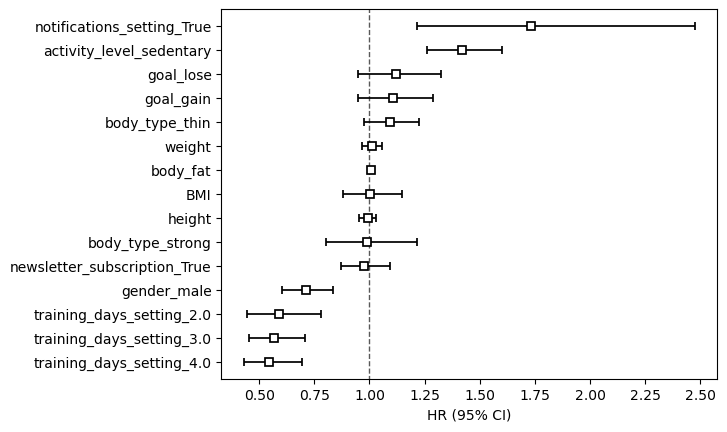

In [449]:
cph_08_demo.plot(hazard_ratios=True)

Now, let's check the predictions but only for first 5 users in the test set. 

In [450]:
cph_08_demo.predict_survival_function(X_test_08.iloc[0:5, :])

56    759   929   1465  111 
1.00   0.80  0.81  0.55  0.75  0.82
2.00   0.68  0.61  0.39  0.75  0.69
3.00   0.59  0.53  0.29  0.75  0.63
4.00   0.51  0.47  0.24  0.75  0.56
5.00   0.44  0.39  0.14  0.75  0.52
6.00   0.37  0.34  0.14  0.62  0.48
7.00   0.34  0.30  0.09  0.62  0.45
8.00   0.30  0.26  0.09  0.50  0.43
9.00   0.27  0.21  0.03  0.50  0.41
10.00  0.22  0.15  0.03  0.50  0.37
11.00  0.18  0.10  0.03  0.38  0.33
12.00  0.14  0.08  0.03  0.27  0.30
13.00  0.11  0.04  0.03  0.27  0.27
14.00  0.09  0.03  0.03  0.27  0.25
15.00  0.07  0.02  0.03  0.27  0.23
16.00  0.04  0.01  0.03  0.27  0.19
17.00  0.04  0.01  0.03  0.27  0.19

<AxesSubplot: >

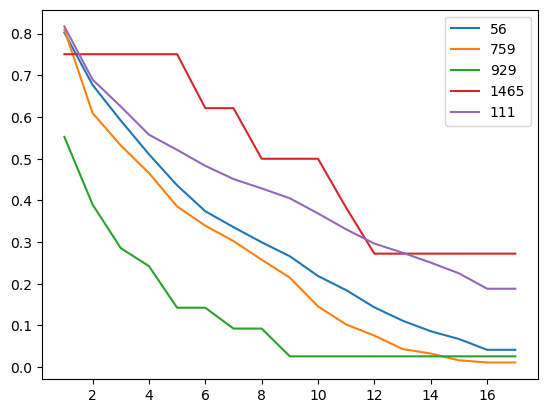

In [451]:
cph_08_demo.predict_survival_function(X_test_08.iloc[0:5, :]).plot()

We can see that user with id 1465 has biggest chances to not drop out and user 759 has the biggest chances to drop out.

Below there are values of partial AIC and log-likelighood. The lower AIC is, the better the model is. Log-likelihood - we want to maximize it (the bigger the better). 

In [452]:
print("Partial AIC is: {} \n Log likelihood score is: {}".format(cph_08_demo.AIC_partial_, cph_08_demo.score(X_test_08)))


Partial AIC is: 16746.958085921313 
 Log likelihood score is: -4.182177496832107


ICI =  0.018322573273553425
E50 =  0.013127540094032886


(<AxesSubplot: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 17 mortality'}, xlabel='Predicted probability of \nt ≤ 17 mortality', ylabel='Observed probability of \nt ≤ 17 mortality'>,
 0.018322573273553425,
 0.013127540094032886)

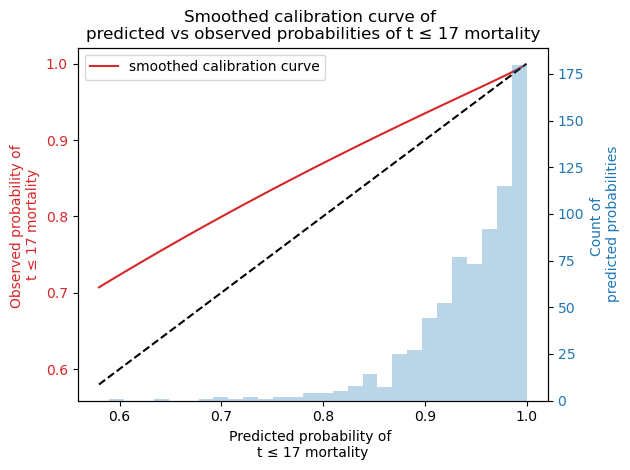

In [453]:
survival_probability_calibration(cph_08_demo, X_test_08, t0=17)

The ICI and E50 values are good, because they are close to 0.

Below there is a predicted median time of dropping out the workouts.

In [454]:
cph_08_demo.predict_median(X_test_08).median()

4.0

In [455]:
pred_cph_08_demo = cph_08_demo.predict_median(X_test_08)

pred_cph_08_demo = pd.DataFrame(pred_cph_08_demo)

value_08 = pred_cph_08_demo[0.5].quantile(0.5)
pred_cph_08_demo = pred_cph_08_demo.replace(np.inf, value_08)


Now time for the MAE. The error is over 3 weeks.

In [456]:
mae(actual_08, pred_cph_08_demo)

3.3513513513513513

Now, we'll check which single variables are the best risk predictors. We will fit a Cox model to each variable individually and record the c-index on the training and test set and compare the results.


In [457]:
cox_demo_ci_08 = c_i_comp_cox(X_train_08, X_test_08)

cox_demo_ci_08.sort_values(by = 'training set', ascending = False)

training set test set
activity_level_sedentary             0.57     0.57
body_fat                             0.56     0.56
gender_male                          0.56     0.53
goal_lose                            0.55     0.53
height                               0.55     0.51
goal_gain                            0.54     0.52
BMI                                  0.54     0.54
activity_level_very active           0.52     0.52
body_type_thin                       0.52     0.50
training_days_setting_3.0            0.52     0.49
training_days_setting_4.0            0.52     0.53
notifications_setting_True           0.51     0.51
body_type_strong                     0.51     0.50
training_days_setting_7.0            0.51     0.51
newsletter_subscription_True         0.50     0.52
weight                               0.50     0.53
training_days_setting_6.0            0.50     0.50
training_days_setting_2.0            0.50     0.50
training_days_setting_5.0            0.49     0.50

Most of the single variables predictors have improved values in test data. Probably, the best variables would be sedentary activity level, body_fat, gender male, goal_lose, height, gain_goal and BMI. 

### Parametric models

Now we will select the model distribution according to the AIC values.

In [123]:
parametric_surv(X_train_08)

AIC
Weibull   8229.51
Lognormal 7974.31
LogLog    8104.02

At the moment, the best distribution for the model is LogNormal. We fit the model to the train data and the summary is given below.

In [124]:
lognormAFT_08 = LogNormalAFTFitter()
lognormAFT_08.fit(X_train_08, duration_col = 'surv_time', event_col = 'cens')
lognormAFT_08.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 1725 total observations, 189 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 1725
number of events observed = 1536
           log-likelihood = -3871.130
         time fit was run = 2023-05-18 08:59:17 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                            
mu_    BMI                          -0.002      0.998      0.057           -0.115            0.110                0.892                1.116
       activity_level_sedentary     -0.259      0.772      0.054           -0.366           -0.152                0.694                0.859
       activity_level_very active    0.145      1.157      0.079           -0.010            0.301                0.990                1.351
       age_in_years                  0.021      1.021      0.003            0.015            0.026                1.016                1.026
       body_fat                     -0.010      0.990      0.004           -0.018           -0.002                0.982                0.998
       body_type_strong              0.066      1.068      0.092           -0.115            0.247                0.892                1.280
       body_type_thin               -0.100      0.905      0.052           -0.201            0.001                0.818                1.001
       gender_male                   0.222      1.249      0.071            0.083            0.361                1.087                1.435
       goal_gain                    -0.028      0.972      0.070           -0.165            0.108                0.848                1.114
       goal_lose                    -0.025      0.976      0.076           -0.174            0.125                0.841                1.133
       height                        0.004      1.004      0.017           -0.029            0.037                0.971                1.038
       newsletter_subscription_True -0.009      0.991      0.053           -0.113            0.094                0.893                1.099
       notifications_setting_True   -0.553      0.575      0.156           -0.859           -0.247                0.423                0.781
       training_days_setting_2.0     0.354      1.425      0.129            0.101            0.607                1.106                1.836
       training_days_setting_3.0     0.360      1.434      0.101            0.162            0.558                1.176                1.747
       training_days_setting_4.0     0.501      1.650      0.107            0.291            0.712                1.337                2.037
       training_days_setting_5.0     0.345      1.412      0.109            0.131            0.559                1.139                1.749
       training_days_setting_6.0     0.188      1.207      0.170           -0.144            0.521                0.866                1.683
       training_days_setting_7.0     0.121      1.128      0.167           -0.207            0.448                0.813                1.565
       weight                       -0.007      0.994      0.020           -0.046            0.033                0.955                1.033
       Intercept                     0.674      1.962      2.859           -4.930            6.278                0.007              532.486
sigma_ Intercept                    -0.058      0.944      0.018           -0.094           -0.022                0.910                0.978

                                      cmp to      z       p   -log2(p)
param  covariate                                                      
mu_    BMI                             0.000 -0.040   0.968      0.046
       activity_level_sedentary        0.000 -4.765 <0.0005     1

In [125]:
X_train_08_02 = X_train_08.copy()

In [126]:
X_train_08_02.drop(['BMI'], axis = 1, inplace = True)

In [130]:
X_train_08_02.drop(['goal_lose'], axis = 1, inplace = True)

In [132]:
X_train_08_02.drop(['goal_gain'], axis = 1, inplace = True)

In [134]:
X_train_08_02.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [136]:
X_train_08_02.drop(['training_days_setting_7.0'], axis = 1, inplace = True)

In [138]:
X_train_08_02.drop(['body_type_strong'], axis = 1, inplace = True)

In [140]:
X_train_08_02.drop(['height'], axis = 1, inplace = True)

In [142]:
X_train_08_02.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

In [144]:
X_train_08_02.drop(['activity_level_very active'], axis = 1, inplace = True)

In [146]:
X_train_08_02.drop(['weight'], axis = 1, inplace = True)

In [148]:
X_train_08_02.drop(['body_type_thin'], axis = 1, inplace = True)

In [128]:
lognormAFT_08_02 = LogNormalAFTFitter()


In [149]:
lognormAFT_08_02.fit(X_train_08_02, duration_col = 'surv_time', event_col = 'cens')
lognormAFT_08_02.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 1725 total observations, 189 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 1725
number of events observed = 1536
           log-likelihood = -3877.658
         time fit was run = 2023-05-18 09:02:28 UTC

---
                                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                          
mu_    activity_level_sedentary   -0.291      0.748      0.053           -0.395           -0.186                0.674                0.830
       age_in_years                0.020      1.021      0.003            0.015            0.026                1.015                1.026
       body_fat                   -0.016      0.985      0.003           -0.021           -0.010                0.979                0.990
       gender_male                 0.208      1.232      0.049            0.113            0.304                1.120                1.355
       notifications_setting_True -0.545      0.580      0.155           -0.848           -0.242                0.428                0.785
       training_days_setting_2.0   0.274      1.316      0.111            0.056            0.493                1.057                1.637
       training_days_setting_3.0   0.284      1.329      0.077            0.133            0.435                1.143                1.545
       training_days_setting_4.0   0.423      1.527      0.085            0.257            0.590                1.293                1.804
       training_days_setting_5.0   0.266      1.304      0.087            0.094            0.437                1.099                1.548
       Intercept                   0.961      2.614      0.206            0.557            1.365                1.746                3.915
sigma_ Intercept                  -0.054      0.948      0.018           -0.089           -0.018                0.915                0.982

                                    cmp to      z       p   -log2(p)
param  covariate                                                    
mu_    activity_level_sedentary      0.000 -5.446 <0.0005     24.212
       age_in_years                  0.000  7.658 <0.0005     45.586
       body_fat                      0.000 -5.224 <0.0005     22.449
       gender_male                   0.000  4.286 <0.0005     15.743
       notifications_setting_True    0.000 -3.527 <0.0005     11.214
       training_days_setting_2.0     0.000  2.461   0.014      6.174
       training_days_setting_3.0     0.000  3.695 <0.0005     12.152
       training_days_setting_4.0     0.000  4.984 <0.0005     20.612
       training_days_setting_5.0     0.000  3.040   0.002      8.725
       Intercept                     0.000  4.666 <0.0005     18.315
sigma_ Intercept                     0.000 -2.945   0.003      8.274
---
Concordance = 0.636
AIC = 7777.316
log-likelihood ratio test = 214.997 on 9 df
-log2(p) of ll-ratio test = 134.962

The CI is the same in both situations. But because in the case when there are no insignificant variables, the AIC is lower, so we will take it into consideration.

Activity level sedentary has negative coefficient. By selecting sedentary activity level, mean/median survival time changes by exp(-0.311) = 0.733 - almost 27% decrease in mean/median survival time.

Activity level very active has positive coefficient. By selecting very active activity level, mean/median survival time changes by exp(0.162) = 1.176 - almost 18% increase in mean/median survival time.

Body fat has negative coefficient. If body fat increases by one unit, the mean/median survival time decreases by 1%.

Thin body type has negative coefficient. By selecting very thin body type, mean/median survival time changes by exp(-0.110) = 0.896 - 10% decrease in mean/median survival time.

Gender male has positive coefficient. This means that by selecting goal of losing weight, mean/median survival time changes by exp(0.342) = 1.408 - almost 41% increase in mean/median survival time.

Variable notification settings true has negative coefficient. By selecting true on notification settings, mean/median survival time changes by exp(-0.604) = 0.547 - 45% decrease in mean/median survival time.

Training days set at 2 days a week has positive coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(0.377) = 1.458 - 46% increase in mean/median survival time.

Training days set at 3 days a week has positive coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(0.327) = 1.387 - 39% increase in mean/median survival time.

Training days set at 4 days a week has positive coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(0.382) = 1.465 - 47% increase in mean/median survival time.

Training days set at 5 days a week has positive coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(0.222) = 1.249 - 25% increase in mean/median survival time.

Weight has negative coefficient. If weight increases by one unit, the mean/median survival time decreases by 0.5%.

Below we can plot the ranking of variables in terms of their log(accelerated failure rate).

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

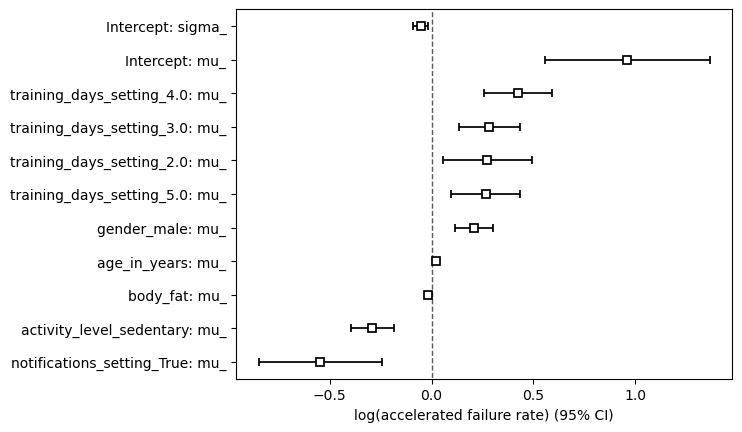

In [150]:
lognormAFT_08_02.plot()

In [151]:
X_test_08_02 = X_test_08.copy()
X_test_08_02 = X_test_08.loc[:, X_train_08_02.columns]

Below there are predictions for the 5 users and their survival function prediction.

In [152]:
lognormAFT_08_02.predict_survival_function(X_test_08_02.iloc[0:5, :])

111   759   929   56    1465
1.00   0.96  0.98  0.94  0.91  0.96
2.00   0.85  0.90  0.81  0.73  0.84
3.00   0.73  0.80  0.67  0.57  0.72
4.00   0.62  0.71  0.55  0.45  0.60
5.00   0.53  0.62  0.46  0.36  0.51
6.00   0.45  0.55  0.38  0.29  0.44
7.00   0.39  0.48  0.32  0.24  0.37
8.00   0.34  0.43  0.28  0.20  0.32
9.00   0.29  0.38  0.24  0.16  0.28
10.00  0.25  0.34  0.20  0.14  0.24
11.00  0.22  0.30  0.18  0.12  0.21
12.00  0.20  0.27  0.15  0.10  0.19
13.00  0.17  0.24  0.13  0.09  0.16
14.00  0.16  0.22  0.12  0.07  0.15
15.00  0.14  0.20  0.10  0.06  0.13
16.00  0.12  0.18  0.09  0.06  0.12
17.00  0.11  0.16  0.08  0.05  0.10

<Axes: >

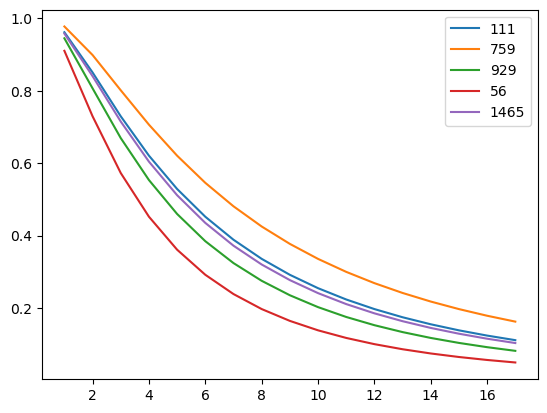

In [153]:
lognormAFT_08_02.predict_survival_function(X_test_08_02.iloc[0:5, :]).plot()

In [154]:
df_users_till_08_demo_2.iloc[[111,759,929,56,1465], :]

gender  height  weight activity_level  goal body_type  body_fat  \
111    male  168.00   64.00         active  gain    strong     15.00   
759    male  183.00   77.00    very active  gain      thin     20.00   
929    male  178.00   75.00      sedentary  lose      thin     20.00   
56     male  177.00   73.00         active  gain      thin     20.00   
1465   male  187.00   75.00         active  gain      thin     15.00   

     newsletter_subscription notifications_setting  training_days_setting  \
111                     True                  True                   5.00   
759                     True                  True                   4.00   
929                     True                  True                   5.00   
56                      True                  True                   5.00   
1465                    True                  True                   5.00   

       BMI cluster  age_in_years  cens  surv_time  
111  22.68       7         50.00     0         17  
759  22.99       2         57.00     1          2  
929  23.67       2         60.00     1          2  
56   23.30       2         34.00     0         17  
1465 21.45       2         48.00     0         11

Looking at the prediction plots, user 111 has almost the highest chances of survival and users 929 have the lowest chances of survival. 

In [156]:
print("AIC is: {} \n Log likelihood score is: {}".format(lognormAFT_08_02.AIC_, lognormAFT_08_02.score(X_test_08_02)))


AIC is: 7777.315546657515 
 Log likelihood score is: -2.2681219932927554


The values of ICI and E50 of calibration are close to  0, so they're good.

ICI =  0.9465632297867931
E50 =  0.954556765929653


(<Axes: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 17 mortality'}, xlabel='Predicted probability of \nt ≤ 17 mortality', ylabel='Observed probability of \nt ≤ 17 mortality'>,
 0.9465632297867931,
 0.954556765929653)

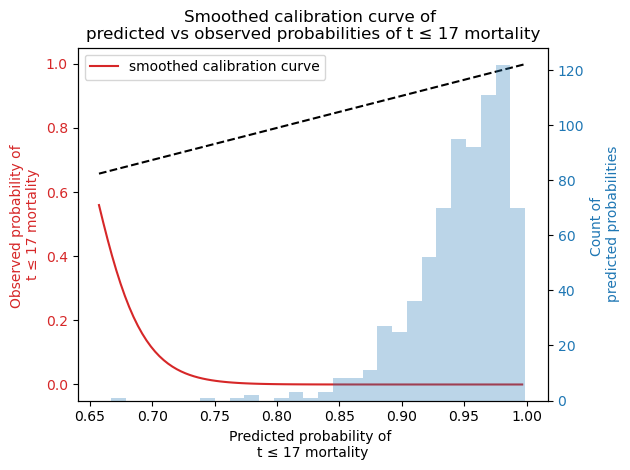

In [157]:
survival_probability_calibration(lognormAFT_08_02, X_test_08_02, t0=17)

Median predicted survival time (time of not dropping out) is almost 3.5 weeks. 

In [158]:
lognormAFT_08_02.predict_median(X_test_08_02).median()

3.423623974786442

Now, it's time to calculate MAE. 

In [159]:
pred_08_02 = lognormAFT_08_02.predict_median(X_test_08_02)
mae(actual_08, pred_08_02)

3.141368932125613

In [160]:
pred_08_02

111    5.36
759    6.69
929    4.54
56     3.57
1465   5.14
       ... 
1749   2.28
63     4.74
952    2.31
1023   3.31
343    3.61
Length: 740, dtype: float64

MAE value is over 3 weeks, so according to the 17 weeks time, the error is not that big.

We can use our fitted model to see how the survival changes as we change the covariate values. Here, I have used the method to see how the survival varies among 0, 15, 30 and 45 percent of body fat for users compared to their baseline. The plots doesn't show much differences between groups and survival probability (the bigger body fat, the lower survival probability is).

<Axes: >

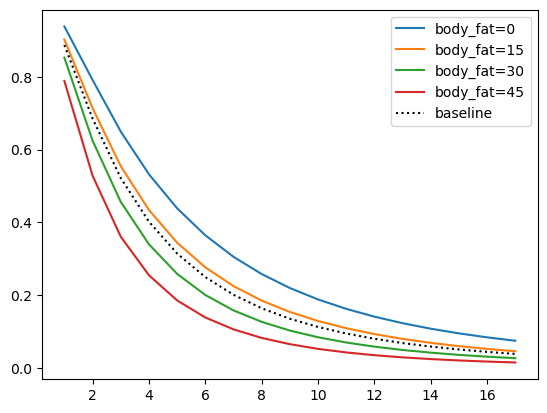

In [161]:
lognormAFT_08_02.plot_partial_effects_on_outcome('body_fat', range(0,60,15))

Below we can look which variables may have the biggest influence on model.

In [162]:
c_i_aic_comp_param(X_train_08_02, X_test_08_02, model = 'lognormal').sort_values(by='CI training set', ascending=False)

CI training set CI test set     AIC
age_in_years                          0.57        0.57 7916.02
activity_level_sedentary              0.56        0.59 7905.33
body_fat                              0.56        0.56 7931.79
gender_male                           0.55        0.55 7939.93
training_days_setting_4.0             0.53        0.50 7963.04
training_days_setting_3.0             0.51        0.51 7975.21
notifications_setting_True            0.51        0.51 7962.60
training_days_setting_5.0             0.51        0.51 7975.96
training_days_setting_2.0             0.50        0.51 7976.27

## Observation until 08/2022 - second approach on censoring

In [163]:
df_users_till_08_demo2_2 = df_users_till_08_demo_2.copy()
df_users_till_08_demo2_2.drop(['cluster'], axis = 1, inplace = True)

df_users_till_08_demo2_2['cens'] = df_users_till_08_demo2_2['cens'].astype('int64')

df_users_till_08_demo2_2['training_days_setting'] = df_users_till_08_demo2_2['training_days_setting'].astype('category')

df_users_till_08_demo_dummies_2 = pd.get_dummies(df_users_till_08_demo2_2, drop_first = True)

df_users_till_08_demo2_2['cens'] = df_users_till_08_demo2_2['cens'].astype('category')

X_train_08_2, X_test_08_2 = train_test_split(df_users_till_08_demo_dummies_2, test_size = 0.3, random_state = 42)

actual_08_2 = X_test_08_2['surv_time'].astype('int64')

print('Number of non censored useres in train set: {} (the event happened)'.format(X_train_08_2['cens'].sum()), '\n',
      'Number of censored users in train set: {} (the event did not happened)'.format(len(X_train_08_2) - X_train_08_2['cens'].sum()))

print('Number of non censored useres in test set: {} (the event happened)'.format(X_test_08_2['cens'].sum()), '\n',
      'Number of censored users in test set: {} (the event did not happened)'.format(len(X_test_08_2) - X_test_08_2['cens'].sum()))

Number of non censored useres in train set: 1350 (the event happened) 
 Number of censored users in train set: 375 (the event did not happened)
Number of non censored useres in test set: 569 (the event happened) 
 Number of censored users in test set: 171 (the event did not happened)


### Kaplan-Meier Estimators

#### All

Median survival time is 3.0 
 Survival function takes estimates for each time point 
           Kaplan Meier Estimate
timeline                       
0.00                       1.00
1.00                       0.72
2.00                       0.56
3.00                       0.48
4.00                       0.42
5.00                       0.36
6.00                       0.32
7.00                       0.29
8.00                       0.26
9.00                       0.23
10.00                      0.20
11.00                      0.18
12.00                      0.16
13.00                      0.16
14.00                      0.16
15.00                      0.16
16.00                      0.16
17.00                      0.16


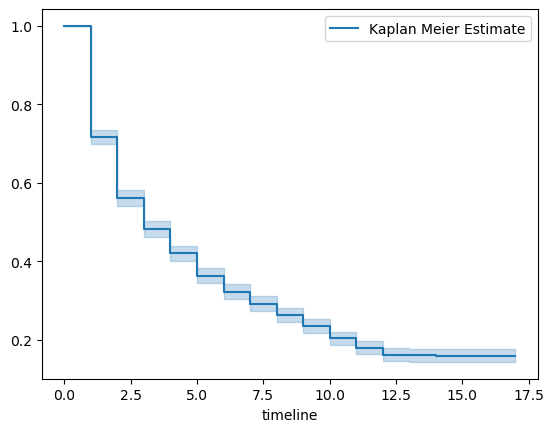

In [484]:
kmf_08_all2 = km_simple(df_users_till_08_demo_2)

The probability that the user didn't stop working out in a first week is 0.72, in the second week it's 0.56, third - 0.48, fourth - 0.42, fifth - 0.36, sixth - 0.32, seventh - 0.29, eighth - 0.26, ninth - 0.23, tenth - 0.18, eleventh - 0.18, and from twelfth to 17th - 0.16. The median survival time is 3 weeks.

#### By gender

Median survival time for female is 2.0
Survival function for female estimates: 
           female
timeline        
0.00        1.00
1.00        0.66
2.00        0.49
3.00        0.41
4.00        0.34
5.00        0.28
6.00        0.24
7.00        0.22
8.00        0.18
9.00        0.16
10.00       0.13
11.00       0.12
12.00       0.11
13.00       0.11
14.00       0.11
15.00       0.11
16.00       0.11
17.00       0.11
Median survival time for male is 4.0
Survival function for male estimates: 
           male
timeline      
0.00      1.00
1.00      0.75
2.00      0.61
3.00      0.53
4.00      0.47
5.00      0.42
6.00      0.37
7.00      0.34
8.00      0.31
9.00      0.28
10.00     0.24
11.00     0.21
12.00     0.19
13.00     0.19
14.00     0.19
15.00     0.19
16.00     0.19
17.00     0.19


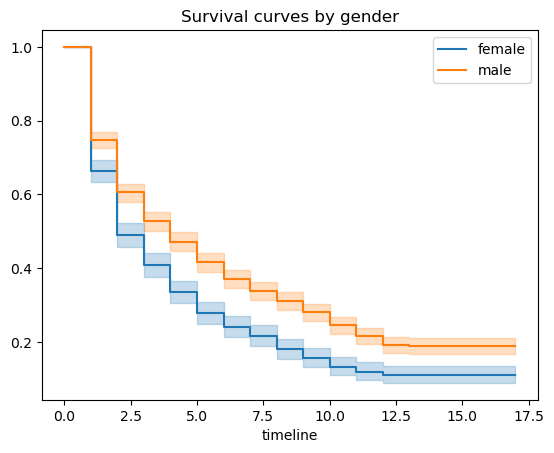

(<lifelines.KaplanMeierFitter:"male", fitted with 1515 total observations, 368 right-censored observations>,
 None)

In [485]:
kaplan_meier_by_cat(df_users_till_08_demo_2, 'gender')

In [486]:
km_logrank_test(df_users_till_08_demo_2, 'gender')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          51.46 <0.005     40.31

By logrank test, it is seen that there are differences between groups in survival curves in gender. For female median survival times is 2 weeks, and for male it is 4 weeks.

#### By activity level

Median survival time for active is 4.0
Survival function for active estimates: 
           active
timeline        
0.00        1.00
1.00        0.75
2.00        0.62
3.00        0.54
4.00        0.47
5.00        0.41
6.00        0.36
7.00        0.32
8.00        0.29
9.00        0.27
10.00       0.24
11.00       0.21
12.00       0.19
13.00       0.19
14.00       0.19
15.00       0.19
16.00       0.19
17.00       0.19
Median survival time for sedentary is 2.0
Survival function for sedentary estimates: 
           sedentary
timeline           
0.00           1.00
1.00           0.62
2.00           0.42
3.00           0.33
4.00           0.28
5.00           0.24
6.00           0.21
7.00           0.19
8.00           0.16
9.00           0.13
10.00          0.11
11.00          0.09
12.00          0.08
13.00          0.08
14.00          0.08
15.00          0.08
16.00          0.08
17.00          0.08
Median survival time for very active is 6.0
Survival function for very active estimates: 
  

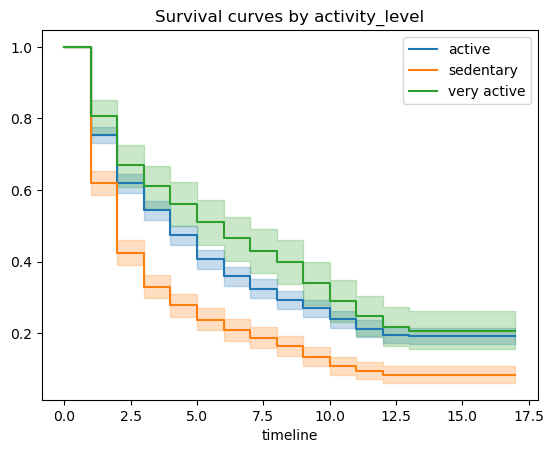

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                       test_statistic      p  -log2(p)
active    sedentary             89.78 <0.005     68.35
          very active            4.04   0.04      4.49
sedentary very active           59.75 <0.005     46.40

In [487]:
kaplan_meier_by_cat(df_users_till_08_demo_2, 'activity_level')

km_logrank_test(df_users_till_08_demo_2, 'activity_level')

There are significant differences between survival curves of activity level groups. In active vs sedentary and sedentary vs very active, p-value is less than 0.05. For pair active and very active the value is borderline.

For sedentary group, median survival time is 2 weeks, for active group - 4 weeks and very active group the median of survival time is 6 weeks.

#### By goal

Median survival time for lose is 2.0
Survival function for lose estimates: 
           lose
timeline      
0.00      1.00
1.00      0.67
2.00      0.49
3.00      0.40
4.00      0.34
5.00      0.28
6.00      0.25
7.00      0.22
8.00      0.20
9.00      0.18
10.00     0.15
11.00     0.14
12.00     0.12
13.00     0.12
14.00     0.12
15.00     0.12
16.00     0.12
17.00     0.12
Median survival time for gain is 4.0
Survival function for gain estimates: 
           gain
timeline      
0.00      1.00
1.00      0.74
2.00      0.60
3.00      0.53
4.00      0.48
5.00      0.43
6.00      0.38
7.00      0.34
8.00      0.31
9.00      0.28
10.00     0.25
11.00     0.21
12.00     0.19
13.00     0.19
14.00     0.19
15.00     0.19
16.00     0.19
17.00     0.19
Median survival time for antiaging is 4.0
Survival function for antiaging estimates: 
           antiaging
timeline           
0.00           1.00
1.00           0.77
2.00           0.62
3.00           0.54
4.00           0.44
5.00           0.38

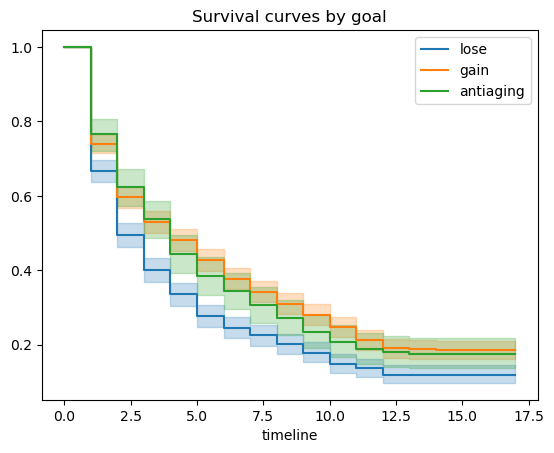

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                test_statistic      p  -log2(p)
antiaging gain            0.48   0.49      1.03
          lose           15.04 <0.005     13.21
gain      lose           38.29 <0.005     30.61

In [488]:
kaplan_meier_by_cat(df_users_till_08_demo_2, 'goal')

km_logrank_test(df_users_till_08_demo_2, 'goal')

There are differences between survival curves of antiaging and lose groups and gain and lose groups. Groups antiaging and gain have not difference of survival curves (p = 0.49).

For gain and antiaging group, survival time median is 4 weeks. For lose group, survival time median is 2 weeks.

#### By body type

Median survival time for mid is 3.0
Survival function for mid estimates: 
           mid
timeline     
0.00     1.00
1.00     0.75
2.00     0.59
3.00     0.50
4.00     0.44
5.00     0.38
6.00     0.33
7.00     0.30
8.00     0.27
9.00     0.25
10.00    0.21
11.00    0.18
12.00    0.16
13.00    0.16
14.00    0.16
15.00    0.16
16.00    0.16
17.00    0.16
Median survival time for thin is 3.0
Survival function for thin estimates: 
           thin
timeline      
0.00      1.00
1.00      0.69
2.00      0.54
3.00      0.48
4.00      0.40
5.00      0.36
6.00      0.32
7.00      0.29
8.00      0.26
9.00      0.23
10.00     0.20
11.00     0.18
12.00     0.17
13.00     0.16
14.00     0.16
15.00     0.16
16.00     0.16
17.00     0.16
Median survival time for strong is 2.0
Survival function for strong estimates: 
           strong
timeline        
0.00        1.00
1.00        0.67
2.00        0.50
3.00        0.42
4.00        0.38
5.00        0.31
6.00        0.27
7.00        0.24
8.00        0.22


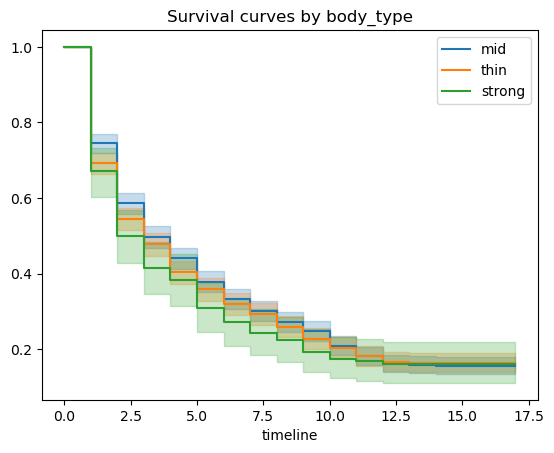

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
               test_statistic    p  -log2(p)
mid    strong            2.27 0.13      2.93
       thin              0.92 0.34      1.57
strong thin              0.90 0.34      1.54

In [489]:
kaplan_meier_by_cat(df_users_till_08_demo_2, 'body_type')

km_logrank_test(df_users_till_08_demo_2, 'body_type')

There is no statistically significant difference between groups.

Median time for mid and thin group is 3 weeks and for strong is 2 weeks.

#### By newsletter subscription

Median survival time for False is 3.0
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.70
2.00       0.54
3.00       0.47
4.00       0.41
5.00       0.35
6.00       0.31
7.00       0.28
8.00       0.26
9.00       0.23
10.00      0.21
11.00      0.18
12.00      0.16
13.00      0.16
14.00      0.16
15.00      0.16
16.00      0.16
17.00      0.16
Median survival time for True is 3.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.72
2.00      0.57
3.00      0.49
4.00      0.43
5.00      0.37
6.00      0.33
7.00      0.30
8.00      0.27
9.00      0.24
10.00     0.20
11.00     0.18
12.00     0.16
13.00     0.16
14.00     0.16
15.00     0.16
16.00     0.16
17.00     0.16


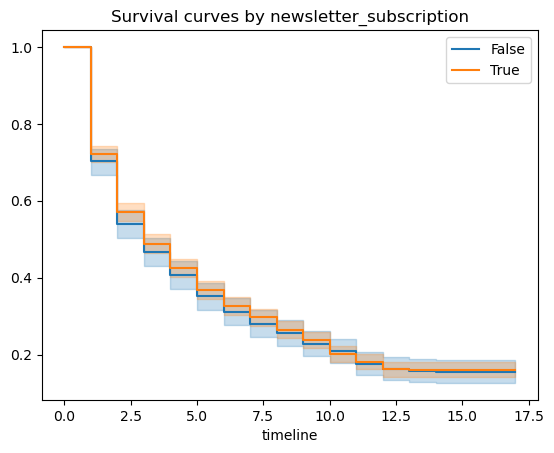

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.59 0.44      1.18

In [490]:
kaplan_meier_by_cat(df_users_till_08_demo_2, 'newsletter_subscription')

km_logrank_test(df_users_till_08_demo_2, 'newsletter_subscription')

There is no statistical difference between groups.

#### By notification settings

Median survival time for True is 3.0
Survival function for True estimates: 
           True
timeline      
0.00      1.00
1.00      0.71
2.00      0.56
3.00      0.48
4.00      0.41
5.00      0.36
6.00      0.32
7.00      0.29
8.00      0.26
9.00      0.23
10.00     0.20
11.00     0.18
12.00     0.16
13.00     0.16
14.00     0.16
15.00     0.16
16.00     0.16
17.00     0.16
Median survival time for False is 8.0
Survival function for False estimates: 
           False
timeline       
0.00       1.00
1.00       0.85
2.00       0.78
3.00       0.73
4.00       0.69
5.00       0.61
6.00       0.59
7.00       0.51
8.00       0.47
9.00       0.43
10.00      0.38
11.00      0.33
12.00      0.26
15.00      0.26
16.00      0.26
17.00      0.26


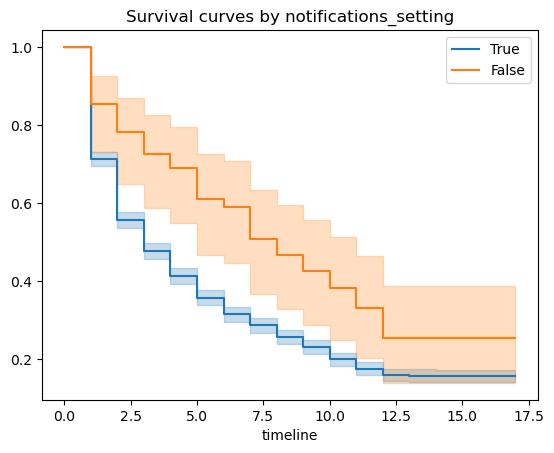

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           9.84 <0.005      9.19

In [491]:
kaplan_meier_by_cat(df_users_till_08_demo_2, 'notifications_setting')

km_logrank_test(df_users_till_08_demo_2, 'notifications_setting')

There are differences between survival curves in newsletter subscription (p < 0.005).

For true group, median survival time is 3 weeks, for false group median survival time is 8 weeks.

#### By training days setting 

Median survival time for 3.0 is 3.0
Survival function for 3.0 estimates: 
           3.00
timeline      
0.00      1.00
1.00      0.74
2.00      0.58
3.00      0.49
4.00      0.43
5.00      0.37
6.00      0.33
7.00      0.31
8.00      0.27
9.00      0.24
10.00     0.20
11.00     0.19
12.00     0.17
13.00     0.17
14.00     0.17
15.00     0.17
16.00     0.17
17.00     0.17
Median survival time for 4.0 is 4.0
Survival function for 4.0 estimates: 
           4.00
timeline      
0.00      1.00
1.00      0.76
2.00      0.63
3.00      0.55
4.00      0.49
5.00      0.42
6.00      0.38
7.00      0.33
8.00      0.31
9.00      0.28
10.00     0.25
11.00     0.20
12.00     0.17
13.00     0.17
14.00     0.17
15.00     0.17
16.00     0.17
17.00     0.17
Median survival time for 5.0 is 3.0
Survival function for 5.0 estimates: 
           5.00
timeline      
0.00      1.00
1.00      0.69
2.00      0.52
3.00      0.45
4.00      0.39
5.00      0.35
6.00      0.31
7.00      0.28
8.00      0.26
9.00      

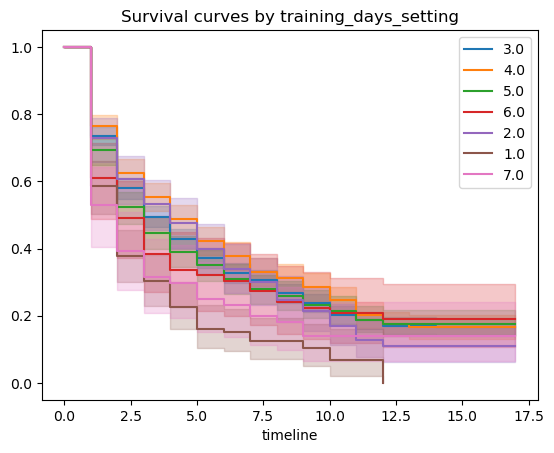

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
           test_statistic      p  -log2(p)
1.00 2.00           20.23 <0.005     17.15
     3.00           30.52 <0.005     24.85
     4.00           41.44 <0.005     32.93
     5.00           17.65 <0.005     15.20
     6.00            5.06   0.02      5.35
     7.00            0.90   0.34      1.54
2.00 3.00            0.25   0.62      0.70
     4.00            2.23   0.13      2.89
     5.00            0.00   1.00      0.00
     6.00            0.04   0.85      0.24
     7.00            2.92   0.09      3.51
3.00 4.00            2.09   0.15      2.75
     5.00            0.55   0.46      1.12
     6.00            0.54   0.46      1.11
     7.00            5.71   0.02      5.89
4.00 5.00            3.11   0.08      3.69
     6.00            1.44   0.23      2.12
     7.00            8.39 <0.005      8.05
5.00 6.00            0.13   0.71      0.49
     7.00            3.38   0.07      3.92
6.00 7.00            1.08   0.30      1.75

In [492]:
kaplan_meier_by_cat(df_users_till_08_demo_2, 'training_days_setting')

km_logrank_test(df_users_till_08_demo_2, 'training_days_setting')

The are differences between survival curves for days 1 and 2, 1 and 3, 1 and 4, 1 and 5, 1 and 6, 3 and 7 (borderline) and 4 and 7.

Median survival time for each training days setting is:
* 3 weeks for training days setting 3, 5,
* 2 weeks for training days setting 1, 6, 7,
* 4 week for training days setting 2 and 4.

#### By clusters for gender, body_type, newsletter_subscription and BMI

Median survival time for 9 is 2.0
Survival function for 9 estimates: 
             9
timeline     
0.00     1.00
1.00     0.70
2.00     0.50
3.00     0.39
4.00     0.33
5.00     0.29
6.00     0.25
7.00     0.23
8.00     0.19
9.00     0.15
10.00    0.13
11.00    0.13
13.00    0.13
14.00    0.13
16.00    0.13
17.00    0.13
Median survival time for 5 is 4.0
Survival function for 5 estimates: 
             5
timeline     
0.00     1.00
1.00     0.72
2.00     0.58
3.00     0.52
4.00     0.45
5.00     0.41
6.00     0.37
7.00     0.35
8.00     0.30
9.00     0.27
10.00    0.22
11.00    0.21
12.00    0.18
13.00    0.18
14.00    0.18
15.00    0.18
16.00    0.18
17.00    0.18
Median survival time for 4 is 3.0
Survival function for 4 estimates: 
             4
timeline     
0.00     1.00
1.00     0.67
2.00     0.52
3.00     0.45
4.00     0.37
5.00     0.32
6.00     0.27
7.00     0.25
8.00     0.22
9.00     0.19
10.00    0.18
11.00    0.15
12.00    0.15
13.00    0.15
14.00    0.15
15.00    0.15
16.

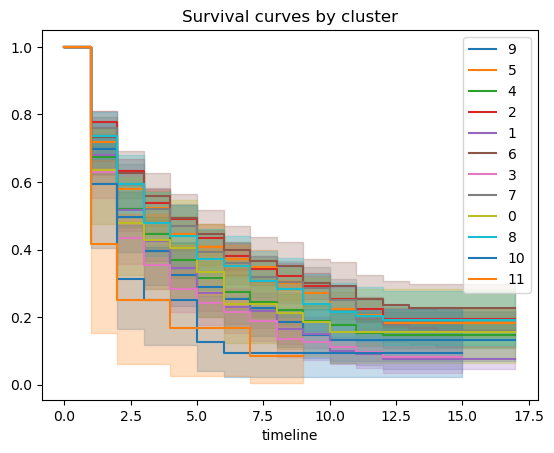

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
       test_statistic      p  -log2(p)
0  1             0.50   0.48      1.06
   2             2.75   0.10      3.36
   3             1.12   0.29      1.79
   4             0.01   0.91      0.14
   5             1.37   0.24      2.05
   6             2.86   0.09      3.46
   7             1.33   0.25      2.00
   8             0.88   0.35      1.52
   9             0.04   0.84      0.26
   10            1.92   0.17      2.59
   11            1.93   0.17      2.60
1  2            26.70 <0.005     22.00
   3             0.97   0.33      1.62
   4             2.40   0.12      3.04
   5            14.45 <0.005     12.76
   6            18.44 <0.005     15.80
   7            12.39 <0.005     11.18
   8             6.38   0.01      6.44
   9             0.26   0.61      0.72
   10            1.60   0.21      2.28
   11            2.34   0.13      2.98
2  3            27.13 <0.005     22.33
   4            12.19 <0.005     11.03
   5             0.89   0.35      1.53
   6             0.30   0.58      0.77
   7             0.72   0.39      1.34
   8             0.57   0.45      1.16
   9             7.57   0.01      7.40
   10           11.39 <0.005     10.41
   11            7.84   0.01      7.61
3  4             4.40   0.04      4.80
   5            15.76 <0.005     13.77
   6            18.91 <0.005     16.16
   7            14.58 <0.005     12.86
   8             8.03 <0.005      7.76
   9             1.26   0.26      1.93
   10            0.61   0.43      1.21
   11            1.17   0.28      1.84
4  5             4.86   0.03      5.18
   6             8.35 <0.005      8.02
   7             3.97   0.05      4.43
   8             1.77   0.18      2.45
   9             0.26   0.61      0.72
   10            3.65   0.06      4.15
   11            2.92   0.09      3.52
5  6             1.32   0.25      1.99
   7             0.00   0.99      0.01
   8             0.03   0.87      0.19
   9             3.90   0.05      4.37
   10            7.75   0.01      7.54
   11            5.72   0.02      5.90
6  7             1.20   0.27      1.87
   8             0.98   0.32      1.64
   9             6.71   0.01      6.71
   10           10.29 <0.005      9.55
   11            6.75   0.01      6.74
7  8             0.01   0.90      0.15
   9             3.66   0.06      4.17
   10            7.61   0.01      7.43
   11            6.45   0.01      6.49
8  9             2.22   0.14      2.87
   10            6.16   0.01      6.25
   11            4.80   0.03      5.13
9  10            2.21   0.14      2.87
   11            2.09   0.15      2.75
10 11            0.21   0.65      0.63

In [493]:
kaplan_meier_by_cat(df_users_till_08_demo_2, 'cluster')

km_logrank_test(df_users_till_08_demo_2, 'cluster')

There are differences between survival curves for clusters 1 and 2, 1 and 5, 1 and 6, 1 and 7, 1 and 8, 2 and 3, 2 and 4, 2 and 9, 2 and 10, 2 and 11, 3 and 4, 3 and 5, 3 and 6, 3 and 7, 3 and 8, 4 and 5, 4 and 6, 5 and 10, 5 and 11, 6 and 9, 6 and 10, 6 and 11, 7 and 10, 7 and 11, 8 and 10, 8 and 11.

Median survival times are:
* 1 week for cluster 11,
* 2 weeks for cluster 9, 3, 0, 10,  
* 3 weeks for cluster 4, 1, 8, 
* 4 weeks for cluster 5, 2, 6, 7.

### Cox PH regression

In [494]:
cph_08_demo_02 = cox_model(X_train_08_2, summary = False)

In [495]:
cph_08_demo_02.check_assumptions(X_train_08_2, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1725 total observations, 387 right-censored observations>
         test_name = proportional_hazard_test

---
                                   test_statistic    p  -log2(p)
BMI                          km              0.21 0.64      0.64
                             rank            0.12 0.73      0.46
activity_level_sedentary     km              1.49 0.22      2.17
                             rank            1.06 0.30      1.72
activity_level_very active   km              5.80 0.02      5.96
                             rank            4.56 0.03      4.93
body_fat                     km              0.00 0.98      0.02
                             rank            0.01 0.94      0.09
body_type_strong             km              2.24 0.13      2.89
                             rank            2.05 0.15      2.71
body_type_thin               km              3.60 0.06      4.12
                             rank            3.27 0.07      3.83
gender_male                  km              0.21 0.65      0.62
                             rank            0.22 0.64      0.64
goal_gain                    km              1.03 0.31      1.68
                             rank            1.19 0.28      1.86
goal_lose                    km              5.40 0.02      5.64
                             rank            5.04 0.02      5.33
height                       km              0.52 0.47      1.09
                             rank            0.35 0.56      0.85
newsletter_subscription_True km              0.82 0.36      1.46
                             rank            0.37 0.54      0.89
notifications_setting_True   km              3.90 0.05      4.37
                             rank            3.10 0.08      3.68
training_days_setting_2.0    km              0.71 0.40      1.32
                             rank            0.30 0.59      0.77
training_days_setting_3.0    km              0.25 0.61      0.70
                             rank            0.08 0.77      0.37
training_days_setting_4.0    km              0.09 0.77      0.38
                             rank            0.13 0.71      0.49
training_days_setting_5.0    km              3.29 0.07      3.84
                             rank            2.89 0.09      3.49
training_days_setting_6.0    km              3.78 0.05      4.27
                             rank            2.47 0.12      3.10
training_days_setting_7.0    km              3.60 0.06      4.11
                             rank            3.81 0.05      4.29
weight                       km              0.59 0.44      1.18
                             rank            0.47 0.49      1.02



1. Variable 'activity_level_very active' failed the non-proportional test: p-value is 0.0161.

   Advice: with so few unique values (only 2), you can include `strata=['activity_level_very
active', ...]` in the call in `.fit`. See documentation in link [E] below.

2. Variable 'goal_lose' failed the non-proportional test: p-value is 0.0201.

   Advice: with so few unique values (only 2), you can include `strata=['goal_lose', ...]` in the
call in `.fit`. See documentation in link [E] below.

3. Variable 'notifications_setting_True' failed the non-proportional test: p-value is 0.0484.

   Advice: with so few unique values (only 2), you can include
`strata=['notifications_setting_True', ...]` in the call in `.fit`. See documentation in link [E]
below.

4. Variable 'training_days_setting_6.0' failed the non-proportional test: p-value is 0.0517.

   Advice: with so few unique values (only 2), you can include `strata=['training_days_setting_6.0',
...]` in the call in `.fit`. See documentatio

[]

Now we get the data from assumptions check to strata and again fit the data and check assumptions.

In [496]:
cph_08_demo_02.fit(X_train_08_2, duration_col = 'surv_time', event_col = 'cens', strata = ['notifications_setting_True',
                                                                                      'training_days_setting_6.0',
                                                                                      'training_days_setting_7.0',
                                                                                    'activity_level_very active',
                                                                                     'goal_lose'])

<lifelines.CoxPHFitter: fitted with 1725 total observations, 387 right-censored observations>

In [497]:
cph_08_demo_02.check_assumptions(X_train_08_2)

Proportional hazard assumption looks okay.


[]

Below there is summary of the fitted model.

In [498]:
cph_08_demo_02.print_summary()

<lifelines.CoxPHFitter: fitted with 1725 total observations, 387 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
                   strata = ['notifications_setting_True', 'training_days_setting_6.0', 'training_days_setting_7.0', 'activity_level_very active', 'goal_lose']
      baseline estimation = breslow
   number of observations = 1725
number of events observed = 1338
   partial log-likelihood = -7221.52
         time fit was run = 2023-05-11 08:05:45 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
height                        -0.01       0.99       0.02            -0.05             0.03                 0.95                 1.03
weight                         0.01       1.01       0.02            -0.03             0.06                 0.97                 1.06
body_fat                       0.01       1.01       0.00            -0.00             0.02                 1.00                 1.02
BMI                           -0.00       1.00       0.07            -0.14             0.14                 0.87                 1.15
gender_male                   -0.36       0.70       0.09            -0.53            -0.19                 0.59                 0.83
activity_level_sedentary       0.29       1.34       0.06             0.16             0.42                 1.18                 1.52
goal_gain                      0.04       1.05       0.08            -0.12             0.21                 0.89                 1.23
body_type_strong              -0.04       0.96       0.11            -0.26             0.18                 0.77                 1.20
body_type_thin                 0.09       1.09       0.06            -0.03             0.21                 0.97                 1.24
newsletter_subscription_True  -0.01       0.99       0.06            -0.13             0.11                 0.88                 1.12
training_days_setting_2.0     -0.48       0.62       0.15            -0.77            -0.19                 0.46                 0.83
training_days_setting_3.0     -0.50       0.61       0.12            -0.73            -0.27                 0.48                 0.76
training_days_setting_4.0     -0.54       0.58       0.13            -0.78            -0.29                 0.46                 0.75
training_days_setting_5.0     -0.39       0.68       0.13            -0.64            -0.13                 0.53                 0.88

                               cmp to     z      p   -log2(p)
covariate                                                    
height                           0.00 -0.55   0.58       0.77
weight                           0.00  0.59   0.55       0.85
body_fat                         0.00  1.52   0.13       2.95
BMI                              0.00 -0.03   0.98       0.03
gender_male                      0.00 -4.13 <0.005      14.74
activity_level_sedentary         0.00  4.50 <0.005      17.19
goal_gain                        0.00  0.54   0.59       0.76
body_type_strong                 0.00 -0.36   0.72       0.48
body_type_thin                   0.00  1.45   0.15       2.76
newsletter_subscription_True     0.00 -0.12   0.90       0.15
training_days_setting_2.0        0.00 -3.24 <0.005       9.69
training_days_setting_3.0        0.00 -4.23 <0.005      15.41
training_days_setting_4.0        0.00 -4.30 <0.005      15.81
training_days_setting_5.0        0.00 -2.97 <0.005       8.40
---
Concordance = 0.60
Partial AIC = 14471.05
log-likelihood ratio test = 110.11 on 14 df
-log2(p) of ll-ratio test = 54.06

In [499]:
X_train_08_2_2 = X_train_08_2.copy()

In [500]:
X_train_08_2_2.drop(['BMI'], axis = 1, inplace = True)

In [501]:
X_train_08_2_2.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [502]:
X_train_08_2_2.drop(['body_type_strong'], axis = 1, inplace = True)

In [503]:
X_train_08_2_2.drop(['goal_gain'], axis = 1, inplace = True)

In [504]:
X_train_08_2_2.drop(['body_type_thin', 'body_fat'], axis = 1, inplace = True)

In [505]:
cph_08_demo_02.fit(X_train_08_2_2, duration_col = 'surv_time', event_col = 'cens', strata = ['notifications_setting_True',
                                                                                      'training_days_setting_6.0',
                                                                                      'training_days_setting_7.0',
                                                                                    'activity_level_very active',
                                                                                     'goal_lose'])
cph_08_demo_02.print_summary()

<lifelines.CoxPHFitter: fitted with 1725 total observations, 387 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
                   strata = ['notifications_setting_True', 'training_days_setting_6.0', 'training_days_setting_7.0', 'activity_level_very active', 'goal_lose']
      baseline estimation = breslow
   number of observations = 1725
number of events observed = 1338
   partial log-likelihood = -7224.12
         time fit was run = 2023-05-11 08:05:49 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
height                     -0.01       0.99       0.00            -0.02            -0.00                 0.98                 1.00
weight                      0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
gender_male                -0.38       0.69       0.09            -0.54            -0.21                 0.58                 0.81
activity_level_sedentary    0.31       1.37       0.06             0.19             0.44                 1.21                 1.55
training_days_setting_2.0  -0.49       0.61       0.15            -0.78            -0.21                 0.46                 0.81
training_days_setting_3.0  -0.50       0.61       0.12            -0.73            -0.27                 0.48                 0.76
training_days_setting_4.0  -0.54       0.58       0.12            -0.78            -0.30                 0.46                 0.74
training_days_setting_5.0  -0.40       0.67       0.13            -0.65            -0.15                 0.52                 0.86

                            cmp to     z      p   -log2(p)
covariate                                                 
height                        0.00 -2.36   0.02       5.78
weight                        0.00  4.81 <0.005      19.31
gender_male                   0.00 -4.38 <0.005      16.34
activity_level_sedentary      0.00  4.92 <0.005      20.17
training_days_setting_2.0     0.00 -3.36 <0.005      10.30
training_days_setting_3.0     0.00 -4.29 <0.005      15.77
training_days_setting_4.0     0.00 -4.38 <0.005      16.38
training_days_setting_5.0     0.00 -3.11 <0.005       9.07
---
Concordance = 0.60
Partial AIC = 14464.25
log-likelihood ratio test = 104.92 on 8 df
-log2(p) of ll-ratio test = 61.04

### Parametric models

Now we will select the model distribution according to the AIC values.

In [164]:
parametric_surv(X_train_08_2)

AIC
Weibull   7582.94
Lognormal 7221.22
LogLog    7299.15

At the moment, the best distribution for the model is LogNormal. We fit the model to the train data and the summary is given below.

In [165]:
lognormAFT_08_2022 = LogNormalAFTFitter()
lognormAFT_08_2022.fit(X_train_08_2, duration_col = 'surv_time', event_col = 'cens')
lognormAFT_08_2022.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 1725 total observations, 375 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 1725
number of events observed = 1350
           log-likelihood = -3500.002
         time fit was run = 2023-05-18 09:05:48 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                            
mu_    BMI                          -0.000      1.000      0.064           -0.126            0.126                0.882                1.134
       activity_level_sedentary     -0.261      0.770      0.061           -0.381           -0.141                0.683                0.868
       activity_level_very active    0.150      1.162      0.090           -0.026            0.326                0.974                1.386
       age_in_years                  0.023      1.023      0.003            0.017            0.029                1.017                1.029
       body_fat                     -0.012      0.988      0.005           -0.021           -0.003                0.979                0.997
       body_type_strong              0.074      1.076      0.104           -0.130            0.277                0.878                1.319
       body_type_thin               -0.111      0.895      0.058           -0.225            0.003                0.799                1.003
       gender_male                   0.262      1.300      0.080            0.105            0.419                1.111                1.520
       goal_gain                    -0.012      0.988      0.078           -0.166            0.142                0.847                1.152
       goal_lose                    -0.002      0.998      0.086           -0.170            0.166                0.843                1.180
       height                        0.005      1.005      0.019           -0.033            0.042                0.968                1.043
       newsletter_subscription_True -0.013      0.987      0.060           -0.130            0.104                0.878                1.110
       notifications_setting_True   -0.591      0.554      0.178           -0.940           -0.242                0.391                0.785
       training_days_setting_2.0     0.370      1.448      0.145            0.085            0.655                1.089                1.924
       training_days_setting_3.0     0.394      1.483      0.113            0.172            0.615                1.188                1.851
       training_days_setting_4.0     0.550      1.734      0.121            0.314            0.787                1.368                2.196
       training_days_setting_5.0     0.367      1.443      0.123            0.126            0.607                1.135                1.835
       training_days_setting_6.0     0.206      1.228      0.190           -0.167            0.578                0.846                1.783
       training_days_setting_7.0     0.133      1.143      0.187           -0.234            0.500                0.792                1.649
       weight                       -0.009      0.991      0.022           -0.053            0.035                0.949                1.036
       Intercept                     0.637      1.891      3.215           -5.664            6.938                0.003             1031.011
sigma_ Intercept                     0.049      1.050      0.020            0.010            0.088                1.010                1.092

                                      cmp to      z       p   -log2(p)
param  covariate                                                      
mu_    BMI                             0.000 -0.002   0.998      0.002
       activity_level_sedentary        0.000 -4.270 <0.0005     1

In [166]:
X_train_08_02_2022 = X_train_08_2.copy()

In [167]:
X_train_08_02_2022.drop(['BMI'], axis = 1, inplace = True)

In [170]:
X_train_08_02_2022.drop(['goal_lose'], axis = 1, inplace = True)

In [172]:
X_train_08_02_2022.drop(['newsletter_subscription_True'], axis = 1, inplace = True)

In [174]:
X_train_08_02_2022.drop(['goal_gain'], axis = 1, inplace = True)

In [176]:
X_train_08_02_2022.drop(['training_days_setting_7.0'], axis = 1, inplace = True)

In [178]:
X_train_08_02_2022.drop(['body_type_strong'], axis = 1, inplace = True)

In [180]:
X_train_08_02_2022.drop(['height'], axis = 1, inplace = True)

In [182]:
X_train_08_02_2022.drop(['training_days_setting_6.0'], axis = 1, inplace = True)

In [184]:
X_train_08_02_2022.drop(['activity_level_very active'], axis = 1, inplace = True)

In [186]:
X_train_08_02_2022.drop(['body_type_thin'], axis = 1, inplace = True)

In [188]:
X_train_08_02_2022.drop(['weight'], axis = 1, inplace = True)

In [168]:
lognormAFT_08_02_2022 = LogNormalAFTFitter()

In [189]:
lognormAFT_08_02_2022.fit(X_train_08_02_2022, duration_col = 'surv_time', event_col = 'cens')
lognormAFT_08_02_2022.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 1725 total observations, 375 right-censored observations>
             duration col = 'surv_time'
                event col = 'cens'
   number of observations = 1725
number of events observed = 1350
           log-likelihood = -3506.415
         time fit was run = 2023-05-18 09:09:09 UTC

---
                                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                          
mu_    activity_level_sedentary   -0.296      0.744      0.060           -0.414           -0.178                0.661                0.837
       age_in_years                0.022      1.023      0.003            0.017            0.028                1.017                1.029
       body_fat                   -0.018      0.982      0.003           -0.025           -0.012                0.975                0.988
       gender_male                 0.231      1.260      0.055            0.124            0.338                1.132                1.403
       notifications_setting_True -0.586      0.556      0.176           -0.932           -0.241                0.394                0.786
       training_days_setting_2.0   0.281      1.325      0.125            0.036            0.527                1.036                1.694
       training_days_setting_3.0   0.311      1.365      0.086            0.142            0.480                1.152                1.617
       training_days_setting_4.0   0.465      1.593      0.096            0.278            0.653                1.321                1.921
       training_days_setting_5.0   0.280      1.324      0.098            0.088            0.473                1.092                1.604
       Intercept                   1.021      2.776      0.233            0.564            1.478                1.757                4.386
sigma_ Intercept                   0.054      1.055      0.020            0.014            0.093                1.015                1.097

                                    cmp to      z       p   -log2(p)
param  covariate                                                    
mu_    activity_level_sedentary      0.000 -4.929 <0.0005     20.203
       age_in_years                  0.000  7.484 <0.0005     43.658
       body_fat                      0.000 -5.442 <0.0005     24.176
       gender_male                   0.000  4.217 <0.0005     15.300
       notifications_setting_True    0.000 -3.324   0.001     10.136
       training_days_setting_2.0     0.000  2.246   0.025      5.340
       training_days_setting_3.0     0.000  3.603 <0.0005     11.633
       training_days_setting_4.0     0.000  4.869 <0.0005     19.767
       training_days_setting_5.0     0.000  2.861   0.004      7.886
       Intercept                     0.000  4.375 <0.0005     16.327
sigma_ Intercept                     0.000  2.682   0.007      7.093
---
Concordance = 0.635
AIC = 7034.829
log-likelihood ratio test = 204.390 on 9 df
-log2(p) of ll-ratio test = 127.563

The CI is the same in both situations. But because in the case when there are no insignificant variables, the AIC is lower, so we will take it into consideration.

Activity level sedentary has negative coefficient. By selecting sedentary activity level, mean/median survival time changes by exp(-0.337) = 0.714 - almost 29% decrease in mean/median survival time.

Body fat has negative coefficient. If body fat increases by one unit, the mean/median survival time decreases by 1.3%.

Thin body type has negative coefficient. By selecting very thin body type, mean/median survival time changes by exp(-0.114) = 0.892 - 11% decrease in mean/median survival time.

Gender male has positive coefficient. This means that by selecting goal of losing weight, mean/median survival time changes by exp(0.4) = 1.491 - almost 49% increase in mean/median survival time.

Variable notification settings true has negative coefficient. By selecting true on notification settings, mean/median survival time changes by exp(-0.637) = 0.529 - 47% decrease in mean/median survival time.

Training days set at 2 days a week has positive coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(0.391) = 1.478 - 48% increase in mean/median survival time.

Training days set at 3 days a week has positive coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(0.353) = 1.424 - 42% increase in mean/median survival time.

Training days set at 4 days a week has positive coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(0.409) = 1.506 - 51% increase in mean/median survival time.

Training days set at 5 days a week has positive coefficient. By selecting this number of training days a week, mean/median survival time changes by exp(0.221) = 1.247 - 25% increase in mean/median survival time.

Weight has negative coefficient. If weight increases by one unit, the mean/median survival time decreases by 0.6%.

Below we can plot the ranking of variables in terms of their log(accelerated failure rate).

<AxesSubplot: xlabel='log(accelerated failure rate) (95% CI)'>

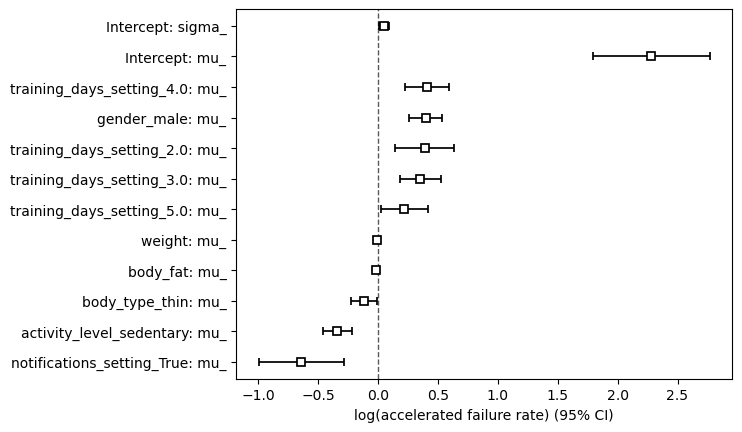

In [520]:
lognormAFT_08_02_2022.plot()

In [521]:
X_test_08_02_2022 = X_test_08_2.copy()
X_test_08_02_2022 = X_test_08_2.loc[:, X_train_08_02_2022.columns]

Below there are predictions for the 5 users and their survival function prediction.

In [522]:
lognormAFT_08_02_2022.predict_survival_function(X_test_08_02_2022.iloc[0:5, :])

111   759   929   56    1465
1.00   0.95  0.91  0.72  0.93  0.79
2.00   0.83  0.74  0.47  0.80  0.56
3.00   0.72  0.61  0.33  0.68  0.41
4.00   0.62  0.50  0.24  0.57  0.31
5.00   0.54  0.41  0.18  0.49  0.24
6.00   0.47  0.35  0.13  0.42  0.19
7.00   0.41  0.30  0.11  0.36  0.15
8.00   0.37  0.25  0.08  0.32  0.12
9.00   0.32  0.22  0.07  0.28  0.10
10.00  0.29  0.19  0.06  0.25  0.08
11.00  0.26  0.17  0.05  0.22  0.07
12.00  0.23  0.15  0.04  0.20  0.06
13.00  0.21  0.13  0.03  0.18  0.05
14.00  0.19  0.12  0.03  0.16  0.05
15.00  0.17  0.10  0.02  0.14  0.04
16.00  0.16  0.09  0.02  0.13  0.03
17.00  0.15  0.08  0.02  0.12  0.03

<AxesSubplot: >

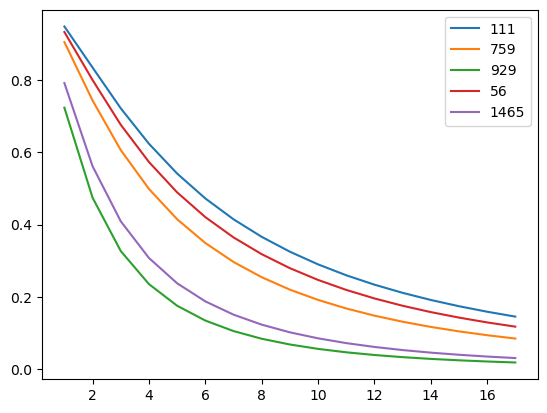

In [523]:
lognormAFT_08_02_2022.predict_survival_function(X_test_08_02_2022.iloc[0:5, :]).plot()

Looking at the prediction plots, user 111 has almost the highest chances of survival and users 929 have the lowest chances of survival. 

In [524]:
print("AIC is: {} \n Log likelihood score is: {}".format(lognormAFT_08_02_2022.AIC_, 
                                                         lognormAFT_08_02_2022.score(X_test_08_02_2022)))

AIC is: 7087.987517329872 
 Log likelihood score is: -2.0487177776728918


The values of ICI and E50 of calibration are close to 1, so they're not good.

ICI =  0.9185673616129105
E50 =  0.9249341973331945


(<AxesSubplot: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 17 mortality'}, xlabel='Predicted probability of \nt ≤ 17 mortality', ylabel='Observed probability of \nt ≤ 17 mortality'>,
 0.9185673616129105,
 0.9249341973331945)

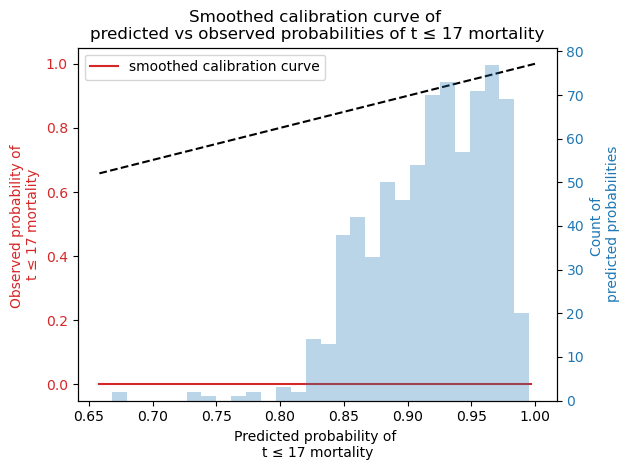

In [525]:
survival_probability_calibration(lognormAFT_08_02_2022, X_test_08_02_2022, t0=17)

Median predicted survival time (time of not dropping out) is over 3.7 weeks. 

In [526]:
lognormAFT_08_02_2022.predict_median(X_test_08_02_2022).median()

3.731589756376256

Now, it's time to calculate MAE. 

In [527]:
pred_08_02_2022 = lognormAFT_08_02_2022.predict_median(X_test_08_02_2022)
mae(actual_08_2, pred_08_02_2022)

3.3226305594194585

MAE value is over 3 and one third weeks, so according to the 17 weeks time, the error is not that big.

We can use our fitted model to see how the survival changes as we change the covariate values. Here, I have used the method to see how the survival varies among 0, 15, 30 and 45 percent of body fat for users compared to their baseline. The plots doesn't show much differences between groups and survival probability (the bigger body fat, the lower survival probability is).

<AxesSubplot: >

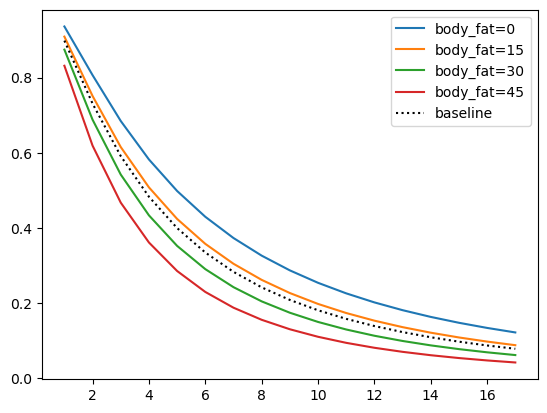

In [528]:
lognormAFT_08_02_2022.plot_partial_effects_on_outcome('body_fat', range(0,60,15))

Below we can look which variables may have the biggest influence on model.

In [529]:
c_i_aic_comp_param(X_train_08_02_2022, X_test_08_02_2022, model = 'lognormal').sort_values(by='CI training set', ascending=False)

CI training set CI test set     AIC
activity_level_sedentary              0.57        0.57 7172.15
body_fat                              0.56        0.55 7203.71
gender_male                           0.56        0.53 7201.58
training_days_setting_3.0             0.52        0.49 7247.18
training_days_setting_4.0             0.52        0.53 7245.92
body_type_thin                        0.52        0.50 7247.86
training_days_setting_5.0             0.51        0.50 7249.76
notifications_setting_True            0.51        0.51 7236.26
weight                                0.50        0.53 7249.59
training_days_setting_2.0             0.50        0.50 7250.79

## Mixture Cure models

Now, we will check about mixture cure model. What is mixture cure model? 
Mixture cure model uses the approach that the users ale divided into "cured" and "uncured" fractions. Based on data given, the model will select which supposed to be which fraction from the beginning. In this approach, we need to define family of "non-cure" fraction. Here, the "cured" fraction can be defined as users, who will still workout (even if they dropped out on the app) and the "uncured" fraction means that users will not workout. 

Presented here will be only the fitter - it doesn't take any variables into consideration.

### 08/2022 - first approach on censoring

After data manipulation, we want to check which distribution will be the best for this mixture cure model (for non-cure fraction).

In [563]:
select_best_mixture(df_users_till_08_demo)

AIC      BIC
Weibull   11779.99 11797.42
Lognormal 11427.62 11445.05
LogLog    11611.55 11628.98

In [531]:
mixture = MixtureCureFitter(base_fitter=LogNormalFitter())
mixture.fit(df_users_till_08_demo['surv_time'], event_observed = df_users_till_08_demo['cens'])

<lifelines.MixtureCureFitter:"MixtureCure_estimate", fitted with 2465 total observations, 276 right-censored observations>

So here, we can see, that the cure fraction is very low, nearly zero.

In [532]:
print(mixture.cured_fraction_)

1e-09


Below we have summary of the model.

In [533]:
mixture.print_summary(decimals = 5)

<lifelines.MixtureCureFitter:"MixtureCure_estimate", fitted with 2465 total observations, 276 right-censored observations>
   number of observations = 2465
number of events observed = 2189
           log-likelihood = -5710.80770
               hypothesis = cured_fraction_ != 0, mu_ != 0, sigma_ != 1

---
                   coef   se(coef)   coef lower 95%   coef upper 95%
cured_fraction_ 0.00000    0.00841         -0.01649          0.01649
mu_             1.21783    0.02449          1.16984          1.26582
sigma_          1.01339    0.01839          0.97734          1.04945

                  cmp to        z       p   -log2(p)
cured_fraction_  0.00000  0.00000 1.00000    0.00000
mu_              0.00000 49.73651  <5e-06        inf
sigma_           1.00000  0.72812 0.46654    1.09993
---
AIC = 11427.61539

Below we have survival plot. We can see that survival drops quickly. 

<AxesSubplot: >

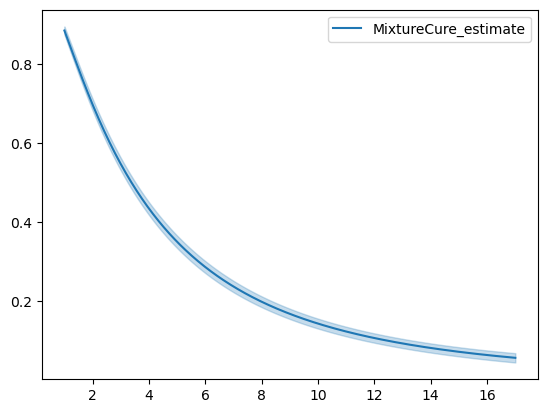

In [534]:
mixture.plot_survival_function()

Below we have hazard plot. The hazard is the probability of the event occurring during any given time point. It is possible to see that between weeks 2 and 4, the hazard is the biggest, so the probability of dropping out is big. For all of the time, probability of dropping out is pretty big (>0.1).

<AxesSubplot: >

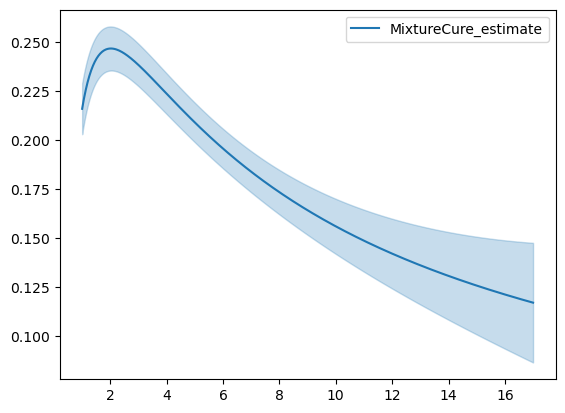

In [535]:
mixture.plot_hazard()

### 08/2022 - second approach on censoring

Let's check which fitter is the best for the uncured part of data. 

In [585]:
select_best_mixture(df_users_till_08_demo2_2)

AIC      BIC
Weibull   10545.82 10563.25
Lognormal 10180.81 10198.24
LogLog    10320.43 10337.86

By AIC and BIC criterion, the best fitter for uncured part of the data is Lognormal. Below we can see the summary of the model. 

In [586]:
mixture_2 = MixtureCureFitter(base_fitter=LogNormalFitter())
mixture_2.fit(durations = df_users_till_08_demo2_2['surv_time'], 
              event_observed = df_users_till_08_demo2_2['cens'])

<lifelines.MixtureCureFitter:"MixtureCure_estimate", fitted with 2465 total observations, 546 right-censored observations>

In [587]:
mixture_2.print_summary(decimals = 5)

<lifelines.MixtureCureFitter:"MixtureCure_estimate", fitted with 2465 total observations, 546 right-censored observations>
   number of observations = 2465
number of events observed = 1919
           log-likelihood = -5087.40744
               hypothesis = cured_fraction_ != 0, mu_ != 0, sigma_ != 1

---
                   coef   se(coef)   coef lower 95%   coef upper 95%
cured_fraction_ 0.13150    0.00936          0.11316          0.14984
mu_             1.01061    0.02383          0.96391          1.05731
sigma_          0.90162    0.01851          0.86534          0.93790

                  cmp to        z      p   -log2(p)
cured_fraction_  0.00000 14.05586 <5e-06  146.66072
mu_              0.00000 42.41343 <5e-06        inf
sigma_           1.00000 -5.31448 <5e-06   23.15639
---
AIC = 10180.81487

The cure fraction is equal to 0.1315. Cure fraction, $\mu$ and $\sigma$ are statistically significant. The model looks like:

$$
S(t) = 0.1315 + (1 - 0.1315) \left( 1 - \Phi\left( \frac{log(t)- 1.01061}{0.90162} \right) \right) 
 = 0.1315 + 0.8685 \left( 1 - \Phi\left( \frac{log(t)- 1.01061}{0.90162} \right) \right) 
$$

This model suggests that about 13% of the users can be considered as cured, in this situation that means that they will never stop using the app.

Median survival time is 3.26 weeks.

In [589]:
mixture_2.median_survival_time_

3.2633133343988456

Below there is a plot with survival curve and Kaplan Meier Curve. The survival curve is predicted for a longer period of time than we have the data. We can see that the curves have similar values for every full week.

<AxesSubplot: xlabel='timeline'>

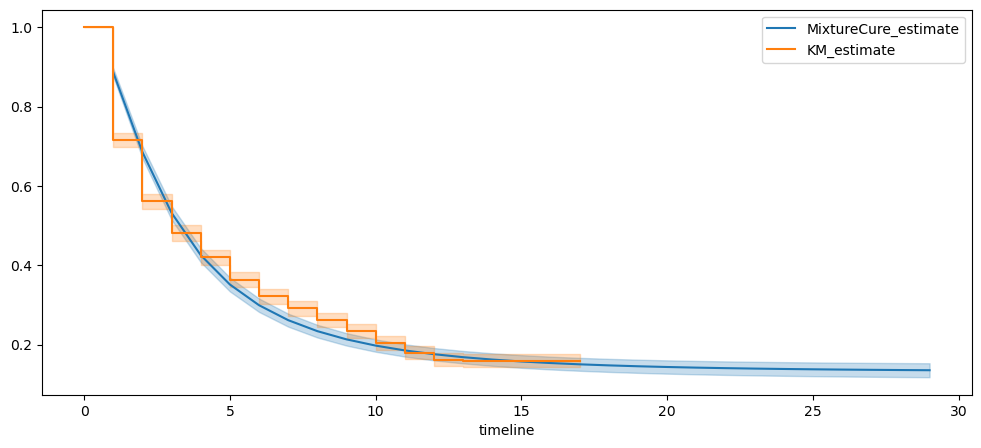

In [597]:
mixture_2.fit(durations = df_users_till_08_demo2_2['surv_time'], 
              event_observed = df_users_till_08_demo2_2['cens'],
              timeline=np.arange(1, 30))
ax = mixture_2.plot_survival_function(figsize = (12,5))
KaplanMeierFitter().fit(df_users_till_08_demo2_2['surv_time'],
                        df_users_till_08_demo2_2['cens']).plot(ax = ax)

Below there is a plot of hazard function. We can see that the curve increases to the second week and then decreases. That means the probability of dropping out is the highest in the second week and then decreases.

<AxesSubplot: >

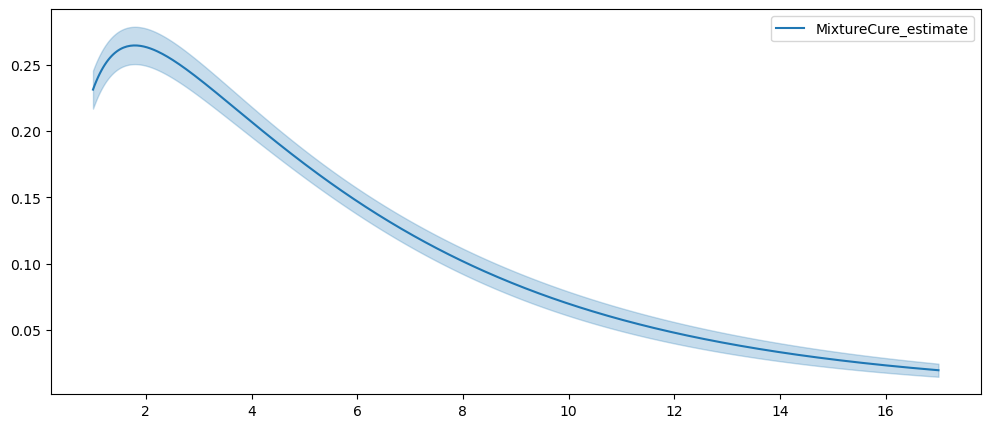

In [611]:
mixture_2.fit(durations = df_users_till_08_demo2_2['surv_time'], 
              event_observed = df_users_till_08_demo2_2['cens'])
mixture_2.plot_hazard(figsize = (12,5))

In [612]:
pred_time = mixture.predict(df_users_till_08_demo_2['surv_time'])

### First 4 weeks - first approach on censoring

We will fit the first 4 weeks of every user with first approach on censoring. We try to select the best distribution for the uncured fraction.

In [616]:
select_best_mixture(df_users_4_weeks_demo)

AIC     BIC
Weibull   8516.66 8534.72
Lognormal 8132.15 8150.21
LogLog    8334.76 8352.82

The best distribution for the uncured part of the population is Lognormal. Below there is summary given.

In [617]:
mixture_4_weeks = MixtureCureFitter(base_fitter=LogNormalFitter())
mixture_4_weeks.fit(durations = df_users_4_weeks_demo['surv_time'], 
              event_observed = df_users_4_weeks_demo['cens'])

<lifelines.MixtureCureFitter:"MixtureCure_estimate", fitted with 3034 total observations, 720 right-censored observations>

In [618]:
mixture_4_weeks.print_summary(decimals = 5)

<lifelines.MixtureCureFitter:"MixtureCure_estimate", fitted with 3034 total observations, 720 right-censored observations>
   number of observations = 3034
number of events observed = 2314
           log-likelihood = -4063.07696
               hypothesis = cured_fraction_ != 0, mu_ != 0, sigma_ != 1

---
                   coef   se(coef)   coef lower 95%   coef upper 95%
cured_fraction_ 0.21419    0.00836          0.19780          0.23058
mu_             0.45799    0.01150          0.43545          0.48053
sigma_          0.49136    0.00908          0.47356          0.50915

                  cmp to         z      p   -log2(p)
cured_fraction_  0.00000  25.61145 <5e-06  478.17201
mu_              0.00000  39.83063 <5e-06        inf
sigma_           1.00000 -56.02757 <5e-06        inf
---
AIC = 8132.15392

The cure fraction coefficient is equal to 0.21, so approximately 21% of the users are ever cured - in this situation, 21% of the users will not stop using the app. Below there is survival plot (extended up to 5 weeks) with Kaplan Meier curve.  

<AxesSubplot: xlabel='timeline'>

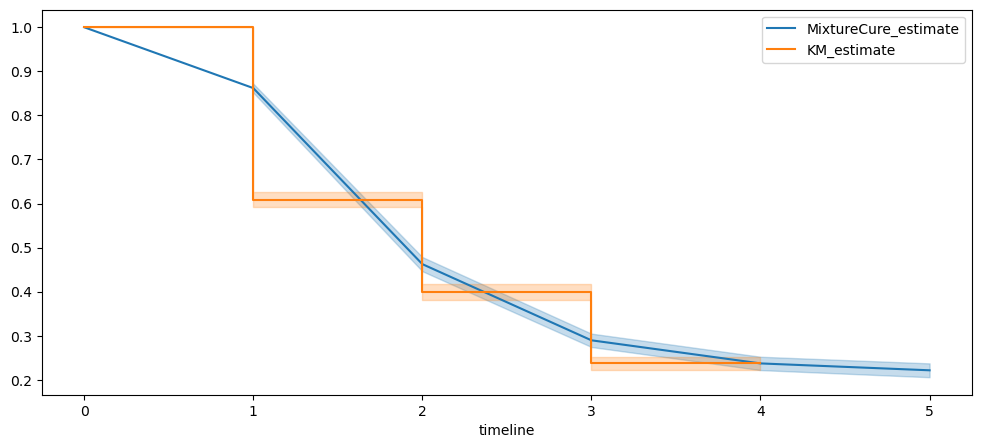

In [646]:
mixture_4_weeks.fit(durations = df_users_4_weeks_demo['surv_time'], 
              event_observed = df_users_4_weeks_demo['cens'],
              timeline=np.arange(0, 6))
ax = mixture_4_weeks.plot_survival_function(figsize = (12,5))
KaplanMeierFitter().fit(df_users_4_weeks_demo['surv_time'],
                        df_users_4_weeks_demo['cens']).plot(ax = ax)

Below there is hazard function plot. It can be seen that the curve increases up to 1.6 weeks, so the probability of dropping out was the highest in 1.6th week and then decreased. 

<AxesSubplot: >

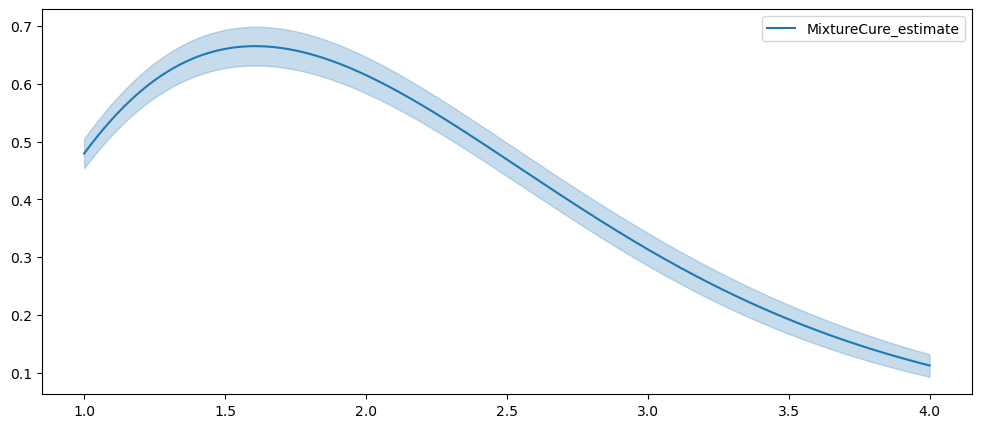

In [650]:
mixture_4_weeks.fit(durations = df_users_4_weeks_demo['surv_time'], 
              event_observed = df_users_4_weeks_demo['cens'])
mixture_4_weeks.plot_hazard(figsize = (12,5))

### First 4 weeks - second approach on censoring

We try again to fit the first 4 weeks of every user but with second approach on censoring. We try to select the best distribution for the uncured fraction.

In [628]:
select_best_mixture(df_users_4_weeks_demo2)

AIC     BIC
Weibull   7894.62 7912.67
Lognormal 7416.47 7434.52
LogLog    7578.11 7596.16

The best distribution for the uncured part of the population is Lognormal. Below there is summary given.

In [629]:
mixture_4_weeks2 = MixtureCureFitter(base_fitter=LogNormalFitter())
mixture_4_weeks2.fit(durations = df_users_4_weeks_demo2['surv_time'], 
              event_observed = df_users_4_weeks_demo2['cens'])

<lifelines.MixtureCureFitter:"MixtureCure_estimate", fitted with 3034 total observations, 1021 right-censored observations>

In [630]:
mixture_4_weeks2.print_summary(decimals = 5)

<lifelines.MixtureCureFitter:"MixtureCure_estimate", fitted with 3034 total observations, 1021 right-censored observations>
   number of observations = 3034
number of events observed = 2013
           log-likelihood = -3705.23520
               hypothesis = cured_fraction_ != 0, mu_ != 0, sigma_ != 1

---
                   coef   se(coef)   coef lower 95%   coef upper 95%
cured_fraction_ 0.31196    0.00902          0.29428          0.32965
mu_             0.37314    0.01097          0.35165          0.39464
sigma_          0.45389    0.00847          0.43730          0.47048

                  cmp to         z      p   -log2(p)
cured_fraction_  0.00000  34.57865 <5e-06  867.94181
mu_              0.00000  34.02429 <5e-06  840.48518
sigma_           1.00000 -64.50805 <5e-06        inf
---
AIC = 7416.47040

The cure fraction coefficient is equal to 0.31, so approximately 31% of the users are ever cured - in this situation, 31% of the users will not stop using the app. Below there is survival plot (extended up to 5 weeks) with Kaplan Meier curve.  

<AxesSubplot: xlabel='timeline'>

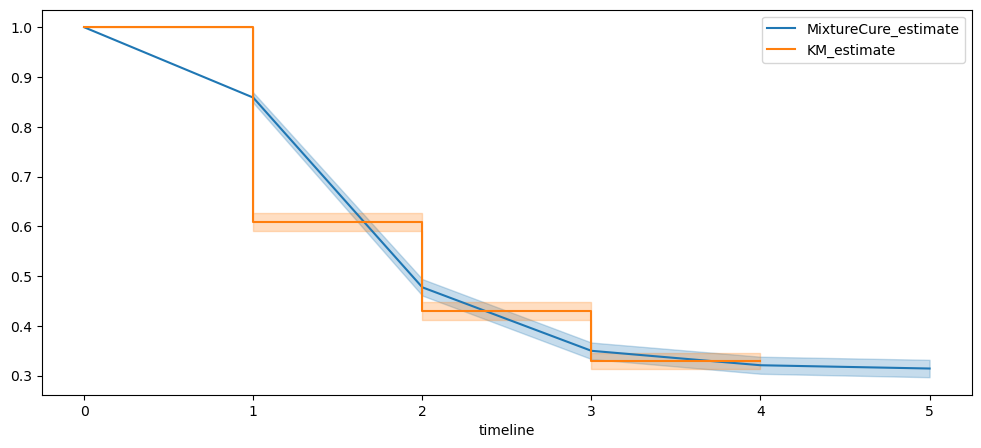

In [642]:
mixture_4_weeks2.fit(durations = df_users_4_weeks_demo2['surv_time'], 
              event_observed = df_users_4_weeks_demo2['cens'],
              timeline=np.arange(0, 6))
ax = mixture_4_weeks2.plot_survival_function(figsize = (12,5))
KaplanMeierFitter().fit(df_users_4_weeks_demo2['surv_time'],
                        df_users_4_weeks_demo2['cens']).plot(ax = ax)

Below there is hazard function plot. It can be seen that the curve increases up to 1.4 weeks, so the probability of dropping out was the highest in 1.4th week and then decreased. 

<AxesSubplot: >

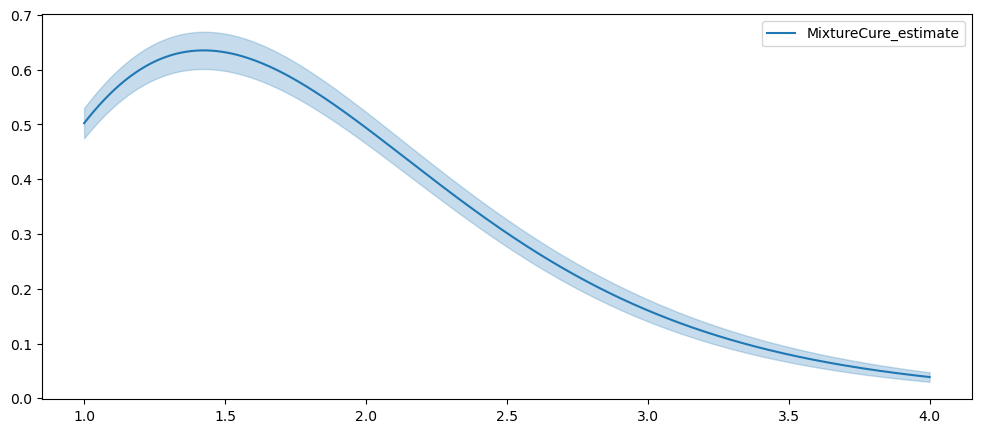

In [645]:
mixture_4_weeks2.fit(durations = df_users_4_weeks_demo2['surv_time'], 
              event_observed = df_users_4_weeks_demo2['cens'])
mixture_4_weeks2.plot_hazard(figsize = (12,5))

### First 8 weeks - first approach on censoring

Now, we will fit the first 8 weeks of every user with first approach on censoring. We try to select the best distribution for the uncured fraction.

In [634]:
select_best_mixture(df_users_8_weeks_demo)

AIC      BIC
Weibull   12698.51 12716.56
Lognormal 12455.49 12473.54
LogLog    12785.06 12803.11

The best distribution for the uncured part of the population is Lognormal. Below there is summary given.

In [635]:
mixture_8_weeks = MixtureCureFitter(base_fitter=LogNormalFitter())
mixture_8_weeks.fit(durations = df_users_8_weeks_demo['surv_time'], 
              event_observed = df_users_8_weeks_demo['cens'])

mixture_8_weeks.print_summary(decimals = 5)

<lifelines.MixtureCureFitter:"MixtureCure_estimate", fitted with 3034 total observations, 60 right-censored observations>
   number of observations = 3034
number of events observed = 2974
           log-likelihood = -6224.74602
               hypothesis = cured_fraction_ != 0, mu_ != 0, sigma_ != 1

---
                   coef   se(coef)   coef lower 95%   coef upper 95%
cured_fraction_ 0.00000    0.01724         -0.03378          0.03378
mu_             0.91447    0.01437          0.88631          0.94264
sigma_          0.78677    0.01023          0.76672          0.80683

                  cmp to         z       p   -log2(p)
cured_fraction_  0.00000   0.00000 1.00000    0.00000
mu_              0.00000  63.63519  <5e-06        inf
sigma_           1.00000 -20.83788  <5e-06  317.93162
---
AIC = 12455.49204

The cure fraction coefficient is equal to 0, so approximately 0% of the users are ever cured - in this situation, 0% of the users will not stop using the app - so all of them will churn. Below there is survival plot (extended up to 10 weeks) with Kaplan Meier curve.  

<AxesSubplot: xlabel='timeline'>

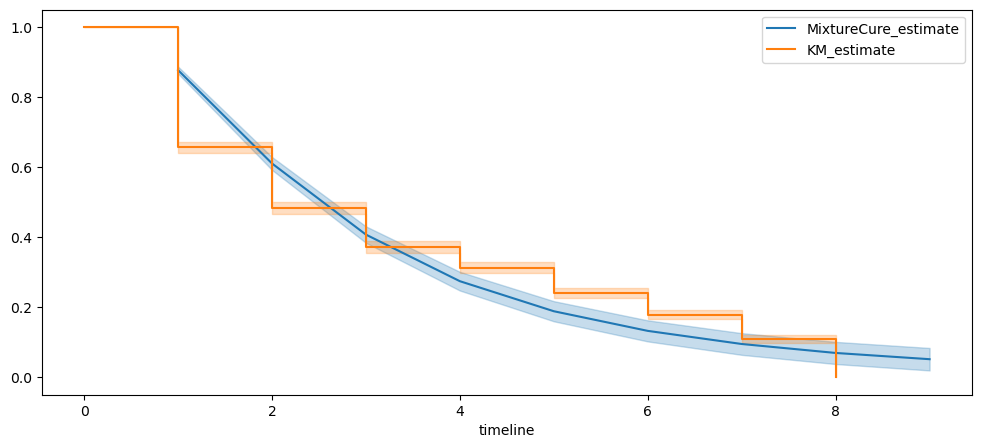

In [636]:
mixture_8_weeks.fit(durations = df_users_8_weeks_demo['surv_time'], 
              event_observed = df_users_8_weeks_demo['cens'],
              timeline=np.arange(1, 10))

ax = mixture_8_weeks.plot_survival_function(figsize = (12,5))
KaplanMeierFitter().fit(df_users_8_weeks_demo['surv_time'],
                        df_users_8_weeks_demo['cens']).plot(ax = ax)

Below there is hazard function plot. It can be seen that the curve increases up to about 2.5 weeks, so the probability of dropping out was the highest in 2.5th week and then decreases slightly, but is still pretty high. 

<AxesSubplot: >

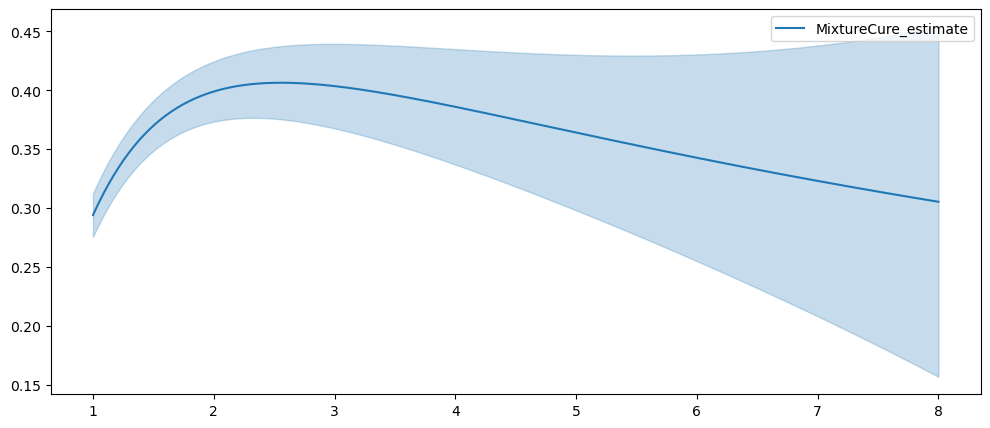

In [637]:
mixture_8_weeks.fit(durations = df_users_8_weeks_demo['surv_time'], 
              event_observed = df_users_8_weeks_demo['cens'])
mixture_8_weeks.plot_hazard(figsize = (12,5))

### First 8 weeks - second approach on censoring

We try again to fit the first 8 weeks of every user but with second approach on censoring. We try to select the best distribution for the uncured fraction.

In [638]:
select_best_mixture(df_users_8_weeks_demo2)

AIC      BIC
Weibull   11536.46 11554.51
Lognormal 11066.53 11084.59
LogLog    11246.74 11264.79

The best distribution for the uncured part of the population is Lognormal. Below there is summary given.

In [639]:
mixture_8_weeks2 = MixtureCureFitter(base_fitter=LogNormalFitter())
mixture_8_weeks2.fit(durations = df_users_8_weeks_demo2['surv_time'], 
              event_observed = df_users_8_weeks_demo2['cens'])

mixture_8_weeks2.print_summary(decimals = 5)

<lifelines.MixtureCureFitter:"MixtureCure_estimate", fitted with 3034 total observations, 511 right-censored observations>
   number of observations = 3034
number of events observed = 2523
           log-likelihood = -5530.26717
               hypothesis = cured_fraction_ != 0, mu_ != 0, sigma_ != 1

---
                   coef   se(coef)   coef lower 95%   coef upper 95%
cured_fraction_ 0.13416    0.00782          0.11883          0.14950
mu_             0.74502    0.01647          0.71273          0.77731
sigma_          0.71370    0.01298          0.68825          0.73915

                  cmp to         z      p   -log2(p)
cured_fraction_  0.00000  17.14669 <5e-06  216.51316
mu_              0.00000  45.22150 <5e-06        inf
sigma_           1.00000 -22.04869 <5e-06  355.47069
---
AIC = 11066.53435

The cure fraction coefficient is equal to 0.13, so approximately 13% of the users are ever cured - in this situation, 13% of the users will not stop using the app. Below there is survival plot (extended up to 10 weeks) with Kaplan Meier curve.  

<AxesSubplot: xlabel='timeline'>

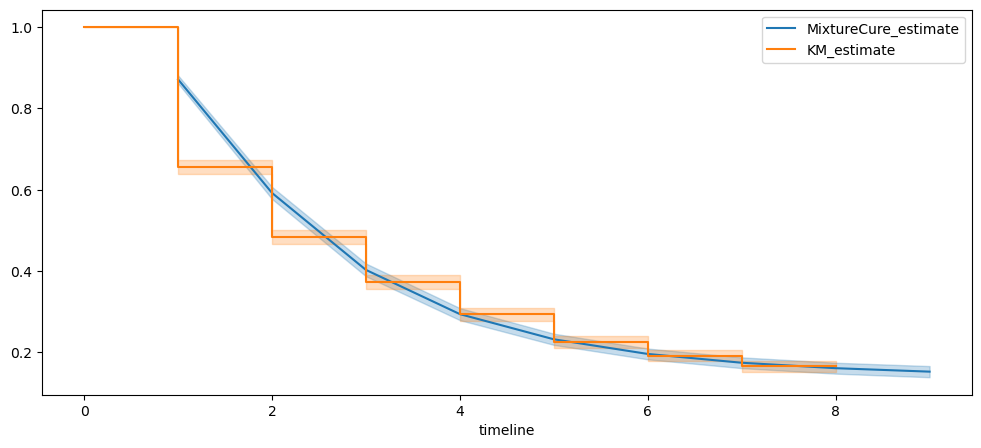

In [640]:
mixture_8_weeks2.fit(durations = df_users_8_weeks_demo2['surv_time'], 
              event_observed = df_users_8_weeks_demo2['cens'],
              timeline=np.arange(1, 10))
ax = mixture_8_weeks2.plot_survival_function(figsize = (12,5))
KaplanMeierFitter().fit(df_users_8_weeks_demo2['surv_time'],
                        df_users_8_weeks_demo2['cens']).plot(ax = ax)

Below there is hazard function plot. It can be seen that the curve increases up to 2 weeks, so the probability of dropping out was the highest in 2nd week and then decreases.

<AxesSubplot: >

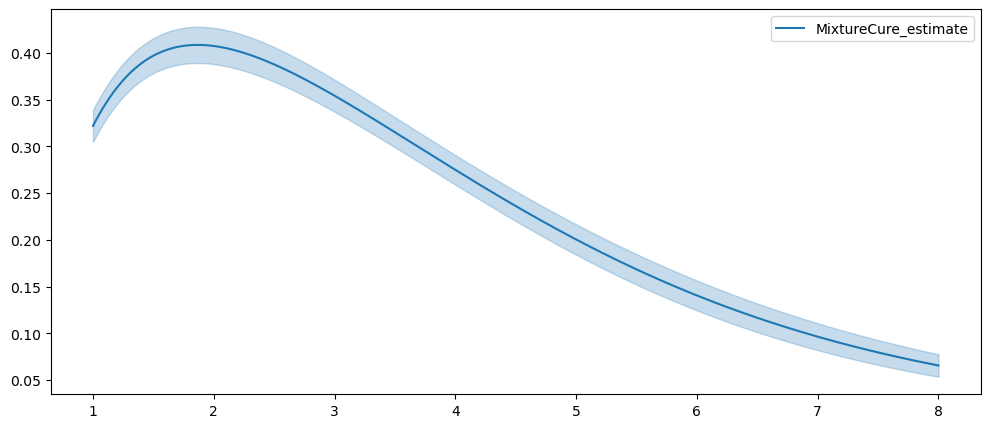

In [641]:
mixture_8_weeks2.fit(durations = df_users_8_weeks_demo2['surv_time'], 
              event_observed = df_users_8_weeks_demo2['cens'])
mixture_8_weeks2.plot_hazard(figsize = (12,5))